In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

from catboost import CatBoostRegressor
from catboost import Pool, cv

from IPython.display import display
pd.options.display.max_columns = None

# Изучение данных

In [2]:
df = pd.read_csv('data/train.csv')
df.head()

id        f0   f1        f2        f3          f4        f5        f6  \
0   0 -0.002350   59  0.766739 -1.350460     42.2727  16.68570   30.3599   
1   1  0.784462  145 -0.463845 -0.530421  27324.9000   3.47545  160.4980   
2   2  0.317816   19 -0.432571 -0.382644   1383.2600  19.71290   31.1026   
3   3  0.210753   17 -0.616454  0.946362   -119.2530   4.08235  185.2570   
4   4  0.439671   20  0.968126 -0.092546     74.3020  12.30650   72.1860   

         f7         f8       f9      f10       f11      f12        f13  \
0  1.267300   0.392007  1.09101  1.96874  1.874640  117.286   6.716200   
1  0.828007   3.735860  1.28138 -2.73947 -0.529506  157.670   0.696384   
2 -0.515354  34.430800  1.24210  2.90180 -0.960340  118.590   7.696420   
3  1.383310 -47.521400  1.09130 -1.51200 -1.292340  125.461   7.343230   
4 -0.233964  24.399100  1.10151  1.77348 -0.546781  147.186  17.394300   

        f14       f15       f16       f17       f18       f19       f20  \
0  0.985656  0.973428   4004232  0.377896  1.033820  0.574531  0.122371   
1  1.441230  0.159056  23567462 -0.089583 -0.711628 -1.045860  0.139920   
2  1.488760  0.387277    235760  0.055568  0.268560  0.718133  0.027133   
3 -3.092390  0.713795   1146032  0.326534  0.454842  0.219958  0.037982   
4  0.964678  0.964894  19272478  0.121071  0.422461 -0.103100 -0.000910   

        f21       f22      f23       f24       f25      f26    f27       f28  \
0   8.18617  1517.830  3.13219  0.112836   5.01868  116.766  10891   8.19366   
1   3.69294  -123.354  7.74097 -0.852302   8.51025  161.175  87801  12.02020   
2  11.67340   270.247  3.44051 -0.679071  13.37810  150.362  14173   1.69954   
3   5.15195  4893.860  6.89751 -0.830552   4.43184  132.855  77147  32.80900   
4   8.14191   162.713  1.56561 -0.300743   7.56458  160.995   5780  -1.54254   

       f29      f30       f31       f32       f33      f34         f35  \
0  5.79715  1.09999  14.86840 -0.275434  0.915721  167.800   -7.534140   
1  1.78393  1.23100  10.14970 -0.018724  1.011280  127.401   11.821400   
2  7.04728  1.10513   7.62871  0.685721  0.809485  120.064  194.427000   
3  4.06390  1.11911   3.91776  0.500353  0.206448  120.411  233.537000   
4  8.09081  1.60582   7.04632 -1.056850  1.727440  126.848    0.910761   

       f36       f37       f38       f39        f40      f41       f42  \
0  4.23632  1.629560  1.144400 -0.303139   4.092090  3.22617  0.074799   
1  5.99681 -0.953850  1.379370  1.079530   0.711923  2.90602  0.051206   
2  6.77866  0.634136  0.934386  0.926980   0.741116  2.42205  0.260362   
3  7.75131  0.625762 -1.940810  1.333210  -5.793170  1.56512  0.309483   
4  6.08868  0.150619  1.134610  1.553550  16.436400  2.48867  0.229194   

        f43       f44       f45        f46      f47       f48      f49  \
0  0.259497  289.4920  327.4650   5.389310  7.39479 -0.489950  20.2923   
1  0.755122  140.8930   29.5252  14.229600  3.53213 -0.405681  42.5357   
2  0.626639  369.5790  370.0240   4.488930  7.84290  1.196010  43.5343   
3  0.134558   84.8637   24.3353   4.871200  2.55104 -0.372300  14.8960   
4  0.374760  465.2930   76.8593   0.763062  8.20657 -0.646135  72.7674   

       f50       f51       f52      f53       f54   f55        f56      f57  \
0  2.45660  1.447720  -10639.0  85.6005 -0.178513  2815   -234.772  1.83317   
1  1.43533  0.939771  138312.0  59.8810 -0.070959  1435   1046.880  1.56770   
2  2.59182  1.256710  168881.0  83.8419  2.713230  2911  23256.900  3.91896   
3  1.10013  0.892193   17006.6  78.4078  0.425686  1723    375.240  1.94539   
4  1.44481  0.858525  -40791.9  70.7998  0.169193  1199   -120.388  1.68786   

       f58       f59           f60       f61       f62       f63      f64  \
0  88.5605  0.367916  8.575340e+09   70.9733  0.380057  0.031812  1.09527   
1  29.4306  2.455150  4.518200e+09   75.5602  1.987990  0.318177  1.14901   
2  97.5578  4.385380  8.444970e+08   99.4933  5.098040  0.258909  1.16878   
3  98.1500 -0.109164  3.543970e+09   60.8082  2.357

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Columns: 102 entries, id to loss
dtypes: float64(95), int64(7)
memory usage: 194.5 MB


In [4]:
df.describe()

id             f0             f1             f2  \
count  250000.000000  250000.000000  250000.000000  250000.000000   
mean   124999.500000       0.511213      51.378476       0.107155   
std     72168.927986       0.307884      42.396636       1.322200   
min         0.000000      -0.069273     -17.000000      -7.895580   
25%     62499.750000       0.251287      18.000000      -0.611172   
50%    124999.500000       0.514962      41.000000       0.253815   
75%    187499.250000       0.777323      75.000000       0.759249   
max    249999.000000       1.072070     273.000000       9.768590   

                  f3             f4             f5             f6  \
count  250000.000000  250000.000000  250000.000000  250000.000000   
mean        0.050010    3595.133426       8.205953     164.508753   
std         0.792368    6072.401061       5.475723     183.335563   
min        -1.475560   -7589.280000      -3.291050     -40.967200   
25%        -0.719418     163.864750       4.110127      27.894900   
50%         0.004099     943.000500       7.472445      91.005250   
75%         0.765456    4115.355000      11.030950     240.843750   
max         1.680190   37847.500000      35.078000     947.143000   

                  f7             f8             f9            f10  \
count  250000.000000  250000.000000  250000.000000  250000.000000   
mean        0.375533      16.669745       1.190382       0.063664   
std         0.813597      99.758709       0.099700       2.433281   
min        -4.143080    -502.813000       0.934037     -10.261200   
25%        -0.026245     -17.392025       1.132640      -1.246857   
50%         0.619862       8.714945       1.170370       0.098015   
75%         0.933855      55.407625       1.218880       1.465193   
max         4.010380     465.956000       1.712450       8.570400   

                 f11            f12            f13            f14  \
count  250000.000000  250000.000000  250000.000000  250000.000000   
mean        0.095226     136.746037       8.034918       0.614930   
std         0.935765      14.422095       5.487786       1.619192   
min        -1.858720     108.086000      -2.115510      -8.648960   
25%        -0.775796     124.486000       3.917245      -0.552543   
50%         0.169345     130.341000       7.145230       1.132570   
75%         0.908570     150.789000      10.886200       1.459792   
max         2.181420     173.854000      35.009000       9.727590   

                 f15           f16            f17            f18  \
count  250000.000000  2.500000e+05  250000.000000  250000.000000   
mean        0.752971  8.891112e+06       0.009645       0.041674   
std         0.626172  8.508967e+06       0.103460       0.684975   
min        -1.805330 -1.173084e+06      -0.341300      -2.777610   
25%         0.331163  9.710185e+05      -0.047658      -0.543708   
50%         0.602811  6.463494e+06       0.001599       0.167400   
75%         1.009152  1.527793e+07       0.061017       0.588710   
max         4.302900  3.346016e+07       0.494495       3.242530   

                 f19            f20            f21            f22  \
count  250000.000000  250000.000000  250000.000000  250000.000000   
mean        0.074226       0.321328       9.928838    3622.094586   
std         0.739724       0.337792       5.661423    6328.918702   
min        -3.693950      -0.029620      -0.732186  -10875.700000   
25%        -0.487868       0.041971       6.020198     162.032000   
50%         0.171684       0.173137       8.881610     907.796000   
75%         0.603872       0.559843      12.111975    3975.502500   
max         4.581250       1.151270      29.408100   45432.600000   

                 f23            f24            f25            f26  \
count  250000.000000  250000.000000  250000.000000  250000.000000   
mean        7.413526      -0.480271       6.046948     137.635093   
std         3.740530       0.712486       3.172873      15.710846   
min         0.09584

# Подготовка данных

- Заполнение или удаление пропусков
- Добавление новых (умножение)

In [5]:
# Пропусков нет

### Добавление новых признаков

In [5]:
def iterateColumns(df, func, numericColumns):
    """
    Для каждого признака делаем обход по остальным признакам
    и применяем к ним функцию (суммирования или умножения)
    """
    df_new = df.copy()
    df_cols = numericColumns.copy()
    for col in df_cols:
        for col2 in df_cols:
            if col2 == col: continue
            df_new[col+col2+'_'+func.__name__] = func(df_new[col], df_new[col2])
        df_cols.remove(col)
    return df_new

def SumEach(df_col1, df_col12):
    return df_col1+df_col12

def SumAll(df, numericColumns):
    return df[numericColumns].sum(axis=1)

def MultiEach(df_col1, df_col12):
    return df_col1*df_col12

# В данном датасете - все признаки числовые, кроме Id и Buy
numericColumns = [col for col in df.columns if col != 'id' and col != 'loss']

In [6]:
# умножение
# df = iterateColumns(df, MultiEach, numericColumns)
# df.head()

# Анализ данных 

## Распределение 
Смотрим исходные колонки, т.е. из списка *numericColumns*

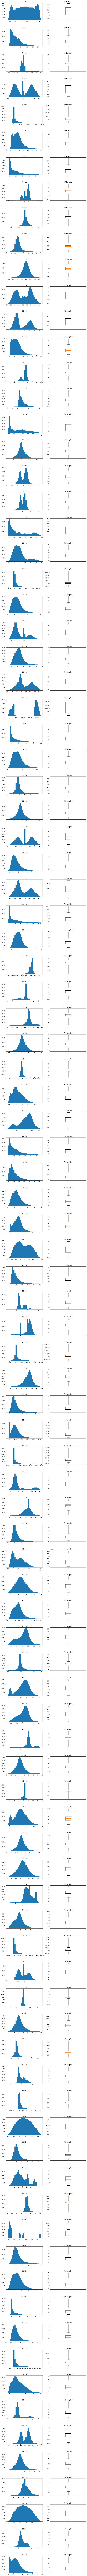

In [7]:
fig, axs = plt.subplots(len(numericColumns), 2, figsize=(12,60))

n_bints = 30
y_offset = 5

plt.subplots_adjust(top=5, bottom=0, hspace=.5)

for i in range(len(numericColumns)):
    col = numericColumns[i]
    
    axs[i][0].set_title(col+' hist')
    axs[i][1].set_title(col+' boxplot')
    
    axs[i][0].hist(df[col], bins=n_bints)
    axs[i][1].boxplot(df[col])


## Корреляция

In [8]:
df[numericColumns].corr()

f0        f1        f2        f3        f4        f5        f6  \
f0   1.000000 -0.004339 -0.004808  0.004662  0.001170  0.012141  0.002686   
f1  -0.004339  1.000000 -0.005421  0.000400 -0.002447  0.012614 -0.001040   
f2  -0.004808 -0.005421  1.000000 -0.007057 -0.004661 -0.015663 -0.002435   
f3   0.004662  0.000400 -0.007057  1.000000 -0.003316  0.003605  0.001931   
f4   0.001170 -0.002447 -0.004661 -0.003316  1.000000  0.002630  0.005806   
..        ...       ...       ...       ...       ...       ...       ...   
f95  0.002566  0.003927 -0.010727  0.000234 -0.002039  0.019589  0.012026   
f96 -0.003691 -0.010261  0.006028 -0.001366 -0.003439  0.000586 -0.006583   
f97  0.000916  0.001508 -0.007387 -0.000912 -0.000765 -0.010183  0.003493   
f98 -0.005810 -0.009793  0.007708  0.001084  0.007636 -0.008550  0.003247   
f99  0.010797 -0.002633  0.001167  0.001137 -0.003666  0.009163 -0.002580   

           f7        f8        f9       f10       f11       f12       f13  \
f0  -0.003814 -0.000343 -0.007426  0.002852 -0.011129  0.006671  0.016323   
f1  -0.004030 -0.014389  0.002277  0.014083 -0.000023  0.009007  0.000058   
f2  -0.008019 -0.001225 -0.011955  0.005394  0.004100 -0.002582 -0.011836   
f3  -0.003344  0.006952 -0.013167  0.001042 -0.002254 -0.000405  0.005170   
f4   0.002338 -0.006037 -0.015531 -0.005004 -0.001539  0.010074 -0.008784   
..        ...       ...       ...       ...       ...       ...       ...   
f95 -0.000933  0.000846 -0.007655  0.014733  0.007209  0.009210 -0.007820   
f96 -0.003924  0.003426  0.016515 -0.011962  0.001987 -0.006188 -0.008167   
f97  0.010062 -0.003464 -0.012548  0.010626  0.002101 -0.005661  0.008726   
f98  0.014759 -0.003924 -0.022405  0.006650 -0.006051 -0.004676 -0.003437   
f99  0.000896 -0.002488 -0.011701 -0.006506 -0.012934 -0.004580  0.013376   

          f14       f15       f16       f17       f18       f19       f20  \
f0   0.002159  0.006979  0.003048  0.002987  0.011259 -0.006806  0.002673   
f1  -0.001461  0.002241  0.005774 -0.005579 -0.002796 -0.002909 -0.005902   
f2   0.002604  0.002469  0.002886 -0.004163 -0.020238 -0.000995 -0.001444   
f3  -0.009877  0.009697 -0.001362 -0.005729 -0.003259 -0.000770 -0.001001   
f4   0.003284  0.004748 -0.001115  0.002879  0.021811 -0.000262 -0.002531   
..        ...       ...       ...       ...       ...       ...       ...   
f95 -0.003918 -0.017855  0.002255 -0.007417 -0.001071  0.000540 -0.002406   
f96  0.003516  0.001480  0.002666 -0.003831 -0.009553  0.001823  0.000660   
f97  0.003951 -0.000508  0.001831 -0.013645  0.005042  0.005344  0.002648   
f98  0.007603 -0.010174 -0.000939  0.015184  0.005563  0.010962 -0.002446   
f99 -0.005669  0.000623  0.002941  0.001605 -0.002596  0.008142  0.004139   

          f21       f22       f23       f24       f25       f26       f27  \
f0  -0.003676 -0.010313 -0.007437 -0.002003 -0.000222  0.011491 -0.000688   
f1  -0.004420 -0.000284  0.012254  0.007612 -0.002469 -0.003194 -0.000993   
f2   0.013192 -0.013199 -0.002376  0.009503 -0.019411 -0.009402  0.003751   
f3   0.006155 -0.007308  0.003318  0.000111  0.008029 -0.001061  0.003356   
f4  -0.005867  0.005789  0.008123  0.003753 -0.023767  0.002035 -0.000877   
..        ...       ...       ...       ...       ...       ...       ...   
f95 -0.002005 -0.003498 -0.009592 -0.000160 -0.008814  0.011807  0.002452   
f96  0.001744  0.007142  0.001430  0.015164  0.006710  0.010127 -0.001367   
f97 -0.008857 -0.004305  0.014791 -0.007054  0.004542 -0.001249 -0.000771   
f98  0.004417  0.002087  0.015779 -0.006893  0.009027 -0.007591 -0.000919   
f99 -0.005349 -0.006480 -0.004772  0.001638  0.002243  0.004355  0.000066   

          f28       f29       f30       f31       f32       f33       f34  \
f0  -0.004125 -0.000790 -0.006728  0.007992  0.008025  0.003360  0.000380   
f1   0.007772  0.008089  0.004737 -0.000374  0.007414  0.010907  0.000842   
f2   0.011396  0.009249  0.007058 -0.005693 -0.005668  0.026939  0.007577   
f3 

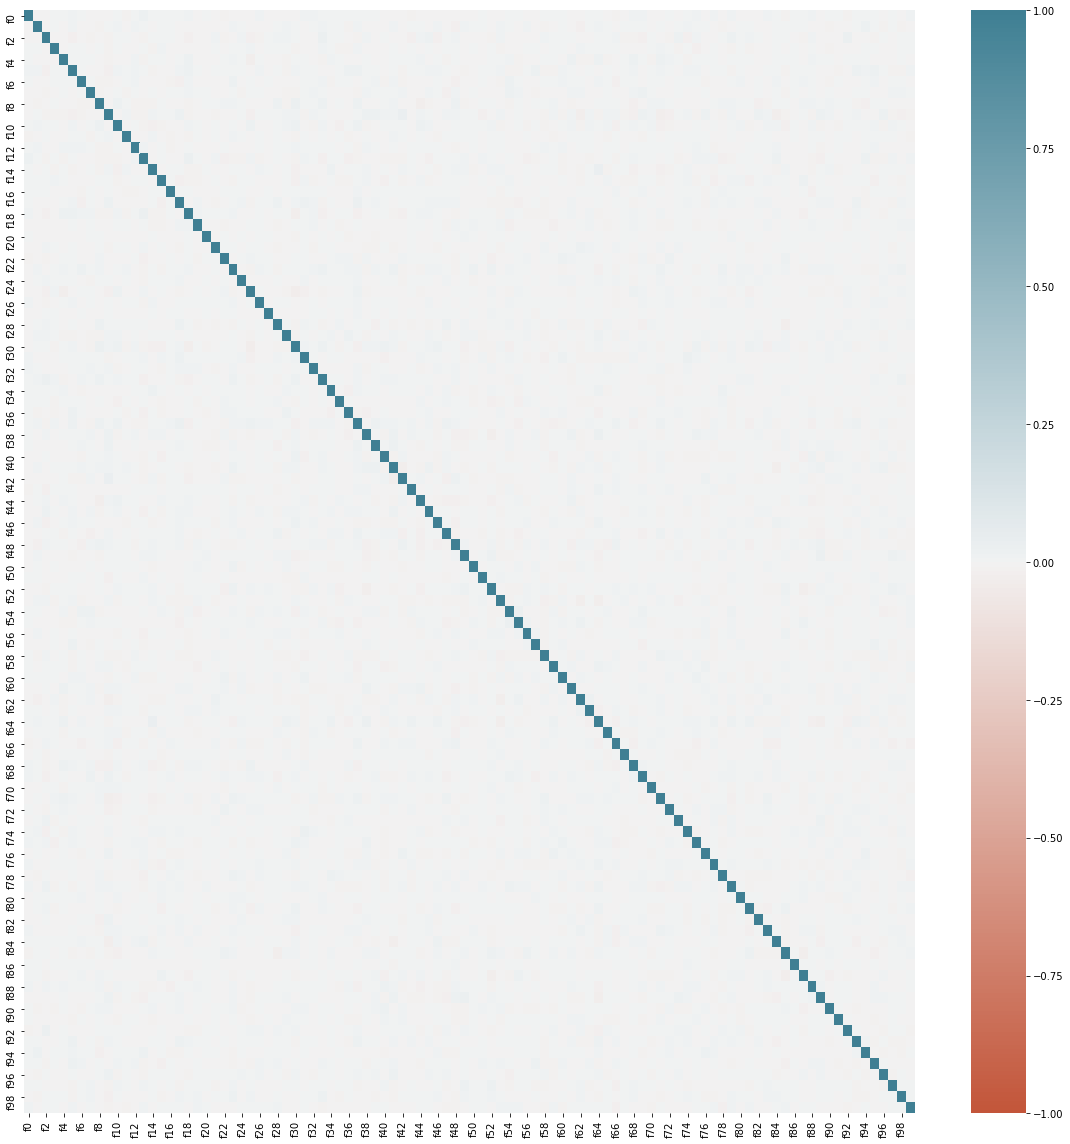

In [9]:
fig, ax = plt.subplots(figsize=(16, 16))
ax = sns.heatmap(df[numericColumns].corr(), vmin=-1, vmax=1, 
                 cmap=sns.diverging_palette(20, 220, as_cmap=True),
                 ax=ax)

plt.tight_layout()
plt.show()

### Корреляции почти нет

## Точечная диаграмма

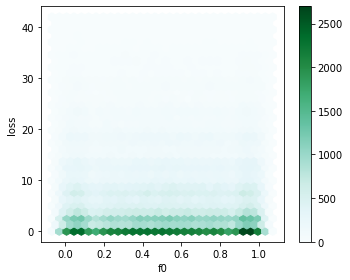

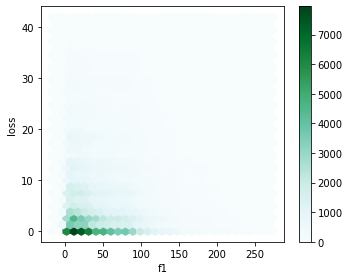

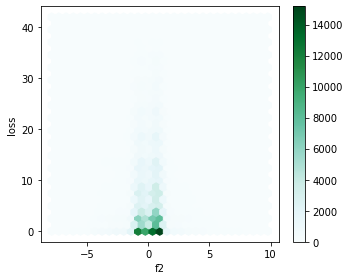

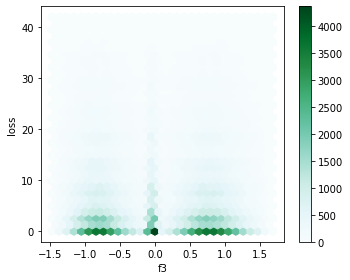

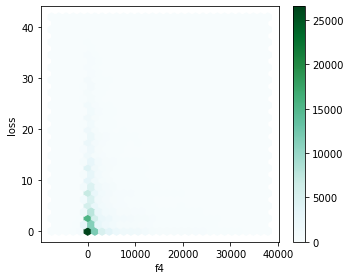

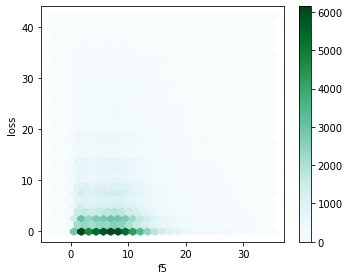

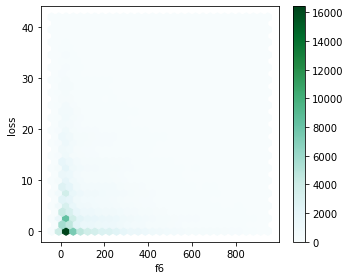

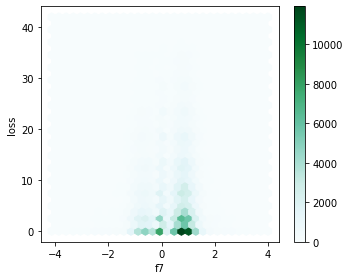

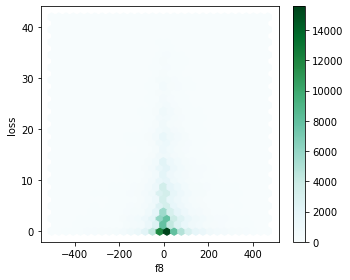

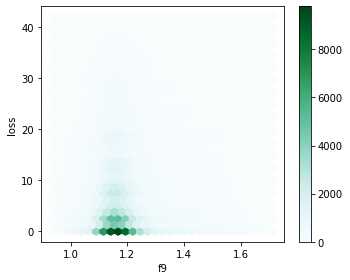

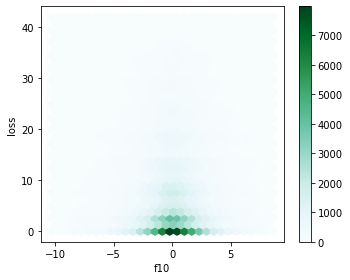

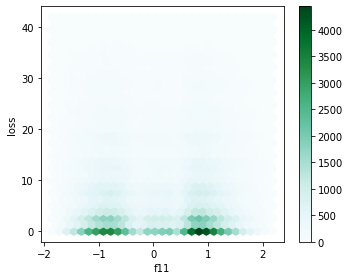

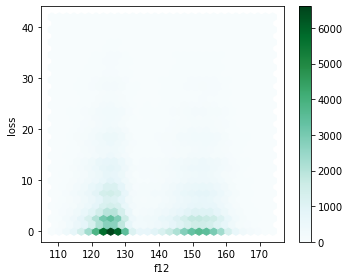

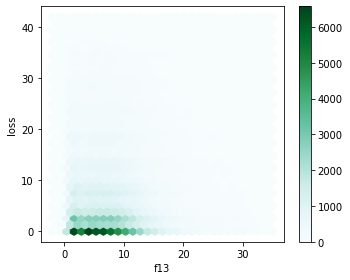

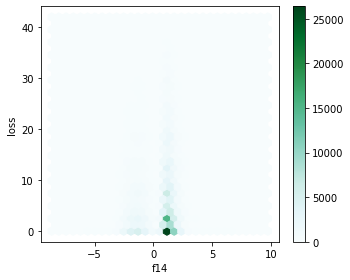

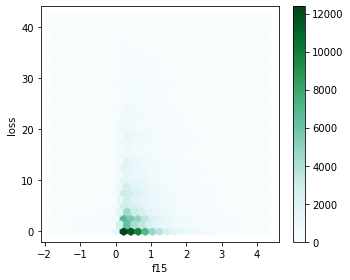

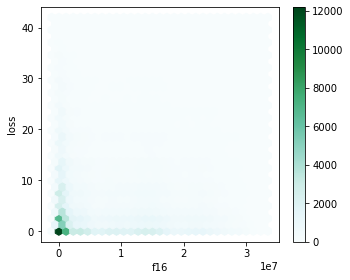

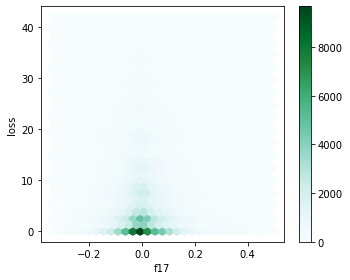

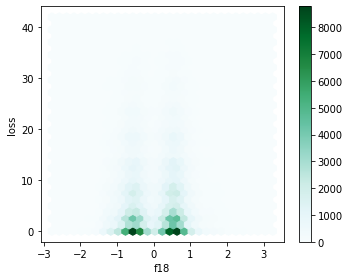

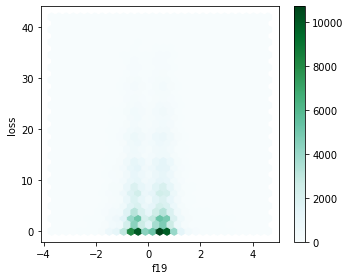

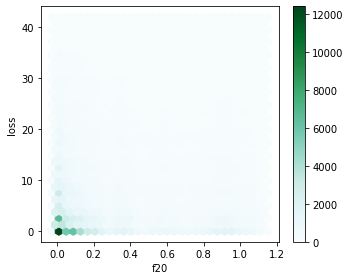

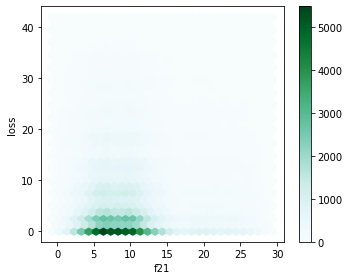

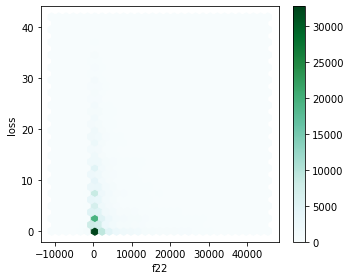

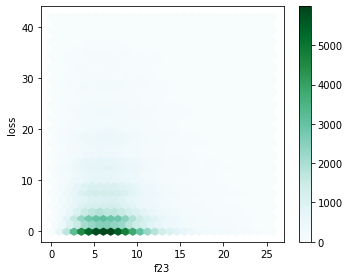

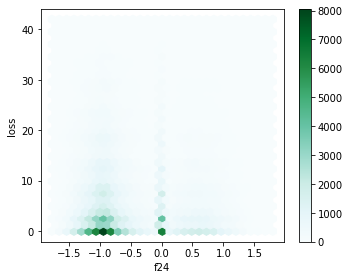

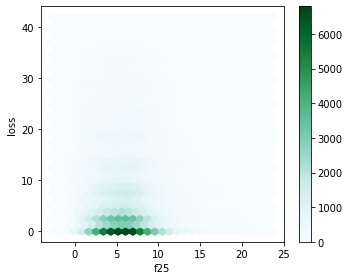

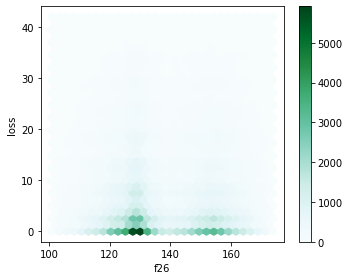

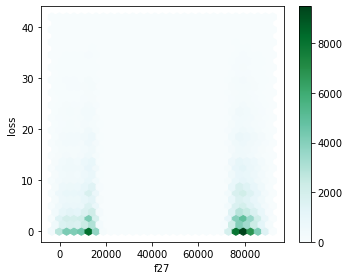

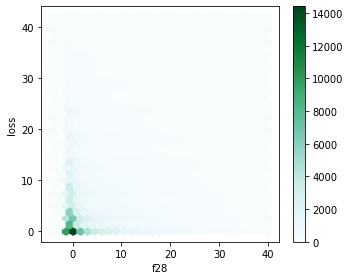

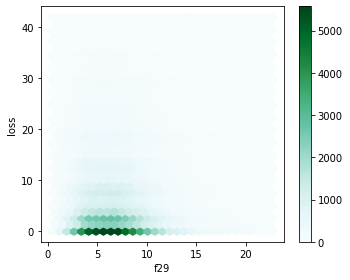

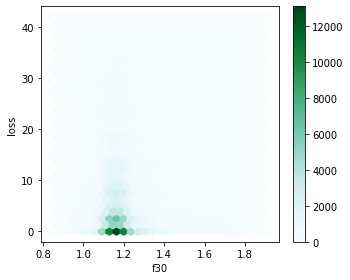

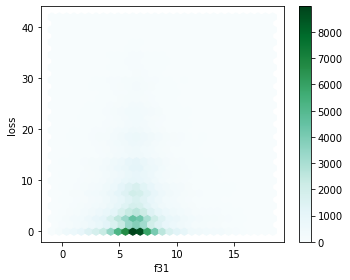

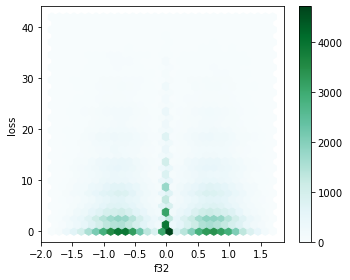

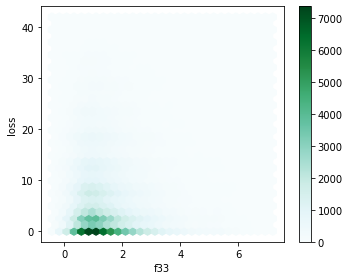

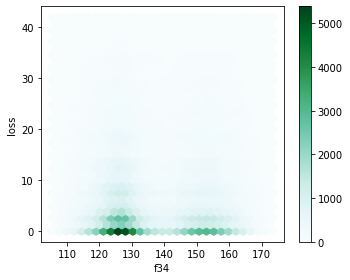

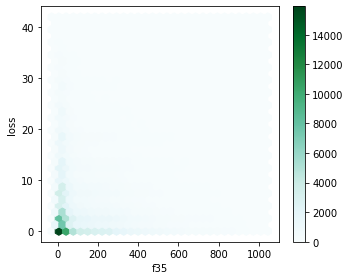

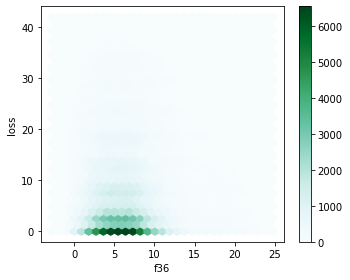

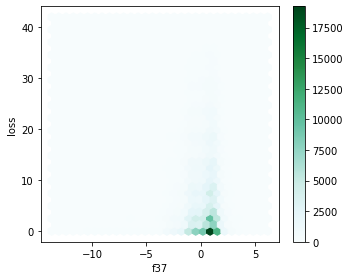

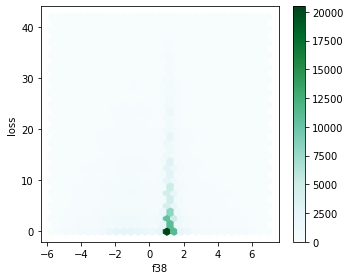

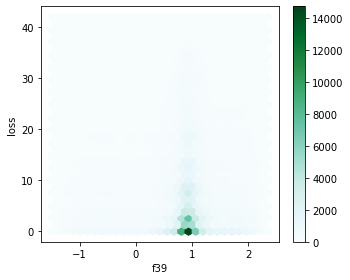

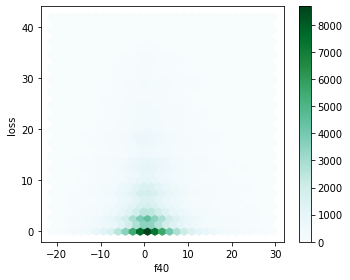

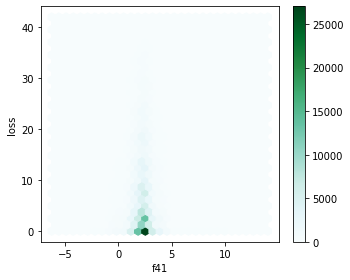

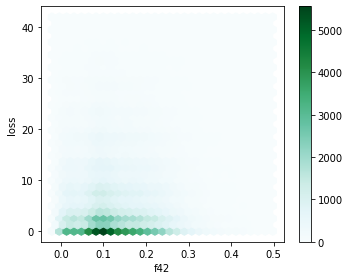

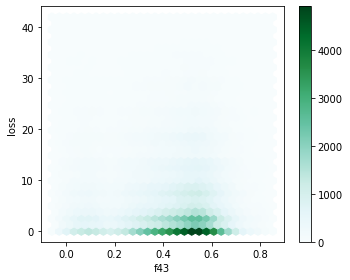

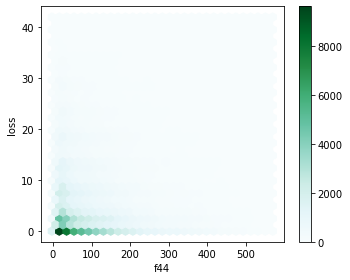

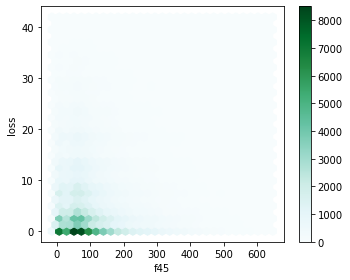

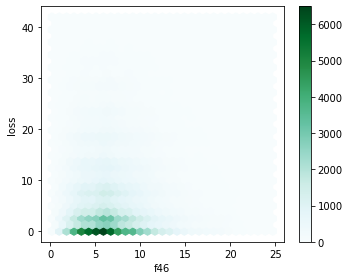

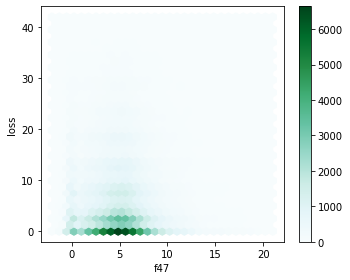

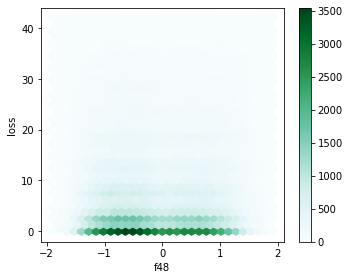

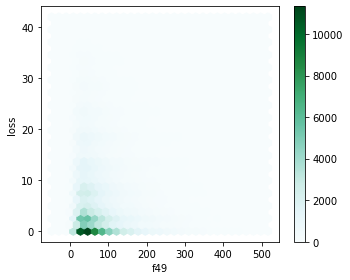

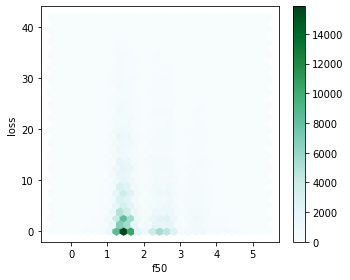

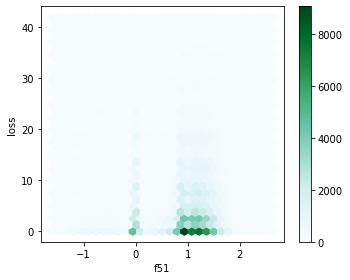

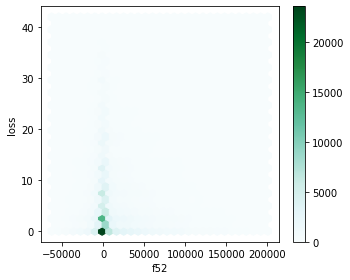

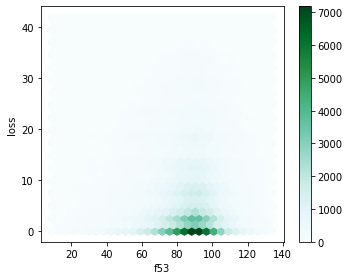

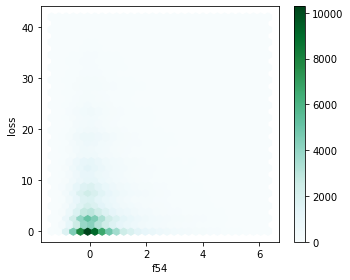

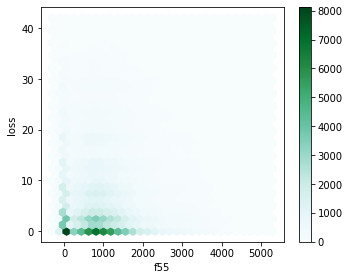

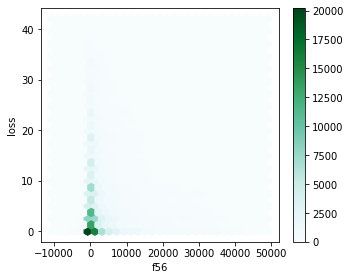

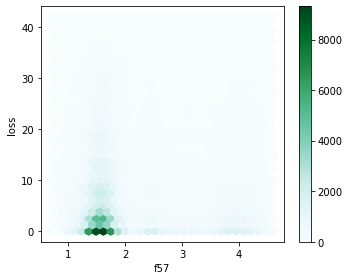

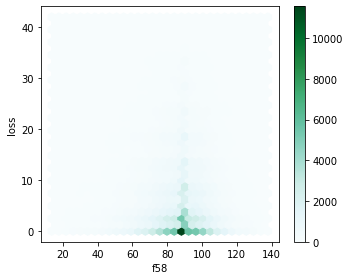

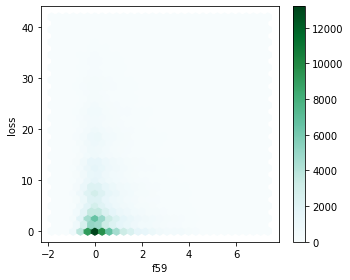

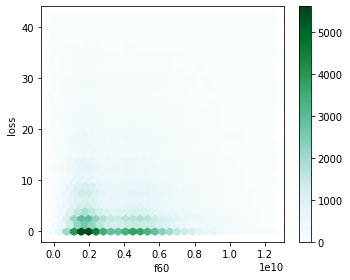

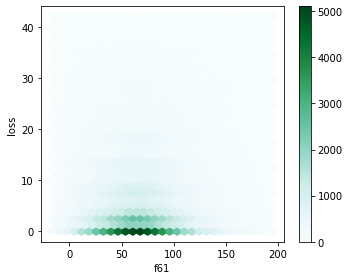

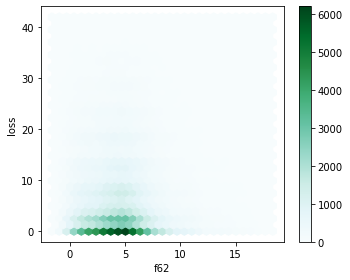

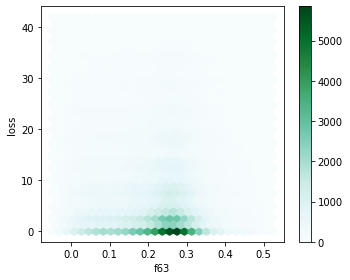

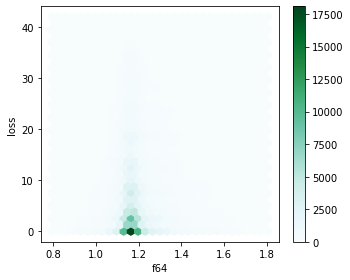

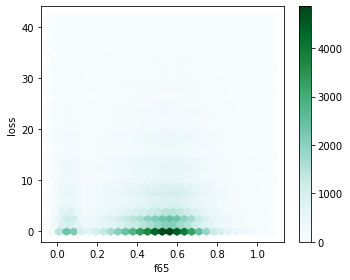

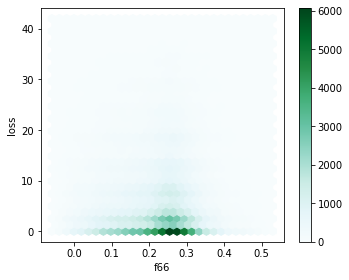

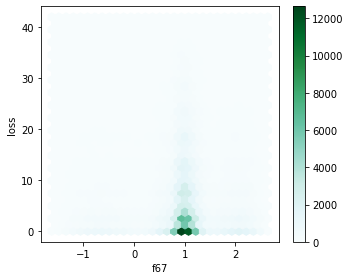

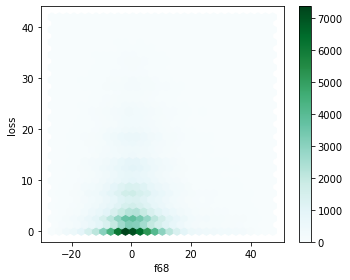

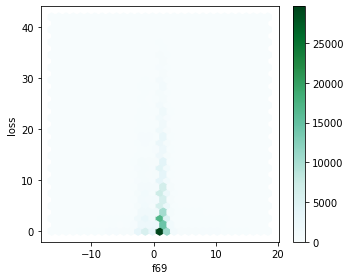

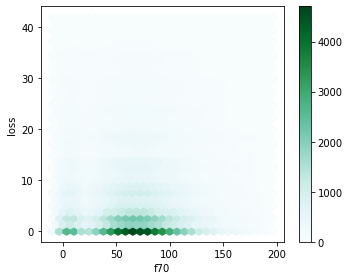

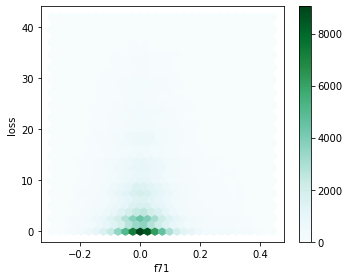

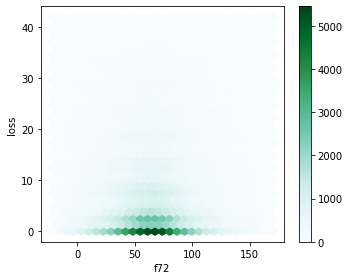

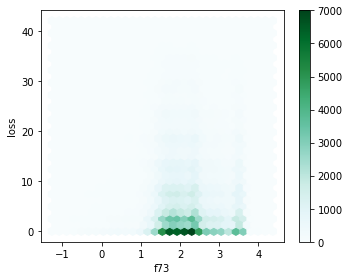

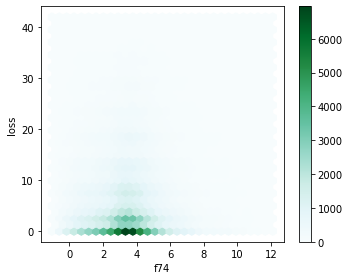

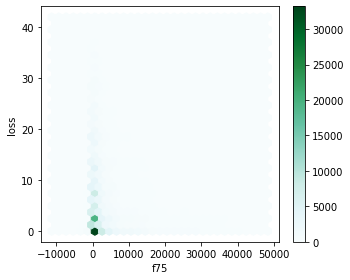

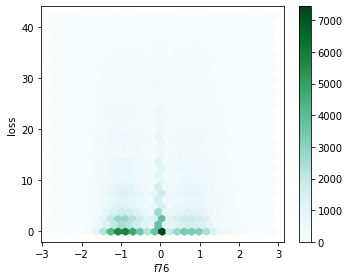

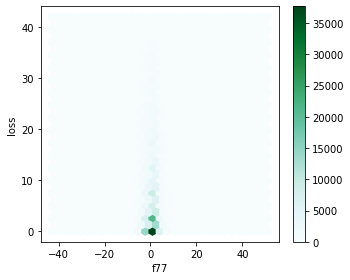

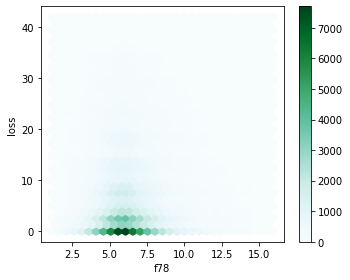

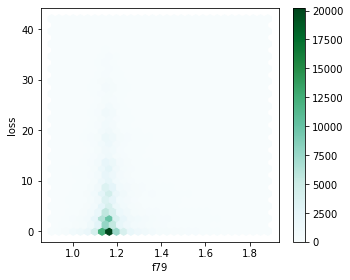

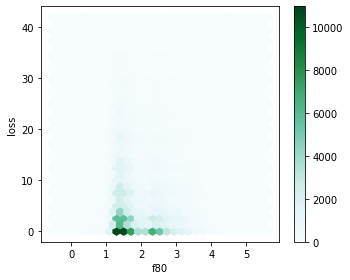

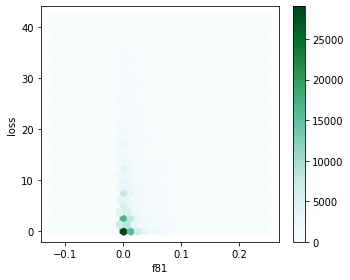

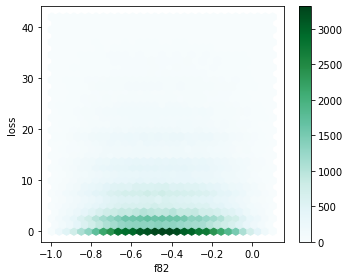

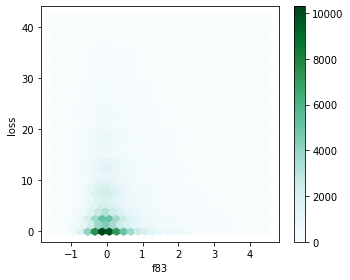

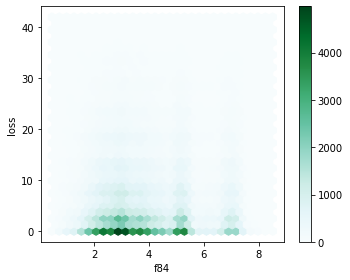

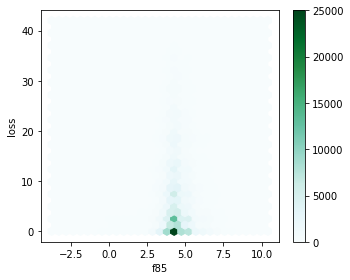

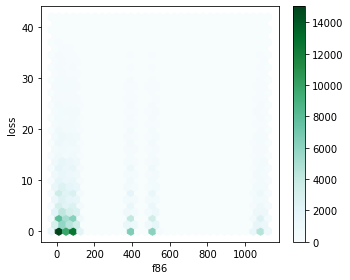

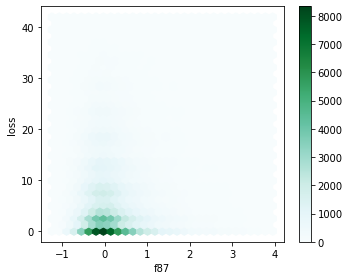

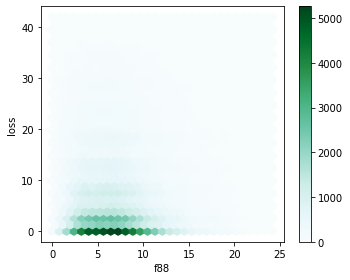

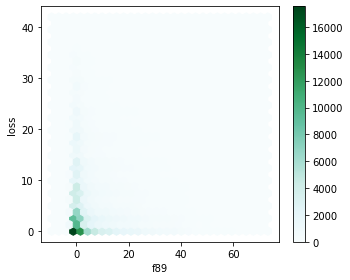

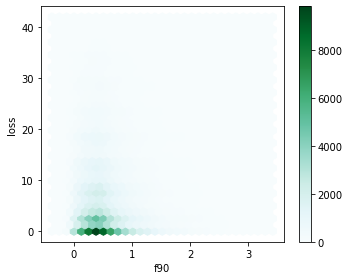

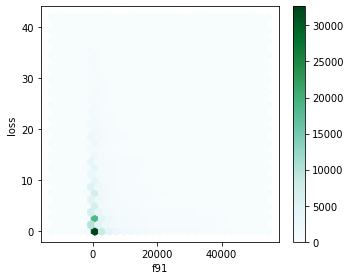

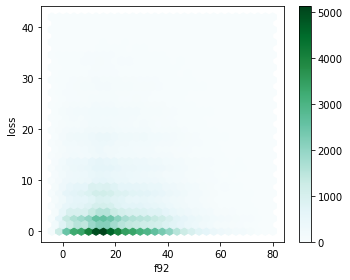

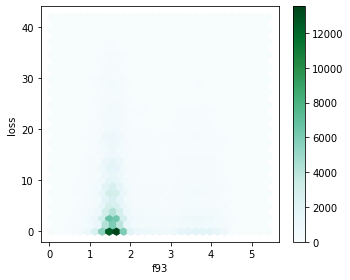

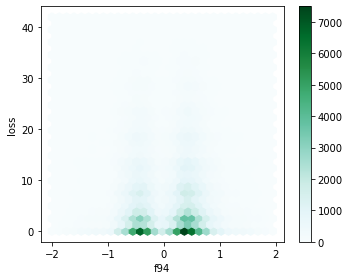

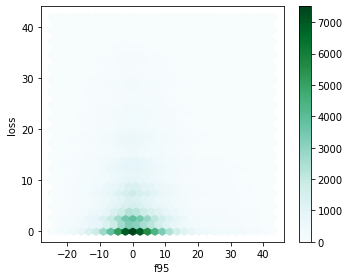

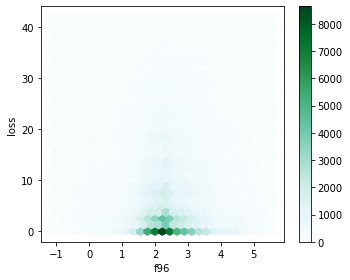

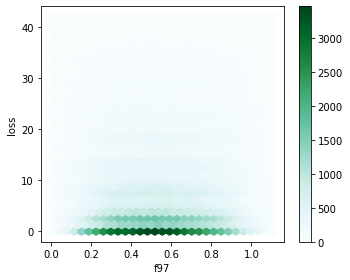

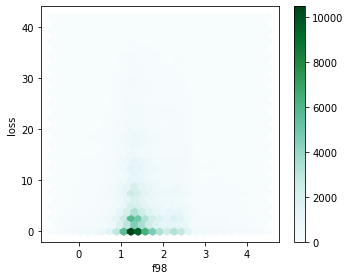

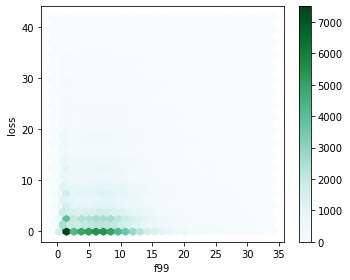

In [10]:
for i in range(len(numericColumns)):
    col = numericColumns[i]
    ax = df.plot.hexbin(x=col, y='loss',
                             gridsize=30, sharex=False, figsize=(5, 4))
    ax.set_xlabel(col)
    ax.set_ylabel('loss')

    plt.tight_layout()
    plt.show()

## Понижение размерности

PCA или применить генетический алгоритм

## Стандартизация

# Обучение моделей

## Catboost

In [11]:
target_col = 'loss'
X, y = df[numericColumns], df[target_col]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [23]:
cat = CatBoostRegressor()
cat.fit(X_train, y_train, verbose=False, plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [17]:
cat = CatBoostRegressor()
grid = {'learning_rate': [0.03, 0.1],
        'depth': [4, 6, 10],
        'l2_leaf_reg': [1, 3, 5, 7, 9]}

#grid_search_result = cat.grid_search(grid, X=X_train, y=y_train, plot=True)

Custom logger is already specified. Specify more than one logger at same time is not thread safe.

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 10.3285936	test: 10.3933489	best: 10.3933489 (0)	total: 13.9ms	remaining: 13.9s
1:	learn: 10.2025340	test: 10.2673448	best: 10.2673448 (1)	total: 26.3ms	remaining: 13.1s
2:	learn: 10.0824531	test: 10.1473581	best: 10.1473581 (2)	total: 37.2ms	remaining: 12.4s
3:	learn: 9.9681925	test: 10.0331161	best: 10.0331161 (3)	total: 49.2ms	remaining: 12.2s
4:	learn: 9.8594868	test: 9.9243967	best: 9.9243967 (4)	total: 62.3ms	remaining: 12.4s
5:	learn: 9.7561137	test: 9.8210244	best: 9.8210244 (5)	total: 74.1ms	remaining: 12.3s
6:	learn: 9.6577972	test: 9.7227543	best: 9.7227543 (6)	total: 86.6ms	remaining: 12.3s
7:	learn: 9.5644002	test: 9.6293539	best: 9.6293539 (7)	total: 99.2ms	remaining: 12.3s
8:	learn: 9.4756337	test: 9.5406260	best: 9.5406260 (8)	total: 110ms	remaining: 12.2s
9:	learn: 9.3914074	test: 9.4563535	best: 9.4563535 (9)	total: 123ms	remaining: 12.2s
10:	learn: 9.3112181	test: 9.3761183	best: 9.3761183 (10)	total: 135ms	remaining: 12.2s
11:	learn: 9.2352474	test: 9.3001

108:	learn: 7.9123038	test: 7.9703800	best: 7.9703800 (108)	total: 1.37s	remaining: 11.2s
109:	learn: 7.9118395	test: 7.9700283	best: 7.9700283 (109)	total: 1.38s	remaining: 11.2s
110:	learn: 7.9113238	test: 7.9695620	best: 7.9695620 (110)	total: 1.4s	remaining: 11.2s
111:	learn: 7.9109196	test: 7.9691923	best: 7.9691923 (111)	total: 1.41s	remaining: 11.2s
112:	learn: 7.9104333	test: 7.9686936	best: 7.9686936 (112)	total: 1.42s	remaining: 11.2s
113:	learn: 7.9099081	test: 7.9681187	best: 7.9681187 (113)	total: 1.43s	remaining: 11.1s
114:	learn: 7.9094614	test: 7.9677071	best: 7.9677071 (114)	total: 1.45s	remaining: 11.1s
115:	learn: 7.9089108	test: 7.9671624	best: 7.9671624 (115)	total: 1.46s	remaining: 11.1s
116:	learn: 7.9085065	test: 7.9667597	best: 7.9667597 (116)	total: 1.47s	remaining: 11.1s
117:	learn: 7.9080122	test: 7.9662921	best: 7.9662921 (117)	total: 1.48s	remaining: 11.1s
118:	learn: 7.9075765	test: 7.9659275	best: 7.9659275 (118)	total: 1.5s	remaining: 11.1s
119:	learn: 

204:	learn: 7.8860498	test: 7.9476837	best: 7.9476837 (204)	total: 2.55s	remaining: 9.91s
205:	learn: 7.8858985	test: 7.9475464	best: 7.9475464 (205)	total: 2.56s	remaining: 9.89s
206:	learn: 7.8857167	test: 7.9474681	best: 7.9474681 (206)	total: 2.58s	remaining: 9.88s
207:	learn: 7.8855696	test: 7.9473857	best: 7.9473857 (207)	total: 2.59s	remaining: 9.87s
208:	learn: 7.8853937	test: 7.9472596	best: 7.9472596 (208)	total: 2.6s	remaining: 9.85s
209:	learn: 7.8852260	test: 7.9471071	best: 7.9471071 (209)	total: 2.61s	remaining: 9.83s
210:	learn: 7.8850899	test: 7.9470325	best: 7.9470325 (210)	total: 2.63s	remaining: 9.82s
211:	learn: 7.8849339	test: 7.9469697	best: 7.9469697 (211)	total: 2.64s	remaining: 9.8s
212:	learn: 7.8847737	test: 7.9468876	best: 7.9468876 (212)	total: 2.65s	remaining: 9.79s
213:	learn: 7.8845291	test: 7.9467076	best: 7.9467076 (213)	total: 2.66s	remaining: 9.78s
214:	learn: 7.8843642	test: 7.9465484	best: 7.9465484 (214)	total: 2.67s	remaining: 9.76s
215:	learn: 

298:	learn: 7.8710966	test: 7.9387413	best: 7.9387413 (298)	total: 3.72s	remaining: 8.71s
299:	learn: 7.8709685	test: 7.9386993	best: 7.9386993 (299)	total: 3.73s	remaining: 8.7s
300:	learn: 7.8708356	test: 7.9386901	best: 7.9386901 (300)	total: 3.74s	remaining: 8.69s
301:	learn: 7.8706949	test: 7.9385788	best: 7.9385788 (301)	total: 3.75s	remaining: 8.68s
302:	learn: 7.8705236	test: 7.9384671	best: 7.9384671 (302)	total: 3.77s	remaining: 8.67s
303:	learn: 7.8704158	test: 7.9383713	best: 7.9383713 (303)	total: 3.78s	remaining: 8.65s
304:	learn: 7.8702593	test: 7.9383550	best: 7.9383550 (304)	total: 3.79s	remaining: 8.64s
305:	learn: 7.8701144	test: 7.9382518	best: 7.9382518 (305)	total: 3.8s	remaining: 8.63s
306:	learn: 7.8699870	test: 7.9382650	best: 7.9382518 (305)	total: 3.82s	remaining: 8.62s
307:	learn: 7.8698320	test: 7.9381568	best: 7.9381568 (307)	total: 3.83s	remaining: 8.61s
308:	learn: 7.8696731	test: 7.9380718	best: 7.9380718 (308)	total: 3.84s	remaining: 8.59s
309:	learn: 

393:	learn: 7.8586531	test: 7.9322311	best: 7.9322311 (393)	total: 4.91s	remaining: 7.55s
394:	learn: 7.8585397	test: 7.9322034	best: 7.9322034 (394)	total: 4.92s	remaining: 7.54s
395:	learn: 7.8584122	test: 7.9321062	best: 7.9321062 (395)	total: 4.93s	remaining: 7.52s
396:	learn: 7.8582858	test: 7.9320316	best: 7.9320316 (396)	total: 4.94s	remaining: 7.51s
397:	learn: 7.8581534	test: 7.9320052	best: 7.9320052 (397)	total: 4.95s	remaining: 7.49s
398:	learn: 7.8580128	test: 7.9319110	best: 7.9319110 (398)	total: 4.97s	remaining: 7.48s
399:	learn: 7.8578786	test: 7.9318275	best: 7.9318275 (399)	total: 4.98s	remaining: 7.47s
400:	learn: 7.8577745	test: 7.9318247	best: 7.9318247 (400)	total: 4.99s	remaining: 7.46s
401:	learn: 7.8576378	test: 7.9317035	best: 7.9317035 (401)	total: 5s	remaining: 7.44s
402:	learn: 7.8574919	test: 7.9316447	best: 7.9316447 (402)	total: 5.01s	remaining: 7.43s
403:	learn: 7.8573539	test: 7.9315388	best: 7.9315388 (403)	total: 5.03s	remaining: 7.42s
404:	learn: 7

490:	learn: 7.8446112	test: 7.9267172	best: 7.9267172 (490)	total: 6.08s	remaining: 6.31s
491:	learn: 7.8444550	test: 7.9267260	best: 7.9267172 (490)	total: 6.1s	remaining: 6.3s
492:	learn: 7.8443277	test: 7.9267009	best: 7.9267009 (492)	total: 6.11s	remaining: 6.28s
493:	learn: 7.8441739	test: 7.9266146	best: 7.9266146 (493)	total: 6.12s	remaining: 6.27s
494:	learn: 7.8440198	test: 7.9265648	best: 7.9265648 (494)	total: 6.14s	remaining: 6.26s
495:	learn: 7.8438566	test: 7.9265911	best: 7.9265648 (494)	total: 6.15s	remaining: 6.25s
496:	learn: 7.8437148	test: 7.9264993	best: 7.9264993 (496)	total: 6.16s	remaining: 6.23s
497:	learn: 7.8435496	test: 7.9263468	best: 7.9263468 (497)	total: 6.17s	remaining: 6.22s
498:	learn: 7.8433924	test: 7.9262074	best: 7.9262074 (498)	total: 6.19s	remaining: 6.21s
499:	learn: 7.8432575	test: 7.9261218	best: 7.9261218 (499)	total: 6.2s	remaining: 6.2s
500:	learn: 7.8430909	test: 7.9260256	best: 7.9260256 (500)	total: 6.21s	remaining: 6.18s
501:	learn: 7.

586:	learn: 7.8310154	test: 7.9222701	best: 7.9222594 (585)	total: 7.24s	remaining: 5.09s
587:	learn: 7.8308940	test: 7.9222412	best: 7.9222412 (587)	total: 7.25s	remaining: 5.08s
588:	learn: 7.8307753	test: 7.9222119	best: 7.9222119 (588)	total: 7.26s	remaining: 5.07s
589:	learn: 7.8306344	test: 7.9221820	best: 7.9221820 (589)	total: 7.28s	remaining: 5.06s
590:	learn: 7.8305026	test: 7.9221275	best: 7.9221275 (590)	total: 7.29s	remaining: 5.04s
591:	learn: 7.8303583	test: 7.9220915	best: 7.9220915 (591)	total: 7.3s	remaining: 5.03s
592:	learn: 7.8302166	test: 7.9219854	best: 7.9219854 (592)	total: 7.32s	remaining: 5.02s
593:	learn: 7.8300910	test: 7.9219564	best: 7.9219564 (593)	total: 7.33s	remaining: 5.01s
594:	learn: 7.8299426	test: 7.9218970	best: 7.9218970 (594)	total: 7.34s	remaining: 5s
595:	learn: 7.8298164	test: 7.9218513	best: 7.9218513 (595)	total: 7.36s	remaining: 4.99s
596:	learn: 7.8296875	test: 7.9218324	best: 7.9218324 (596)	total: 7.37s	remaining: 4.97s
597:	learn: 7.

682:	learn: 7.8183896	test: 7.9188024	best: 7.9188024 (682)	total: 8.41s	remaining: 3.9s
683:	learn: 7.8182491	test: 7.9187903	best: 7.9187903 (683)	total: 8.42s	remaining: 3.89s
684:	learn: 7.8181319	test: 7.9187507	best: 7.9187507 (684)	total: 8.44s	remaining: 3.88s
685:	learn: 7.8180024	test: 7.9187345	best: 7.9187345 (685)	total: 8.45s	remaining: 3.87s
686:	learn: 7.8178665	test: 7.9187052	best: 7.9187052 (686)	total: 8.46s	remaining: 3.85s
687:	learn: 7.8177259	test: 7.9186613	best: 7.9186613 (687)	total: 8.47s	remaining: 3.84s
688:	learn: 7.8175972	test: 7.9186136	best: 7.9186136 (688)	total: 8.49s	remaining: 3.83s
689:	learn: 7.8174669	test: 7.9185653	best: 7.9185653 (689)	total: 8.5s	remaining: 3.82s
690:	learn: 7.8173446	test: 7.9185033	best: 7.9185033 (690)	total: 8.51s	remaining: 3.81s
691:	learn: 7.8172143	test: 7.9184891	best: 7.9184891 (691)	total: 8.52s	remaining: 3.79s
692:	learn: 7.8170920	test: 7.9184413	best: 7.9184413 (692)	total: 8.53s	remaining: 3.78s
693:	learn: 

780:	learn: 7.8062781	test: 7.9158478	best: 7.9158478 (780)	total: 9.59s	remaining: 2.69s
781:	learn: 7.8061637	test: 7.9158394	best: 7.9158394 (781)	total: 9.6s	remaining: 2.68s
782:	learn: 7.8060375	test: 7.9157880	best: 7.9157880 (782)	total: 9.61s	remaining: 2.66s
783:	learn: 7.8059285	test: 7.9157624	best: 7.9157624 (783)	total: 9.63s	remaining: 2.65s
784:	learn: 7.8058173	test: 7.9157187	best: 7.9157187 (784)	total: 9.64s	remaining: 2.64s
785:	learn: 7.8056901	test: 7.9156107	best: 7.9156107 (785)	total: 9.65s	remaining: 2.63s
786:	learn: 7.8055716	test: 7.9155165	best: 7.9155165 (786)	total: 9.66s	remaining: 2.62s
787:	learn: 7.8054689	test: 7.9154939	best: 7.9154939 (787)	total: 9.68s	remaining: 2.6s
788:	learn: 7.8053502	test: 7.9154750	best: 7.9154750 (788)	total: 9.69s	remaining: 2.59s
789:	learn: 7.8052216	test: 7.9154488	best: 7.9154488 (789)	total: 9.7s	remaining: 2.58s
790:	learn: 7.8050992	test: 7.9153651	best: 7.9153651 (790)	total: 9.71s	remaining: 2.57s
791:	learn: 7

876:	learn: 7.7948893	test: 7.9138472	best: 7.9138472 (876)	total: 10.8s	remaining: 1.51s
877:	learn: 7.7947900	test: 7.9138648	best: 7.9138472 (876)	total: 10.8s	remaining: 1.5s
878:	learn: 7.7946858	test: 7.9138495	best: 7.9138472 (876)	total: 10.8s	remaining: 1.49s
879:	learn: 7.7945555	test: 7.9138594	best: 7.9138472 (876)	total: 10.8s	remaining: 1.47s
880:	learn: 7.7944296	test: 7.9138041	best: 7.9138041 (880)	total: 10.8s	remaining: 1.46s
881:	learn: 7.7943153	test: 7.9137798	best: 7.9137798 (881)	total: 10.8s	remaining: 1.45s
882:	learn: 7.7941742	test: 7.9137496	best: 7.9137496 (882)	total: 10.8s	remaining: 1.44s
883:	learn: 7.7940587	test: 7.9137542	best: 7.9137496 (882)	total: 10.8s	remaining: 1.42s
884:	learn: 7.7939458	test: 7.9137012	best: 7.9137012 (884)	total: 10.9s	remaining: 1.41s
885:	learn: 7.7938179	test: 7.9137130	best: 7.9137012 (884)	total: 10.9s	remaining: 1.4s
886:	learn: 7.7936998	test: 7.9136489	best: 7.9136489 (886)	total: 10.9s	remaining: 1.39s
887:	learn: 

971:	learn: 7.7840206	test: 7.9116279	best: 7.9116279 (971)	total: 11.9s	remaining: 343ms
972:	learn: 7.7839112	test: 7.9115889	best: 7.9115889 (972)	total: 11.9s	remaining: 331ms
973:	learn: 7.7837836	test: 7.9115872	best: 7.9115872 (973)	total: 11.9s	remaining: 319ms
974:	learn: 7.7837012	test: 7.9115897	best: 7.9115872 (973)	total: 12s	remaining: 307ms
975:	learn: 7.7835816	test: 7.9115813	best: 7.9115813 (975)	total: 12s	remaining: 294ms
976:	learn: 7.7834800	test: 7.9115390	best: 7.9115390 (976)	total: 12s	remaining: 282ms
977:	learn: 7.7833816	test: 7.9115075	best: 7.9115075 (977)	total: 12s	remaining: 270ms
978:	learn: 7.7832685	test: 7.9115034	best: 7.9115034 (978)	total: 12s	remaining: 258ms
979:	learn: 7.7831388	test: 7.9114772	best: 7.9114772 (979)	total: 12s	remaining: 245ms
980:	learn: 7.7830170	test: 7.9114521	best: 7.9114521 (980)	total: 12s	remaining: 233ms
981:	learn: 7.7828932	test: 7.9114382	best: 7.9114382 (981)	total: 12s	remaining: 221ms
982:	learn: 7.7827837	test

64:	learn: 7.8836592	test: 7.9482374	best: 7.9482374 (64)	total: 829ms	remaining: 11.9s
65:	learn: 7.8830972	test: 7.9475930	best: 7.9475930 (65)	total: 842ms	remaining: 11.9s
66:	learn: 7.8823670	test: 7.9472160	best: 7.9472160 (66)	total: 855ms	remaining: 11.9s
67:	learn: 7.8817833	test: 7.9469023	best: 7.9469023 (67)	total: 868ms	remaining: 11.9s
68:	learn: 7.8811940	test: 7.9464710	best: 7.9464710 (68)	total: 879ms	remaining: 11.9s
69:	learn: 7.8806304	test: 7.9461434	best: 7.9461434 (69)	total: 890ms	remaining: 11.8s
70:	learn: 7.8801281	test: 7.9458149	best: 7.9458149 (70)	total: 902ms	remaining: 11.8s
71:	learn: 7.8795978	test: 7.9452542	best: 7.9452542 (71)	total: 916ms	remaining: 11.8s
72:	learn: 7.8789999	test: 7.9448787	best: 7.9448787 (72)	total: 929ms	remaining: 11.8s
73:	learn: 7.8784740	test: 7.9446054	best: 7.9446054 (73)	total: 941ms	remaining: 11.8s
74:	learn: 7.8779920	test: 7.9440724	best: 7.9440724 (74)	total: 953ms	remaining: 11.8s
75:	learn: 7.8774947	test: 7.943

157:	learn: 7.8398042	test: 7.9250975	best: 7.9250975 (157)	total: 1.99s	remaining: 10.6s
158:	learn: 7.8394252	test: 7.9248859	best: 7.9248859 (158)	total: 2s	remaining: 10.6s
159:	learn: 7.8389558	test: 7.9246754	best: 7.9246754 (159)	total: 2.01s	remaining: 10.6s
160:	learn: 7.8385369	test: 7.9244610	best: 7.9244610 (160)	total: 2.02s	remaining: 10.6s
161:	learn: 7.8380132	test: 7.9244257	best: 7.9244257 (161)	total: 2.04s	remaining: 10.5s
162:	learn: 7.8374936	test: 7.9243040	best: 7.9243040 (162)	total: 2.05s	remaining: 10.5s
163:	learn: 7.8369806	test: 7.9240764	best: 7.9240764 (163)	total: 2.06s	remaining: 10.5s
164:	learn: 7.8365132	test: 7.9239554	best: 7.9239554 (164)	total: 2.08s	remaining: 10.5s
165:	learn: 7.8360095	test: 7.9237817	best: 7.9237817 (165)	total: 2.09s	remaining: 10.5s
166:	learn: 7.8355554	test: 7.9236773	best: 7.9236773 (166)	total: 2.1s	remaining: 10.5s
167:	learn: 7.8351016	test: 7.9236064	best: 7.9236064 (167)	total: 2.11s	remaining: 10.5s
168:	learn: 7.

253:	learn: 7.7989552	test: 7.9154415	best: 7.9154415 (253)	total: 3.17s	remaining: 9.32s
254:	learn: 7.7985873	test: 7.9152936	best: 7.9152936 (254)	total: 3.19s	remaining: 9.31s
255:	learn: 7.7982098	test: 7.9152997	best: 7.9152936 (254)	total: 3.2s	remaining: 9.3s
256:	learn: 7.7978541	test: 7.9152472	best: 7.9152472 (256)	total: 3.21s	remaining: 9.28s
257:	learn: 7.7974465	test: 7.9151561	best: 7.9151561 (257)	total: 3.22s	remaining: 9.27s
258:	learn: 7.7970351	test: 7.9150751	best: 7.9150751 (258)	total: 3.23s	remaining: 9.25s
259:	learn: 7.7967216	test: 7.9148996	best: 7.9148996 (259)	total: 3.25s	remaining: 9.24s
260:	learn: 7.7963201	test: 7.9150003	best: 7.9148996 (259)	total: 3.26s	remaining: 9.22s
261:	learn: 7.7959239	test: 7.9148828	best: 7.9148828 (261)	total: 3.27s	remaining: 9.21s
262:	learn: 7.7955987	test: 7.9148188	best: 7.9148188 (262)	total: 3.28s	remaining: 9.19s
263:	learn: 7.7953097	test: 7.9147459	best: 7.9147459 (263)	total: 3.29s	remaining: 9.18s
264:	learn: 

347:	learn: 7.7646081	test: 7.9108132	best: 7.9107172 (346)	total: 4.31s	remaining: 8.08s
348:	learn: 7.7642665	test: 7.9108126	best: 7.9107172 (346)	total: 4.33s	remaining: 8.07s
349:	learn: 7.7639476	test: 7.9108364	best: 7.9107172 (346)	total: 4.34s	remaining: 8.05s
350:	learn: 7.7635495	test: 7.9107873	best: 7.9107172 (346)	total: 4.35s	remaining: 8.04s
351:	learn: 7.7631725	test: 7.9106307	best: 7.9106307 (351)	total: 4.36s	remaining: 8.03s
352:	learn: 7.7628000	test: 7.9105262	best: 7.9105262 (352)	total: 4.37s	remaining: 8.02s
353:	learn: 7.7624764	test: 7.9105644	best: 7.9105262 (352)	total: 4.39s	remaining: 8.01s
354:	learn: 7.7621858	test: 7.9105011	best: 7.9105011 (354)	total: 4.4s	remaining: 7.99s
355:	learn: 7.7617874	test: 7.9104408	best: 7.9104408 (355)	total: 4.41s	remaining: 7.98s
356:	learn: 7.7614167	test: 7.9104210	best: 7.9104210 (356)	total: 4.42s	remaining: 7.96s
357:	learn: 7.7610679	test: 7.9103450	best: 7.9103450 (357)	total: 4.43s	remaining: 7.95s
358:	learn:

444:	learn: 7.7314186	test: 7.9078910	best: 7.9078910 (444)	total: 5.48s	remaining: 6.83s
445:	learn: 7.7310542	test: 7.9078928	best: 7.9078910 (444)	total: 5.49s	remaining: 6.82s
446:	learn: 7.7307338	test: 7.9079684	best: 7.9078910 (444)	total: 5.5s	remaining: 6.81s
447:	learn: 7.7303947	test: 7.9079282	best: 7.9078910 (444)	total: 5.52s	remaining: 6.8s
448:	learn: 7.7300491	test: 7.9080812	best: 7.9078910 (444)	total: 5.53s	remaining: 6.78s
449:	learn: 7.7297410	test: 7.9080743	best: 7.9078910 (444)	total: 5.54s	remaining: 6.77s
450:	learn: 7.7294239	test: 7.9081881	best: 7.9078910 (444)	total: 5.55s	remaining: 6.76s
451:	learn: 7.7290955	test: 7.9082214	best: 7.9078910 (444)	total: 5.57s	remaining: 6.75s
452:	learn: 7.7287911	test: 7.9080312	best: 7.9078910 (444)	total: 5.58s	remaining: 6.73s
453:	learn: 7.7285061	test: 7.9081268	best: 7.9078910 (444)	total: 5.59s	remaining: 6.72s
454:	learn: 7.7281556	test: 7.9081144	best: 7.9078910 (444)	total: 5.6s	remaining: 6.71s
455:	learn: 7

541:	learn: 7.6997144	test: 7.9065722	best: 7.9064419 (534)	total: 6.65s	remaining: 5.62s
542:	learn: 7.6994429	test: 7.9066102	best: 7.9064419 (534)	total: 6.66s	remaining: 5.61s
543:	learn: 7.6991136	test: 7.9065398	best: 7.9064419 (534)	total: 6.67s	remaining: 5.59s
544:	learn: 7.6987290	test: 7.9064944	best: 7.9064419 (534)	total: 6.69s	remaining: 5.58s
545:	learn: 7.6983991	test: 7.9064637	best: 7.9064419 (534)	total: 6.7s	remaining: 5.57s
546:	learn: 7.6980778	test: 7.9064437	best: 7.9064419 (534)	total: 6.71s	remaining: 5.56s
547:	learn: 7.6978059	test: 7.9064194	best: 7.9064194 (547)	total: 6.72s	remaining: 5.54s
548:	learn: 7.6975231	test: 7.9064803	best: 7.9064194 (547)	total: 6.73s	remaining: 5.53s
549:	learn: 7.6972186	test: 7.9062631	best: 7.9062631 (549)	total: 6.75s	remaining: 5.52s
550:	learn: 7.6968833	test: 7.9063248	best: 7.9062631 (549)	total: 6.76s	remaining: 5.51s
551:	learn: 7.6964637	test: 7.9063073	best: 7.9062631 (549)	total: 6.77s	remaining: 5.49s
552:	learn:

636:	learn: 7.6696940	test: 7.9055327	best: 7.9054765 (629)	total: 7.82s	remaining: 4.46s
637:	learn: 7.6693377	test: 7.9057226	best: 7.9054765 (629)	total: 7.83s	remaining: 4.44s
638:	learn: 7.6690411	test: 7.9056610	best: 7.9054765 (629)	total: 7.84s	remaining: 4.43s
639:	learn: 7.6687149	test: 7.9056357	best: 7.9054765 (629)	total: 7.86s	remaining: 4.42s
640:	learn: 7.6684373	test: 7.9055112	best: 7.9054765 (629)	total: 7.87s	remaining: 4.41s
641:	learn: 7.6681217	test: 7.9053661	best: 7.9053661 (641)	total: 7.88s	remaining: 4.4s
642:	learn: 7.6678492	test: 7.9053327	best: 7.9053327 (642)	total: 7.9s	remaining: 4.38s
643:	learn: 7.6675933	test: 7.9053252	best: 7.9053252 (643)	total: 7.91s	remaining: 4.37s
644:	learn: 7.6673877	test: 7.9053240	best: 7.9053240 (644)	total: 7.92s	remaining: 4.36s
645:	learn: 7.6671286	test: 7.9054379	best: 7.9053240 (644)	total: 7.93s	remaining: 4.34s
646:	learn: 7.6668369	test: 7.9052772	best: 7.9052772 (646)	total: 7.94s	remaining: 4.33s
647:	learn: 

732:	learn: 7.6403648	test: 7.9042056	best: 7.9038738 (717)	total: 8.98s	remaining: 3.27s
733:	learn: 7.6401035	test: 7.9043276	best: 7.9038738 (717)	total: 8.99s	remaining: 3.26s
734:	learn: 7.6396781	test: 7.9044848	best: 7.9038738 (717)	total: 9.01s	remaining: 3.25s
735:	learn: 7.6393909	test: 7.9043924	best: 7.9038738 (717)	total: 9.02s	remaining: 3.23s
736:	learn: 7.6390866	test: 7.9044471	best: 7.9038738 (717)	total: 9.03s	remaining: 3.22s
737:	learn: 7.6387021	test: 7.9043992	best: 7.9038738 (717)	total: 9.04s	remaining: 3.21s
738:	learn: 7.6384469	test: 7.9043781	best: 7.9038738 (717)	total: 9.05s	remaining: 3.2s
739:	learn: 7.6381456	test: 7.9042745	best: 7.9038738 (717)	total: 9.06s	remaining: 3.19s
740:	learn: 7.6377959	test: 7.9041597	best: 7.9038738 (717)	total: 9.08s	remaining: 3.17s
741:	learn: 7.6375385	test: 7.9042540	best: 7.9038738 (717)	total: 9.09s	remaining: 3.16s
742:	learn: 7.6372715	test: 7.9042635	best: 7.9038738 (717)	total: 9.1s	remaining: 3.15s
743:	learn: 

830:	learn: 7.6114137	test: 7.9058771	best: 7.9038738 (717)	total: 10.2s	remaining: 2.07s
831:	learn: 7.6110855	test: 7.9059164	best: 7.9038738 (717)	total: 10.2s	remaining: 2.06s
832:	learn: 7.6107725	test: 7.9059578	best: 7.9038738 (717)	total: 10.2s	remaining: 2.04s
833:	learn: 7.6103925	test: 7.9059565	best: 7.9038738 (717)	total: 10.2s	remaining: 2.03s
834:	learn: 7.6101270	test: 7.9060058	best: 7.9038738 (717)	total: 10.2s	remaining: 2.02s
835:	learn: 7.6098024	test: 7.9059326	best: 7.9038738 (717)	total: 10.2s	remaining: 2.01s
836:	learn: 7.6094912	test: 7.9058982	best: 7.9038738 (717)	total: 10.2s	remaining: 1.99s
837:	learn: 7.6092018	test: 7.9058822	best: 7.9038738 (717)	total: 10.3s	remaining: 1.98s
838:	learn: 7.6089494	test: 7.9058263	best: 7.9038738 (717)	total: 10.3s	remaining: 1.97s
839:	learn: 7.6087163	test: 7.9058475	best: 7.9038738 (717)	total: 10.3s	remaining: 1.96s
840:	learn: 7.6084847	test: 7.9057560	best: 7.9038738 (717)	total: 10.3s	remaining: 1.95s
841:	learn

925:	learn: 7.5840548	test: 7.9049028	best: 7.9038738 (717)	total: 11.3s	remaining: 907ms
926:	learn: 7.5838896	test: 7.9049181	best: 7.9038738 (717)	total: 11.4s	remaining: 894ms
927:	learn: 7.5836376	test: 7.9049369	best: 7.9038738 (717)	total: 11.4s	remaining: 882ms
928:	learn: 7.5833426	test: 7.9049646	best: 7.9038738 (717)	total: 11.4s	remaining: 870ms
929:	learn: 7.5830688	test: 7.9049497	best: 7.9038738 (717)	total: 11.4s	remaining: 858ms
930:	learn: 7.5827838	test: 7.9048564	best: 7.9038738 (717)	total: 11.4s	remaining: 846ms
931:	learn: 7.5825379	test: 7.9048199	best: 7.9038738 (717)	total: 11.4s	remaining: 833ms
932:	learn: 7.5822780	test: 7.9048322	best: 7.9038738 (717)	total: 11.4s	remaining: 821ms
933:	learn: 7.5819659	test: 7.9049165	best: 7.9038738 (717)	total: 11.4s	remaining: 809ms
934:	learn: 7.5817134	test: 7.9050442	best: 7.9038738 (717)	total: 11.5s	remaining: 796ms
935:	learn: 7.5814361	test: 7.9050339	best: 7.9038738 (717)	total: 11.5s	remaining: 784ms
936:	learn

19:	learn: 8.7546285	test: 8.8188665	best: 8.8188665 (19)	total: 257ms	remaining: 12.6s
20:	learn: 8.7080503	test: 8.7721681	best: 8.7721681 (20)	total: 270ms	remaining: 12.6s
21:	learn: 8.6639147	test: 8.7279194	best: 8.7279194 (21)	total: 283ms	remaining: 12.6s
22:	learn: 8.6222044	test: 8.6860320	best: 8.6860320 (22)	total: 295ms	remaining: 12.5s
23:	learn: 8.5827832	test: 8.6464684	best: 8.6464684 (23)	total: 308ms	remaining: 12.5s
24:	learn: 8.5453363	test: 8.6088903	best: 8.6088903 (24)	total: 321ms	remaining: 12.5s
25:	learn: 8.5101334	test: 8.5735486	best: 8.5735486 (25)	total: 333ms	remaining: 12.5s
26:	learn: 8.4769033	test: 8.5401537	best: 8.5401537 (26)	total: 345ms	remaining: 12.4s
27:	learn: 8.4453134	test: 8.5084778	best: 8.5084778 (27)	total: 358ms	remaining: 12.4s
28:	learn: 8.4155940	test: 8.4786915	best: 8.4786915 (28)	total: 370ms	remaining: 12.4s
29:	learn: 8.3873159	test: 8.4502344	best: 8.4502344 (29)	total: 383ms	remaining: 12.4s
30:	learn: 8.3608460	test: 8.423

127:	learn: 7.9042142	test: 7.9627887	best: 7.9627887 (127)	total: 1.64s	remaining: 11.2s
128:	learn: 7.9038882	test: 7.9625213	best: 7.9625213 (128)	total: 1.65s	remaining: 11.2s
129:	learn: 7.9035398	test: 7.9621983	best: 7.9621983 (129)	total: 1.66s	remaining: 11.1s
130:	learn: 7.9031157	test: 7.9618090	best: 7.9618090 (130)	total: 1.68s	remaining: 11.1s
131:	learn: 7.9028215	test: 7.9614985	best: 7.9614985 (131)	total: 1.69s	remaining: 11.1s
132:	learn: 7.9025094	test: 7.9611650	best: 7.9611650 (132)	total: 1.7s	remaining: 11.1s
133:	learn: 7.9021667	test: 7.9609119	best: 7.9609119 (133)	total: 1.71s	remaining: 11.1s
134:	learn: 7.9018536	test: 7.9606532	best: 7.9606532 (134)	total: 1.73s	remaining: 11.1s
135:	learn: 7.9015183	test: 7.9603254	best: 7.9603254 (135)	total: 1.74s	remaining: 11s
136:	learn: 7.9011874	test: 7.9600003	best: 7.9600003 (136)	total: 1.75s	remaining: 11s
137:	learn: 7.9009001	test: 7.9598258	best: 7.9598258 (137)	total: 1.76s	remaining: 11s
138:	learn: 7.900

223:	learn: 7.8829077	test: 7.9456864	best: 7.9456864 (223)	total: 2.82s	remaining: 9.78s
224:	learn: 7.8827353	test: 7.9455718	best: 7.9455718 (224)	total: 2.83s	remaining: 9.76s
225:	learn: 7.8825752	test: 7.9454306	best: 7.9454306 (225)	total: 2.85s	remaining: 9.75s
226:	learn: 7.8824015	test: 7.9452836	best: 7.9452836 (226)	total: 2.86s	remaining: 9.74s
227:	learn: 7.8822157	test: 7.9452138	best: 7.9452138 (227)	total: 2.87s	remaining: 9.72s
228:	learn: 7.8820426	test: 7.9450470	best: 7.9450470 (228)	total: 2.88s	remaining: 9.71s
229:	learn: 7.8818852	test: 7.9449603	best: 7.9449603 (229)	total: 2.9s	remaining: 9.7s
230:	learn: 7.8817197	test: 7.9448841	best: 7.9448841 (230)	total: 2.91s	remaining: 9.69s
231:	learn: 7.8815694	test: 7.9448251	best: 7.9448251 (231)	total: 2.92s	remaining: 9.67s
232:	learn: 7.8813832	test: 7.9447179	best: 7.9447179 (232)	total: 2.93s	remaining: 9.66s
233:	learn: 7.8811939	test: 7.9445859	best: 7.9445859 (233)	total: 2.95s	remaining: 9.64s
234:	learn: 

317:	learn: 7.8690234	test: 7.9375415	best: 7.9375415 (317)	total: 4s	remaining: 8.57s
318:	learn: 7.8688903	test: 7.9374446	best: 7.9374446 (318)	total: 4.01s	remaining: 8.56s
319:	learn: 7.8687648	test: 7.9374529	best: 7.9374446 (318)	total: 4.02s	remaining: 8.55s
320:	learn: 7.8686300	test: 7.9373808	best: 7.9373808 (320)	total: 4.03s	remaining: 8.53s
321:	learn: 7.8685162	test: 7.9373314	best: 7.9373314 (321)	total: 4.04s	remaining: 8.52s
322:	learn: 7.8683704	test: 7.9372030	best: 7.9372030 (322)	total: 4.06s	remaining: 8.5s
323:	learn: 7.8682650	test: 7.9371712	best: 7.9371712 (323)	total: 4.07s	remaining: 8.49s
324:	learn: 7.8681214	test: 7.9370862	best: 7.9370862 (324)	total: 4.08s	remaining: 8.48s
325:	learn: 7.8679906	test: 7.9369577	best: 7.9369577 (325)	total: 4.09s	remaining: 8.46s
326:	learn: 7.8678859	test: 7.9368519	best: 7.9368519 (326)	total: 4.11s	remaining: 8.46s
327:	learn: 7.8677789	test: 7.9368285	best: 7.9368285 (327)	total: 4.12s	remaining: 8.44s
328:	learn: 7.

409:	learn: 7.8572253	test: 7.9315167	best: 7.9315167 (409)	total: 5.13s	remaining: 7.39s
410:	learn: 7.8570242	test: 7.9313891	best: 7.9313891 (410)	total: 5.15s	remaining: 7.38s
411:	learn: 7.8569075	test: 7.9313249	best: 7.9313249 (411)	total: 5.16s	remaining: 7.36s
412:	learn: 7.8567525	test: 7.9312450	best: 7.9312450 (412)	total: 5.17s	remaining: 7.35s
413:	learn: 7.8566204	test: 7.9311904	best: 7.9311904 (413)	total: 5.18s	remaining: 7.34s
414:	learn: 7.8564977	test: 7.9311533	best: 7.9311533 (414)	total: 5.2s	remaining: 7.33s
415:	learn: 7.8563672	test: 7.9310866	best: 7.9310866 (415)	total: 5.21s	remaining: 7.31s
416:	learn: 7.8562479	test: 7.9310783	best: 7.9310783 (416)	total: 5.22s	remaining: 7.3s
417:	learn: 7.8560753	test: 7.9309932	best: 7.9309932 (417)	total: 5.23s	remaining: 7.29s
418:	learn: 7.8559380	test: 7.9309316	best: 7.9309316 (418)	total: 5.25s	remaining: 7.27s
419:	learn: 7.8557913	test: 7.9308626	best: 7.9308626 (419)	total: 5.26s	remaining: 7.26s
420:	learn: 

507:	learn: 7.8429509	test: 7.9255963	best: 7.9255963 (507)	total: 6.32s	remaining: 6.12s
508:	learn: 7.8428051	test: 7.9255922	best: 7.9255922 (508)	total: 6.33s	remaining: 6.11s
509:	learn: 7.8426483	test: 7.9255033	best: 7.9255033 (509)	total: 6.34s	remaining: 6.09s
510:	learn: 7.8425258	test: 7.9254536	best: 7.9254536 (510)	total: 6.36s	remaining: 6.08s
511:	learn: 7.8423860	test: 7.9254017	best: 7.9254017 (511)	total: 6.37s	remaining: 6.07s
512:	learn: 7.8422518	test: 7.9253445	best: 7.9253445 (512)	total: 6.38s	remaining: 6.06s
513:	learn: 7.8421009	test: 7.9252651	best: 7.9252651 (513)	total: 6.39s	remaining: 6.05s
514:	learn: 7.8419560	test: 7.9252195	best: 7.9252195 (514)	total: 6.41s	remaining: 6.03s
515:	learn: 7.8418130	test: 7.9252288	best: 7.9252195 (514)	total: 6.42s	remaining: 6.02s
516:	learn: 7.8416700	test: 7.9251937	best: 7.9251937 (516)	total: 6.43s	remaining: 6.01s
517:	learn: 7.8415389	test: 7.9251293	best: 7.9251293 (517)	total: 6.44s	remaining: 5.99s
518:	learn

601:	learn: 7.8301648	test: 7.9210759	best: 7.9210759 (601)	total: 7.46s	remaining: 4.93s
602:	learn: 7.8300391	test: 7.9210755	best: 7.9210755 (602)	total: 7.47s	remaining: 4.92s
603:	learn: 7.8299047	test: 7.9210900	best: 7.9210755 (602)	total: 7.48s	remaining: 4.9s
604:	learn: 7.8297595	test: 7.9210907	best: 7.9210755 (602)	total: 7.49s	remaining: 4.89s
605:	learn: 7.8296228	test: 7.9209970	best: 7.9209970 (605)	total: 7.5s	remaining: 4.88s
606:	learn: 7.8294719	test: 7.9209476	best: 7.9209476 (606)	total: 7.52s	remaining: 4.87s
607:	learn: 7.8293511	test: 7.9208838	best: 7.9208838 (607)	total: 7.53s	remaining: 4.85s
608:	learn: 7.8292337	test: 7.9208450	best: 7.9208450 (608)	total: 7.54s	remaining: 4.84s
609:	learn: 7.8290853	test: 7.9208475	best: 7.9208450 (608)	total: 7.55s	remaining: 4.83s
610:	learn: 7.8289615	test: 7.9208335	best: 7.9208335 (610)	total: 7.57s	remaining: 4.82s
611:	learn: 7.8288208	test: 7.9207572	best: 7.9207572 (611)	total: 7.58s	remaining: 4.8s
612:	learn: 7

700:	learn: 7.8176420	test: 7.9181464	best: 7.9181464 (700)	total: 8.65s	remaining: 3.69s
701:	learn: 7.8175053	test: 7.9181236	best: 7.9181236 (701)	total: 8.66s	remaining: 3.68s
702:	learn: 7.8173973	test: 7.9181275	best: 7.9181236 (701)	total: 8.68s	remaining: 3.67s
703:	learn: 7.8172763	test: 7.9180768	best: 7.9180768 (703)	total: 8.69s	remaining: 3.65s
704:	learn: 7.8171260	test: 7.9180781	best: 7.9180768 (703)	total: 8.7s	remaining: 3.64s
705:	learn: 7.8170096	test: 7.9180555	best: 7.9180555 (705)	total: 8.71s	remaining: 3.63s
706:	learn: 7.8168612	test: 7.9179818	best: 7.9179818 (706)	total: 8.73s	remaining: 3.62s
707:	learn: 7.8167364	test: 7.9180206	best: 7.9179818 (706)	total: 8.74s	remaining: 3.6s
708:	learn: 7.8166133	test: 7.9180120	best: 7.9179818 (706)	total: 8.75s	remaining: 3.59s
709:	learn: 7.8165116	test: 7.9180232	best: 7.9179818 (706)	total: 8.76s	remaining: 3.58s
710:	learn: 7.8164043	test: 7.9179893	best: 7.9179818 (706)	total: 8.77s	remaining: 3.56s
711:	learn: 

797:	learn: 7.8062504	test: 7.9155328	best: 7.9155328 (797)	total: 9.82s	remaining: 2.48s
798:	learn: 7.8061247	test: 7.9155024	best: 7.9155024 (798)	total: 9.83s	remaining: 2.47s
799:	learn: 7.8059944	test: 7.9154704	best: 7.9154704 (799)	total: 9.84s	remaining: 2.46s
800:	learn: 7.8058832	test: 7.9154872	best: 7.9154704 (799)	total: 9.86s	remaining: 2.45s
801:	learn: 7.8057664	test: 7.9154139	best: 7.9154139 (801)	total: 9.87s	remaining: 2.44s
802:	learn: 7.8056407	test: 7.9154089	best: 7.9154089 (802)	total: 9.88s	remaining: 2.42s
803:	learn: 7.8055328	test: 7.9154180	best: 7.9154089 (802)	total: 9.89s	remaining: 2.41s
804:	learn: 7.8054051	test: 7.9154287	best: 7.9154089 (802)	total: 9.91s	remaining: 2.4s
805:	learn: 7.8052639	test: 7.9154057	best: 7.9154057 (805)	total: 9.92s	remaining: 2.39s
806:	learn: 7.8051551	test: 7.9153690	best: 7.9153690 (806)	total: 9.93s	remaining: 2.38s
807:	learn: 7.8050525	test: 7.9154028	best: 7.9153690 (806)	total: 9.95s	remaining: 2.36s
808:	learn:

892:	learn: 7.7954204	test: 7.9134829	best: 7.9134327 (890)	total: 11s	remaining: 1.32s
893:	learn: 7.7952787	test: 7.9134571	best: 7.9134327 (890)	total: 11s	remaining: 1.3s
894:	learn: 7.7951662	test: 7.9134236	best: 7.9134236 (894)	total: 11s	remaining: 1.29s
895:	learn: 7.7950611	test: 7.9133749	best: 7.9133749 (895)	total: 11s	remaining: 1.28s
896:	learn: 7.7949544	test: 7.9133694	best: 7.9133694 (896)	total: 11s	remaining: 1.27s
897:	learn: 7.7948273	test: 7.9134226	best: 7.9133694 (896)	total: 11s	remaining: 1.25s
898:	learn: 7.7947117	test: 7.9133678	best: 7.9133678 (898)	total: 11.1s	remaining: 1.24s
899:	learn: 7.7946119	test: 7.9132824	best: 7.9132824 (899)	total: 11.1s	remaining: 1.23s
900:	learn: 7.7945028	test: 7.9132712	best: 7.9132712 (900)	total: 11.1s	remaining: 1.22s
901:	learn: 7.7944000	test: 7.9132257	best: 7.9132257 (901)	total: 11.1s	remaining: 1.21s
902:	learn: 7.7942922	test: 7.9132213	best: 7.9132213 (902)	total: 11.1s	remaining: 1.19s
903:	learn: 7.7941949	t

991:	learn: 7.7846792	test: 7.9113815	best: 7.9113639 (990)	total: 12.2s	remaining: 98.2ms
992:	learn: 7.7845704	test: 7.9113527	best: 7.9113527 (992)	total: 12.2s	remaining: 85.9ms
993:	learn: 7.7844413	test: 7.9113409	best: 7.9113409 (993)	total: 12.2s	remaining: 73.7ms
994:	learn: 7.7843245	test: 7.9112787	best: 7.9112787 (994)	total: 12.2s	remaining: 61.4ms
995:	learn: 7.7842103	test: 7.9112489	best: 7.9112489 (995)	total: 12.2s	remaining: 49.1ms
996:	learn: 7.7841066	test: 7.9112092	best: 7.9112092 (996)	total: 12.2s	remaining: 36.8ms
997:	learn: 7.7839920	test: 7.9111717	best: 7.9111717 (997)	total: 12.3s	remaining: 24.6ms
998:	learn: 7.7838802	test: 7.9111096	best: 7.9111096 (998)	total: 12.3s	remaining: 12.3ms
999:	learn: 7.7837717	test: 7.9110878	best: 7.9110878 (999)	total: 12.3s	remaining: 0us

bestTest = 7.911087847
bestIteration = 999

2:	loss: 7.9110878	best: 7.9038738 (1)	total: 38.2s	remaining: 5m 44s
0:	learn: 10.0294008	test: 10.0943808	best: 10.0943808 (0)	total: 23.

83:	learn: 7.8739032	test: 7.9406676	best: 7.9406676 (83)	total: 1.06s	remaining: 11.6s
84:	learn: 7.8734282	test: 7.9404148	best: 7.9404148 (84)	total: 1.08s	remaining: 11.6s
85:	learn: 7.8729962	test: 7.9402887	best: 7.9402887 (85)	total: 1.09s	remaining: 11.6s
86:	learn: 7.8724874	test: 7.9397179	best: 7.9397179 (86)	total: 1.1s	remaining: 11.6s
87:	learn: 7.8719380	test: 7.9390962	best: 7.9390962 (87)	total: 1.11s	remaining: 11.5s
88:	learn: 7.8714837	test: 7.9389056	best: 7.9389056 (88)	total: 1.13s	remaining: 11.5s
89:	learn: 7.8711312	test: 7.9386938	best: 7.9386938 (89)	total: 1.14s	remaining: 11.5s
90:	learn: 7.8705786	test: 7.9386825	best: 7.9386825 (90)	total: 1.15s	remaining: 11.5s
91:	learn: 7.8702112	test: 7.9384985	best: 7.9384985 (91)	total: 1.16s	remaining: 11.5s
92:	learn: 7.8696614	test: 7.9381844	best: 7.9381844 (92)	total: 1.18s	remaining: 11.5s
93:	learn: 7.8691907	test: 7.9379142	best: 7.9379142 (93)	total: 1.19s	remaining: 11.5s
94:	learn: 7.8688017	test: 7.9377

177:	learn: 7.8309564	test: 7.9225210	best: 7.9225210 (177)	total: 2.22s	remaining: 10.3s
178:	learn: 7.8305350	test: 7.9223206	best: 7.9223206 (178)	total: 2.23s	remaining: 10.2s
179:	learn: 7.8301159	test: 7.9221177	best: 7.9221177 (179)	total: 2.24s	remaining: 10.2s
180:	learn: 7.8296959	test: 7.9218810	best: 7.9218810 (180)	total: 2.26s	remaining: 10.2s
181:	learn: 7.8292369	test: 7.9218387	best: 7.9218387 (181)	total: 2.27s	remaining: 10.2s
182:	learn: 7.8288295	test: 7.9216620	best: 7.9216620 (182)	total: 2.28s	remaining: 10.2s
183:	learn: 7.8283650	test: 7.9215890	best: 7.9215890 (183)	total: 2.29s	remaining: 10.2s
184:	learn: 7.8278840	test: 7.9213447	best: 7.9213447 (184)	total: 2.31s	remaining: 10.2s
185:	learn: 7.8274564	test: 7.9211342	best: 7.9211342 (185)	total: 2.32s	remaining: 10.1s
186:	learn: 7.8270029	test: 7.9212364	best: 7.9211342 (185)	total: 2.33s	remaining: 10.1s
187:	learn: 7.8266078	test: 7.9210910	best: 7.9210910 (187)	total: 2.34s	remaining: 10.1s
188:	learn

275:	learn: 7.7921786	test: 7.9144221	best: 7.9143870 (274)	total: 3.41s	remaining: 8.96s
276:	learn: 7.7918103	test: 7.9144536	best: 7.9143870 (274)	total: 3.42s	remaining: 8.94s
277:	learn: 7.7914977	test: 7.9143185	best: 7.9143185 (277)	total: 3.44s	remaining: 8.93s
278:	learn: 7.7911224	test: 7.9142965	best: 7.9142965 (278)	total: 3.45s	remaining: 8.91s
279:	learn: 7.7907833	test: 7.9142798	best: 7.9142798 (279)	total: 3.46s	remaining: 8.9s
280:	learn: 7.7904574	test: 7.9140898	best: 7.9140898 (280)	total: 3.47s	remaining: 8.88s
281:	learn: 7.7901466	test: 7.9140609	best: 7.9140609 (281)	total: 3.48s	remaining: 8.87s
282:	learn: 7.7897146	test: 7.9138831	best: 7.9138831 (282)	total: 3.49s	remaining: 8.85s
283:	learn: 7.7893417	test: 7.9135125	best: 7.9135125 (283)	total: 3.5s	remaining: 8.84s
284:	learn: 7.7889520	test: 7.9134357	best: 7.9134357 (284)	total: 3.52s	remaining: 8.82s
285:	learn: 7.7886406	test: 7.9134211	best: 7.9134211 (285)	total: 3.53s	remaining: 8.81s
286:	learn: 

372:	learn: 7.7583460	test: 7.9099000	best: 7.9098733 (364)	total: 4.58s	remaining: 7.69s
373:	learn: 7.7580244	test: 7.9099272	best: 7.9098733 (364)	total: 4.59s	remaining: 7.68s
374:	learn: 7.7576474	test: 7.9099496	best: 7.9098733 (364)	total: 4.6s	remaining: 7.67s
375:	learn: 7.7572971	test: 7.9098278	best: 7.9098278 (375)	total: 4.61s	remaining: 7.66s
376:	learn: 7.7569828	test: 7.9097459	best: 7.9097459 (376)	total: 4.62s	remaining: 7.64s
377:	learn: 7.7566816	test: 7.9096221	best: 7.9096221 (377)	total: 4.64s	remaining: 7.63s
378:	learn: 7.7563052	test: 7.9097771	best: 7.9096221 (377)	total: 4.65s	remaining: 7.62s
379:	learn: 7.7559742	test: 7.9097146	best: 7.9096221 (377)	total: 4.66s	remaining: 7.6s
380:	learn: 7.7556845	test: 7.9096788	best: 7.9096221 (377)	total: 4.67s	remaining: 7.59s
381:	learn: 7.7553143	test: 7.9095813	best: 7.9095813 (381)	total: 4.68s	remaining: 7.58s
382:	learn: 7.7549503	test: 7.9095625	best: 7.9095625 (382)	total: 4.7s	remaining: 7.57s
383:	learn: 7

470:	learn: 7.7261574	test: 7.9076303	best: 7.9076303 (470)	total: 5.78s	remaining: 6.49s
471:	learn: 7.7258753	test: 7.9076167	best: 7.9076167 (471)	total: 5.79s	remaining: 6.47s
472:	learn: 7.7255916	test: 7.9075588	best: 7.9075588 (472)	total: 5.8s	remaining: 6.46s
473:	learn: 7.7253299	test: 7.9075389	best: 7.9075389 (473)	total: 5.81s	remaining: 6.45s
474:	learn: 7.7249602	test: 7.9074303	best: 7.9074303 (474)	total: 5.83s	remaining: 6.44s
475:	learn: 7.7247647	test: 7.9074239	best: 7.9074239 (475)	total: 5.83s	remaining: 6.42s
476:	learn: 7.7244870	test: 7.9073917	best: 7.9073917 (476)	total: 5.85s	remaining: 6.41s
477:	learn: 7.7240481	test: 7.9073357	best: 7.9073357 (477)	total: 5.86s	remaining: 6.4s
478:	learn: 7.7237669	test: 7.9073945	best: 7.9073357 (477)	total: 5.87s	remaining: 6.39s
479:	learn: 7.7234881	test: 7.9073476	best: 7.9073357 (477)	total: 5.88s	remaining: 6.37s
480:	learn: 7.7232187	test: 7.9071544	best: 7.9071544 (480)	total: 5.89s	remaining: 6.36s
481:	learn: 

567:	learn: 7.6963554	test: 7.9059304	best: 7.9055611 (559)	total: 6.95s	remaining: 5.28s
568:	learn: 7.6960077	test: 7.9058652	best: 7.9055611 (559)	total: 6.96s	remaining: 5.27s
569:	learn: 7.6957060	test: 7.9058550	best: 7.9055611 (559)	total: 6.97s	remaining: 5.26s
570:	learn: 7.6954094	test: 7.9057487	best: 7.9055611 (559)	total: 6.99s	remaining: 5.25s
571:	learn: 7.6952322	test: 7.9056907	best: 7.9055611 (559)	total: 7s	remaining: 5.24s
572:	learn: 7.6948890	test: 7.9057078	best: 7.9055611 (559)	total: 7.01s	remaining: 5.22s
573:	learn: 7.6947151	test: 7.9057178	best: 7.9055611 (559)	total: 7.02s	remaining: 5.21s
574:	learn: 7.6943712	test: 7.9057460	best: 7.9055611 (559)	total: 7.03s	remaining: 5.2s
575:	learn: 7.6941012	test: 7.9057041	best: 7.9055611 (559)	total: 7.04s	remaining: 5.18s
576:	learn: 7.6938147	test: 7.9057508	best: 7.9055611 (559)	total: 7.05s	remaining: 5.17s
577:	learn: 7.6934264	test: 7.9057401	best: 7.9055611 (559)	total: 7.07s	remaining: 5.16s
578:	learn: 7.

665:	learn: 7.6678027	test: 7.9054690	best: 7.9049508 (651)	total: 8.13s	remaining: 4.08s
666:	learn: 7.6674933	test: 7.9055626	best: 7.9049508 (651)	total: 8.14s	remaining: 4.06s
667:	learn: 7.6671085	test: 7.9056338	best: 7.9049508 (651)	total: 8.15s	remaining: 4.05s
668:	learn: 7.6668619	test: 7.9057641	best: 7.9049508 (651)	total: 8.16s	remaining: 4.04s
669:	learn: 7.6665683	test: 7.9058028	best: 7.9049508 (651)	total: 8.17s	remaining: 4.03s
670:	learn: 7.6662700	test: 7.9057666	best: 7.9049508 (651)	total: 8.18s	remaining: 4.01s
671:	learn: 7.6659652	test: 7.9057009	best: 7.9049508 (651)	total: 8.2s	remaining: 4s
672:	learn: 7.6656234	test: 7.9054559	best: 7.9049508 (651)	total: 8.21s	remaining: 3.99s
673:	learn: 7.6654521	test: 7.9054749	best: 7.9049508 (651)	total: 8.22s	remaining: 3.98s
674:	learn: 7.6651807	test: 7.9054191	best: 7.9049508 (651)	total: 8.23s	remaining: 3.96s
675:	learn: 7.6648215	test: 7.9053824	best: 7.9049508 (651)	total: 8.24s	remaining: 3.95s
676:	learn: 7.

764:	learn: 7.6389992	test: 7.9059997	best: 7.9048305 (716)	total: 9.31s	remaining: 2.86s
765:	learn: 7.6387077	test: 7.9059395	best: 7.9048305 (716)	total: 9.33s	remaining: 2.85s
766:	learn: 7.6384092	test: 7.9060354	best: 7.9048305 (716)	total: 9.34s	remaining: 2.84s
767:	learn: 7.6380926	test: 7.9060850	best: 7.9048305 (716)	total: 9.35s	remaining: 2.83s
768:	learn: 7.6377858	test: 7.9059917	best: 7.9048305 (716)	total: 9.36s	remaining: 2.81s
769:	learn: 7.6375250	test: 7.9060490	best: 7.9048305 (716)	total: 9.38s	remaining: 2.8s
770:	learn: 7.6372418	test: 7.9059396	best: 7.9048305 (716)	total: 9.39s	remaining: 2.79s
771:	learn: 7.6369502	test: 7.9059470	best: 7.9048305 (716)	total: 9.4s	remaining: 2.78s
772:	learn: 7.6366963	test: 7.9058783	best: 7.9048305 (716)	total: 9.41s	remaining: 2.76s
773:	learn: 7.6363549	test: 7.9059721	best: 7.9048305 (716)	total: 9.43s	remaining: 2.75s
774:	learn: 7.6360574	test: 7.9059279	best: 7.9048305 (716)	total: 9.44s	remaining: 2.74s
775:	learn: 

858:	learn: 7.6124212	test: 7.9067724	best: 7.9048305 (716)	total: 10.5s	remaining: 1.72s
859:	learn: 7.6121231	test: 7.9067642	best: 7.9048305 (716)	total: 10.5s	remaining: 1.71s
860:	learn: 7.6118112	test: 7.9069376	best: 7.9048305 (716)	total: 10.5s	remaining: 1.69s
861:	learn: 7.6116064	test: 7.9067943	best: 7.9048305 (716)	total: 10.5s	remaining: 1.68s
862:	learn: 7.6113076	test: 7.9067407	best: 7.9048305 (716)	total: 10.5s	remaining: 1.67s
863:	learn: 7.6109706	test: 7.9067125	best: 7.9048305 (716)	total: 10.5s	remaining: 1.66s
864:	learn: 7.6106475	test: 7.9067915	best: 7.9048305 (716)	total: 10.5s	remaining: 1.64s
865:	learn: 7.6102965	test: 7.9068590	best: 7.9048305 (716)	total: 10.6s	remaining: 1.63s
866:	learn: 7.6101284	test: 7.9068292	best: 7.9048305 (716)	total: 10.6s	remaining: 1.62s
867:	learn: 7.6099104	test: 7.9069663	best: 7.9048305 (716)	total: 10.6s	remaining: 1.61s
868:	learn: 7.6096181	test: 7.9069514	best: 7.9048305 (716)	total: 10.6s	remaining: 1.59s
869:	learn

953:	learn: 7.5860093	test: 7.9075923	best: 7.9048305 (716)	total: 11.6s	remaining: 561ms
954:	learn: 7.5857585	test: 7.9074979	best: 7.9048305 (716)	total: 11.6s	remaining: 548ms
955:	learn: 7.5855503	test: 7.9074913	best: 7.9048305 (716)	total: 11.7s	remaining: 536ms
956:	learn: 7.5852465	test: 7.9075365	best: 7.9048305 (716)	total: 11.7s	remaining: 524ms
957:	learn: 7.5849814	test: 7.9074420	best: 7.9048305 (716)	total: 11.7s	remaining: 512ms
958:	learn: 7.5847587	test: 7.9074951	best: 7.9048305 (716)	total: 11.7s	remaining: 500ms
959:	learn: 7.5844857	test: 7.9075646	best: 7.9048305 (716)	total: 11.7s	remaining: 487ms
960:	learn: 7.5841898	test: 7.9074428	best: 7.9048305 (716)	total: 11.7s	remaining: 475ms
961:	learn: 7.5838320	test: 7.9075151	best: 7.9048305 (716)	total: 11.7s	remaining: 463ms
962:	learn: 7.5835855	test: 7.9075816	best: 7.9048305 (716)	total: 11.7s	remaining: 451ms
963:	learn: 7.5832883	test: 7.9075643	best: 7.9048305 (716)	total: 11.7s	remaining: 439ms
964:	learn

59:	learn: 7.9989374	test: 8.0584743	best: 8.0584743 (59)	total: 799ms	remaining: 12.5s
60:	learn: 7.9942398	test: 8.0537133	best: 8.0537133 (60)	total: 811ms	remaining: 12.5s
61:	learn: 7.9899337	test: 8.0493446	best: 8.0493446 (61)	total: 824ms	remaining: 12.5s
62:	learn: 7.9859525	test: 8.0452865	best: 8.0452865 (62)	total: 836ms	remaining: 12.4s
63:	learn: 7.9819846	test: 8.0412397	best: 8.0412397 (63)	total: 849ms	remaining: 12.4s
64:	learn: 7.9781754	test: 8.0373391	best: 8.0373391 (64)	total: 861ms	remaining: 12.4s
65:	learn: 7.9746797	test: 8.0337615	best: 8.0337615 (65)	total: 874ms	remaining: 12.4s
66:	learn: 7.9714366	test: 8.0304837	best: 8.0304837 (66)	total: 886ms	remaining: 12.3s
67:	learn: 7.9681069	test: 8.0271437	best: 8.0271437 (67)	total: 898ms	remaining: 12.3s
68:	learn: 7.9648754	test: 8.0238528	best: 8.0238528 (68)	total: 911ms	remaining: 12.3s
69:	learn: 7.9620318	test: 8.0208825	best: 8.0208825 (69)	total: 925ms	remaining: 12.3s
70:	learn: 7.9592263	test: 8.018

166:	learn: 7.8937239	test: 7.9538246	best: 7.9538246 (166)	total: 2.19s	remaining: 10.9s
167:	learn: 7.8934965	test: 7.9536113	best: 7.9536113 (167)	total: 2.2s	remaining: 10.9s
168:	learn: 7.8933099	test: 7.9534490	best: 7.9534490 (168)	total: 2.21s	remaining: 10.9s
169:	learn: 7.8930624	test: 7.9532261	best: 7.9532261 (169)	total: 2.23s	remaining: 10.9s
170:	learn: 7.8928739	test: 7.9530928	best: 7.9530928 (170)	total: 2.24s	remaining: 10.9s
171:	learn: 7.8926496	test: 7.9529397	best: 7.9529397 (171)	total: 2.25s	remaining: 10.9s
172:	learn: 7.8924300	test: 7.9527033	best: 7.9527033 (172)	total: 2.27s	remaining: 10.8s
173:	learn: 7.8922264	test: 7.9525417	best: 7.9525417 (173)	total: 2.28s	remaining: 10.8s
174:	learn: 7.8920448	test: 7.9523762	best: 7.9523762 (174)	total: 2.3s	remaining: 10.8s
175:	learn: 7.8918225	test: 7.9521130	best: 7.9521130 (175)	total: 2.31s	remaining: 10.8s
176:	learn: 7.8915933	test: 7.9519145	best: 7.9519145 (176)	total: 2.33s	remaining: 10.8s
177:	learn: 

266:	learn: 7.8761406	test: 7.9414885	best: 7.9414885 (266)	total: 3.58s	remaining: 9.83s
267:	learn: 7.8760022	test: 7.9414322	best: 7.9414322 (267)	total: 3.6s	remaining: 9.82s
268:	learn: 7.8758625	test: 7.9413387	best: 7.9413387 (268)	total: 3.61s	remaining: 9.81s
269:	learn: 7.8757209	test: 7.9413012	best: 7.9413012 (269)	total: 3.63s	remaining: 9.81s
270:	learn: 7.8755636	test: 7.9411774	best: 7.9411774 (270)	total: 3.64s	remaining: 9.79s
271:	learn: 7.8754203	test: 7.9410486	best: 7.9410486 (271)	total: 3.65s	remaining: 9.78s
272:	learn: 7.8752600	test: 7.9409926	best: 7.9409926 (272)	total: 3.67s	remaining: 9.77s
273:	learn: 7.8750946	test: 7.9408390	best: 7.9408390 (273)	total: 3.68s	remaining: 9.75s
274:	learn: 7.8749785	test: 7.9407780	best: 7.9407780 (274)	total: 3.69s	remaining: 9.74s
275:	learn: 7.8748355	test: 7.9406775	best: 7.9406775 (275)	total: 3.71s	remaining: 9.72s
276:	learn: 7.8746906	test: 7.9405870	best: 7.9405870 (276)	total: 3.72s	remaining: 9.71s
277:	learn:

366:	learn: 7.8631883	test: 7.9341463	best: 7.9341463 (366)	total: 4.98s	remaining: 8.6s
367:	learn: 7.8630381	test: 7.9341041	best: 7.9341041 (367)	total: 5s	remaining: 8.58s
368:	learn: 7.8628859	test: 7.9340675	best: 7.9340675 (368)	total: 5.01s	remaining: 8.57s
369:	learn: 7.8627742	test: 7.9339987	best: 7.9339987 (369)	total: 5.02s	remaining: 8.55s
370:	learn: 7.8626492	test: 7.9339386	best: 7.9339386 (370)	total: 5.04s	remaining: 8.54s
371:	learn: 7.8625217	test: 7.9338966	best: 7.9338966 (371)	total: 5.05s	remaining: 8.53s
372:	learn: 7.8623992	test: 7.9338176	best: 7.9338176 (372)	total: 5.06s	remaining: 8.51s
373:	learn: 7.8622789	test: 7.9337519	best: 7.9337519 (373)	total: 5.08s	remaining: 8.5s
374:	learn: 7.8621648	test: 7.9336907	best: 7.9336907 (374)	total: 5.09s	remaining: 8.48s
375:	learn: 7.8620437	test: 7.9336338	best: 7.9336338 (375)	total: 5.1s	remaining: 8.46s
376:	learn: 7.8619106	test: 7.9335447	best: 7.9335447 (376)	total: 5.11s	remaining: 8.45s
377:	learn: 7.86

462:	learn: 7.8499555	test: 7.9281216	best: 7.9281216 (462)	total: 6.17s	remaining: 7.16s
463:	learn: 7.8498175	test: 7.9280050	best: 7.9280050 (463)	total: 6.18s	remaining: 7.14s
464:	learn: 7.8496687	test: 7.9279326	best: 7.9279326 (464)	total: 6.2s	remaining: 7.13s
465:	learn: 7.8494937	test: 7.9278579	best: 7.9278579 (465)	total: 6.21s	remaining: 7.12s
466:	learn: 7.8493467	test: 7.9277779	best: 7.9277779 (466)	total: 6.23s	remaining: 7.11s
467:	learn: 7.8491919	test: 7.9276882	best: 7.9276882 (467)	total: 6.24s	remaining: 7.09s
468:	learn: 7.8490243	test: 7.9276501	best: 7.9276501 (468)	total: 6.25s	remaining: 7.08s
469:	learn: 7.8488708	test: 7.9275586	best: 7.9275586 (469)	total: 6.27s	remaining: 7.07s
470:	learn: 7.8487191	test: 7.9274959	best: 7.9274959 (470)	total: 6.28s	remaining: 7.05s
471:	learn: 7.8485610	test: 7.9274724	best: 7.9274724 (471)	total: 6.29s	remaining: 7.04s
472:	learn: 7.8484239	test: 7.9273956	best: 7.9273956 (472)	total: 6.3s	remaining: 7.02s
473:	learn: 

559:	learn: 7.8364187	test: 7.9231670	best: 7.9231670 (559)	total: 7.37s	remaining: 5.79s
560:	learn: 7.8362900	test: 7.9231415	best: 7.9231415 (560)	total: 7.38s	remaining: 5.77s
561:	learn: 7.8361746	test: 7.9230966	best: 7.9230966 (561)	total: 7.39s	remaining: 5.76s
562:	learn: 7.8360427	test: 7.9230537	best: 7.9230537 (562)	total: 7.4s	remaining: 5.75s
563:	learn: 7.8359010	test: 7.9230091	best: 7.9230091 (563)	total: 7.42s	remaining: 5.73s
564:	learn: 7.8357774	test: 7.9229687	best: 7.9229687 (564)	total: 7.43s	remaining: 5.72s
565:	learn: 7.8356180	test: 7.9229016	best: 7.9229016 (565)	total: 7.44s	remaining: 5.7s
566:	learn: 7.8354554	test: 7.9228901	best: 7.9228901 (566)	total: 7.45s	remaining: 5.69s
567:	learn: 7.8353341	test: 7.9228105	best: 7.9228105 (567)	total: 7.46s	remaining: 5.68s
568:	learn: 7.8352177	test: 7.9227886	best: 7.9227886 (568)	total: 7.48s	remaining: 5.66s
569:	learn: 7.8350837	test: 7.9228203	best: 7.9227886 (568)	total: 7.49s	remaining: 5.65s
570:	learn: 

656:	learn: 7.8238966	test: 7.9191354	best: 7.9191354 (656)	total: 8.58s	remaining: 4.48s
657:	learn: 7.8237787	test: 7.9190839	best: 7.9190839 (657)	total: 8.59s	remaining: 4.47s
658:	learn: 7.8236736	test: 7.9190580	best: 7.9190580 (658)	total: 8.6s	remaining: 4.45s
659:	learn: 7.8235324	test: 7.9190505	best: 7.9190505 (659)	total: 8.62s	remaining: 4.44s
660:	learn: 7.8234081	test: 7.9190093	best: 7.9190093 (660)	total: 8.63s	remaining: 4.43s
661:	learn: 7.8232747	test: 7.9189746	best: 7.9189746 (661)	total: 8.64s	remaining: 4.41s
662:	learn: 7.8231715	test: 7.9189385	best: 7.9189385 (662)	total: 8.65s	remaining: 4.4s
663:	learn: 7.8230413	test: 7.9189481	best: 7.9189385 (662)	total: 8.66s	remaining: 4.38s
664:	learn: 7.8229113	test: 7.9188983	best: 7.9188983 (664)	total: 8.68s	remaining: 4.37s
665:	learn: 7.8227870	test: 7.9188746	best: 7.9188746 (665)	total: 8.69s	remaining: 4.36s
666:	learn: 7.8226494	test: 7.9189083	best: 7.9188746 (665)	total: 8.7s	remaining: 4.34s
667:	learn: 7

750:	learn: 7.8125028	test: 7.9163933	best: 7.9163933 (750)	total: 9.73s	remaining: 3.23s
751:	learn: 7.8123789	test: 7.9162888	best: 7.9162888 (751)	total: 9.74s	remaining: 3.21s
752:	learn: 7.8122576	test: 7.9162947	best: 7.9162888 (751)	total: 9.76s	remaining: 3.2s
753:	learn: 7.8121309	test: 7.9162377	best: 7.9162377 (753)	total: 9.77s	remaining: 3.19s
754:	learn: 7.8120184	test: 7.9161899	best: 7.9161899 (754)	total: 9.78s	remaining: 3.17s
755:	learn: 7.8119091	test: 7.9161432	best: 7.9161432 (755)	total: 9.79s	remaining: 3.16s
756:	learn: 7.8117862	test: 7.9160478	best: 7.9160478 (756)	total: 9.81s	remaining: 3.15s
757:	learn: 7.8116713	test: 7.9160185	best: 7.9160185 (757)	total: 9.82s	remaining: 3.13s
758:	learn: 7.8115665	test: 7.9159965	best: 7.9159965 (758)	total: 9.83s	remaining: 3.12s
759:	learn: 7.8114556	test: 7.9159453	best: 7.9159453 (759)	total: 9.84s	remaining: 3.11s
760:	learn: 7.8113296	test: 7.9159501	best: 7.9159453 (759)	total: 9.86s	remaining: 3.1s
761:	learn: 

846:	learn: 7.8017165	test: 7.9137663	best: 7.9137585 (845)	total: 10.9s	remaining: 1.97s
847:	learn: 7.8016109	test: 7.9137475	best: 7.9137475 (847)	total: 10.9s	remaining: 1.96s
848:	learn: 7.8015067	test: 7.9137481	best: 7.9137475 (847)	total: 10.9s	remaining: 1.94s
849:	learn: 7.8014152	test: 7.9137563	best: 7.9137475 (847)	total: 10.9s	remaining: 1.93s
850:	learn: 7.8012945	test: 7.9138064	best: 7.9137475 (847)	total: 11s	remaining: 1.92s
851:	learn: 7.8011769	test: 7.9137708	best: 7.9137475 (847)	total: 11s	remaining: 1.91s
852:	learn: 7.8010652	test: 7.9137628	best: 7.9137475 (847)	total: 11s	remaining: 1.89s
853:	learn: 7.8009368	test: 7.9137568	best: 7.9137475 (847)	total: 11s	remaining: 1.88s
854:	learn: 7.8008301	test: 7.9137321	best: 7.9137321 (854)	total: 11s	remaining: 1.87s
855:	learn: 7.8007136	test: 7.9137274	best: 7.9137274 (855)	total: 11s	remaining: 1.85s
856:	learn: 7.8006281	test: 7.9137040	best: 7.9137040 (856)	total: 11s	remaining: 1.84s
857:	learn: 7.8005001	te

942:	learn: 7.7910993	test: 7.9119011	best: 7.9119011 (942)	total: 12.1s	remaining: 732ms
943:	learn: 7.7909708	test: 7.9118292	best: 7.9118292 (943)	total: 12.1s	remaining: 719ms
944:	learn: 7.7908423	test: 7.9117920	best: 7.9117920 (944)	total: 12.1s	remaining: 706ms
945:	learn: 7.7907270	test: 7.9117400	best: 7.9117400 (945)	total: 12.1s	remaining: 693ms
946:	learn: 7.7906296	test: 7.9116800	best: 7.9116800 (946)	total: 12.2s	remaining: 681ms
947:	learn: 7.7905566	test: 7.9116824	best: 7.9116800 (946)	total: 12.2s	remaining: 668ms
948:	learn: 7.7904491	test: 7.9116429	best: 7.9116429 (948)	total: 12.2s	remaining: 655ms
949:	learn: 7.7903535	test: 7.9115990	best: 7.9115990 (949)	total: 12.2s	remaining: 642ms
950:	learn: 7.7902491	test: 7.9115744	best: 7.9115744 (950)	total: 12.2s	remaining: 629ms
951:	learn: 7.7901219	test: 7.9115576	best: 7.9115576 (951)	total: 12.2s	remaining: 616ms
952:	learn: 7.7900192	test: 7.9115063	best: 7.9115063 (952)	total: 12.2s	remaining: 603ms
953:	learn

48:	learn: 7.8946379	test: 7.9553924	best: 7.9553924 (48)	total: 638ms	remaining: 12.4s
49:	learn: 7.8939267	test: 7.9549029	best: 7.9549029 (49)	total: 650ms	remaining: 12.4s
50:	learn: 7.8930697	test: 7.9543804	best: 7.9543804 (50)	total: 664ms	remaining: 12.3s
51:	learn: 7.8923417	test: 7.9540820	best: 7.9540820 (51)	total: 676ms	remaining: 12.3s
52:	learn: 7.8916974	test: 7.9533906	best: 7.9533906 (52)	total: 688ms	remaining: 12.3s
53:	learn: 7.8909807	test: 7.9527670	best: 7.9527670 (53)	total: 701ms	remaining: 12.3s
54:	learn: 7.8903457	test: 7.9524595	best: 7.9524595 (54)	total: 713ms	remaining: 12.3s
55:	learn: 7.8897943	test: 7.9519251	best: 7.9519251 (55)	total: 726ms	remaining: 12.2s
56:	learn: 7.8891339	test: 7.9511394	best: 7.9511394 (56)	total: 738ms	remaining: 12.2s
57:	learn: 7.8885232	test: 7.9507231	best: 7.9507231 (57)	total: 752ms	remaining: 12.2s
58:	learn: 7.8878835	test: 7.9502641	best: 7.9502641 (58)	total: 766ms	remaining: 12.2s
59:	learn: 7.8871913	test: 7.950

154:	learn: 7.8420007	test: 7.9255542	best: 7.9255542 (154)	total: 1.99s	remaining: 10.8s
155:	learn: 7.8415089	test: 7.9255097	best: 7.9255097 (155)	total: 2s	remaining: 10.8s
156:	learn: 7.8410833	test: 7.9255725	best: 7.9255097 (155)	total: 2.01s	remaining: 10.8s
157:	learn: 7.8405783	test: 7.9254712	best: 7.9254712 (157)	total: 2.03s	remaining: 10.8s
158:	learn: 7.8401507	test: 7.9252197	best: 7.9252197 (158)	total: 2.04s	remaining: 10.8s
159:	learn: 7.8396939	test: 7.9248931	best: 7.9248931 (159)	total: 2.05s	remaining: 10.8s
160:	learn: 7.8391658	test: 7.9246478	best: 7.9246478 (160)	total: 2.06s	remaining: 10.8s
161:	learn: 7.8386974	test: 7.9244184	best: 7.9244184 (161)	total: 2.08s	remaining: 10.8s
162:	learn: 7.8381448	test: 7.9241208	best: 7.9241208 (162)	total: 2.09s	remaining: 10.7s
163:	learn: 7.8377633	test: 7.9240936	best: 7.9240936 (163)	total: 2.1s	remaining: 10.7s
164:	learn: 7.8373321	test: 7.9239761	best: 7.9239761 (164)	total: 2.12s	remaining: 10.7s
165:	learn: 7.

249:	learn: 7.8031476	test: 7.9157151	best: 7.9157151 (249)	total: 3.17s	remaining: 9.5s
250:	learn: 7.8027545	test: 7.9157924	best: 7.9157151 (249)	total: 3.18s	remaining: 9.49s
251:	learn: 7.8024022	test: 7.9156107	best: 7.9156107 (251)	total: 3.19s	remaining: 9.48s
252:	learn: 7.8020166	test: 7.9152377	best: 7.9152377 (252)	total: 3.21s	remaining: 9.47s
253:	learn: 7.8016151	test: 7.9150661	best: 7.9150661 (253)	total: 3.22s	remaining: 9.46s
254:	learn: 7.8012730	test: 7.9149961	best: 7.9149961 (254)	total: 3.23s	remaining: 9.45s
255:	learn: 7.8008661	test: 7.9150882	best: 7.9149961 (254)	total: 3.25s	remaining: 9.44s
256:	learn: 7.8005453	test: 7.9150164	best: 7.9149961 (254)	total: 3.26s	remaining: 9.43s
257:	learn: 7.8001273	test: 7.9149707	best: 7.9149707 (257)	total: 3.27s	remaining: 9.41s
258:	learn: 7.7997027	test: 7.9148579	best: 7.9148579 (258)	total: 3.28s	remaining: 9.39s
259:	learn: 7.7993636	test: 7.9149091	best: 7.9148579 (258)	total: 3.29s	remaining: 9.38s
260:	learn:

344:	learn: 7.7689528	test: 7.9096157	best: 7.9096105 (342)	total: 4.34s	remaining: 8.25s
345:	learn: 7.7686291	test: 7.9095433	best: 7.9095433 (345)	total: 4.36s	remaining: 8.23s
346:	learn: 7.7682754	test: 7.9092896	best: 7.9092896 (346)	total: 4.37s	remaining: 8.22s
347:	learn: 7.7679098	test: 7.9093528	best: 7.9092896 (346)	total: 4.38s	remaining: 8.21s
348:	learn: 7.7675744	test: 7.9093186	best: 7.9092896 (346)	total: 4.39s	remaining: 8.2s
349:	learn: 7.7672016	test: 7.9094343	best: 7.9092896 (346)	total: 4.41s	remaining: 8.19s
350:	learn: 7.7669113	test: 7.9092938	best: 7.9092896 (346)	total: 4.42s	remaining: 8.18s
351:	learn: 7.7666018	test: 7.9091576	best: 7.9091576 (351)	total: 4.43s	remaining: 8.16s
352:	learn: 7.7662547	test: 7.9091411	best: 7.9091411 (352)	total: 4.45s	remaining: 8.15s
353:	learn: 7.7659390	test: 7.9090686	best: 7.9090686 (353)	total: 4.46s	remaining: 8.14s
354:	learn: 7.7656494	test: 7.9091189	best: 7.9090686 (353)	total: 4.47s	remaining: 8.13s
355:	learn:

438:	learn: 7.7387639	test: 7.9054441	best: 7.9053336 (433)	total: 5.5s	remaining: 7.03s
439:	learn: 7.7383576	test: 7.9055948	best: 7.9053336 (433)	total: 5.52s	remaining: 7.02s
440:	learn: 7.7380446	test: 7.9056000	best: 7.9053336 (433)	total: 5.53s	remaining: 7.01s
441:	learn: 7.7377510	test: 7.9056085	best: 7.9053336 (433)	total: 5.54s	remaining: 6.99s
442:	learn: 7.7374851	test: 7.9055847	best: 7.9053336 (433)	total: 5.55s	remaining: 6.98s
443:	learn: 7.7372251	test: 7.9056043	best: 7.9053336 (433)	total: 5.56s	remaining: 6.97s
444:	learn: 7.7368983	test: 7.9055648	best: 7.9053336 (433)	total: 5.58s	remaining: 6.96s
445:	learn: 7.7366895	test: 7.9054649	best: 7.9053336 (433)	total: 5.59s	remaining: 6.94s
446:	learn: 7.7363942	test: 7.9054832	best: 7.9053336 (433)	total: 5.6s	remaining: 6.93s
447:	learn: 7.7360821	test: 7.9054322	best: 7.9053336 (433)	total: 5.61s	remaining: 6.92s
448:	learn: 7.7357866	test: 7.9052602	best: 7.9052602 (448)	total: 5.63s	remaining: 6.9s
449:	learn: 7

544:	learn: 7.7072142	test: 7.9033740	best: 7.9033740 (544)	total: 6.82s	remaining: 5.69s
545:	learn: 7.7069456	test: 7.9034014	best: 7.9033740 (544)	total: 6.83s	remaining: 5.68s
546:	learn: 7.7066567	test: 7.9032780	best: 7.9032780 (546)	total: 6.84s	remaining: 5.67s
547:	learn: 7.7063609	test: 7.9032315	best: 7.9032315 (547)	total: 6.85s	remaining: 5.65s
548:	learn: 7.7061029	test: 7.9032283	best: 7.9032283 (548)	total: 6.87s	remaining: 5.64s
549:	learn: 7.7058576	test: 7.9033462	best: 7.9032283 (548)	total: 6.88s	remaining: 5.63s
550:	learn: 7.7055711	test: 7.9032824	best: 7.9032283 (548)	total: 6.89s	remaining: 5.61s
551:	learn: 7.7052796	test: 7.9032648	best: 7.9032283 (548)	total: 6.9s	remaining: 5.6s
552:	learn: 7.7050357	test: 7.9030813	best: 7.9030813 (552)	total: 6.91s	remaining: 5.58s
553:	learn: 7.7047469	test: 7.9030289	best: 7.9030289 (553)	total: 6.92s	remaining: 5.57s
554:	learn: 7.7045071	test: 7.9030589	best: 7.9030289 (553)	total: 6.93s	remaining: 5.56s
555:	learn: 

639:	learn: 7.6803942	test: 7.9018670	best: 7.9018670 (639)	total: 7.97s	remaining: 4.48s
640:	learn: 7.6800957	test: 7.9019552	best: 7.9018670 (639)	total: 7.98s	remaining: 4.47s
641:	learn: 7.6797814	test: 7.9018842	best: 7.9018670 (639)	total: 7.99s	remaining: 4.46s
642:	learn: 7.6794913	test: 7.9016964	best: 7.9016964 (642)	total: 8.01s	remaining: 4.45s
643:	learn: 7.6792879	test: 7.9018612	best: 7.9016964 (642)	total: 8.02s	remaining: 4.43s
644:	learn: 7.6790819	test: 7.9018362	best: 7.9016964 (642)	total: 8.03s	remaining: 4.42s
645:	learn: 7.6787548	test: 7.9017696	best: 7.9016964 (642)	total: 8.04s	remaining: 4.41s
646:	learn: 7.6784875	test: 7.9017595	best: 7.9016964 (642)	total: 8.05s	remaining: 4.39s
647:	learn: 7.6781722	test: 7.9016479	best: 7.9016479 (647)	total: 8.07s	remaining: 4.38s
648:	learn: 7.6778662	test: 7.9015962	best: 7.9015962 (648)	total: 8.08s	remaining: 4.37s
649:	learn: 7.6775966	test: 7.9016362	best: 7.9015962 (648)	total: 8.09s	remaining: 4.36s
650:	learn

734:	learn: 7.6534964	test: 7.9017952	best: 7.9014723 (653)	total: 9.13s	remaining: 3.29s
735:	learn: 7.6532144	test: 7.9018243	best: 7.9014723 (653)	total: 9.14s	remaining: 3.28s
736:	learn: 7.6529820	test: 7.9017806	best: 7.9014723 (653)	total: 9.15s	remaining: 3.27s
737:	learn: 7.6527106	test: 7.9017720	best: 7.9014723 (653)	total: 9.16s	remaining: 3.25s
738:	learn: 7.6524814	test: 7.9017138	best: 7.9014723 (653)	total: 9.18s	remaining: 3.24s
739:	learn: 7.6522012	test: 7.9016880	best: 7.9014723 (653)	total: 9.19s	remaining: 3.23s
740:	learn: 7.6519475	test: 7.9018033	best: 7.9014723 (653)	total: 9.2s	remaining: 3.22s
741:	learn: 7.6516380	test: 7.9018108	best: 7.9014723 (653)	total: 9.21s	remaining: 3.2s
742:	learn: 7.6513137	test: 7.9017564	best: 7.9014723 (653)	total: 9.23s	remaining: 3.19s
743:	learn: 7.6510918	test: 7.9018560	best: 7.9014723 (653)	total: 9.24s	remaining: 3.18s
744:	learn: 7.6508235	test: 7.9019173	best: 7.9014723 (653)	total: 9.25s	remaining: 3.17s
745:	learn: 

830:	learn: 7.6271925	test: 7.9012354	best: 7.9011411 (828)	total: 10.3s	remaining: 2.09s
831:	learn: 7.6268965	test: 7.9012391	best: 7.9011411 (828)	total: 10.3s	remaining: 2.08s
832:	learn: 7.6265821	test: 7.9012264	best: 7.9011411 (828)	total: 10.3s	remaining: 2.07s
833:	learn: 7.6263185	test: 7.9011320	best: 7.9011320 (833)	total: 10.3s	remaining: 2.06s
834:	learn: 7.6260234	test: 7.9012232	best: 7.9011320 (833)	total: 10.4s	remaining: 2.04s
835:	learn: 7.6257332	test: 7.9013120	best: 7.9011320 (833)	total: 10.4s	remaining: 2.03s
836:	learn: 7.6254486	test: 7.9012903	best: 7.9011320 (833)	total: 10.4s	remaining: 2.02s
837:	learn: 7.6251968	test: 7.9012173	best: 7.9011320 (833)	total: 10.4s	remaining: 2.01s
838:	learn: 7.6250465	test: 7.9012591	best: 7.9011320 (833)	total: 10.4s	remaining: 2s
839:	learn: 7.6248267	test: 7.9012547	best: 7.9011320 (833)	total: 10.4s	remaining: 1.98s
840:	learn: 7.6245100	test: 7.9012291	best: 7.9011320 (833)	total: 10.4s	remaining: 1.97s
841:	learn: 7

926:	learn: 7.6009965	test: 7.9022597	best: 7.9010580 (847)	total: 11.4s	remaining: 902ms
927:	learn: 7.6006843	test: 7.9020997	best: 7.9010580 (847)	total: 11.5s	remaining: 889ms
928:	learn: 7.6004090	test: 7.9020698	best: 7.9010580 (847)	total: 11.5s	remaining: 877ms
929:	learn: 7.6001206	test: 7.9019687	best: 7.9010580 (847)	total: 11.5s	remaining: 865ms
930:	learn: 7.5998215	test: 7.9020176	best: 7.9010580 (847)	total: 11.5s	remaining: 852ms
931:	learn: 7.5995158	test: 7.9020407	best: 7.9010580 (847)	total: 11.5s	remaining: 840ms
932:	learn: 7.5993561	test: 7.9020314	best: 7.9010580 (847)	total: 11.5s	remaining: 827ms
933:	learn: 7.5990232	test: 7.9020652	best: 7.9010580 (847)	total: 11.5s	remaining: 815ms
934:	learn: 7.5988116	test: 7.9021005	best: 7.9010580 (847)	total: 11.5s	remaining: 803ms
935:	learn: 7.5985443	test: 7.9020674	best: 7.9010580 (847)	total: 11.6s	remaining: 790ms
936:	learn: 7.5982772	test: 7.9020972	best: 7.9010580 (847)	total: 11.6s	remaining: 778ms
937:	learn

23:	learn: 8.5832024	test: 8.6468756	best: 8.6468756 (23)	total: 305ms	remaining: 12.4s
24:	learn: 8.5457505	test: 8.6092929	best: 8.6092929 (24)	total: 317ms	remaining: 12.4s
25:	learn: 8.5105370	test: 8.5739394	best: 8.5739394 (25)	total: 329ms	remaining: 12.3s
26:	learn: 8.4772994	test: 8.5405377	best: 8.5405377 (26)	total: 340ms	remaining: 12.3s
27:	learn: 8.4457013	test: 8.5088536	best: 8.5088536 (27)	total: 353ms	remaining: 12.3s
28:	learn: 8.4159743	test: 8.4790590	best: 8.4790590 (28)	total: 365ms	remaining: 12.2s
29:	learn: 8.3876855	test: 8.4505912	best: 8.4505912 (29)	total: 377ms	remaining: 12.2s
30:	learn: 8.3612073	test: 8.4239145	best: 8.4239145 (30)	total: 391ms	remaining: 12.2s
31:	learn: 8.3361379	test: 8.3986914	best: 8.3986914 (31)	total: 402ms	remaining: 12.2s
32:	learn: 8.3125793	test: 8.3749680	best: 8.3749680 (32)	total: 415ms	remaining: 12.2s
33:	learn: 8.2901884	test: 8.3524864	best: 8.3524864 (33)	total: 427ms	remaining: 12.1s
34:	learn: 8.2692050	test: 8.331

132:	learn: 7.9026532	test: 7.9612723	best: 7.9612723 (132)	total: 1.69s	remaining: 11s
133:	learn: 7.9023140	test: 7.9609942	best: 7.9609942 (133)	total: 1.71s	remaining: 11s
134:	learn: 7.9020010	test: 7.9607352	best: 7.9607352 (134)	total: 1.72s	remaining: 11s
135:	learn: 7.9016632	test: 7.9604052	best: 7.9604052 (135)	total: 1.73s	remaining: 11s
136:	learn: 7.9013306	test: 7.9600779	best: 7.9600779 (136)	total: 1.74s	remaining: 11s
137:	learn: 7.9010431	test: 7.9599030	best: 7.9599030 (137)	total: 1.75s	remaining: 11s
138:	learn: 7.9007906	test: 7.9597038	best: 7.9597038 (138)	total: 1.77s	remaining: 11s
139:	learn: 7.9005114	test: 7.9595105	best: 7.9595105 (139)	total: 1.78s	remaining: 10.9s
140:	learn: 7.9002121	test: 7.9592978	best: 7.9592978 (140)	total: 1.79s	remaining: 10.9s
141:	learn: 7.8999464	test: 7.9590407	best: 7.9590407 (141)	total: 1.81s	remaining: 10.9s
142:	learn: 7.8997128	test: 7.9588171	best: 7.9588171 (142)	total: 1.82s	remaining: 10.9s
143:	learn: 7.8994003	te

225:	learn: 7.8829139	test: 7.9454485	best: 7.9454485 (225)	total: 2.86s	remaining: 9.78s
226:	learn: 7.8827463	test: 7.9453047	best: 7.9453047 (226)	total: 2.87s	remaining: 9.77s
227:	learn: 7.8825601	test: 7.9452347	best: 7.9452347 (227)	total: 2.88s	remaining: 9.76s
228:	learn: 7.8823896	test: 7.9450705	best: 7.9450705 (228)	total: 2.89s	remaining: 9.74s
229:	learn: 7.8822248	test: 7.9449806	best: 7.9449806 (229)	total: 2.9s	remaining: 9.72s
230:	learn: 7.8820729	test: 7.9449074	best: 7.9449074 (230)	total: 2.92s	remaining: 9.72s
231:	learn: 7.8819223	test: 7.9448301	best: 7.9448301 (231)	total: 2.93s	remaining: 9.71s
232:	learn: 7.8817337	test: 7.9447303	best: 7.9447303 (232)	total: 2.95s	remaining: 9.7s
233:	learn: 7.8815459	test: 7.9446261	best: 7.9446261 (233)	total: 2.96s	remaining: 9.69s
234:	learn: 7.8813358	test: 7.9445097	best: 7.9445097 (234)	total: 2.97s	remaining: 9.67s
235:	learn: 7.8811943	test: 7.9443954	best: 7.9443954 (235)	total: 2.98s	remaining: 9.66s
236:	learn: 

330:	learn: 7.8677372	test: 7.9367492	best: 7.9367492 (330)	total: 4.27s	remaining: 8.63s
331:	learn: 7.8676079	test: 7.9366293	best: 7.9366293 (331)	total: 4.28s	remaining: 8.62s
332:	learn: 7.8674800	test: 7.9364821	best: 7.9364821 (332)	total: 4.3s	remaining: 8.61s
333:	learn: 7.8673628	test: 7.9363738	best: 7.9363738 (333)	total: 4.31s	remaining: 8.59s
334:	learn: 7.8672399	test: 7.9363578	best: 7.9363578 (334)	total: 4.32s	remaining: 8.58s
335:	learn: 7.8671232	test: 7.9362619	best: 7.9362619 (335)	total: 4.33s	remaining: 8.56s
336:	learn: 7.8669981	test: 7.9362310	best: 7.9362310 (336)	total: 4.34s	remaining: 8.55s
337:	learn: 7.8668840	test: 7.9361641	best: 7.9361641 (337)	total: 4.36s	remaining: 8.53s
338:	learn: 7.8667588	test: 7.9361484	best: 7.9361484 (338)	total: 4.37s	remaining: 8.52s
339:	learn: 7.8666444	test: 7.9360768	best: 7.9360768 (339)	total: 4.38s	remaining: 8.51s
340:	learn: 7.8664957	test: 7.9359763	best: 7.9359763 (340)	total: 4.39s	remaining: 8.49s
341:	learn:

436:	learn: 7.8537733	test: 7.9293250	best: 7.9293250 (436)	total: 5.58s	remaining: 7.19s
437:	learn: 7.8536283	test: 7.9293263	best: 7.9293250 (436)	total: 5.59s	remaining: 7.17s
438:	learn: 7.8535080	test: 7.9292676	best: 7.9292676 (438)	total: 5.6s	remaining: 7.16s
439:	learn: 7.8533833	test: 7.9292232	best: 7.9292232 (439)	total: 5.62s	remaining: 7.15s
440:	learn: 7.8532467	test: 7.9291392	best: 7.9291392 (440)	total: 5.63s	remaining: 7.14s
441:	learn: 7.8531023	test: 7.9290313	best: 7.9290313 (441)	total: 5.64s	remaining: 7.12s
442:	learn: 7.8529702	test: 7.9289664	best: 7.9289664 (442)	total: 5.65s	remaining: 7.11s
443:	learn: 7.8528283	test: 7.9289011	best: 7.9289011 (443)	total: 5.67s	remaining: 7.09s
444:	learn: 7.8527018	test: 7.9288818	best: 7.9288818 (444)	total: 5.68s	remaining: 7.08s
445:	learn: 7.8525458	test: 7.9288525	best: 7.9288525 (445)	total: 5.69s	remaining: 7.07s
446:	learn: 7.8524198	test: 7.9287691	best: 7.9287691 (446)	total: 5.7s	remaining: 7.05s
447:	learn: 

532:	learn: 7.8401549	test: 7.9242266	best: 7.9242266 (532)	total: 6.76s	remaining: 5.92s
533:	learn: 7.8400472	test: 7.9241844	best: 7.9241844 (533)	total: 6.77s	remaining: 5.91s
534:	learn: 7.8399292	test: 7.9241578	best: 7.9241578 (534)	total: 6.78s	remaining: 5.89s
535:	learn: 7.8397863	test: 7.9241489	best: 7.9241489 (535)	total: 6.79s	remaining: 5.88s
536:	learn: 7.8396610	test: 7.9240517	best: 7.9240517 (536)	total: 6.8s	remaining: 5.87s
537:	learn: 7.8395497	test: 7.9240029	best: 7.9240029 (537)	total: 6.82s	remaining: 5.85s
538:	learn: 7.8394371	test: 7.9239943	best: 7.9239943 (538)	total: 6.83s	remaining: 5.84s
539:	learn: 7.8392788	test: 7.9239478	best: 7.9239478 (539)	total: 6.84s	remaining: 5.83s
540:	learn: 7.8391471	test: 7.9238981	best: 7.9238981 (540)	total: 6.85s	remaining: 5.81s
541:	learn: 7.8390066	test: 7.9238513	best: 7.9238513 (541)	total: 6.86s	remaining: 5.8s
542:	learn: 7.8388587	test: 7.9237799	best: 7.9237799 (542)	total: 6.87s	remaining: 5.79s
543:	learn: 

629:	learn: 7.8276502	test: 7.9200073	best: 7.9200073 (629)	total: 7.94s	remaining: 4.66s
630:	learn: 7.8275149	test: 7.9199573	best: 7.9199573 (630)	total: 7.95s	remaining: 4.65s
631:	learn: 7.8274041	test: 7.9199319	best: 7.9199319 (631)	total: 7.98s	remaining: 4.64s
632:	learn: 7.8272909	test: 7.9199218	best: 7.9199218 (632)	total: 7.99s	remaining: 4.63s
633:	learn: 7.8271742	test: 7.9198273	best: 7.9198273 (633)	total: 8s	remaining: 4.62s
634:	learn: 7.8270436	test: 7.9197517	best: 7.9197517 (634)	total: 8.01s	remaining: 4.6s
635:	learn: 7.8269120	test: 7.9197316	best: 7.9197316 (635)	total: 8.02s	remaining: 4.59s
636:	learn: 7.8267895	test: 7.9197330	best: 7.9197316 (635)	total: 8.04s	remaining: 4.58s
637:	learn: 7.8266731	test: 7.9197418	best: 7.9197316 (635)	total: 8.05s	remaining: 4.57s
638:	learn: 7.8265576	test: 7.9197038	best: 7.9197038 (638)	total: 8.06s	remaining: 4.55s
639:	learn: 7.8264250	test: 7.9196562	best: 7.9196562 (639)	total: 8.07s	remaining: 4.54s
640:	learn: 7.

722:	learn: 7.8161884	test: 7.9171020	best: 7.9171020 (722)	total: 9.11s	remaining: 3.49s
723:	learn: 7.8160669	test: 7.9170810	best: 7.9170810 (723)	total: 9.12s	remaining: 3.48s
724:	learn: 7.8159392	test: 7.9170384	best: 7.9170384 (724)	total: 9.14s	remaining: 3.47s
725:	learn: 7.8158140	test: 7.9170365	best: 7.9170365 (725)	total: 9.15s	remaining: 3.45s
726:	learn: 7.8157144	test: 7.9170009	best: 7.9170009 (726)	total: 9.16s	remaining: 3.44s
727:	learn: 7.8155805	test: 7.9169787	best: 7.9169787 (727)	total: 9.18s	remaining: 3.43s
728:	learn: 7.8154556	test: 7.9169382	best: 7.9169382 (728)	total: 9.19s	remaining: 3.42s
729:	learn: 7.8153355	test: 7.9168755	best: 7.9168755 (729)	total: 9.2s	remaining: 3.4s
730:	learn: 7.8152060	test: 7.9168188	best: 7.9168188 (730)	total: 9.21s	remaining: 3.39s
731:	learn: 7.8151050	test: 7.9167635	best: 7.9167635 (731)	total: 9.22s	remaining: 3.38s
732:	learn: 7.8149985	test: 7.9167308	best: 7.9167308 (732)	total: 9.23s	remaining: 3.36s
733:	learn: 

816:	learn: 7.8054504	test: 7.9144712	best: 7.9144712 (816)	total: 10.3s	remaining: 2.3s
817:	learn: 7.8053383	test: 7.9144587	best: 7.9144587 (817)	total: 10.3s	remaining: 2.29s
818:	learn: 7.8052158	test: 7.9144684	best: 7.9144587 (817)	total: 10.3s	remaining: 2.28s
819:	learn: 7.8051048	test: 7.9144197	best: 7.9144197 (819)	total: 10.3s	remaining: 2.26s
820:	learn: 7.8049955	test: 7.9143999	best: 7.9143999 (820)	total: 10.3s	remaining: 2.25s
821:	learn: 7.8048745	test: 7.9143600	best: 7.9143600 (821)	total: 10.3s	remaining: 2.24s
822:	learn: 7.8047540	test: 7.9143253	best: 7.9143253 (822)	total: 10.3s	remaining: 2.23s
823:	learn: 7.8046546	test: 7.9143014	best: 7.9143014 (823)	total: 10.4s	remaining: 2.21s
824:	learn: 7.8045451	test: 7.9142834	best: 7.9142834 (824)	total: 10.4s	remaining: 2.2s
825:	learn: 7.8044338	test: 7.9142266	best: 7.9142266 (825)	total: 10.4s	remaining: 2.19s
826:	learn: 7.8043556	test: 7.9142037	best: 7.9142037 (826)	total: 10.4s	remaining: 2.17s
827:	learn: 

908:	learn: 7.7953389	test: 7.9128259	best: 7.9128056 (907)	total: 11.5s	remaining: 1.15s
909:	learn: 7.7952414	test: 7.9128085	best: 7.9128056 (907)	total: 11.5s	remaining: 1.14s
910:	learn: 7.7951433	test: 7.9127995	best: 7.9127995 (910)	total: 11.5s	remaining: 1.12s
911:	learn: 7.7950323	test: 7.9127454	best: 7.9127454 (911)	total: 11.5s	remaining: 1.11s
912:	learn: 7.7949125	test: 7.9127485	best: 7.9127454 (911)	total: 11.5s	remaining: 1.1s
913:	learn: 7.7947864	test: 7.9127189	best: 7.9127189 (913)	total: 11.5s	remaining: 1.09s
914:	learn: 7.7946840	test: 7.9127345	best: 7.9127189 (913)	total: 11.6s	remaining: 1.07s
915:	learn: 7.7945806	test: 7.9127066	best: 7.9127066 (915)	total: 11.6s	remaining: 1.06s
916:	learn: 7.7944683	test: 7.9127169	best: 7.9127066 (915)	total: 11.6s	remaining: 1.05s
917:	learn: 7.7943793	test: 7.9127023	best: 7.9127023 (917)	total: 11.6s	remaining: 1.03s
918:	learn: 7.7942733	test: 7.9127092	best: 7.9127023 (917)	total: 11.6s	remaining: 1.02s
919:	learn:

11:	learn: 8.1587796	test: 8.2199389	best: 8.2199389 (11)	total: 171ms	remaining: 14.1s
12:	learn: 8.1149179	test: 8.1757222	best: 8.1757222 (12)	total: 185ms	remaining: 14s
13:	learn: 8.0792433	test: 8.1395501	best: 8.1395501 (13)	total: 197ms	remaining: 13.8s
14:	learn: 8.0499177	test: 8.1097851	best: 8.1097851 (14)	total: 210ms	remaining: 13.8s
15:	learn: 8.0250019	test: 8.0846300	best: 8.0846300 (15)	total: 223ms	remaining: 13.7s
16:	learn: 8.0053101	test: 8.0647072	best: 8.0647072 (16)	total: 238ms	remaining: 13.8s
17:	learn: 7.9888807	test: 8.0480989	best: 8.0480989 (17)	total: 253ms	remaining: 13.8s
18:	learn: 7.9760794	test: 8.0350585	best: 8.0350585 (18)	total: 266ms	remaining: 13.8s
19:	learn: 7.9656337	test: 8.0243779	best: 8.0243779 (19)	total: 281ms	remaining: 13.7s
20:	learn: 7.9565618	test: 8.0150758	best: 8.0150758 (20)	total: 294ms	remaining: 13.7s
21:	learn: 7.9486480	test: 8.0070032	best: 8.0070032 (21)	total: 307ms	remaining: 13.7s
22:	learn: 7.9424893	test: 8.00041

109:	learn: 7.8629062	test: 7.9350762	best: 7.9350762 (109)	total: 1.54s	remaining: 12.5s
110:	learn: 7.8624825	test: 7.9347740	best: 7.9347740 (110)	total: 1.56s	remaining: 12.5s
111:	learn: 7.8620507	test: 7.9346632	best: 7.9346632 (111)	total: 1.57s	remaining: 12.5s
112:	learn: 7.8616376	test: 7.9344222	best: 7.9344222 (112)	total: 1.58s	remaining: 12.4s
113:	learn: 7.8610894	test: 7.9340403	best: 7.9340403 (113)	total: 1.59s	remaining: 12.4s
114:	learn: 7.8605339	test: 7.9336002	best: 7.9336002 (114)	total: 1.61s	remaining: 12.4s
115:	learn: 7.8601041	test: 7.9333100	best: 7.9333100 (115)	total: 1.62s	remaining: 12.3s
116:	learn: 7.8597900	test: 7.9331086	best: 7.9331086 (116)	total: 1.63s	remaining: 12.3s
117:	learn: 7.8593249	test: 7.9328435	best: 7.9328435 (117)	total: 1.65s	remaining: 12.3s
118:	learn: 7.8589015	test: 7.9325394	best: 7.9325394 (118)	total: 1.66s	remaining: 12.3s
119:	learn: 7.8584029	test: 7.9322647	best: 7.9322647 (119)	total: 1.67s	remaining: 12.3s
120:	learn

203:	learn: 7.8211009	test: 7.9184183	best: 7.9184183 (203)	total: 2.73s	remaining: 10.6s
204:	learn: 7.8207144	test: 7.9183147	best: 7.9183147 (204)	total: 2.74s	remaining: 10.6s
205:	learn: 7.8202705	test: 7.9182085	best: 7.9182085 (205)	total: 2.75s	remaining: 10.6s
206:	learn: 7.8198696	test: 7.9180957	best: 7.9180957 (206)	total: 2.77s	remaining: 10.6s
207:	learn: 7.8195164	test: 7.9179961	best: 7.9179961 (207)	total: 2.78s	remaining: 10.6s
208:	learn: 7.8190847	test: 7.9179705	best: 7.9179705 (208)	total: 2.79s	remaining: 10.6s
209:	learn: 7.8187361	test: 7.9176627	best: 7.9176627 (209)	total: 2.8s	remaining: 10.5s
210:	learn: 7.8183207	test: 7.9175826	best: 7.9175826 (210)	total: 2.82s	remaining: 10.5s
211:	learn: 7.8179504	test: 7.9174755	best: 7.9174755 (211)	total: 2.83s	remaining: 10.5s
212:	learn: 7.8175778	test: 7.9172498	best: 7.9172498 (212)	total: 2.84s	remaining: 10.5s
213:	learn: 7.8171095	test: 7.9171595	best: 7.9171595 (213)	total: 2.86s	remaining: 10.5s
214:	learn:

299:	learn: 7.7856088	test: 7.9106276	best: 7.9106276 (299)	total: 3.91s	remaining: 9.13s
300:	learn: 7.7852171	test: 7.9105600	best: 7.9105600 (300)	total: 3.93s	remaining: 9.12s
301:	learn: 7.7848598	test: 7.9105344	best: 7.9105344 (301)	total: 3.94s	remaining: 9.11s
302:	learn: 7.7845480	test: 7.9104618	best: 7.9104618 (302)	total: 3.95s	remaining: 9.09s
303:	learn: 7.7842516	test: 7.9104611	best: 7.9104611 (303)	total: 3.96s	remaining: 9.07s
304:	learn: 7.7839150	test: 7.9105024	best: 7.9104611 (303)	total: 3.98s	remaining: 9.06s
305:	learn: 7.7835908	test: 7.9105232	best: 7.9104611 (303)	total: 3.99s	remaining: 9.04s
306:	learn: 7.7832740	test: 7.9104541	best: 7.9104541 (306)	total: 4s	remaining: 9.03s
307:	learn: 7.7829499	test: 7.9103874	best: 7.9103874 (307)	total: 4.01s	remaining: 9.02s
308:	learn: 7.7826353	test: 7.9103547	best: 7.9103547 (308)	total: 4.03s	remaining: 9s
309:	learn: 7.7822395	test: 7.9102853	best: 7.9102853 (309)	total: 4.04s	remaining: 8.99s
310:	learn: 7.78

397:	learn: 7.7532833	test: 7.9070459	best: 7.9070459 (397)	total: 5.11s	remaining: 7.72s
398:	learn: 7.7530257	test: 7.9071423	best: 7.9070459 (397)	total: 5.12s	remaining: 7.71s
399:	learn: 7.7526694	test: 7.9069909	best: 7.9069909 (399)	total: 5.13s	remaining: 7.7s
400:	learn: 7.7523632	test: 7.9070056	best: 7.9069909 (399)	total: 5.14s	remaining: 7.68s
401:	learn: 7.7520828	test: 7.9069314	best: 7.9069314 (401)	total: 5.15s	remaining: 7.67s
402:	learn: 7.7517356	test: 7.9069199	best: 7.9069199 (402)	total: 5.17s	remaining: 7.65s
403:	learn: 7.7513845	test: 7.9068384	best: 7.9068384 (403)	total: 5.18s	remaining: 7.64s
404:	learn: 7.7511001	test: 7.9069096	best: 7.9068384 (403)	total: 5.19s	remaining: 7.63s
405:	learn: 7.7507872	test: 7.9068122	best: 7.9068122 (405)	total: 5.2s	remaining: 7.61s
406:	learn: 7.7505149	test: 7.9067557	best: 7.9067557 (406)	total: 5.21s	remaining: 7.6s
407:	learn: 7.7502033	test: 7.9067944	best: 7.9067557 (406)	total: 5.23s	remaining: 7.58s
408:	learn: 7

492:	learn: 7.7238523	test: 7.9040796	best: 7.9040796 (492)	total: 6.28s	remaining: 6.46s
493:	learn: 7.7236424	test: 7.9041280	best: 7.9040796 (492)	total: 6.29s	remaining: 6.44s
494:	learn: 7.7232962	test: 7.9042192	best: 7.9040796 (492)	total: 6.3s	remaining: 6.43s
495:	learn: 7.7230317	test: 7.9042736	best: 7.9040796 (492)	total: 6.32s	remaining: 6.42s
496:	learn: 7.7228691	test: 7.9043013	best: 7.9040796 (492)	total: 6.33s	remaining: 6.4s
497:	learn: 7.7225792	test: 7.9042670	best: 7.9040796 (492)	total: 6.34s	remaining: 6.39s
498:	learn: 7.7222577	test: 7.9042395	best: 7.9040796 (492)	total: 6.35s	remaining: 6.38s
499:	learn: 7.7219757	test: 7.9042150	best: 7.9040796 (492)	total: 6.37s	remaining: 6.37s
500:	learn: 7.7217047	test: 7.9042580	best: 7.9040796 (492)	total: 6.38s	remaining: 6.35s
501:	learn: 7.7213794	test: 7.9044075	best: 7.9040796 (492)	total: 6.39s	remaining: 6.34s
502:	learn: 7.7210576	test: 7.9043634	best: 7.9040796 (492)	total: 6.4s	remaining: 6.33s
503:	learn: 7

587:	learn: 7.6959193	test: 7.9024726	best: 7.9022795 (584)	total: 7.47s	remaining: 5.24s
588:	learn: 7.6955397	test: 7.9024677	best: 7.9022795 (584)	total: 7.49s	remaining: 5.22s
589:	learn: 7.6952691	test: 7.9024910	best: 7.9022795 (584)	total: 7.5s	remaining: 5.21s
590:	learn: 7.6949654	test: 7.9023134	best: 7.9022795 (584)	total: 7.52s	remaining: 5.2s
591:	learn: 7.6947598	test: 7.9023874	best: 7.9022795 (584)	total: 7.53s	remaining: 5.19s
592:	learn: 7.6944674	test: 7.9023813	best: 7.9022795 (584)	total: 7.54s	remaining: 5.17s
593:	learn: 7.6941475	test: 7.9023219	best: 7.9022795 (584)	total: 7.55s	remaining: 5.16s
594:	learn: 7.6938634	test: 7.9022356	best: 7.9022356 (594)	total: 7.57s	remaining: 5.15s
595:	learn: 7.6936623	test: 7.9022745	best: 7.9022356 (594)	total: 7.58s	remaining: 5.14s
596:	learn: 7.6933209	test: 7.9021995	best: 7.9021995 (596)	total: 7.59s	remaining: 5.12s
597:	learn: 7.6931063	test: 7.9021347	best: 7.9021347 (597)	total: 7.6s	remaining: 5.11s
598:	learn: 7

684:	learn: 7.6688101	test: 7.9003260	best: 7.9003260 (684)	total: 8.67s	remaining: 3.98s
685:	learn: 7.6685386	test: 7.9003636	best: 7.9003260 (684)	total: 8.68s	remaining: 3.97s
686:	learn: 7.6682473	test: 7.9003213	best: 7.9003213 (686)	total: 8.69s	remaining: 3.96s
687:	learn: 7.6679657	test: 7.9002717	best: 7.9002717 (687)	total: 8.7s	remaining: 3.95s
688:	learn: 7.6676596	test: 7.9002235	best: 7.9002235 (688)	total: 8.71s	remaining: 3.93s
689:	learn: 7.6674201	test: 7.9002290	best: 7.9002235 (688)	total: 8.73s	remaining: 3.92s
690:	learn: 7.6671325	test: 7.9001687	best: 7.9001687 (690)	total: 8.74s	remaining: 3.91s
691:	learn: 7.6669330	test: 7.9001958	best: 7.9001687 (690)	total: 8.75s	remaining: 3.9s
692:	learn: 7.6667143	test: 7.9001247	best: 7.9001247 (692)	total: 8.76s	remaining: 3.88s
693:	learn: 7.6664597	test: 7.9000339	best: 7.9000339 (693)	total: 8.78s	remaining: 3.87s
694:	learn: 7.6662526	test: 7.8999147	best: 7.8999147 (694)	total: 8.79s	remaining: 3.86s
695:	learn: 

779:	learn: 7.6431202	test: 7.9017572	best: 7.8997970 (699)	total: 9.83s	remaining: 2.77s
780:	learn: 7.6429030	test: 7.9018143	best: 7.8997970 (699)	total: 9.84s	remaining: 2.76s
781:	learn: 7.6426546	test: 7.9019164	best: 7.8997970 (699)	total: 9.85s	remaining: 2.75s
782:	learn: 7.6423134	test: 7.9018813	best: 7.8997970 (699)	total: 9.87s	remaining: 2.73s
783:	learn: 7.6420393	test: 7.9017986	best: 7.8997970 (699)	total: 9.88s	remaining: 2.72s
784:	learn: 7.6418151	test: 7.9018976	best: 7.8997970 (699)	total: 9.89s	remaining: 2.71s
785:	learn: 7.6415837	test: 7.9019127	best: 7.8997970 (699)	total: 9.9s	remaining: 2.69s
786:	learn: 7.6413608	test: 7.9019567	best: 7.8997970 (699)	total: 9.91s	remaining: 2.68s
787:	learn: 7.6410500	test: 7.9020199	best: 7.8997970 (699)	total: 9.93s	remaining: 2.67s
788:	learn: 7.6406679	test: 7.9019035	best: 7.8997970 (699)	total: 9.94s	remaining: 2.66s
789:	learn: 7.6404329	test: 7.9018366	best: 7.8997970 (699)	total: 9.95s	remaining: 2.65s
790:	learn:

874:	learn: 7.6175866	test: 7.9008756	best: 7.8997970 (699)	total: 11s	remaining: 1.57s
875:	learn: 7.6173513	test: 7.9008221	best: 7.8997970 (699)	total: 11s	remaining: 1.56s
876:	learn: 7.6170316	test: 7.9008981	best: 7.8997970 (699)	total: 11s	remaining: 1.54s
877:	learn: 7.6168134	test: 7.9009242	best: 7.8997970 (699)	total: 11s	remaining: 1.53s
878:	learn: 7.6165350	test: 7.9009183	best: 7.8997970 (699)	total: 11s	remaining: 1.52s
879:	learn: 7.6162529	test: 7.9009009	best: 7.8997970 (699)	total: 11.1s	remaining: 1.51s
880:	learn: 7.6159666	test: 7.9008552	best: 7.8997970 (699)	total: 11.1s	remaining: 1.49s
881:	learn: 7.6157931	test: 7.9008204	best: 7.8997970 (699)	total: 11.1s	remaining: 1.48s
882:	learn: 7.6155275	test: 7.9007445	best: 7.8997970 (699)	total: 11.1s	remaining: 1.47s
883:	learn: 7.6151998	test: 7.9004816	best: 7.8997970 (699)	total: 11.1s	remaining: 1.46s
884:	learn: 7.6149181	test: 7.9003914	best: 7.8997970 (699)	total: 11.1s	remaining: 1.44s
885:	learn: 7.614684

970:	learn: 7.5917233	test: 7.9005774	best: 7.8997970 (699)	total: 12.2s	remaining: 363ms
971:	learn: 7.5915578	test: 7.9004606	best: 7.8997970 (699)	total: 12.2s	remaining: 351ms
972:	learn: 7.5912683	test: 7.9005264	best: 7.8997970 (699)	total: 12.2s	remaining: 338ms
973:	learn: 7.5909890	test: 7.9006273	best: 7.8997970 (699)	total: 12.2s	remaining: 326ms
974:	learn: 7.5907414	test: 7.9005896	best: 7.8997970 (699)	total: 12.2s	remaining: 313ms
975:	learn: 7.5905316	test: 7.9006932	best: 7.8997970 (699)	total: 12.2s	remaining: 301ms
976:	learn: 7.5902406	test: 7.9006778	best: 7.8997970 (699)	total: 12.2s	remaining: 288ms
977:	learn: 7.5899870	test: 7.9007261	best: 7.8997970 (699)	total: 12.2s	remaining: 276ms
978:	learn: 7.5897128	test: 7.9007150	best: 7.8997970 (699)	total: 12.3s	remaining: 263ms
979:	learn: 7.5893770	test: 7.9007836	best: 7.8997970 (699)	total: 12.3s	remaining: 251ms
980:	learn: 7.5891091	test: 7.9007504	best: 7.8997970 (699)	total: 12.3s	remaining: 238ms
981:	learn

75:	learn: 7.9472542	test: 8.0058401	best: 8.0058401 (75)	total: 1.02s	remaining: 12.4s
76:	learn: 7.9453736	test: 8.0039419	best: 8.0039419 (76)	total: 1.03s	remaining: 12.4s
77:	learn: 7.9434870	test: 8.0019825	best: 8.0019825 (77)	total: 1.04s	remaining: 12.3s
78:	learn: 7.9417446	test: 8.0001901	best: 8.0001901 (78)	total: 1.06s	remaining: 12.3s
79:	learn: 7.9401244	test: 7.9985262	best: 7.9985262 (79)	total: 1.07s	remaining: 12.3s
80:	learn: 7.9386886	test: 7.9969941	best: 7.9969941 (80)	total: 1.08s	remaining: 12.3s
81:	learn: 7.9372564	test: 7.9955055	best: 7.9955055 (81)	total: 1.09s	remaining: 12.3s
82:	learn: 7.9358516	test: 7.9941481	best: 7.9941481 (82)	total: 1.11s	remaining: 12.2s
83:	learn: 7.9343495	test: 7.9925441	best: 7.9925441 (83)	total: 1.12s	remaining: 12.2s
84:	learn: 7.9329745	test: 7.9911418	best: 7.9911418 (84)	total: 1.13s	remaining: 12.2s
85:	learn: 7.9316105	test: 7.9897613	best: 7.9897613 (85)	total: 1.15s	remaining: 12.2s
86:	learn: 7.9302811	test: 7.988

169:	learn: 7.8932269	test: 7.9533392	best: 7.9533392 (169)	total: 2.2s	remaining: 10.7s
170:	learn: 7.8930321	test: 7.9532008	best: 7.9532008 (170)	total: 2.21s	remaining: 10.7s
171:	learn: 7.8928096	test: 7.9530494	best: 7.9530494 (171)	total: 2.22s	remaining: 10.7s
172:	learn: 7.8925929	test: 7.9528155	best: 7.9528155 (172)	total: 2.23s	remaining: 10.7s
173:	learn: 7.8923898	test: 7.9526537	best: 7.9526537 (173)	total: 2.25s	remaining: 10.7s
174:	learn: 7.8922076	test: 7.9524992	best: 7.9524992 (174)	total: 2.26s	remaining: 10.7s
175:	learn: 7.8919928	test: 7.9522416	best: 7.9522416 (175)	total: 2.27s	remaining: 10.6s
176:	learn: 7.8917623	test: 7.9520419	best: 7.9520419 (176)	total: 2.28s	remaining: 10.6s
177:	learn: 7.8915637	test: 7.9518309	best: 7.9518309 (177)	total: 2.29s	remaining: 10.6s
178:	learn: 7.8913574	test: 7.9516841	best: 7.9516841 (178)	total: 2.31s	remaining: 10.6s
179:	learn: 7.8911315	test: 7.9515163	best: 7.9515163 (179)	total: 2.32s	remaining: 10.6s
180:	learn:

263:	learn: 7.8769503	test: 7.9418922	best: 7.9418922 (263)	total: 3.38s	remaining: 9.43s
264:	learn: 7.8767963	test: 7.9417845	best: 7.9417845 (264)	total: 3.39s	remaining: 9.41s
265:	learn: 7.8766785	test: 7.9416811	best: 7.9416811 (265)	total: 3.4s	remaining: 9.4s
266:	learn: 7.8765106	test: 7.9416310	best: 7.9416310 (266)	total: 3.42s	remaining: 9.38s
267:	learn: 7.8763753	test: 7.9415770	best: 7.9415770 (267)	total: 3.43s	remaining: 9.37s
268:	learn: 7.8762380	test: 7.9414855	best: 7.9414855 (268)	total: 3.44s	remaining: 9.36s
269:	learn: 7.8760946	test: 7.9414468	best: 7.9414468 (269)	total: 3.46s	remaining: 9.35s
270:	learn: 7.8759352	test: 7.9413202	best: 7.9413202 (270)	total: 3.47s	remaining: 9.33s
271:	learn: 7.8757943	test: 7.9411923	best: 7.9411923 (271)	total: 3.48s	remaining: 9.32s
272:	learn: 7.8756624	test: 7.9411622	best: 7.9411622 (272)	total: 3.49s	remaining: 9.3s
273:	learn: 7.8754960	test: 7.9410076	best: 7.9410076 (273)	total: 3.5s	remaining: 9.29s
274:	learn: 7.

368:	learn: 7.8630108	test: 7.9339666	best: 7.9339666 (368)	total: 4.72s	remaining: 8.07s
369:	learn: 7.8628987	test: 7.9338903	best: 7.9338903 (369)	total: 4.73s	remaining: 8.05s
370:	learn: 7.8627744	test: 7.9338119	best: 7.9338119 (370)	total: 4.74s	remaining: 8.04s
371:	learn: 7.8626489	test: 7.9337708	best: 7.9337708 (371)	total: 4.76s	remaining: 8.03s
372:	learn: 7.8625169	test: 7.9337197	best: 7.9337197 (372)	total: 4.77s	remaining: 8.02s
373:	learn: 7.8623987	test: 7.9336551	best: 7.9336551 (373)	total: 4.78s	remaining: 8s
374:	learn: 7.8622860	test: 7.9335941	best: 7.9335941 (374)	total: 4.79s	remaining: 7.99s
375:	learn: 7.8621668	test: 7.9335208	best: 7.9335208 (375)	total: 4.81s	remaining: 7.97s
376:	learn: 7.8620343	test: 7.9334313	best: 7.9334313 (376)	total: 4.82s	remaining: 7.96s
377:	learn: 7.8619165	test: 7.9333673	best: 7.9333673 (377)	total: 4.83s	remaining: 7.95s
378:	learn: 7.8617837	test: 7.9333018	best: 7.9333018 (378)	total: 4.85s	remaining: 7.94s
379:	learn: 7

462:	learn: 7.8502944	test: 7.9281422	best: 7.9281346 (461)	total: 5.88s	remaining: 6.83s
463:	learn: 7.8501531	test: 7.9281076	best: 7.9281076 (463)	total: 5.9s	remaining: 6.81s
464:	learn: 7.8500152	test: 7.9280656	best: 7.9280656 (464)	total: 5.91s	remaining: 6.8s
465:	learn: 7.8498850	test: 7.9279816	best: 7.9279816 (465)	total: 5.92s	remaining: 6.79s
466:	learn: 7.8497401	test: 7.9279009	best: 7.9279009 (466)	total: 5.93s	remaining: 6.77s
467:	learn: 7.8496077	test: 7.9278357	best: 7.9278357 (467)	total: 5.95s	remaining: 6.76s
468:	learn: 7.8494487	test: 7.9277983	best: 7.9277983 (468)	total: 5.96s	remaining: 6.75s
469:	learn: 7.8493301	test: 7.9277959	best: 7.9277959 (469)	total: 5.97s	remaining: 6.73s
470:	learn: 7.8491914	test: 7.9277589	best: 7.9277589 (470)	total: 5.98s	remaining: 6.72s
471:	learn: 7.8490495	test: 7.9277035	best: 7.9277035 (471)	total: 6s	remaining: 6.71s
472:	learn: 7.8489117	test: 7.9276144	best: 7.9276144 (472)	total: 6.01s	remaining: 6.69s
473:	learn: 7.8

557:	learn: 7.8371109	test: 7.9232850	best: 7.9232850 (557)	total: 7.05s	remaining: 5.58s
558:	learn: 7.8369540	test: 7.9231776	best: 7.9231776 (558)	total: 7.06s	remaining: 5.57s
559:	learn: 7.8368185	test: 7.9231025	best: 7.9231025 (559)	total: 7.07s	remaining: 5.56s
560:	learn: 7.8366917	test: 7.9230736	best: 7.9230736 (560)	total: 7.08s	remaining: 5.54s
561:	learn: 7.8365580	test: 7.9229813	best: 7.9229813 (561)	total: 7.1s	remaining: 5.53s
562:	learn: 7.8364160	test: 7.9229202	best: 7.9229202 (562)	total: 7.11s	remaining: 5.52s
563:	learn: 7.8362624	test: 7.9227830	best: 7.9227830 (563)	total: 7.12s	remaining: 5.51s
564:	learn: 7.8361538	test: 7.9227632	best: 7.9227632 (564)	total: 7.14s	remaining: 5.49s
565:	learn: 7.8360096	test: 7.9226880	best: 7.9226880 (565)	total: 7.15s	remaining: 5.48s
566:	learn: 7.8359010	test: 7.9226563	best: 7.9226563 (566)	total: 7.16s	remaining: 5.47s
567:	learn: 7.8357751	test: 7.9225821	best: 7.9225821 (567)	total: 7.17s	remaining: 5.45s
568:	learn:

650:	learn: 7.8253125	test: 7.9197595	best: 7.9197595 (650)	total: 8.22s	remaining: 4.41s
651:	learn: 7.8252107	test: 7.9197418	best: 7.9197418 (651)	total: 8.23s	remaining: 4.39s
652:	learn: 7.8251092	test: 7.9197422	best: 7.9197418 (651)	total: 8.24s	remaining: 4.38s
653:	learn: 7.8249690	test: 7.9196978	best: 7.9196978 (653)	total: 8.25s	remaining: 4.37s
654:	learn: 7.8248576	test: 7.9196750	best: 7.9196750 (654)	total: 8.27s	remaining: 4.35s
655:	learn: 7.8247259	test: 7.9196151	best: 7.9196151 (655)	total: 8.28s	remaining: 4.34s
656:	learn: 7.8245920	test: 7.9196017	best: 7.9196017 (656)	total: 8.29s	remaining: 4.33s
657:	learn: 7.8244629	test: 7.9195480	best: 7.9195480 (657)	total: 8.31s	remaining: 4.32s
658:	learn: 7.8243549	test: 7.9195355	best: 7.9195355 (658)	total: 8.32s	remaining: 4.3s
659:	learn: 7.8242228	test: 7.9194897	best: 7.9194897 (659)	total: 8.33s	remaining: 4.29s
660:	learn: 7.8241473	test: 7.9194605	best: 7.9194605 (660)	total: 8.35s	remaining: 4.28s
661:	learn:

745:	learn: 7.8138622	test: 7.9168238	best: 7.9168238 (745)	total: 9.41s	remaining: 3.21s
746:	learn: 7.8137463	test: 7.9168274	best: 7.9168238 (745)	total: 9.43s	remaining: 3.19s
747:	learn: 7.8136285	test: 7.9168521	best: 7.9168238 (745)	total: 9.44s	remaining: 3.18s
748:	learn: 7.8134976	test: 7.9168063	best: 7.9168063 (748)	total: 9.45s	remaining: 3.17s
749:	learn: 7.8133826	test: 7.9167733	best: 7.9167733 (749)	total: 9.46s	remaining: 3.15s
750:	learn: 7.8132662	test: 7.9167218	best: 7.9167218 (750)	total: 9.48s	remaining: 3.14s
751:	learn: 7.8131641	test: 7.9166676	best: 7.9166676 (751)	total: 9.49s	remaining: 3.13s
752:	learn: 7.8130535	test: 7.9166315	best: 7.9166315 (752)	total: 9.5s	remaining: 3.12s
753:	learn: 7.8129345	test: 7.9166321	best: 7.9166315 (752)	total: 9.52s	remaining: 3.1s
754:	learn: 7.8128104	test: 7.9166360	best: 7.9166315 (752)	total: 9.53s	remaining: 3.09s
755:	learn: 7.8126987	test: 7.9166176	best: 7.9166176 (755)	total: 9.54s	remaining: 3.08s
756:	learn: 

837:	learn: 7.8037686	test: 7.9142236	best: 7.9142236 (837)	total: 10.6s	remaining: 2.04s
838:	learn: 7.8036272	test: 7.9142004	best: 7.9142004 (838)	total: 10.6s	remaining: 2.03s
839:	learn: 7.8034993	test: 7.9141933	best: 7.9141933 (839)	total: 10.6s	remaining: 2.02s
840:	learn: 7.8033860	test: 7.9141584	best: 7.9141584 (840)	total: 10.6s	remaining: 2.01s
841:	learn: 7.8032729	test: 7.9141355	best: 7.9141355 (841)	total: 10.6s	remaining: 2s
842:	learn: 7.8031449	test: 7.9141536	best: 7.9141355 (841)	total: 10.7s	remaining: 1.98s
843:	learn: 7.8030398	test: 7.9141670	best: 7.9141355 (841)	total: 10.7s	remaining: 1.97s
844:	learn: 7.8029449	test: 7.9142186	best: 7.9141355 (841)	total: 10.7s	remaining: 1.96s
845:	learn: 7.8028215	test: 7.9142534	best: 7.9141355 (841)	total: 10.7s	remaining: 1.95s
846:	learn: 7.8027076	test: 7.9142621	best: 7.9141355 (841)	total: 10.7s	remaining: 1.94s
847:	learn: 7.8026085	test: 7.9142444	best: 7.9141355 (841)	total: 10.7s	remaining: 1.92s
848:	learn: 7

930:	learn: 7.7936163	test: 7.9123619	best: 7.9123619 (930)	total: 11.8s	remaining: 871ms
931:	learn: 7.7935001	test: 7.9123424	best: 7.9123424 (931)	total: 11.8s	remaining: 858ms
932:	learn: 7.7933755	test: 7.9123810	best: 7.9123424 (931)	total: 11.8s	remaining: 846ms
933:	learn: 7.7932610	test: 7.9123702	best: 7.9123424 (931)	total: 11.8s	remaining: 833ms
934:	learn: 7.7931590	test: 7.9123748	best: 7.9123424 (931)	total: 11.8s	remaining: 820ms
935:	learn: 7.7930510	test: 7.9123360	best: 7.9123360 (935)	total: 11.8s	remaining: 808ms
936:	learn: 7.7929612	test: 7.9122889	best: 7.9122889 (936)	total: 11.8s	remaining: 795ms
937:	learn: 7.7928698	test: 7.9122634	best: 7.9122634 (937)	total: 11.8s	remaining: 782ms
938:	learn: 7.7927340	test: 7.9122355	best: 7.9122355 (938)	total: 11.8s	remaining: 770ms
939:	learn: 7.7926546	test: 7.9121985	best: 7.9121985 (939)	total: 11.9s	remaining: 757ms
940:	learn: 7.7925316	test: 7.9121660	best: 7.9121660 (940)	total: 11.9s	remaining: 744ms
941:	learn

23:	learn: 7.9368743	test: 7.9943871	best: 7.9943871 (23)	total: 323ms	remaining: 13.1s
24:	learn: 7.9326242	test: 7.9901369	best: 7.9901369 (24)	total: 336ms	remaining: 13.1s
25:	learn: 7.9288516	test: 7.9864650	best: 7.9864650 (25)	total: 348ms	remaining: 13.1s
26:	learn: 7.9259290	test: 7.9835082	best: 7.9835082 (26)	total: 360ms	remaining: 13s
27:	learn: 7.9229794	test: 7.9806932	best: 7.9806932 (27)	total: 373ms	remaining: 13s
28:	learn: 7.9202259	test: 7.9775627	best: 7.9775627 (28)	total: 387ms	remaining: 12.9s
29:	learn: 7.9174932	test: 7.9748742	best: 7.9748742 (29)	total: 401ms	remaining: 13s
30:	learn: 7.9154127	test: 7.9727394	best: 7.9727394 (30)	total: 413ms	remaining: 12.9s
31:	learn: 7.9137463	test: 7.9712843	best: 7.9712843 (31)	total: 425ms	remaining: 12.9s
32:	learn: 7.9119052	test: 7.9696993	best: 7.9696993 (32)	total: 439ms	remaining: 12.9s
33:	learn: 7.9100232	test: 7.9677544	best: 7.9677544 (33)	total: 451ms	remaining: 12.8s
34:	learn: 7.9086404	test: 7.9665482	b

128:	learn: 7.8558252	test: 7.9304057	best: 7.9304057 (128)	total: 1.69s	remaining: 11.4s
129:	learn: 7.8553545	test: 7.9302505	best: 7.9302505 (129)	total: 1.71s	remaining: 11.4s
130:	learn: 7.8548920	test: 7.9300352	best: 7.9300352 (130)	total: 1.72s	remaining: 11.4s
131:	learn: 7.8544684	test: 7.9297326	best: 7.9297326 (131)	total: 1.73s	remaining: 11.4s
132:	learn: 7.8539904	test: 7.9295881	best: 7.9295881 (132)	total: 1.74s	remaining: 11.4s
133:	learn: 7.8534107	test: 7.9293363	best: 7.9293363 (133)	total: 1.76s	remaining: 11.4s
134:	learn: 7.8529293	test: 7.9292006	best: 7.9292006 (134)	total: 1.77s	remaining: 11.3s
135:	learn: 7.8525722	test: 7.9289893	best: 7.9289893 (135)	total: 1.78s	remaining: 11.3s
136:	learn: 7.8521150	test: 7.9289602	best: 7.9289602 (136)	total: 1.79s	remaining: 11.3s
137:	learn: 7.8516641	test: 7.9288789	best: 7.9288789 (137)	total: 1.8s	remaining: 11.3s
138:	learn: 7.8511866	test: 7.9288294	best: 7.9288294 (138)	total: 1.82s	remaining: 11.3s
139:	learn:

225:	learn: 7.8139213	test: 7.9166294	best: 7.9166294 (225)	total: 2.89s	remaining: 9.9s
226:	learn: 7.8135495	test: 7.9165882	best: 7.9165882 (226)	total: 2.9s	remaining: 9.89s
227:	learn: 7.8131727	test: 7.9164917	best: 7.9164917 (227)	total: 2.92s	remaining: 9.88s
228:	learn: 7.8127568	test: 7.9164765	best: 7.9164765 (228)	total: 2.93s	remaining: 9.87s
229:	learn: 7.8122730	test: 7.9163956	best: 7.9163956 (229)	total: 2.94s	remaining: 9.85s
230:	learn: 7.8118719	test: 7.9162920	best: 7.9162920 (230)	total: 2.96s	remaining: 9.84s
231:	learn: 7.8114785	test: 7.9162157	best: 7.9162157 (231)	total: 2.97s	remaining: 9.83s
232:	learn: 7.8110727	test: 7.9160917	best: 7.9160917 (232)	total: 2.98s	remaining: 9.82s
233:	learn: 7.8107134	test: 7.9158781	best: 7.9158781 (233)	total: 3s	remaining: 9.8s
234:	learn: 7.8102790	test: 7.9157730	best: 7.9157730 (234)	total: 3.01s	remaining: 9.79s
235:	learn: 7.8099174	test: 7.9157763	best: 7.9157730 (234)	total: 3.02s	remaining: 9.78s
236:	learn: 7.80

318:	learn: 7.7803681	test: 7.9101935	best: 7.9100889 (317)	total: 4.03s	remaining: 8.6s
319:	learn: 7.7801183	test: 7.9101003	best: 7.9100889 (317)	total: 4.04s	remaining: 8.59s
320:	learn: 7.7797927	test: 7.9101603	best: 7.9100889 (317)	total: 4.05s	remaining: 8.57s
321:	learn: 7.7794218	test: 7.9100479	best: 7.9100479 (321)	total: 4.07s	remaining: 8.56s
322:	learn: 7.7791235	test: 7.9100643	best: 7.9100479 (321)	total: 4.08s	remaining: 8.55s
323:	learn: 7.7787692	test: 7.9099285	best: 7.9099285 (323)	total: 4.09s	remaining: 8.54s
324:	learn: 7.7783685	test: 7.9099657	best: 7.9099285 (323)	total: 4.1s	remaining: 8.52s
325:	learn: 7.7780234	test: 7.9101750	best: 7.9099285 (323)	total: 4.12s	remaining: 8.51s
326:	learn: 7.7777183	test: 7.9098822	best: 7.9098822 (326)	total: 4.13s	remaining: 8.5s
327:	learn: 7.7774686	test: 7.9098551	best: 7.9098551 (327)	total: 4.14s	remaining: 8.49s
328:	learn: 7.7770882	test: 7.9096145	best: 7.9096145 (328)	total: 4.16s	remaining: 8.47s
329:	learn: 7

415:	learn: 7.7490051	test: 7.9066141	best: 7.9065222 (411)	total: 5.21s	remaining: 7.31s
416:	learn: 7.7487021	test: 7.9065313	best: 7.9065222 (411)	total: 5.22s	remaining: 7.3s
417:	learn: 7.7483551	test: 7.9063776	best: 7.9063776 (417)	total: 5.23s	remaining: 7.28s
418:	learn: 7.7480380	test: 7.9062684	best: 7.9062684 (418)	total: 5.24s	remaining: 7.27s
419:	learn: 7.7478266	test: 7.9062278	best: 7.9062278 (419)	total: 5.25s	remaining: 7.25s
420:	learn: 7.7474790	test: 7.9062891	best: 7.9062278 (419)	total: 5.27s	remaining: 7.24s
421:	learn: 7.7471734	test: 7.9060272	best: 7.9060272 (421)	total: 5.28s	remaining: 7.23s
422:	learn: 7.7468734	test: 7.9060661	best: 7.9060272 (421)	total: 5.29s	remaining: 7.22s
423:	learn: 7.7464882	test: 7.9060221	best: 7.9060221 (423)	total: 5.3s	remaining: 7.2s
424:	learn: 7.7462117	test: 7.9060118	best: 7.9060118 (424)	total: 5.32s	remaining: 7.19s
425:	learn: 7.7458608	test: 7.9060071	best: 7.9060071 (425)	total: 5.33s	remaining: 7.18s
426:	learn: 7

510:	learn: 7.7209950	test: 7.9049182	best: 7.9048058 (509)	total: 6.37s	remaining: 6.09s
511:	learn: 7.7207543	test: 7.9049755	best: 7.9048058 (509)	total: 6.38s	remaining: 6.08s
512:	learn: 7.7204681	test: 7.9048425	best: 7.9048058 (509)	total: 6.39s	remaining: 6.07s
513:	learn: 7.7201501	test: 7.9048799	best: 7.9048058 (509)	total: 6.4s	remaining: 6.05s
514:	learn: 7.7198336	test: 7.9047256	best: 7.9047256 (514)	total: 6.42s	remaining: 6.04s
515:	learn: 7.7195858	test: 7.9047637	best: 7.9047256 (514)	total: 6.43s	remaining: 6.03s
516:	learn: 7.7192714	test: 7.9048510	best: 7.9047256 (514)	total: 6.44s	remaining: 6.02s
517:	learn: 7.7189416	test: 7.9048430	best: 7.9047256 (514)	total: 6.45s	remaining: 6s
518:	learn: 7.7186207	test: 7.9049125	best: 7.9047256 (514)	total: 6.46s	remaining: 5.99s
519:	learn: 7.7183968	test: 7.9048471	best: 7.9047256 (514)	total: 6.47s	remaining: 5.98s
520:	learn: 7.7181164	test: 7.9048624	best: 7.9047256 (514)	total: 6.49s	remaining: 5.96s
521:	learn: 7.

607:	learn: 7.6940450	test: 7.9034900	best: 7.9034134 (604)	total: 7.55s	remaining: 4.87s
608:	learn: 7.6937873	test: 7.9035342	best: 7.9034134 (604)	total: 7.56s	remaining: 4.86s
609:	learn: 7.6935159	test: 7.9035259	best: 7.9034134 (604)	total: 7.58s	remaining: 4.84s
610:	learn: 7.6931990	test: 7.9035682	best: 7.9034134 (604)	total: 7.59s	remaining: 4.83s
611:	learn: 7.6928784	test: 7.9034845	best: 7.9034134 (604)	total: 7.6s	remaining: 4.82s
612:	learn: 7.6926428	test: 7.9033562	best: 7.9033562 (612)	total: 7.61s	remaining: 4.81s
613:	learn: 7.6923713	test: 7.9033433	best: 7.9033433 (613)	total: 7.62s	remaining: 4.79s
614:	learn: 7.6920627	test: 7.9032654	best: 7.9032654 (614)	total: 7.64s	remaining: 4.78s
615:	learn: 7.6918033	test: 7.9031804	best: 7.9031804 (615)	total: 7.65s	remaining: 4.77s
616:	learn: 7.6915097	test: 7.9031806	best: 7.9031804 (615)	total: 7.66s	remaining: 4.75s
617:	learn: 7.6912524	test: 7.9031726	best: 7.9031726 (617)	total: 7.67s	remaining: 4.74s
618:	learn:

702:	learn: 7.6681097	test: 7.9038815	best: 7.9026947 (640)	total: 8.71s	remaining: 3.68s
703:	learn: 7.6678201	test: 7.9039290	best: 7.9026947 (640)	total: 8.72s	remaining: 3.67s
704:	learn: 7.6676435	test: 7.9039154	best: 7.9026947 (640)	total: 8.73s	remaining: 3.65s
705:	learn: 7.6673550	test: 7.9039143	best: 7.9026947 (640)	total: 8.74s	remaining: 3.64s
706:	learn: 7.6670854	test: 7.9038101	best: 7.9026947 (640)	total: 8.76s	remaining: 3.63s
707:	learn: 7.6667864	test: 7.9037668	best: 7.9026947 (640)	total: 8.77s	remaining: 3.62s
708:	learn: 7.6665208	test: 7.9035854	best: 7.9026947 (640)	total: 8.78s	remaining: 3.6s
709:	learn: 7.6662763	test: 7.9036635	best: 7.9026947 (640)	total: 8.79s	remaining: 3.59s
710:	learn: 7.6660279	test: 7.9036240	best: 7.9026947 (640)	total: 8.8s	remaining: 3.58s
711:	learn: 7.6657637	test: 7.9036260	best: 7.9026947 (640)	total: 8.82s	remaining: 3.57s
712:	learn: 7.6654732	test: 7.9036795	best: 7.9026947 (640)	total: 8.83s	remaining: 3.55s
713:	learn: 

797:	learn: 7.6425471	test: 7.9026783	best: 7.9026203 (789)	total: 9.89s	remaining: 2.5s
798:	learn: 7.6424241	test: 7.9027174	best: 7.9026203 (789)	total: 9.9s	remaining: 2.49s
799:	learn: 7.6422284	test: 7.9027891	best: 7.9026203 (789)	total: 9.91s	remaining: 2.48s
800:	learn: 7.6419283	test: 7.9026621	best: 7.9026203 (789)	total: 9.92s	remaining: 2.46s
801:	learn: 7.6415967	test: 7.9026890	best: 7.9026203 (789)	total: 9.93s	remaining: 2.45s
802:	learn: 7.6413729	test: 7.9026344	best: 7.9026203 (789)	total: 9.94s	remaining: 2.44s
803:	learn: 7.6410657	test: 7.9026465	best: 7.9026203 (789)	total: 9.96s	remaining: 2.43s
804:	learn: 7.6407606	test: 7.9026293	best: 7.9026203 (789)	total: 9.97s	remaining: 2.41s
805:	learn: 7.6404885	test: 7.9025259	best: 7.9025259 (805)	total: 9.98s	remaining: 2.4s
806:	learn: 7.6402200	test: 7.9027044	best: 7.9025259 (805)	total: 9.99s	remaining: 2.39s
807:	learn: 7.6399684	test: 7.9026671	best: 7.9025259 (805)	total: 10s	remaining: 2.38s
808:	learn: 7.6

889:	learn: 7.6180878	test: 7.9034381	best: 7.9024156 (812)	total: 11.1s	remaining: 1.36s
890:	learn: 7.6178082	test: 7.9033024	best: 7.9024156 (812)	total: 11.1s	remaining: 1.35s
891:	learn: 7.6175571	test: 7.9034483	best: 7.9024156 (812)	total: 11.1s	remaining: 1.34s
892:	learn: 7.6172558	test: 7.9033246	best: 7.9024156 (812)	total: 11.1s	remaining: 1.33s
893:	learn: 7.6170098	test: 7.9032204	best: 7.9024156 (812)	total: 11.1s	remaining: 1.31s
894:	learn: 7.6167671	test: 7.9031405	best: 7.9024156 (812)	total: 11.1s	remaining: 1.3s
895:	learn: 7.6165320	test: 7.9030949	best: 7.9024156 (812)	total: 11.1s	remaining: 1.29s
896:	learn: 7.6161903	test: 7.9030134	best: 7.9024156 (812)	total: 11.1s	remaining: 1.28s
897:	learn: 7.6158868	test: 7.9030272	best: 7.9024156 (812)	total: 11.2s	remaining: 1.27s
898:	learn: 7.6155839	test: 7.9030322	best: 7.9024156 (812)	total: 11.2s	remaining: 1.25s
899:	learn: 7.6152671	test: 7.9030813	best: 7.9024156 (812)	total: 11.2s	remaining: 1.24s
900:	learn:

982:	learn: 7.5938152	test: 7.9034073	best: 7.9024156 (812)	total: 12.2s	remaining: 211ms
983:	learn: 7.5935887	test: 7.9033645	best: 7.9024156 (812)	total: 12.2s	remaining: 199ms
984:	learn: 7.5933569	test: 7.9034038	best: 7.9024156 (812)	total: 12.2s	remaining: 186ms
985:	learn: 7.5931335	test: 7.9034495	best: 7.9024156 (812)	total: 12.2s	remaining: 174ms
986:	learn: 7.5929290	test: 7.9034659	best: 7.9024156 (812)	total: 12.3s	remaining: 161ms
987:	learn: 7.5927087	test: 7.9033708	best: 7.9024156 (812)	total: 12.3s	remaining: 149ms
988:	learn: 7.5923819	test: 7.9033513	best: 7.9024156 (812)	total: 12.3s	remaining: 137ms
989:	learn: 7.5920743	test: 7.9033019	best: 7.9024156 (812)	total: 12.3s	remaining: 124ms
990:	learn: 7.5918202	test: 7.9033283	best: 7.9024156 (812)	total: 12.3s	remaining: 112ms
991:	learn: 7.5915632	test: 7.9034399	best: 7.9024156 (812)	total: 12.3s	remaining: 99.3ms
992:	learn: 7.5912970	test: 7.9034697	best: 7.9024156 (812)	total: 12.3s	remaining: 86.9ms
993:	lea

81:	learn: 7.9271153	test: 7.9919557	best: 7.9919557 (81)	total: 1.64s	remaining: 18.4s
82:	learn: 7.9255529	test: 7.9904631	best: 7.9904631 (82)	total: 1.67s	remaining: 18.4s
83:	learn: 7.9239396	test: 7.9889136	best: 7.9889136 (83)	total: 1.68s	remaining: 18.4s
84:	learn: 7.9225355	test: 7.9874911	best: 7.9874911 (84)	total: 1.7s	remaining: 18.3s
85:	learn: 7.9212579	test: 7.9862188	best: 7.9862188 (85)	total: 1.72s	remaining: 18.3s
86:	learn: 7.9199818	test: 7.9850657	best: 7.9850657 (86)	total: 1.74s	remaining: 18.3s
87:	learn: 7.9189155	test: 7.9840051	best: 7.9840051 (87)	total: 1.76s	remaining: 18.2s
88:	learn: 7.9175976	test: 7.9827336	best: 7.9827336 (88)	total: 1.78s	remaining: 18.2s
89:	learn: 7.9163319	test: 7.9815579	best: 7.9815579 (89)	total: 1.8s	remaining: 18.2s
90:	learn: 7.9151683	test: 7.9804141	best: 7.9804141 (90)	total: 1.81s	remaining: 18.1s
91:	learn: 7.9141248	test: 7.9794517	best: 7.9794517 (91)	total: 1.83s	remaining: 18.1s
92:	learn: 7.9130941	test: 7.97845

179:	learn: 7.8706661	test: 7.9462725	best: 7.9462725 (179)	total: 3.47s	remaining: 15.8s
180:	learn: 7.8702966	test: 7.9460807	best: 7.9460807 (180)	total: 3.49s	remaining: 15.8s
181:	learn: 7.8698995	test: 7.9459803	best: 7.9459803 (181)	total: 3.51s	remaining: 15.8s
182:	learn: 7.8695818	test: 7.9457904	best: 7.9457904 (182)	total: 3.53s	remaining: 15.8s
183:	learn: 7.8692918	test: 7.9456609	best: 7.9456609 (183)	total: 3.55s	remaining: 15.7s
184:	learn: 7.8689201	test: 7.9454326	best: 7.9454326 (184)	total: 3.56s	remaining: 15.7s
185:	learn: 7.8685873	test: 7.9452205	best: 7.9452205 (185)	total: 3.58s	remaining: 15.7s
186:	learn: 7.8683165	test: 7.9450902	best: 7.9450902 (186)	total: 3.6s	remaining: 15.7s
187:	learn: 7.8680213	test: 7.9449800	best: 7.9449800 (187)	total: 3.62s	remaining: 15.6s
188:	learn: 7.8677198	test: 7.9447916	best: 7.9447916 (188)	total: 3.64s	remaining: 15.6s
189:	learn: 7.8673824	test: 7.9445652	best: 7.9445652 (189)	total: 3.66s	remaining: 15.6s
190:	learn:

276:	learn: 7.8442872	test: 7.9346166	best: 7.9346166 (276)	total: 5.32s	remaining: 13.9s
277:	learn: 7.8440502	test: 7.9345869	best: 7.9345869 (277)	total: 5.34s	remaining: 13.9s
278:	learn: 7.8438035	test: 7.9344259	best: 7.9344259 (278)	total: 5.36s	remaining: 13.8s
279:	learn: 7.8435522	test: 7.9343092	best: 7.9343092 (279)	total: 5.37s	remaining: 13.8s
280:	learn: 7.8432989	test: 7.9341466	best: 7.9341466 (280)	total: 5.39s	remaining: 13.8s
281:	learn: 7.8430639	test: 7.9339861	best: 7.9339861 (281)	total: 5.41s	remaining: 13.8s
282:	learn: 7.8428484	test: 7.9339392	best: 7.9339392 (282)	total: 5.43s	remaining: 13.8s
283:	learn: 7.8425973	test: 7.9338319	best: 7.9338319 (283)	total: 5.45s	remaining: 13.7s
284:	learn: 7.8423945	test: 7.9337516	best: 7.9337516 (284)	total: 5.47s	remaining: 13.7s
285:	learn: 7.8421772	test: 7.9336874	best: 7.9336874 (285)	total: 5.49s	remaining: 13.7s
286:	learn: 7.8419081	test: 7.9335729	best: 7.9335729 (286)	total: 5.5s	remaining: 13.7s
287:	learn:

373:	learn: 7.8217380	test: 7.9269503	best: 7.9269503 (373)	total: 7.15s	remaining: 12s
374:	learn: 7.8215056	test: 7.9267791	best: 7.9267791 (374)	total: 7.17s	remaining: 11.9s
375:	learn: 7.8212703	test: 7.9267201	best: 7.9267201 (375)	total: 7.19s	remaining: 11.9s
376:	learn: 7.8210375	test: 7.9266931	best: 7.9266931 (376)	total: 7.21s	remaining: 11.9s
377:	learn: 7.8207650	test: 7.9266487	best: 7.9266487 (377)	total: 7.23s	remaining: 11.9s
378:	learn: 7.8205405	test: 7.9265941	best: 7.9265941 (378)	total: 7.25s	remaining: 11.9s
379:	learn: 7.8202969	test: 7.9264475	best: 7.9264475 (379)	total: 7.26s	remaining: 11.9s
380:	learn: 7.8200361	test: 7.9264193	best: 7.9264193 (380)	total: 7.28s	remaining: 11.8s
381:	learn: 7.8197953	test: 7.9263793	best: 7.9263793 (381)	total: 7.3s	remaining: 11.8s
382:	learn: 7.8195433	test: 7.9262344	best: 7.9262344 (382)	total: 7.32s	remaining: 11.8s
383:	learn: 7.8192977	test: 7.9261853	best: 7.9261853 (383)	total: 7.34s	remaining: 11.8s
384:	learn: 7

476:	learn: 7.7956598	test: 7.9209059	best: 7.9208328 (475)	total: 9.01s	remaining: 9.87s
477:	learn: 7.7953272	test: 7.9209075	best: 7.9208328 (475)	total: 9.02s	remaining: 9.85s
478:	learn: 7.7950601	test: 7.9209067	best: 7.9208328 (475)	total: 9.04s	remaining: 9.83s
479:	learn: 7.7948162	test: 7.9207888	best: 7.9207888 (479)	total: 9.06s	remaining: 9.81s
480:	learn: 7.7945480	test: 7.9207111	best: 7.9207111 (480)	total: 9.08s	remaining: 9.79s
481:	learn: 7.7942239	test: 7.9207296	best: 7.9207111 (480)	total: 9.09s	remaining: 9.77s
482:	learn: 7.7939422	test: 7.9206435	best: 7.9206435 (482)	total: 9.11s	remaining: 9.75s
483:	learn: 7.7936852	test: 7.9205621	best: 7.9205621 (483)	total: 9.13s	remaining: 9.73s
484:	learn: 7.7933699	test: 7.9204511	best: 7.9204511 (484)	total: 9.15s	remaining: 9.72s
485:	learn: 7.7930747	test: 7.9203837	best: 7.9203837 (485)	total: 9.17s	remaining: 9.7s
486:	learn: 7.7928079	test: 7.9203100	best: 7.9203100 (486)	total: 9.19s	remaining: 9.68s
487:	learn:

577:	learn: 7.7685696	test: 7.9160950	best: 7.9160950 (577)	total: 10.8s	remaining: 7.91s
578:	learn: 7.7682902	test: 7.9161091	best: 7.9160950 (577)	total: 10.9s	remaining: 7.89s
579:	learn: 7.7680759	test: 7.9161441	best: 7.9160950 (577)	total: 10.9s	remaining: 7.88s
580:	learn: 7.7678034	test: 7.9160269	best: 7.9160269 (580)	total: 10.9s	remaining: 7.86s
581:	learn: 7.7675657	test: 7.9159927	best: 7.9159927 (581)	total: 10.9s	remaining: 7.84s
582:	learn: 7.7673187	test: 7.9159651	best: 7.9159651 (582)	total: 10.9s	remaining: 7.82s
583:	learn: 7.7670531	test: 7.9159311	best: 7.9159311 (583)	total: 10.9s	remaining: 7.8s
584:	learn: 7.7667843	test: 7.9159253	best: 7.9159253 (584)	total: 11s	remaining: 7.78s
585:	learn: 7.7665626	test: 7.9159489	best: 7.9159253 (584)	total: 11s	remaining: 7.76s
586:	learn: 7.7662866	test: 7.9159540	best: 7.9159253 (584)	total: 11s	remaining: 7.74s
587:	learn: 7.7660287	test: 7.9159587	best: 7.9159253 (584)	total: 11s	remaining: 7.72s
588:	learn: 7.76573

677:	learn: 7.7431469	test: 7.9127813	best: 7.9127813 (677)	total: 12.7s	remaining: 6.02s
678:	learn: 7.7428955	test: 7.9127854	best: 7.9127813 (677)	total: 12.7s	remaining: 6s
679:	learn: 7.7426755	test: 7.9127533	best: 7.9127533 (679)	total: 12.7s	remaining: 5.98s
680:	learn: 7.7424155	test: 7.9126778	best: 7.9126778 (680)	total: 12.7s	remaining: 5.96s
681:	learn: 7.7421972	test: 7.9126168	best: 7.9126168 (681)	total: 12.7s	remaining: 5.94s
682:	learn: 7.7419363	test: 7.9126169	best: 7.9126168 (681)	total: 12.8s	remaining: 5.92s
683:	learn: 7.7416841	test: 7.9125753	best: 7.9125753 (683)	total: 12.8s	remaining: 5.9s
684:	learn: 7.7414430	test: 7.9125262	best: 7.9125262 (684)	total: 12.8s	remaining: 5.88s
685:	learn: 7.7411922	test: 7.9124243	best: 7.9124243 (685)	total: 12.8s	remaining: 5.87s
686:	learn: 7.7409720	test: 7.9123556	best: 7.9123556 (686)	total: 12.8s	remaining: 5.85s
687:	learn: 7.7407732	test: 7.9123951	best: 7.9123556 (686)	total: 12.8s	remaining: 5.83s
688:	learn: 7.

779:	learn: 7.7182546	test: 7.9094855	best: 7.9094855 (779)	total: 14.5s	remaining: 4.09s
780:	learn: 7.7179987	test: 7.9094247	best: 7.9094247 (780)	total: 14.5s	remaining: 4.08s
781:	learn: 7.7177421	test: 7.9094327	best: 7.9094247 (780)	total: 14.6s	remaining: 4.06s
782:	learn: 7.7175742	test: 7.9094282	best: 7.9094247 (780)	total: 14.6s	remaining: 4.04s
783:	learn: 7.7172884	test: 7.9093825	best: 7.9093825 (783)	total: 14.6s	remaining: 4.02s
784:	learn: 7.7170480	test: 7.9094022	best: 7.9093825 (783)	total: 14.6s	remaining: 4s
785:	learn: 7.7167954	test: 7.9093840	best: 7.9093825 (783)	total: 14.6s	remaining: 3.98s
786:	learn: 7.7165095	test: 7.9094216	best: 7.9093825 (783)	total: 14.7s	remaining: 3.96s
787:	learn: 7.7162684	test: 7.9094184	best: 7.9093825 (783)	total: 14.7s	remaining: 3.95s
788:	learn: 7.7159785	test: 7.9094266	best: 7.9093825 (783)	total: 14.7s	remaining: 3.93s
789:	learn: 7.7157292	test: 7.9093064	best: 7.9093064 (789)	total: 14.7s	remaining: 3.91s
790:	learn: 7

881:	learn: 7.6936686	test: 7.9075863	best: 7.9075863 (881)	total: 16.4s	remaining: 2.19s
882:	learn: 7.6934258	test: 7.9075810	best: 7.9075810 (882)	total: 16.4s	remaining: 2.17s
883:	learn: 7.6931857	test: 7.9075060	best: 7.9075060 (883)	total: 16.4s	remaining: 2.15s
884:	learn: 7.6929299	test: 7.9074526	best: 7.9074526 (884)	total: 16.4s	remaining: 2.13s
885:	learn: 7.6926314	test: 7.9073848	best: 7.9073848 (885)	total: 16.5s	remaining: 2.12s
886:	learn: 7.6923877	test: 7.9073416	best: 7.9073416 (886)	total: 16.5s	remaining: 2.1s
887:	learn: 7.6921759	test: 7.9073145	best: 7.9073145 (887)	total: 16.5s	remaining: 2.08s
888:	learn: 7.6919635	test: 7.9073043	best: 7.9073043 (888)	total: 16.5s	remaining: 2.06s
889:	learn: 7.6916757	test: 7.9072428	best: 7.9072428 (889)	total: 16.5s	remaining: 2.04s
890:	learn: 7.6914107	test: 7.9072591	best: 7.9072428 (889)	total: 16.6s	remaining: 2.02s
891:	learn: 7.6911100	test: 7.9072064	best: 7.9072064 (891)	total: 16.6s	remaining: 2.01s
892:	learn:

979:	learn: 7.6709311	test: 7.9053143	best: 7.9053143 (979)	total: 18.2s	remaining: 372ms
980:	learn: 7.6707385	test: 7.9052596	best: 7.9052596 (980)	total: 18.2s	remaining: 353ms
981:	learn: 7.6705117	test: 7.9053048	best: 7.9052596 (980)	total: 18.2s	remaining: 334ms
982:	learn: 7.6702443	test: 7.9052602	best: 7.9052596 (980)	total: 18.3s	remaining: 316ms
983:	learn: 7.6700194	test: 7.9052502	best: 7.9052502 (983)	total: 18.3s	remaining: 297ms
984:	learn: 7.6697879	test: 7.9052239	best: 7.9052239 (984)	total: 18.3s	remaining: 279ms
985:	learn: 7.6695381	test: 7.9051702	best: 7.9051702 (985)	total: 18.3s	remaining: 260ms
986:	learn: 7.6692667	test: 7.9051494	best: 7.9051494 (986)	total: 18.3s	remaining: 242ms
987:	learn: 7.6690380	test: 7.9051933	best: 7.9051494 (986)	total: 18.4s	remaining: 223ms
988:	learn: 7.6687989	test: 7.9051441	best: 7.9051441 (988)	total: 18.4s	remaining: 204ms
989:	learn: 7.6685172	test: 7.9051456	best: 7.9051441 (988)	total: 18.4s	remaining: 186ms
990:	learn

73:	learn: 7.8515958	test: 7.9372335	best: 7.9372335 (73)	total: 1.45s	remaining: 18.1s
74:	learn: 7.8506846	test: 7.9372903	best: 7.9372335 (73)	total: 1.47s	remaining: 18.1s
75:	learn: 7.8497618	test: 7.9368840	best: 7.9368840 (75)	total: 1.49s	remaining: 18.1s
76:	learn: 7.8488691	test: 7.9366551	best: 7.9366551 (76)	total: 1.51s	remaining: 18.1s
77:	learn: 7.8480407	test: 7.9364151	best: 7.9364151 (77)	total: 1.52s	remaining: 18s
78:	learn: 7.8470552	test: 7.9361812	best: 7.9361812 (78)	total: 1.54s	remaining: 18s
79:	learn: 7.8462611	test: 7.9357245	best: 7.9357245 (79)	total: 1.56s	remaining: 18s
80:	learn: 7.8454650	test: 7.9352955	best: 7.9352955 (80)	total: 1.58s	remaining: 17.9s
81:	learn: 7.8445995	test: 7.9348882	best: 7.9348882 (81)	total: 1.6s	remaining: 17.9s
82:	learn: 7.8437760	test: 7.9345355	best: 7.9345355 (82)	total: 1.62s	remaining: 17.9s
83:	learn: 7.8430363	test: 7.9345727	best: 7.9345355 (82)	total: 1.64s	remaining: 17.9s
84:	learn: 7.8422911	test: 7.9342806	be

174:	learn: 7.7673552	test: 7.9192422	best: 7.9191607 (172)	total: 3.31s	remaining: 15.6s
175:	learn: 7.7665902	test: 7.9190051	best: 7.9190051 (175)	total: 3.33s	remaining: 15.6s
176:	learn: 7.7658332	test: 7.9188823	best: 7.9188823 (176)	total: 3.34s	remaining: 15.6s
177:	learn: 7.7648338	test: 7.9190268	best: 7.9188823 (176)	total: 3.36s	remaining: 15.5s
178:	learn: 7.7640226	test: 7.9188125	best: 7.9188125 (178)	total: 3.38s	remaining: 15.5s
179:	learn: 7.7631198	test: 7.9188516	best: 7.9188125 (178)	total: 3.4s	remaining: 15.5s
180:	learn: 7.7622374	test: 7.9185539	best: 7.9185539 (180)	total: 3.42s	remaining: 15.5s
181:	learn: 7.7613854	test: 7.9183324	best: 7.9183324 (181)	total: 3.44s	remaining: 15.5s
182:	learn: 7.7605199	test: 7.9181695	best: 7.9181695 (182)	total: 3.46s	remaining: 15.4s
183:	learn: 7.7595713	test: 7.9181743	best: 7.9181695 (182)	total: 3.48s	remaining: 15.4s
184:	learn: 7.7585839	test: 7.9179900	best: 7.9179900 (184)	total: 3.49s	remaining: 15.4s
185:	learn:

266:	learn: 7.6927808	test: 7.9123472	best: 7.9123472 (266)	total: 4.99s	remaining: 13.7s
267:	learn: 7.6920003	test: 7.9123000	best: 7.9123000 (267)	total: 5.01s	remaining: 13.7s
268:	learn: 7.6910203	test: 7.9124603	best: 7.9123000 (267)	total: 5.03s	remaining: 13.7s
269:	learn: 7.6903113	test: 7.9124845	best: 7.9123000 (267)	total: 5.05s	remaining: 13.6s
270:	learn: 7.6894749	test: 7.9126106	best: 7.9123000 (267)	total: 5.07s	remaining: 13.6s
271:	learn: 7.6888570	test: 7.9125666	best: 7.9123000 (267)	total: 5.08s	remaining: 13.6s
272:	learn: 7.6880151	test: 7.9125156	best: 7.9123000 (267)	total: 5.1s	remaining: 13.6s
273:	learn: 7.6872038	test: 7.9126137	best: 7.9123000 (267)	total: 5.12s	remaining: 13.6s
274:	learn: 7.6864519	test: 7.9127556	best: 7.9123000 (267)	total: 5.14s	remaining: 13.5s
275:	learn: 7.6856613	test: 7.9127696	best: 7.9123000 (267)	total: 5.16s	remaining: 13.5s
276:	learn: 7.6849534	test: 7.9127085	best: 7.9123000 (267)	total: 5.17s	remaining: 13.5s
277:	learn:

365:	learn: 7.6175964	test: 7.9090397	best: 7.9089080 (364)	total: 6.82s	remaining: 11.8s
366:	learn: 7.6169601	test: 7.9090196	best: 7.9089080 (364)	total: 6.84s	remaining: 11.8s
367:	learn: 7.6161977	test: 7.9092037	best: 7.9089080 (364)	total: 6.86s	remaining: 11.8s
368:	learn: 7.6153876	test: 7.9092343	best: 7.9089080 (364)	total: 6.88s	remaining: 11.8s
369:	learn: 7.6146232	test: 7.9093223	best: 7.9089080 (364)	total: 6.9s	remaining: 11.7s
370:	learn: 7.6139833	test: 7.9093757	best: 7.9089080 (364)	total: 6.91s	remaining: 11.7s
371:	learn: 7.6132361	test: 7.9095728	best: 7.9089080 (364)	total: 6.93s	remaining: 11.7s
372:	learn: 7.6124703	test: 7.9096191	best: 7.9089080 (364)	total: 6.95s	remaining: 11.7s
373:	learn: 7.6117114	test: 7.9095111	best: 7.9089080 (364)	total: 6.97s	remaining: 11.7s
374:	learn: 7.6109437	test: 7.9096431	best: 7.9089080 (364)	total: 6.99s	remaining: 11.7s
375:	learn: 7.6103037	test: 7.9095657	best: 7.9089080 (364)	total: 7.01s	remaining: 11.6s
376:	learn:

465:	learn: 7.5464026	test: 7.9102380	best: 7.9089080 (364)	total: 8.66s	remaining: 9.92s
466:	learn: 7.5455313	test: 7.9102112	best: 7.9089080 (364)	total: 8.68s	remaining: 9.91s
467:	learn: 7.5448587	test: 7.9102145	best: 7.9089080 (364)	total: 8.7s	remaining: 9.89s
468:	learn: 7.5443239	test: 7.9102702	best: 7.9089080 (364)	total: 8.72s	remaining: 9.87s
469:	learn: 7.5435815	test: 7.9105545	best: 7.9089080 (364)	total: 8.73s	remaining: 9.85s
470:	learn: 7.5428084	test: 7.9107248	best: 7.9089080 (364)	total: 8.76s	remaining: 9.84s
471:	learn: 7.5419710	test: 7.9109221	best: 7.9089080 (364)	total: 8.78s	remaining: 9.82s
472:	learn: 7.5413804	test: 7.9106490	best: 7.9089080 (364)	total: 8.79s	remaining: 9.8s
473:	learn: 7.5407414	test: 7.9107787	best: 7.9089080 (364)	total: 8.81s	remaining: 9.78s
474:	learn: 7.5399582	test: 7.9106473	best: 7.9089080 (364)	total: 8.83s	remaining: 9.76s
475:	learn: 7.5392855	test: 7.9107120	best: 7.9089080 (364)	total: 8.85s	remaining: 9.74s
476:	learn: 

560:	learn: 7.4810712	test: 7.9118246	best: 7.9089080 (364)	total: 10.5s	remaining: 8.22s
561:	learn: 7.4803489	test: 7.9120032	best: 7.9089080 (364)	total: 10.5s	remaining: 8.2s
562:	learn: 7.4795414	test: 7.9121543	best: 7.9089080 (364)	total: 10.5s	remaining: 8.19s
563:	learn: 7.4789022	test: 7.9121538	best: 7.9089080 (364)	total: 10.6s	remaining: 8.17s
564:	learn: 7.4783255	test: 7.9123172	best: 7.9089080 (364)	total: 10.6s	remaining: 8.15s
565:	learn: 7.4774775	test: 7.9123969	best: 7.9089080 (364)	total: 10.6s	remaining: 8.13s
566:	learn: 7.4766114	test: 7.9122973	best: 7.9089080 (364)	total: 10.6s	remaining: 8.11s
567:	learn: 7.4761106	test: 7.9125342	best: 7.9089080 (364)	total: 10.6s	remaining: 8.09s
568:	learn: 7.4754207	test: 7.9123671	best: 7.9089080 (364)	total: 10.7s	remaining: 8.07s
569:	learn: 7.4747164	test: 7.9122599	best: 7.9089080 (364)	total: 10.7s	remaining: 8.06s
570:	learn: 7.4740361	test: 7.9120538	best: 7.9089080 (364)	total: 10.7s	remaining: 8.04s
571:	learn:

661:	learn: 7.4136241	test: 7.9122575	best: 7.9089080 (364)	total: 12.4s	remaining: 6.32s
662:	learn: 7.4131751	test: 7.9122028	best: 7.9089080 (364)	total: 12.4s	remaining: 6.3s
663:	learn: 7.4124724	test: 7.9121392	best: 7.9089080 (364)	total: 12.4s	remaining: 6.28s
664:	learn: 7.4117070	test: 7.9122392	best: 7.9089080 (364)	total: 12.4s	remaining: 6.26s
665:	learn: 7.4109301	test: 7.9122606	best: 7.9089080 (364)	total: 12.4s	remaining: 6.24s
666:	learn: 7.4101234	test: 7.9122757	best: 7.9089080 (364)	total: 12.5s	remaining: 6.22s
667:	learn: 7.4094380	test: 7.9122995	best: 7.9089080 (364)	total: 12.5s	remaining: 6.21s
668:	learn: 7.4087747	test: 7.9122784	best: 7.9089080 (364)	total: 12.5s	remaining: 6.19s
669:	learn: 7.4081365	test: 7.9124842	best: 7.9089080 (364)	total: 12.5s	remaining: 6.17s
670:	learn: 7.4076925	test: 7.9126003	best: 7.9089080 (364)	total: 12.5s	remaining: 6.15s
671:	learn: 7.4069912	test: 7.9126139	best: 7.9089080 (364)	total: 12.6s	remaining: 6.13s
672:	learn:

761:	learn: 7.3463653	test: 7.9132364	best: 7.9089080 (364)	total: 14.2s	remaining: 4.44s
762:	learn: 7.3459406	test: 7.9134334	best: 7.9089080 (364)	total: 14.2s	remaining: 4.42s
763:	learn: 7.3454339	test: 7.9135554	best: 7.9089080 (364)	total: 14.2s	remaining: 4.4s
764:	learn: 7.3449226	test: 7.9135504	best: 7.9089080 (364)	total: 14.3s	remaining: 4.38s
765:	learn: 7.3441515	test: 7.9135226	best: 7.9089080 (364)	total: 14.3s	remaining: 4.36s
766:	learn: 7.3434024	test: 7.9133289	best: 7.9089080 (364)	total: 14.3s	remaining: 4.34s
767:	learn: 7.3427138	test: 7.9133883	best: 7.9089080 (364)	total: 14.3s	remaining: 4.32s
768:	learn: 7.3420054	test: 7.9133636	best: 7.9089080 (364)	total: 14.3s	remaining: 4.3s
769:	learn: 7.3414880	test: 7.9132711	best: 7.9089080 (364)	total: 14.3s	remaining: 4.29s
770:	learn: 7.3410101	test: 7.9132451	best: 7.9089080 (364)	total: 14.4s	remaining: 4.27s
771:	learn: 7.3404208	test: 7.9131784	best: 7.9089080 (364)	total: 14.4s	remaining: 4.25s
772:	learn: 

860:	learn: 7.2821962	test: 7.9144181	best: 7.9089080 (364)	total: 16s	remaining: 2.58s
861:	learn: 7.2815364	test: 7.9145007	best: 7.9089080 (364)	total: 16s	remaining: 2.56s
862:	learn: 7.2806982	test: 7.9144608	best: 7.9089080 (364)	total: 16s	remaining: 2.55s
863:	learn: 7.2800105	test: 7.9143680	best: 7.9089080 (364)	total: 16.1s	remaining: 2.53s
864:	learn: 7.2792783	test: 7.9143417	best: 7.9089080 (364)	total: 16.1s	remaining: 2.51s
865:	learn: 7.2789120	test: 7.9142408	best: 7.9089080 (364)	total: 16.1s	remaining: 2.49s
866:	learn: 7.2781412	test: 7.9145113	best: 7.9089080 (364)	total: 16.1s	remaining: 2.47s
867:	learn: 7.2774838	test: 7.9145917	best: 7.9089080 (364)	total: 16.1s	remaining: 2.45s
868:	learn: 7.2767692	test: 7.9145766	best: 7.9089080 (364)	total: 16.2s	remaining: 2.44s
869:	learn: 7.2760848	test: 7.9144092	best: 7.9089080 (364)	total: 16.2s	remaining: 2.42s
870:	learn: 7.2757004	test: 7.9144711	best: 7.9089080 (364)	total: 16.2s	remaining: 2.4s
871:	learn: 7.275

952:	learn: 7.2223902	test: 7.9153204	best: 7.9089080 (364)	total: 17.9s	remaining: 882ms
953:	learn: 7.2217679	test: 7.9151292	best: 7.9089080 (364)	total: 17.9s	remaining: 864ms
954:	learn: 7.2211039	test: 7.9152258	best: 7.9089080 (364)	total: 17.9s	remaining: 845ms
955:	learn: 7.2203323	test: 7.9153085	best: 7.9089080 (364)	total: 18s	remaining: 826ms
956:	learn: 7.2196750	test: 7.9153000	best: 7.9089080 (364)	total: 18s	remaining: 807ms
957:	learn: 7.2190225	test: 7.9153414	best: 7.9089080 (364)	total: 18s	remaining: 789ms
958:	learn: 7.2183542	test: 7.9153651	best: 7.9089080 (364)	total: 18s	remaining: 770ms
959:	learn: 7.2177430	test: 7.9153398	best: 7.9089080 (364)	total: 18s	remaining: 751ms
960:	learn: 7.2171524	test: 7.9152116	best: 7.9089080 (364)	total: 18s	remaining: 732ms
961:	learn: 7.2166691	test: 7.9153102	best: 7.9089080 (364)	total: 18.1s	remaining: 714ms
962:	learn: 7.2161100	test: 7.9154327	best: 7.9089080 (364)	total: 18.1s	remaining: 695ms
963:	learn: 7.2155939	

45:	learn: 8.0971104	test: 8.1612357	best: 8.1612357 (45)	total: 942ms	remaining: 19.5s
46:	learn: 8.0866140	test: 8.1507100	best: 8.1507100 (46)	total: 962ms	remaining: 19.5s
47:	learn: 8.0766629	test: 8.1407646	best: 8.1407646 (47)	total: 982ms	remaining: 19.5s
48:	learn: 8.0672440	test: 8.1312800	best: 8.1312800 (48)	total: 1s	remaining: 19.5s
49:	learn: 8.0582425	test: 8.1222451	best: 8.1222451 (49)	total: 1.02s	remaining: 19.5s
50:	learn: 8.0497511	test: 8.1137978	best: 8.1137978 (50)	total: 1.05s	remaining: 19.5s
51:	learn: 8.0417462	test: 8.1057257	best: 8.1057257 (51)	total: 1.07s	remaining: 19.5s
52:	learn: 8.0343761	test: 8.0982833	best: 8.0982833 (52)	total: 1.09s	remaining: 19.5s
53:	learn: 8.0273268	test: 8.0912151	best: 8.0912151 (53)	total: 1.11s	remaining: 19.4s
54:	learn: 8.0204683	test: 8.0844114	best: 8.0844114 (54)	total: 1.13s	remaining: 19.4s
55:	learn: 8.0140883	test: 8.0780564	best: 8.0780564 (55)	total: 1.15s	remaining: 19.4s
56:	learn: 8.0081143	test: 8.071994

140:	learn: 7.8847094	test: 7.9549455	best: 7.9549455 (140)	total: 2.81s	remaining: 17.1s
141:	learn: 7.8842986	test: 7.9546319	best: 7.9546319 (141)	total: 2.83s	remaining: 17.1s
142:	learn: 7.8839589	test: 7.9543827	best: 7.9543827 (142)	total: 2.85s	remaining: 17.1s
143:	learn: 7.8835643	test: 7.9540967	best: 7.9540967 (143)	total: 2.87s	remaining: 17s
144:	learn: 7.8831857	test: 7.9538504	best: 7.9538504 (144)	total: 2.89s	remaining: 17s
145:	learn: 7.8828176	test: 7.9535763	best: 7.9535763 (145)	total: 2.9s	remaining: 17s
146:	learn: 7.8824606	test: 7.9534494	best: 7.9534494 (146)	total: 2.92s	remaining: 17s
147:	learn: 7.8821353	test: 7.9532004	best: 7.9532004 (147)	total: 2.94s	remaining: 16.9s
148:	learn: 7.8817403	test: 7.9529360	best: 7.9529360 (148)	total: 2.96s	remaining: 16.9s
149:	learn: 7.8813868	test: 7.9526866	best: 7.9526866 (149)	total: 2.98s	remaining: 16.9s
150:	learn: 7.8810272	test: 7.9525479	best: 7.9525479 (150)	total: 3s	remaining: 16.9s
151:	learn: 7.8806960	

240:	learn: 7.8548103	test: 7.9388091	best: 7.9388091 (240)	total: 4.69s	remaining: 14.8s
241:	learn: 7.8545412	test: 7.9386872	best: 7.9386872 (241)	total: 4.71s	remaining: 14.7s
242:	learn: 7.8542986	test: 7.9385997	best: 7.9385997 (242)	total: 4.72s	remaining: 14.7s
243:	learn: 7.8540973	test: 7.9385307	best: 7.9385307 (243)	total: 4.74s	remaining: 14.7s
244:	learn: 7.8538527	test: 7.9384918	best: 7.9384918 (244)	total: 4.76s	remaining: 14.7s
245:	learn: 7.8535765	test: 7.9383596	best: 7.9383596 (245)	total: 4.78s	remaining: 14.7s
246:	learn: 7.8533518	test: 7.9383301	best: 7.9383301 (246)	total: 4.81s	remaining: 14.7s
247:	learn: 7.8531207	test: 7.9383144	best: 7.9383144 (247)	total: 4.83s	remaining: 14.6s
248:	learn: 7.8528388	test: 7.9382756	best: 7.9382756 (248)	total: 4.85s	remaining: 14.6s
249:	learn: 7.8525793	test: 7.9382211	best: 7.9382211 (249)	total: 4.87s	remaining: 14.6s
250:	learn: 7.8523385	test: 7.9381084	best: 7.9381084 (250)	total: 4.89s	remaining: 14.6s
251:	learn

337:	learn: 7.8322195	test: 7.9305239	best: 7.9305150 (336)	total: 6.52s	remaining: 12.8s
338:	learn: 7.8320098	test: 7.9304710	best: 7.9304710 (338)	total: 6.54s	remaining: 12.8s
339:	learn: 7.8317892	test: 7.9304112	best: 7.9304112 (339)	total: 6.56s	remaining: 12.7s
340:	learn: 7.8315944	test: 7.9303928	best: 7.9303928 (340)	total: 6.58s	remaining: 12.7s
341:	learn: 7.8313465	test: 7.9302375	best: 7.9302375 (341)	total: 6.59s	remaining: 12.7s
342:	learn: 7.8311287	test: 7.9301852	best: 7.9301852 (342)	total: 6.61s	remaining: 12.7s
343:	learn: 7.8309301	test: 7.9301168	best: 7.9301168 (343)	total: 6.63s	remaining: 12.6s
344:	learn: 7.8306727	test: 7.9300706	best: 7.9300706 (344)	total: 6.65s	remaining: 12.6s
345:	learn: 7.8304847	test: 7.9299784	best: 7.9299784 (345)	total: 6.67s	remaining: 12.6s
346:	learn: 7.8302439	test: 7.9298662	best: 7.9298662 (346)	total: 6.69s	remaining: 12.6s
347:	learn: 7.8300060	test: 7.9297608	best: 7.9297608 (347)	total: 6.71s	remaining: 12.6s
348:	learn

436:	learn: 7.8094557	test: 7.9237137	best: 7.9237137 (436)	total: 8.35s	remaining: 10.8s
437:	learn: 7.8091558	test: 7.9237288	best: 7.9237137 (436)	total: 8.36s	remaining: 10.7s
438:	learn: 7.8088968	test: 7.9235894	best: 7.9235894 (438)	total: 8.38s	remaining: 10.7s
439:	learn: 7.8086028	test: 7.9234484	best: 7.9234484 (439)	total: 8.4s	remaining: 10.7s
440:	learn: 7.8083540	test: 7.9233052	best: 7.9233052 (440)	total: 8.42s	remaining: 10.7s
441:	learn: 7.8080829	test: 7.9232809	best: 7.9232809 (441)	total: 8.43s	remaining: 10.6s
442:	learn: 7.8078244	test: 7.9232130	best: 7.9232130 (442)	total: 8.45s	remaining: 10.6s
443:	learn: 7.8076250	test: 7.9231711	best: 7.9231711 (443)	total: 8.47s	remaining: 10.6s
444:	learn: 7.8073471	test: 7.9231490	best: 7.9231490 (444)	total: 8.49s	remaining: 10.6s
445:	learn: 7.8071181	test: 7.9231226	best: 7.9231226 (445)	total: 8.5s	remaining: 10.6s
446:	learn: 7.8068536	test: 7.9230433	best: 7.9230433 (446)	total: 8.52s	remaining: 10.5s
447:	learn: 

537:	learn: 7.7835407	test: 7.9190202	best: 7.9190202 (537)	total: 10.2s	remaining: 8.73s
538:	learn: 7.7832509	test: 7.9189658	best: 7.9189658 (538)	total: 10.2s	remaining: 8.71s
539:	learn: 7.7829943	test: 7.9189474	best: 7.9189474 (539)	total: 10.2s	remaining: 8.7s
540:	learn: 7.7827312	test: 7.9188229	best: 7.9188229 (540)	total: 10.2s	remaining: 8.68s
541:	learn: 7.7824949	test: 7.9187496	best: 7.9187496 (541)	total: 10.2s	remaining: 8.66s
542:	learn: 7.7822278	test: 7.9187180	best: 7.9187180 (542)	total: 10.3s	remaining: 8.64s
543:	learn: 7.7819955	test: 7.9187116	best: 7.9187116 (543)	total: 10.3s	remaining: 8.62s
544:	learn: 7.7817481	test: 7.9186833	best: 7.9186833 (544)	total: 10.3s	remaining: 8.6s
545:	learn: 7.7814712	test: 7.9186671	best: 7.9186671 (545)	total: 10.3s	remaining: 8.58s
546:	learn: 7.7812136	test: 7.9186373	best: 7.9186373 (546)	total: 10.3s	remaining: 8.56s
547:	learn: 7.7809596	test: 7.9186284	best: 7.9186284 (547)	total: 10.3s	remaining: 8.54s
548:	learn: 

636:	learn: 7.7587145	test: 7.9151910	best: 7.9151410 (633)	total: 12s	remaining: 6.85s
637:	learn: 7.7584634	test: 7.9151412	best: 7.9151410 (633)	total: 12s	remaining: 6.83s
638:	learn: 7.7582408	test: 7.9151083	best: 7.9151083 (638)	total: 12.1s	remaining: 6.81s
639:	learn: 7.7579897	test: 7.9150748	best: 7.9150748 (639)	total: 12.1s	remaining: 6.79s
640:	learn: 7.7576897	test: 7.9151517	best: 7.9150748 (639)	total: 12.1s	remaining: 6.77s
641:	learn: 7.7575065	test: 7.9150783	best: 7.9150748 (639)	total: 12.1s	remaining: 6.75s
642:	learn: 7.7572331	test: 7.9150023	best: 7.9150023 (642)	total: 12.1s	remaining: 6.74s
643:	learn: 7.7570071	test: 7.9149280	best: 7.9149280 (643)	total: 12.2s	remaining: 6.72s
644:	learn: 7.7567580	test: 7.9149126	best: 7.9149126 (644)	total: 12.2s	remaining: 6.7s
645:	learn: 7.7565615	test: 7.9148944	best: 7.9148944 (645)	total: 12.2s	remaining: 6.68s
646:	learn: 7.7563099	test: 7.9148752	best: 7.9148752 (646)	total: 12.2s	remaining: 6.66s
647:	learn: 7.7

733:	learn: 7.7356330	test: 7.9112027	best: 7.9112027 (733)	total: 13.9s	remaining: 5.03s
734:	learn: 7.7354130	test: 7.9112061	best: 7.9112027 (733)	total: 13.9s	remaining: 5.01s
735:	learn: 7.7352169	test: 7.9112233	best: 7.9112027 (733)	total: 13.9s	remaining: 4.99s
736:	learn: 7.7350115	test: 7.9112595	best: 7.9112027 (733)	total: 13.9s	remaining: 4.97s
737:	learn: 7.7347677	test: 7.9111788	best: 7.9111788 (737)	total: 13.9s	remaining: 4.95s
738:	learn: 7.7345777	test: 7.9111581	best: 7.9111581 (738)	total: 14s	remaining: 4.93s
739:	learn: 7.7343484	test: 7.9111379	best: 7.9111379 (739)	total: 14s	remaining: 4.91s
740:	learn: 7.7341183	test: 7.9111126	best: 7.9111126 (740)	total: 14s	remaining: 4.89s
741:	learn: 7.7338610	test: 7.9111167	best: 7.9111126 (740)	total: 14s	remaining: 4.87s
742:	learn: 7.7336550	test: 7.9110668	best: 7.9110668 (742)	total: 14s	remaining: 4.85s
743:	learn: 7.7333821	test: 7.9111020	best: 7.9110668 (742)	total: 14.1s	remaining: 4.83s
744:	learn: 7.733172

835:	learn: 7.7127171	test: 7.9087568	best: 7.9087436 (834)	total: 15.7s	remaining: 3.09s
836:	learn: 7.7124841	test: 7.9087086	best: 7.9087086 (836)	total: 15.8s	remaining: 3.07s
837:	learn: 7.7122343	test: 7.9086656	best: 7.9086656 (837)	total: 15.8s	remaining: 3.05s
838:	learn: 7.7120641	test: 7.9086293	best: 7.9086293 (838)	total: 15.8s	remaining: 3.03s
839:	learn: 7.7118286	test: 7.9086314	best: 7.9086293 (838)	total: 15.8s	remaining: 3.01s
840:	learn: 7.7115988	test: 7.9086021	best: 7.9086021 (840)	total: 15.8s	remaining: 2.99s
841:	learn: 7.7113988	test: 7.9085611	best: 7.9085611 (841)	total: 15.9s	remaining: 2.98s
842:	learn: 7.7111770	test: 7.9085018	best: 7.9085018 (842)	total: 15.9s	remaining: 2.96s
843:	learn: 7.7109589	test: 7.9084527	best: 7.9084527 (843)	total: 15.9s	remaining: 2.94s
844:	learn: 7.7107275	test: 7.9083334	best: 7.9083334 (844)	total: 15.9s	remaining: 2.92s
845:	learn: 7.7104416	test: 7.9083058	best: 7.9083058 (845)	total: 15.9s	remaining: 2.9s
846:	learn:

936:	learn: 7.6902430	test: 7.9068421	best: 7.9068196 (934)	total: 17.6s	remaining: 1.18s
937:	learn: 7.6899995	test: 7.9068704	best: 7.9068196 (934)	total: 17.6s	remaining: 1.16s
938:	learn: 7.6897089	test: 7.9068603	best: 7.9068196 (934)	total: 17.6s	remaining: 1.14s
939:	learn: 7.6895108	test: 7.9068995	best: 7.9068196 (934)	total: 17.6s	remaining: 1.13s
940:	learn: 7.6892839	test: 7.9068894	best: 7.9068196 (934)	total: 17.6s	remaining: 1.11s
941:	learn: 7.6890623	test: 7.9068571	best: 7.9068196 (934)	total: 17.7s	remaining: 1.09s
942:	learn: 7.6889092	test: 7.9068700	best: 7.9068196 (934)	total: 17.7s	remaining: 1.07s
943:	learn: 7.6886550	test: 7.9068288	best: 7.9068196 (934)	total: 17.7s	remaining: 1.05s
944:	learn: 7.6884690	test: 7.9068337	best: 7.9068196 (934)	total: 17.7s	remaining: 1.03s
945:	learn: 7.6882708	test: 7.9068302	best: 7.9068196 (934)	total: 17.7s	remaining: 1.01s
946:	learn: 7.6880483	test: 7.9068353	best: 7.9068196 (934)	total: 17.8s	remaining: 994ms
947:	learn

34:	learn: 7.8944851	test: 7.9618960	best: 7.9618960 (34)	total: 692ms	remaining: 19.1s
35:	learn: 7.8929751	test: 7.9607328	best: 7.9607328 (35)	total: 712ms	remaining: 19.1s
36:	learn: 7.8915161	test: 7.9598663	best: 7.9598663 (36)	total: 732ms	remaining: 19.1s
37:	learn: 7.8900319	test: 7.9589214	best: 7.9589214 (37)	total: 752ms	remaining: 19s
38:	learn: 7.8885411	test: 7.9576774	best: 7.9576774 (38)	total: 769ms	remaining: 18.9s
39:	learn: 7.8871117	test: 7.9567075	best: 7.9567075 (39)	total: 789ms	remaining: 18.9s
40:	learn: 7.8860983	test: 7.9559754	best: 7.9559754 (40)	total: 806ms	remaining: 18.9s
41:	learn: 7.8846630	test: 7.9550382	best: 7.9550382 (41)	total: 823ms	remaining: 18.8s
42:	learn: 7.8833596	test: 7.9539241	best: 7.9539241 (42)	total: 841ms	remaining: 18.7s
43:	learn: 7.8818974	test: 7.9532630	best: 7.9532630 (43)	total: 861ms	remaining: 18.7s
44:	learn: 7.8805325	test: 7.9521693	best: 7.9521693 (44)	total: 878ms	remaining: 18.6s
45:	learn: 7.8793994	test: 7.95114

134:	learn: 7.8075591	test: 7.9244926	best: 7.9244926 (134)	total: 2.56s	remaining: 16.4s
135:	learn: 7.8068463	test: 7.9242945	best: 7.9242945 (135)	total: 2.58s	remaining: 16.4s
136:	learn: 7.8060246	test: 7.9243255	best: 7.9242945 (135)	total: 2.6s	remaining: 16.4s
137:	learn: 7.8052765	test: 7.9241826	best: 7.9241826 (137)	total: 2.61s	remaining: 16.3s
138:	learn: 7.8044752	test: 7.9239663	best: 7.9239663 (138)	total: 2.63s	remaining: 16.3s
139:	learn: 7.8037575	test: 7.9236823	best: 7.9236823 (139)	total: 2.65s	remaining: 16.3s
140:	learn: 7.8029392	test: 7.9235859	best: 7.9235859 (140)	total: 2.67s	remaining: 16.2s
141:	learn: 7.8018211	test: 7.9233995	best: 7.9233995 (141)	total: 2.69s	remaining: 16.2s
142:	learn: 7.8009817	test: 7.9229946	best: 7.9229946 (142)	total: 2.71s	remaining: 16.2s
143:	learn: 7.8002145	test: 7.9228232	best: 7.9228232 (143)	total: 2.72s	remaining: 16.2s
144:	learn: 7.7993299	test: 7.9226536	best: 7.9226536 (144)	total: 2.74s	remaining: 16.2s
145:	learn:

233:	learn: 7.7268416	test: 7.9142755	best: 7.9137701 (223)	total: 4.38s	remaining: 14.3s
234:	learn: 7.7260366	test: 7.9142525	best: 7.9137701 (223)	total: 4.4s	remaining: 14.3s
235:	learn: 7.7252861	test: 7.9139416	best: 7.9137701 (223)	total: 4.42s	remaining: 14.3s
236:	learn: 7.7244274	test: 7.9141048	best: 7.9137701 (223)	total: 4.43s	remaining: 14.3s
237:	learn: 7.7237162	test: 7.9138884	best: 7.9137701 (223)	total: 4.45s	remaining: 14.3s
238:	learn: 7.7231452	test: 7.9139308	best: 7.9137701 (223)	total: 4.47s	remaining: 14.2s
239:	learn: 7.7224165	test: 7.9137751	best: 7.9137701 (223)	total: 4.49s	remaining: 14.2s
240:	learn: 7.7216889	test: 7.9137304	best: 7.9137304 (240)	total: 4.51s	remaining: 14.2s
241:	learn: 7.7210970	test: 7.9138132	best: 7.9137304 (240)	total: 4.53s	remaining: 14.2s
242:	learn: 7.7204151	test: 7.9135840	best: 7.9135840 (242)	total: 4.54s	remaining: 14.2s
243:	learn: 7.7197015	test: 7.9137616	best: 7.9135840 (242)	total: 4.56s	remaining: 14.1s
244:	learn:

332:	learn: 7.6554569	test: 7.9117149	best: 7.9115258 (322)	total: 6.23s	remaining: 12.5s
333:	learn: 7.6549104	test: 7.9115278	best: 7.9115258 (322)	total: 6.25s	remaining: 12.5s
334:	learn: 7.6544416	test: 7.9115464	best: 7.9115258 (322)	total: 6.26s	remaining: 12.4s
335:	learn: 7.6537124	test: 7.9114810	best: 7.9114810 (335)	total: 6.28s	remaining: 12.4s
336:	learn: 7.6531204	test: 7.9112325	best: 7.9112325 (336)	total: 6.3s	remaining: 12.4s
337:	learn: 7.6524764	test: 7.9109092	best: 7.9109092 (337)	total: 6.32s	remaining: 12.4s
338:	learn: 7.6517913	test: 7.9107996	best: 7.9107996 (338)	total: 6.33s	remaining: 12.4s
339:	learn: 7.6511789	test: 7.9107928	best: 7.9107928 (339)	total: 6.35s	remaining: 12.3s
340:	learn: 7.6504118	test: 7.9106212	best: 7.9106212 (340)	total: 6.38s	remaining: 12.3s
341:	learn: 7.6495071	test: 7.9106986	best: 7.9106212 (340)	total: 6.39s	remaining: 12.3s
342:	learn: 7.6487148	test: 7.9106937	best: 7.9106212 (340)	total: 6.41s	remaining: 12.3s
343:	learn:

429:	learn: 7.5884930	test: 7.9109753	best: 7.9101358 (353)	total: 8.07s	remaining: 10.7s
430:	learn: 7.5876719	test: 7.9110449	best: 7.9101358 (353)	total: 8.1s	remaining: 10.7s
431:	learn: 7.5868373	test: 7.9109474	best: 7.9101358 (353)	total: 8.12s	remaining: 10.7s
432:	learn: 7.5859937	test: 7.9109960	best: 7.9101358 (353)	total: 8.14s	remaining: 10.7s
433:	learn: 7.5852292	test: 7.9111204	best: 7.9101358 (353)	total: 8.16s	remaining: 10.6s
434:	learn: 7.5844625	test: 7.9112384	best: 7.9101358 (353)	total: 8.18s	remaining: 10.6s
435:	learn: 7.5837280	test: 7.9112468	best: 7.9101358 (353)	total: 8.2s	remaining: 10.6s
436:	learn: 7.5830651	test: 7.9112291	best: 7.9101358 (353)	total: 8.22s	remaining: 10.6s
437:	learn: 7.5823555	test: 7.9110614	best: 7.9101358 (353)	total: 8.24s	remaining: 10.6s
438:	learn: 7.5817013	test: 7.9110106	best: 7.9101358 (353)	total: 8.26s	remaining: 10.6s
439:	learn: 7.5810999	test: 7.9109413	best: 7.9101358 (353)	total: 8.28s	remaining: 10.5s
440:	learn: 

522:	learn: 7.5283907	test: 7.9115164	best: 7.9101358 (353)	total: 9.93s	remaining: 9.05s
523:	learn: 7.5275891	test: 7.9112764	best: 7.9101358 (353)	total: 9.95s	remaining: 9.04s
524:	learn: 7.5270040	test: 7.9112456	best: 7.9101358 (353)	total: 9.97s	remaining: 9.02s
525:	learn: 7.5263226	test: 7.9113059	best: 7.9101358 (353)	total: 9.98s	remaining: 9s
526:	learn: 7.5257279	test: 7.9112378	best: 7.9101358 (353)	total: 10s	remaining: 8.98s
527:	learn: 7.5248737	test: 7.9114189	best: 7.9101358 (353)	total: 10s	remaining: 8.96s
528:	learn: 7.5241476	test: 7.9110978	best: 7.9101358 (353)	total: 10s	remaining: 8.95s
529:	learn: 7.5234673	test: 7.9111656	best: 7.9101358 (353)	total: 10.1s	remaining: 8.93s
530:	learn: 7.5227344	test: 7.9110368	best: 7.9101358 (353)	total: 10.1s	remaining: 8.91s
531:	learn: 7.5222038	test: 7.9111291	best: 7.9101358 (353)	total: 10.1s	remaining: 8.89s
532:	learn: 7.5214349	test: 7.9113786	best: 7.9101358 (353)	total: 10.1s	remaining: 8.87s
533:	learn: 7.52085

623:	learn: 7.4626161	test: 7.9111531	best: 7.9101358 (353)	total: 11.8s	remaining: 7.11s
624:	learn: 7.4619494	test: 7.9113163	best: 7.9101358 (353)	total: 11.8s	remaining: 7.09s
625:	learn: 7.4610790	test: 7.9113218	best: 7.9101358 (353)	total: 11.8s	remaining: 7.07s
626:	learn: 7.4603957	test: 7.9112891	best: 7.9101358 (353)	total: 11.9s	remaining: 7.05s
627:	learn: 7.4596231	test: 7.9114351	best: 7.9101358 (353)	total: 11.9s	remaining: 7.04s
628:	learn: 7.4589373	test: 7.9115184	best: 7.9101358 (353)	total: 11.9s	remaining: 7.01s
629:	learn: 7.4581157	test: 7.9116149	best: 7.9101358 (353)	total: 11.9s	remaining: 7s
630:	learn: 7.4576267	test: 7.9115583	best: 7.9101358 (353)	total: 11.9s	remaining: 6.98s
631:	learn: 7.4571270	test: 7.9115710	best: 7.9101358 (353)	total: 11.9s	remaining: 6.96s
632:	learn: 7.4564014	test: 7.9114870	best: 7.9101358 (353)	total: 12s	remaining: 6.94s
633:	learn: 7.4559591	test: 7.9112925	best: 7.9101358 (353)	total: 12s	remaining: 6.92s
634:	learn: 7.455

722:	learn: 7.3983557	test: 7.9118642	best: 7.9101358 (353)	total: 13.7s	remaining: 5.23s
723:	learn: 7.3975357	test: 7.9116619	best: 7.9101358 (353)	total: 13.7s	remaining: 5.21s
724:	learn: 7.3967591	test: 7.9116502	best: 7.9101358 (353)	total: 13.7s	remaining: 5.19s
725:	learn: 7.3959860	test: 7.9117253	best: 7.9101358 (353)	total: 13.7s	remaining: 5.17s
726:	learn: 7.3952577	test: 7.9118768	best: 7.9101358 (353)	total: 13.7s	remaining: 5.15s
727:	learn: 7.3944809	test: 7.9118007	best: 7.9101358 (353)	total: 13.7s	remaining: 5.14s
728:	learn: 7.3938357	test: 7.9117404	best: 7.9101358 (353)	total: 13.8s	remaining: 5.12s
729:	learn: 7.3930329	test: 7.9117548	best: 7.9101358 (353)	total: 13.8s	remaining: 5.1s
730:	learn: 7.3925093	test: 7.9118721	best: 7.9101358 (353)	total: 13.8s	remaining: 5.08s
731:	learn: 7.3920919	test: 7.9119044	best: 7.9101358 (353)	total: 13.8s	remaining: 5.06s
732:	learn: 7.3915077	test: 7.9119554	best: 7.9101358 (353)	total: 13.8s	remaining: 5.04s
733:	learn:

822:	learn: 7.3361199	test: 7.9142898	best: 7.9101358 (353)	total: 15.5s	remaining: 3.34s
823:	learn: 7.3354848	test: 7.9142181	best: 7.9101358 (353)	total: 15.5s	remaining: 3.32s
824:	learn: 7.3347668	test: 7.9143845	best: 7.9101358 (353)	total: 15.6s	remaining: 3.3s
825:	learn: 7.3340210	test: 7.9142634	best: 7.9101358 (353)	total: 15.6s	remaining: 3.28s
826:	learn: 7.3333182	test: 7.9144416	best: 7.9101358 (353)	total: 15.6s	remaining: 3.26s
827:	learn: 7.3328434	test: 7.9145044	best: 7.9101358 (353)	total: 15.6s	remaining: 3.24s
828:	learn: 7.3323722	test: 7.9143638	best: 7.9101358 (353)	total: 15.6s	remaining: 3.22s
829:	learn: 7.3318286	test: 7.9145291	best: 7.9101358 (353)	total: 15.6s	remaining: 3.2s
830:	learn: 7.3312206	test: 7.9145365	best: 7.9101358 (353)	total: 15.7s	remaining: 3.18s
831:	learn: 7.3307243	test: 7.9146226	best: 7.9101358 (353)	total: 15.7s	remaining: 3.17s
832:	learn: 7.3300815	test: 7.9146548	best: 7.9101358 (353)	total: 15.7s	remaining: 3.15s
833:	learn: 

914:	learn: 7.2812304	test: 7.9149537	best: 7.9101358 (353)	total: 17.2s	remaining: 1.6s
915:	learn: 7.2806457	test: 7.9150280	best: 7.9101358 (353)	total: 17.2s	remaining: 1.58s
916:	learn: 7.2801756	test: 7.9151663	best: 7.9101358 (353)	total: 17.2s	remaining: 1.56s
917:	learn: 7.2795757	test: 7.9152996	best: 7.9101358 (353)	total: 17.2s	remaining: 1.54s
918:	learn: 7.2789850	test: 7.9151889	best: 7.9101358 (353)	total: 17.3s	remaining: 1.52s
919:	learn: 7.2783490	test: 7.9152786	best: 7.9101358 (353)	total: 17.3s	remaining: 1.5s
920:	learn: 7.2777192	test: 7.9153977	best: 7.9101358 (353)	total: 17.3s	remaining: 1.48s
921:	learn: 7.2770566	test: 7.9155616	best: 7.9101358 (353)	total: 17.3s	remaining: 1.47s
922:	learn: 7.2764605	test: 7.9155431	best: 7.9101358 (353)	total: 17.3s	remaining: 1.45s
923:	learn: 7.2757357	test: 7.9155533	best: 7.9101358 (353)	total: 17.4s	remaining: 1.43s
924:	learn: 7.2750826	test: 7.9157672	best: 7.9101358 (353)	total: 17.4s	remaining: 1.41s
925:	learn: 

13:	learn: 9.0954699	test: 9.1609365	best: 9.1609365 (13)	total: 273ms	remaining: 19.2s
14:	learn: 9.0307217	test: 9.0961227	best: 9.0961227 (14)	total: 294ms	remaining: 19.3s
15:	learn: 8.9693524	test: 9.0347414	best: 9.0347414 (15)	total: 312ms	remaining: 19.2s
16:	learn: 8.9110571	test: 8.9764909	best: 8.9764909 (16)	total: 333ms	remaining: 19.2s
17:	learn: 8.8559570	test: 8.9213440	best: 8.9213440 (17)	total: 353ms	remaining: 19.2s
18:	learn: 8.8036740	test: 8.8690882	best: 8.8690882 (18)	total: 374ms	remaining: 19.3s
19:	learn: 8.7543486	test: 8.8196505	best: 8.8196505 (19)	total: 393ms	remaining: 19.3s
20:	learn: 8.7073027	test: 8.7726854	best: 8.7726854 (20)	total: 412ms	remaining: 19.2s
21:	learn: 8.6631011	test: 8.7283748	best: 8.7283748 (21)	total: 432ms	remaining: 19.2s
22:	learn: 8.6212556	test: 8.6864814	best: 8.6864814 (22)	total: 451ms	remaining: 19.1s
23:	learn: 8.5816352	test: 8.6467865	best: 8.6467865 (23)	total: 471ms	remaining: 19.1s
24:	learn: 8.5442830	test: 8.609

109:	learn: 7.9003590	test: 7.9665768	best: 7.9665768 (109)	total: 2.12s	remaining: 17.2s
110:	learn: 7.8997061	test: 7.9659961	best: 7.9659961 (110)	total: 2.14s	remaining: 17.2s
111:	learn: 7.8991267	test: 7.9654148	best: 7.9654148 (111)	total: 2.16s	remaining: 17.1s
112:	learn: 7.8985926	test: 7.9649493	best: 7.9649493 (112)	total: 2.18s	remaining: 17.1s
113:	learn: 7.8979033	test: 7.9643324	best: 7.9643324 (113)	total: 2.2s	remaining: 17.1s
114:	learn: 7.8973242	test: 7.9638335	best: 7.9638335 (114)	total: 2.21s	remaining: 17s
115:	learn: 7.8967222	test: 7.9634386	best: 7.9634386 (115)	total: 2.23s	remaining: 17s
116:	learn: 7.8962515	test: 7.9629849	best: 7.9629849 (116)	total: 2.25s	remaining: 17s
117:	learn: 7.8956407	test: 7.9625300	best: 7.9625300 (117)	total: 2.27s	remaining: 17s
118:	learn: 7.8950907	test: 7.9621532	best: 7.9621532 (118)	total: 2.29s	remaining: 17s
119:	learn: 7.8945327	test: 7.9617448	best: 7.9617448 (119)	total: 2.31s	remaining: 17s
120:	learn: 7.8939324	t

209:	learn: 7.8634604	test: 7.9425838	best: 7.9425838 (209)	total: 4s	remaining: 15.1s
210:	learn: 7.8631956	test: 7.9424706	best: 7.9424706 (210)	total: 4.02s	remaining: 15s
211:	learn: 7.8629934	test: 7.9424113	best: 7.9424113 (211)	total: 4.05s	remaining: 15s
212:	learn: 7.8627682	test: 7.9422701	best: 7.9422701 (212)	total: 4.07s	remaining: 15s
213:	learn: 7.8624694	test: 7.9421982	best: 7.9421982 (213)	total: 4.09s	remaining: 15s
214:	learn: 7.8622007	test: 7.9420749	best: 7.9420749 (214)	total: 4.11s	remaining: 15s
215:	learn: 7.8619390	test: 7.9419640	best: 7.9419640 (215)	total: 4.13s	remaining: 15s
216:	learn: 7.8617070	test: 7.9417994	best: 7.9417994 (216)	total: 4.15s	remaining: 15s
217:	learn: 7.8614866	test: 7.9417586	best: 7.9417586 (217)	total: 4.17s	remaining: 14.9s
218:	learn: 7.8612029	test: 7.9416723	best: 7.9416723 (218)	total: 4.19s	remaining: 14.9s
219:	learn: 7.8609224	test: 7.9415882	best: 7.9415882 (219)	total: 4.21s	remaining: 14.9s
220:	learn: 7.8606866	test:

305:	learn: 7.8405230	test: 7.9331640	best: 7.9331640 (305)	total: 5.87s	remaining: 13.3s
306:	learn: 7.8402956	test: 7.9330566	best: 7.9330566 (306)	total: 5.89s	remaining: 13.3s
307:	learn: 7.8400606	test: 7.9330627	best: 7.9330566 (306)	total: 5.9s	remaining: 13.3s
308:	learn: 7.8398257	test: 7.9329237	best: 7.9329237 (308)	total: 5.92s	remaining: 13.2s
309:	learn: 7.8395608	test: 7.9328482	best: 7.9328482 (309)	total: 5.94s	remaining: 13.2s
310:	learn: 7.8393611	test: 7.9327907	best: 7.9327907 (310)	total: 5.96s	remaining: 13.2s
311:	learn: 7.8391464	test: 7.9326887	best: 7.9326887 (311)	total: 5.98s	remaining: 13.2s
312:	learn: 7.8389384	test: 7.9325895	best: 7.9325895 (312)	total: 5.99s	remaining: 13.2s
313:	learn: 7.8387232	test: 7.9324498	best: 7.9324498 (313)	total: 6.01s	remaining: 13.1s
314:	learn: 7.8385522	test: 7.9323953	best: 7.9323953 (314)	total: 6.03s	remaining: 13.1s
315:	learn: 7.8382856	test: 7.9322700	best: 7.9322700 (315)	total: 6.05s	remaining: 13.1s
316:	learn:

406:	learn: 7.8184790	test: 7.9262515	best: 7.9262515 (406)	total: 7.73s	remaining: 11.3s
407:	learn: 7.8182418	test: 7.9261858	best: 7.9261858 (407)	total: 7.75s	remaining: 11.2s
408:	learn: 7.8179326	test: 7.9261013	best: 7.9261013 (408)	total: 7.76s	remaining: 11.2s
409:	learn: 7.8177109	test: 7.9259267	best: 7.9259267 (409)	total: 7.78s	remaining: 11.2s
410:	learn: 7.8174653	test: 7.9258664	best: 7.9258664 (410)	total: 7.8s	remaining: 11.2s
411:	learn: 7.8172960	test: 7.9258379	best: 7.9258379 (411)	total: 7.82s	remaining: 11.2s
412:	learn: 7.8170435	test: 7.9257770	best: 7.9257770 (412)	total: 7.84s	remaining: 11.1s
413:	learn: 7.8167803	test: 7.9256969	best: 7.9256969 (413)	total: 7.86s	remaining: 11.1s
414:	learn: 7.8165201	test: 7.9256498	best: 7.9256498 (414)	total: 7.87s	remaining: 11.1s
415:	learn: 7.8162950	test: 7.9255850	best: 7.9255850 (415)	total: 7.89s	remaining: 11.1s
416:	learn: 7.8160169	test: 7.9255340	best: 7.9255340 (416)	total: 7.91s	remaining: 11.1s
417:	learn:

507:	learn: 7.7931491	test: 7.9199266	best: 7.9199266 (507)	total: 9.55s	remaining: 9.25s
508:	learn: 7.7928676	test: 7.9199517	best: 7.9199266 (507)	total: 9.57s	remaining: 9.23s
509:	learn: 7.7926265	test: 7.9199478	best: 7.9199266 (507)	total: 9.59s	remaining: 9.21s
510:	learn: 7.7924037	test: 7.9198732	best: 7.9198732 (510)	total: 9.61s	remaining: 9.19s
511:	learn: 7.7920862	test: 7.9198647	best: 7.9198647 (511)	total: 9.62s	remaining: 9.17s
512:	learn: 7.7918608	test: 7.9198248	best: 7.9198248 (512)	total: 9.64s	remaining: 9.15s
513:	learn: 7.7916035	test: 7.9196673	best: 7.9196673 (513)	total: 9.66s	remaining: 9.13s
514:	learn: 7.7913512	test: 7.9196121	best: 7.9196121 (514)	total: 9.68s	remaining: 9.12s
515:	learn: 7.7910968	test: 7.9195521	best: 7.9195521 (515)	total: 9.7s	remaining: 9.1s
516:	learn: 7.7908339	test: 7.9195448	best: 7.9195448 (516)	total: 9.71s	remaining: 9.08s
517:	learn: 7.7905712	test: 7.9195157	best: 7.9195157 (517)	total: 9.73s	remaining: 9.06s
518:	learn: 

608:	learn: 7.7684034	test: 7.9156466	best: 7.9156457 (607)	total: 11.4s	remaining: 7.3s
609:	learn: 7.7681701	test: 7.9156258	best: 7.9156258 (609)	total: 11.4s	remaining: 7.28s
610:	learn: 7.7678878	test: 7.9155596	best: 7.9155596 (610)	total: 11.4s	remaining: 7.26s
611:	learn: 7.7676171	test: 7.9155843	best: 7.9155596 (610)	total: 11.4s	remaining: 7.25s
612:	learn: 7.7673864	test: 7.9155393	best: 7.9155393 (612)	total: 11.5s	remaining: 7.23s
613:	learn: 7.7671952	test: 7.9155494	best: 7.9155393 (612)	total: 11.5s	remaining: 7.21s
614:	learn: 7.7669528	test: 7.9154906	best: 7.9154906 (614)	total: 11.5s	remaining: 7.19s
615:	learn: 7.7667062	test: 7.9154898	best: 7.9154898 (615)	total: 11.5s	remaining: 7.17s
616:	learn: 7.7664717	test: 7.9154238	best: 7.9154238 (616)	total: 11.5s	remaining: 7.16s
617:	learn: 7.7662029	test: 7.9154108	best: 7.9154108 (617)	total: 11.5s	remaining: 7.14s
618:	learn: 7.7659226	test: 7.9153644	best: 7.9153644 (618)	total: 11.6s	remaining: 7.12s
619:	learn:

700:	learn: 7.7471497	test: 7.9125892	best: 7.9125892 (700)	total: 13.1s	remaining: 5.57s
701:	learn: 7.7469170	test: 7.9125654	best: 7.9125654 (701)	total: 13.1s	remaining: 5.55s
702:	learn: 7.7466546	test: 7.9126151	best: 7.9125654 (701)	total: 13.1s	remaining: 5.53s
703:	learn: 7.7464580	test: 7.9125183	best: 7.9125183 (703)	total: 13.1s	remaining: 5.51s
704:	learn: 7.7461691	test: 7.9124954	best: 7.9124954 (704)	total: 13.1s	remaining: 5.5s
705:	learn: 7.7459261	test: 7.9124473	best: 7.9124473 (705)	total: 13.2s	remaining: 5.48s
706:	learn: 7.7456922	test: 7.9123961	best: 7.9123961 (706)	total: 13.2s	remaining: 5.46s
707:	learn: 7.7454237	test: 7.9123650	best: 7.9123650 (707)	total: 13.2s	remaining: 5.44s
708:	learn: 7.7451405	test: 7.9123529	best: 7.9123529 (708)	total: 13.2s	remaining: 5.42s
709:	learn: 7.7449373	test: 7.9123655	best: 7.9123529 (708)	total: 13.2s	remaining: 5.4s
710:	learn: 7.7446809	test: 7.9122989	best: 7.9122989 (710)	total: 13.2s	remaining: 5.38s
711:	learn: 

803:	learn: 7.7235553	test: 7.9099464	best: 7.9099138 (802)	total: 14.9s	remaining: 3.64s
804:	learn: 7.7233431	test: 7.9099537	best: 7.9099138 (802)	total: 15s	remaining: 3.62s
805:	learn: 7.7231026	test: 7.9099803	best: 7.9099138 (802)	total: 15s	remaining: 3.6s
806:	learn: 7.7228919	test: 7.9099572	best: 7.9099138 (802)	total: 15s	remaining: 3.58s
807:	learn: 7.7226276	test: 7.9098697	best: 7.9098697 (807)	total: 15s	remaining: 3.57s
808:	learn: 7.7224325	test: 7.9098733	best: 7.9098697 (807)	total: 15s	remaining: 3.55s
809:	learn: 7.7222196	test: 7.9099054	best: 7.9098697 (807)	total: 15s	remaining: 3.53s
810:	learn: 7.7219954	test: 7.9098798	best: 7.9098697 (807)	total: 15.1s	remaining: 3.51s
811:	learn: 7.7217242	test: 7.9098101	best: 7.9098101 (811)	total: 15.1s	remaining: 3.49s
812:	learn: 7.7215012	test: 7.9097780	best: 7.9097780 (812)	total: 15.1s	remaining: 3.47s
813:	learn: 7.7212937	test: 7.9097109	best: 7.9097109 (813)	total: 15.1s	remaining: 3.46s
814:	learn: 7.7211254	t

903:	learn: 7.7018936	test: 7.9079843	best: 7.9079806 (902)	total: 16.8s	remaining: 1.78s
904:	learn: 7.7017603	test: 7.9080283	best: 7.9079806 (902)	total: 16.8s	remaining: 1.76s
905:	learn: 7.7015170	test: 7.9079777	best: 7.9079777 (905)	total: 16.8s	remaining: 1.74s
906:	learn: 7.7012813	test: 7.9080200	best: 7.9079777 (905)	total: 16.8s	remaining: 1.73s
907:	learn: 7.7010599	test: 7.9080105	best: 7.9079777 (905)	total: 16.9s	remaining: 1.71s
908:	learn: 7.7008883	test: 7.9079541	best: 7.9079541 (908)	total: 16.9s	remaining: 1.69s
909:	learn: 7.7006430	test: 7.9079810	best: 7.9079541 (908)	total: 16.9s	remaining: 1.67s
910:	learn: 7.7004518	test: 7.9079789	best: 7.9079541 (908)	total: 16.9s	remaining: 1.65s
911:	learn: 7.7002616	test: 7.9080141	best: 7.9079541 (908)	total: 16.9s	remaining: 1.63s
912:	learn: 7.7001004	test: 7.9080377	best: 7.9079541 (908)	total: 16.9s	remaining: 1.61s
913:	learn: 7.6998605	test: 7.9079326	best: 7.9079326 (913)	total: 17s	remaining: 1.59s
914:	learn: 

2:	learn: 9.3612246	test: 9.4264425	best: 9.4264425 (2)	total: 76.9ms	remaining: 25.6s
3:	learn: 9.1067863	test: 9.1719653	best: 9.1719653 (3)	total: 94.3ms	remaining: 23.5s
4:	learn: 8.8949086	test: 8.9600953	best: 8.9600953 (4)	total: 113ms	remaining: 22.4s
5:	learn: 8.7191448	test: 8.7843486	best: 8.7843486 (5)	total: 131ms	remaining: 21.7s
6:	learn: 8.5742186	test: 8.6393742	best: 8.6393742 (6)	total: 150ms	remaining: 21.3s
7:	learn: 8.4545084	test: 8.5195474	best: 8.5195474 (7)	total: 171ms	remaining: 21.2s
8:	learn: 8.3566360	test: 8.4214070	best: 8.4214070 (8)	total: 191ms	remaining: 21.1s
9:	learn: 8.2755448	test: 8.3402740	best: 8.3402740 (9)	total: 209ms	remaining: 20.7s
10:	learn: 8.2091216	test: 8.2734839	best: 8.2734839 (10)	total: 230ms	remaining: 20.6s
11:	learn: 8.1553905	test: 8.2194721	best: 8.2194721 (11)	total: 250ms	remaining: 20.6s
12:	learn: 8.1114184	test: 8.1751085	best: 8.1751085 (12)	total: 269ms	remaining: 20.4s
13:	learn: 8.0748622	test: 8.1383417	best: 8.1

98:	learn: 7.8356098	test: 7.9317558	best: 7.9317558 (98)	total: 1.94s	remaining: 17.6s
99:	learn: 7.8348018	test: 7.9316005	best: 7.9316005 (99)	total: 1.96s	remaining: 17.6s
100:	learn: 7.8341355	test: 7.9315925	best: 7.9315925 (100)	total: 1.97s	remaining: 17.6s
101:	learn: 7.8333877	test: 7.9309761	best: 7.9309761 (101)	total: 1.99s	remaining: 17.5s
102:	learn: 7.8325593	test: 7.9308015	best: 7.9308015 (102)	total: 2.01s	remaining: 17.5s
103:	learn: 7.8318356	test: 7.9306045	best: 7.9306045 (103)	total: 2.03s	remaining: 17.5s
104:	learn: 7.8312180	test: 7.9303960	best: 7.9303960 (104)	total: 2.05s	remaining: 17.5s
105:	learn: 7.8305117	test: 7.9303916	best: 7.9303916 (105)	total: 2.07s	remaining: 17.5s
106:	learn: 7.8298059	test: 7.9299850	best: 7.9299850 (106)	total: 2.09s	remaining: 17.4s
107:	learn: 7.8291395	test: 7.9299698	best: 7.9299698 (107)	total: 2.1s	remaining: 17.4s
108:	learn: 7.8283752	test: 7.9297741	best: 7.9297741 (108)	total: 2.12s	remaining: 17.3s
109:	learn: 7.8

198:	learn: 7.7557914	test: 7.9158935	best: 7.9158935 (198)	total: 3.8s	remaining: 15.3s
199:	learn: 7.7549743	test: 7.9157741	best: 7.9157741 (199)	total: 3.81s	remaining: 15.3s
200:	learn: 7.7542999	test: 7.9158217	best: 7.9157741 (199)	total: 3.83s	remaining: 15.2s
201:	learn: 7.7536030	test: 7.9155138	best: 7.9155138 (201)	total: 3.85s	remaining: 15.2s
202:	learn: 7.7527519	test: 7.9154063	best: 7.9154063 (202)	total: 3.87s	remaining: 15.2s
203:	learn: 7.7520819	test: 7.9152765	best: 7.9152765 (203)	total: 3.88s	remaining: 15.2s
204:	learn: 7.7512646	test: 7.9152727	best: 7.9152727 (204)	total: 3.9s	remaining: 15.1s
205:	learn: 7.7506004	test: 7.9154539	best: 7.9152727 (204)	total: 3.92s	remaining: 15.1s
206:	learn: 7.7497770	test: 7.9154627	best: 7.9152727 (204)	total: 3.94s	remaining: 15.1s
207:	learn: 7.7490437	test: 7.9151257	best: 7.9151257 (207)	total: 3.96s	remaining: 15.1s
208:	learn: 7.7482337	test: 7.9150281	best: 7.9150281 (208)	total: 3.97s	remaining: 15s
209:	learn: 7.

299:	learn: 7.6834578	test: 7.9087271	best: 7.9083929 (291)	total: 5.63s	remaining: 13.1s
300:	learn: 7.6826842	test: 7.9086276	best: 7.9083929 (291)	total: 5.65s	remaining: 13.1s
301:	learn: 7.6819553	test: 7.9086849	best: 7.9083929 (291)	total: 5.66s	remaining: 13.1s
302:	learn: 7.6812111	test: 7.9087269	best: 7.9083929 (291)	total: 5.68s	remaining: 13.1s
303:	learn: 7.6804284	test: 7.9086389	best: 7.9083929 (291)	total: 5.7s	remaining: 13s
304:	learn: 7.6797454	test: 7.9085521	best: 7.9083929 (291)	total: 5.72s	remaining: 13s
305:	learn: 7.6789705	test: 7.9084974	best: 7.9083929 (291)	total: 5.73s	remaining: 13s
306:	learn: 7.6780488	test: 7.9086102	best: 7.9083929 (291)	total: 5.75s	remaining: 13s
307:	learn: 7.6774028	test: 7.9085131	best: 7.9083929 (291)	total: 5.77s	remaining: 13s
308:	learn: 7.6765296	test: 7.9084671	best: 7.9083929 (291)	total: 5.79s	remaining: 12.9s
309:	learn: 7.6757037	test: 7.9084398	best: 7.9083929 (291)	total: 5.81s	remaining: 12.9s
310:	learn: 7.6750581

401:	learn: 7.6136801	test: 7.9051693	best: 7.9050043 (400)	total: 7.47s	remaining: 11.1s
402:	learn: 7.6130147	test: 7.9051566	best: 7.9050043 (400)	total: 7.49s	remaining: 11.1s
403:	learn: 7.6124929	test: 7.9051345	best: 7.9050043 (400)	total: 7.51s	remaining: 11.1s
404:	learn: 7.6119205	test: 7.9050720	best: 7.9050043 (400)	total: 7.53s	remaining: 11.1s
405:	learn: 7.6113458	test: 7.9050786	best: 7.9050043 (400)	total: 7.54s	remaining: 11s
406:	learn: 7.6105461	test: 7.9049748	best: 7.9049748 (406)	total: 7.56s	remaining: 11s
407:	learn: 7.6098831	test: 7.9048552	best: 7.9048552 (407)	total: 7.58s	remaining: 11s
408:	learn: 7.6091799	test: 7.9050159	best: 7.9048552 (407)	total: 7.6s	remaining: 11s
409:	learn: 7.6085501	test: 7.9049040	best: 7.9048552 (407)	total: 7.62s	remaining: 11s
410:	learn: 7.6079897	test: 7.9049365	best: 7.9048552 (407)	total: 7.63s	remaining: 10.9s
411:	learn: 7.6074056	test: 7.9049995	best: 7.9048552 (407)	total: 7.65s	remaining: 10.9s
412:	learn: 7.6067552

504:	learn: 7.5470256	test: 7.9042557	best: 7.9039983 (502)	total: 9.33s	remaining: 9.14s
505:	learn: 7.5464312	test: 7.9044204	best: 7.9039983 (502)	total: 9.35s	remaining: 9.13s
506:	learn: 7.5458010	test: 7.9045202	best: 7.9039983 (502)	total: 9.37s	remaining: 9.11s
507:	learn: 7.5450073	test: 7.9046460	best: 7.9039983 (502)	total: 9.39s	remaining: 9.09s
508:	learn: 7.5444074	test: 7.9046640	best: 7.9039983 (502)	total: 9.4s	remaining: 9.07s
509:	learn: 7.5438695	test: 7.9047144	best: 7.9039983 (502)	total: 9.43s	remaining: 9.06s
510:	learn: 7.5431760	test: 7.9046647	best: 7.9039983 (502)	total: 9.44s	remaining: 9.04s
511:	learn: 7.5425678	test: 7.9045920	best: 7.9039983 (502)	total: 9.46s	remaining: 9.02s
512:	learn: 7.5420922	test: 7.9045842	best: 7.9039983 (502)	total: 9.48s	remaining: 9s
513:	learn: 7.5415351	test: 7.9047932	best: 7.9039983 (502)	total: 9.5s	remaining: 8.98s
514:	learn: 7.5407009	test: 7.9047728	best: 7.9039983 (502)	total: 9.52s	remaining: 8.96s
515:	learn: 7.5

605:	learn: 7.4833934	test: 7.9045461	best: 7.9039983 (502)	total: 11.2s	remaining: 7.26s
606:	learn: 7.4829882	test: 7.9046538	best: 7.9039983 (502)	total: 11.2s	remaining: 7.24s
607:	learn: 7.4823580	test: 7.9047022	best: 7.9039983 (502)	total: 11.2s	remaining: 7.22s
608:	learn: 7.4817282	test: 7.9045574	best: 7.9039983 (502)	total: 11.2s	remaining: 7.21s
609:	learn: 7.4810793	test: 7.9045985	best: 7.9039983 (502)	total: 11.2s	remaining: 7.19s
610:	learn: 7.4804934	test: 7.9046176	best: 7.9039983 (502)	total: 11.3s	remaining: 7.17s
611:	learn: 7.4799688	test: 7.9045863	best: 7.9039983 (502)	total: 11.3s	remaining: 7.16s
612:	learn: 7.4792807	test: 7.9047325	best: 7.9039983 (502)	total: 11.3s	remaining: 7.14s
613:	learn: 7.4785261	test: 7.9046028	best: 7.9039983 (502)	total: 11.3s	remaining: 7.12s
614:	learn: 7.4780804	test: 7.9045498	best: 7.9039983 (502)	total: 11.3s	remaining: 7.11s
615:	learn: 7.4774331	test: 7.9046503	best: 7.9039983 (502)	total: 11.4s	remaining: 7.09s
616:	learn

708:	learn: 7.4211213	test: 7.9049159	best: 7.9038882 (651)	total: 13s	remaining: 5.35s
709:	learn: 7.4205429	test: 7.9048344	best: 7.9038882 (651)	total: 13.1s	remaining: 5.33s
710:	learn: 7.4198168	test: 7.9050264	best: 7.9038882 (651)	total: 13.1s	remaining: 5.31s
711:	learn: 7.4191688	test: 7.9048773	best: 7.9038882 (651)	total: 13.1s	remaining: 5.29s
712:	learn: 7.4185977	test: 7.9048622	best: 7.9038882 (651)	total: 13.1s	remaining: 5.28s
713:	learn: 7.4179428	test: 7.9048625	best: 7.9038882 (651)	total: 13.1s	remaining: 5.26s
714:	learn: 7.4173824	test: 7.9050034	best: 7.9038882 (651)	total: 13.1s	remaining: 5.24s
715:	learn: 7.4167902	test: 7.9049752	best: 7.9038882 (651)	total: 13.2s	remaining: 5.22s
716:	learn: 7.4160929	test: 7.9050159	best: 7.9038882 (651)	total: 13.2s	remaining: 5.2s
717:	learn: 7.4154984	test: 7.9048541	best: 7.9038882 (651)	total: 13.2s	remaining: 5.18s
718:	learn: 7.4148076	test: 7.9049801	best: 7.9038882 (651)	total: 13.2s	remaining: 5.17s
719:	learn: 7

810:	learn: 7.3592227	test: 7.9070422	best: 7.9038882 (651)	total: 14.9s	remaining: 3.47s
811:	learn: 7.3585535	test: 7.9069780	best: 7.9038882 (651)	total: 14.9s	remaining: 3.45s
812:	learn: 7.3578420	test: 7.9070219	best: 7.9038882 (651)	total: 14.9s	remaining: 3.43s
813:	learn: 7.3574447	test: 7.9070063	best: 7.9038882 (651)	total: 14.9s	remaining: 3.41s
814:	learn: 7.3568154	test: 7.9069958	best: 7.9038882 (651)	total: 15s	remaining: 3.4s
815:	learn: 7.3560699	test: 7.9069653	best: 7.9038882 (651)	total: 15s	remaining: 3.38s
816:	learn: 7.3556427	test: 7.9069638	best: 7.9038882 (651)	total: 15s	remaining: 3.36s
817:	learn: 7.3549799	test: 7.9067349	best: 7.9038882 (651)	total: 15s	remaining: 3.34s
818:	learn: 7.3543052	test: 7.9067424	best: 7.9038882 (651)	total: 15s	remaining: 3.32s
819:	learn: 7.3537769	test: 7.9065156	best: 7.9038882 (651)	total: 15.1s	remaining: 3.3s
820:	learn: 7.3530947	test: 7.9065312	best: 7.9038882 (651)	total: 15.1s	remaining: 3.29s
821:	learn: 7.3526538	

911:	learn: 7.2981888	test: 7.9067674	best: 7.9038882 (651)	total: 16.7s	remaining: 1.61s
912:	learn: 7.2977450	test: 7.9068466	best: 7.9038882 (651)	total: 16.8s	remaining: 1.6s
913:	learn: 7.2972042	test: 7.9068091	best: 7.9038882 (651)	total: 16.8s	remaining: 1.58s
914:	learn: 7.2965850	test: 7.9068512	best: 7.9038882 (651)	total: 16.8s	remaining: 1.56s
915:	learn: 7.2960221	test: 7.9069384	best: 7.9038882 (651)	total: 16.8s	remaining: 1.54s
916:	learn: 7.2954763	test: 7.9069987	best: 7.9038882 (651)	total: 16.8s	remaining: 1.52s
917:	learn: 7.2947449	test: 7.9071940	best: 7.9038882 (651)	total: 16.8s	remaining: 1.5s
918:	learn: 7.2942341	test: 7.9071240	best: 7.9038882 (651)	total: 16.9s	remaining: 1.49s
919:	learn: 7.2935587	test: 7.9071362	best: 7.9038882 (651)	total: 16.9s	remaining: 1.47s
920:	learn: 7.2928518	test: 7.9072692	best: 7.9038882 (651)	total: 16.9s	remaining: 1.45s
921:	learn: 7.2922683	test: 7.9073715	best: 7.9038882 (651)	total: 16.9s	remaining: 1.43s
922:	learn: 

12:	learn: 9.1644329	test: 9.2299256	best: 9.2299256 (12)	total: 266ms	remaining: 20.2s
13:	learn: 9.0961245	test: 9.1615702	best: 9.1615702 (13)	total: 286ms	remaining: 20.1s
14:	learn: 9.0313923	test: 9.0967693	best: 9.0967693 (14)	total: 307ms	remaining: 20.2s
15:	learn: 8.9700281	test: 9.0353907	best: 9.0353907 (15)	total: 325ms	remaining: 20s
16:	learn: 8.9117433	test: 8.9771480	best: 8.9771480 (16)	total: 344ms	remaining: 19.9s
17:	learn: 8.8566504	test: 8.9220051	best: 8.9220051 (17)	total: 363ms	remaining: 19.8s
18:	learn: 8.8043778	test: 8.8697609	best: 8.8697609 (18)	total: 384ms	remaining: 19.8s
19:	learn: 8.7550439	test: 8.8203148	best: 8.8203148 (19)	total: 402ms	remaining: 19.7s
20:	learn: 8.7080033	test: 8.7733529	best: 8.7733529 (20)	total: 421ms	remaining: 19.6s
21:	learn: 8.6637984	test: 8.7290372	best: 8.7290372 (21)	total: 441ms	remaining: 19.6s
22:	learn: 8.6219527	test: 8.6871429	best: 8.6871429 (22)	total: 460ms	remaining: 19.5s
23:	learn: 8.5823253	test: 8.64744

108:	learn: 7.9013044	test: 7.9672604	best: 7.9672604 (108)	total: 2.12s	remaining: 17.3s
109:	learn: 7.9006600	test: 7.9666449	best: 7.9666449 (109)	total: 2.14s	remaining: 17.3s
110:	learn: 7.9000077	test: 7.9660541	best: 7.9660541 (110)	total: 2.16s	remaining: 17.3s
111:	learn: 7.8994319	test: 7.9654769	best: 7.9654769 (111)	total: 2.17s	remaining: 17.2s
112:	learn: 7.8989035	test: 7.9650125	best: 7.9650125 (112)	total: 2.19s	remaining: 17.2s
113:	learn: 7.8982149	test: 7.9644096	best: 7.9644096 (113)	total: 2.21s	remaining: 17.2s
114:	learn: 7.8976379	test: 7.9639079	best: 7.9639079 (114)	total: 2.23s	remaining: 17.1s
115:	learn: 7.8971281	test: 7.9635010	best: 7.9635010 (115)	total: 2.25s	remaining: 17.1s
116:	learn: 7.8966608	test: 7.9630462	best: 7.9630462 (116)	total: 2.26s	remaining: 17.1s
117:	learn: 7.8960539	test: 7.9625943	best: 7.9625943 (117)	total: 2.28s	remaining: 17.1s
118:	learn: 7.8955044	test: 7.9622161	best: 7.9622161 (118)	total: 2.3s	remaining: 17s
119:	learn: 7

206:	learn: 7.8649351	test: 7.9430017	best: 7.9430017 (206)	total: 3.94s	remaining: 15.1s
207:	learn: 7.8646271	test: 7.9428482	best: 7.9428482 (207)	total: 3.96s	remaining: 15.1s
208:	learn: 7.8643168	test: 7.9427560	best: 7.9427560 (208)	total: 3.98s	remaining: 15.1s
209:	learn: 7.8640844	test: 7.9426101	best: 7.9426101 (209)	total: 4s	remaining: 15s
210:	learn: 7.8638260	test: 7.9424980	best: 7.9424980 (210)	total: 4.01s	remaining: 15s
211:	learn: 7.8635720	test: 7.9424159	best: 7.9424159 (211)	total: 4.03s	remaining: 15s
212:	learn: 7.8633145	test: 7.9423030	best: 7.9423030 (212)	total: 4.05s	remaining: 15s
213:	learn: 7.8630252	test: 7.9422030	best: 7.9422030 (213)	total: 4.07s	remaining: 14.9s
214:	learn: 7.8627570	test: 7.9420789	best: 7.9420789 (214)	total: 4.08s	remaining: 14.9s
215:	learn: 7.8624958	test: 7.9419686	best: 7.9419686 (215)	total: 4.1s	remaining: 14.9s
216:	learn: 7.8622771	test: 7.9418342	best: 7.9418342 (216)	total: 4.12s	remaining: 14.9s
217:	learn: 7.8620576	

305:	learn: 7.8414920	test: 7.9328869	best: 7.9328869 (305)	total: 5.8s	remaining: 13.2s
306:	learn: 7.8412868	test: 7.9327988	best: 7.9327988 (306)	total: 5.82s	remaining: 13.1s
307:	learn: 7.8410686	test: 7.9327591	best: 7.9327591 (307)	total: 5.84s	remaining: 13.1s
308:	learn: 7.8408406	test: 7.9326236	best: 7.9326236 (308)	total: 5.86s	remaining: 13.1s
309:	learn: 7.8405784	test: 7.9325479	best: 7.9325479 (309)	total: 5.88s	remaining: 13.1s
310:	learn: 7.8403136	test: 7.9325036	best: 7.9325036 (310)	total: 5.89s	remaining: 13.1s
311:	learn: 7.8401036	test: 7.9324030	best: 7.9324030 (311)	total: 5.91s	remaining: 13s
312:	learn: 7.8399217	test: 7.9323016	best: 7.9323016 (312)	total: 5.93s	remaining: 13s
313:	learn: 7.8397061	test: 7.9321577	best: 7.9321577 (313)	total: 5.95s	remaining: 13s
314:	learn: 7.8395390	test: 7.9320895	best: 7.9320895 (314)	total: 5.97s	remaining: 13s
315:	learn: 7.8393109	test: 7.9320002	best: 7.9320002 (315)	total: 5.99s	remaining: 13s
316:	learn: 7.8391155

404:	learn: 7.8201479	test: 7.9259942	best: 7.9259942 (404)	total: 7.63s	remaining: 11.2s
405:	learn: 7.8199394	test: 7.9259365	best: 7.9259365 (405)	total: 7.65s	remaining: 11.2s
406:	learn: 7.8197058	test: 7.9259016	best: 7.9259016 (406)	total: 7.67s	remaining: 11.2s
407:	learn: 7.8194609	test: 7.9257795	best: 7.9257795 (407)	total: 7.68s	remaining: 11.1s
408:	learn: 7.8191563	test: 7.9257302	best: 7.9257302 (408)	total: 7.71s	remaining: 11.1s
409:	learn: 7.8189341	test: 7.9255675	best: 7.9255675 (409)	total: 7.73s	remaining: 11.1s
410:	learn: 7.8186635	test: 7.9255192	best: 7.9255192 (410)	total: 7.75s	remaining: 11.1s
411:	learn: 7.8184653	test: 7.9254829	best: 7.9254829 (411)	total: 7.77s	remaining: 11.1s
412:	learn: 7.8182359	test: 7.9253109	best: 7.9253109 (412)	total: 7.79s	remaining: 11.1s
413:	learn: 7.8179743	test: 7.9252911	best: 7.9252911 (413)	total: 7.81s	remaining: 11.1s
414:	learn: 7.8177118	test: 7.9252171	best: 7.9252171 (414)	total: 7.83s	remaining: 11s
415:	learn: 

507:	learn: 7.7951858	test: 7.9195266	best: 7.9195266 (507)	total: 9.5s	remaining: 9.2s
508:	learn: 7.7949149	test: 7.9195279	best: 7.9195266 (507)	total: 9.52s	remaining: 9.18s
509:	learn: 7.7946636	test: 7.9194324	best: 7.9194324 (509)	total: 9.54s	remaining: 9.16s
510:	learn: 7.7944250	test: 7.9193635	best: 7.9193635 (510)	total: 9.55s	remaining: 9.14s
511:	learn: 7.7942085	test: 7.9193670	best: 7.9193635 (510)	total: 9.57s	remaining: 9.12s
512:	learn: 7.7939919	test: 7.9193391	best: 7.9193391 (512)	total: 9.59s	remaining: 9.1s
513:	learn: 7.7937154	test: 7.9192985	best: 7.9192985 (513)	total: 9.61s	remaining: 9.08s
514:	learn: 7.7934555	test: 7.9192474	best: 7.9192474 (514)	total: 9.62s	remaining: 9.06s
515:	learn: 7.7932297	test: 7.9192501	best: 7.9192474 (514)	total: 9.64s	remaining: 9.04s
516:	learn: 7.7929720	test: 7.9192350	best: 7.9192350 (516)	total: 9.66s	remaining: 9.02s
517:	learn: 7.7927464	test: 7.9192302	best: 7.9192302 (517)	total: 9.68s	remaining: 9s
518:	learn: 7.79

608:	learn: 7.7711211	test: 7.9152327	best: 7.9152315 (607)	total: 11.3s	remaining: 7.28s
609:	learn: 7.7708966	test: 7.9151940	best: 7.9151940 (609)	total: 11.3s	remaining: 7.26s
610:	learn: 7.7706466	test: 7.9150623	best: 7.9150623 (610)	total: 11.4s	remaining: 7.24s
611:	learn: 7.7703977	test: 7.9150566	best: 7.9150566 (611)	total: 11.4s	remaining: 7.22s
612:	learn: 7.7701318	test: 7.9150203	best: 7.9150203 (612)	total: 11.4s	remaining: 7.2s
613:	learn: 7.7698537	test: 7.9150290	best: 7.9150203 (612)	total: 11.4s	remaining: 7.18s
614:	learn: 7.7696440	test: 7.9149742	best: 7.9149742 (614)	total: 11.4s	remaining: 7.16s
615:	learn: 7.7693761	test: 7.9150058	best: 7.9149742 (614)	total: 11.5s	remaining: 7.14s
616:	learn: 7.7691542	test: 7.9149770	best: 7.9149742 (614)	total: 11.5s	remaining: 7.13s
617:	learn: 7.7688923	test: 7.9149455	best: 7.9149455 (617)	total: 11.5s	remaining: 7.11s
618:	learn: 7.7686184	test: 7.9149185	best: 7.9149185 (618)	total: 11.5s	remaining: 7.09s
619:	learn:

707:	learn: 7.7481248	test: 7.9120380	best: 7.9120380 (707)	total: 13.2s	remaining: 5.42s
708:	learn: 7.7478808	test: 7.9119472	best: 7.9119472 (708)	total: 13.2s	remaining: 5.41s
709:	learn: 7.7477178	test: 7.9119339	best: 7.9119339 (709)	total: 13.2s	remaining: 5.39s
710:	learn: 7.7474409	test: 7.9118768	best: 7.9118768 (710)	total: 13.2s	remaining: 5.37s
711:	learn: 7.7472248	test: 7.9118230	best: 7.9118230 (711)	total: 13.2s	remaining: 5.35s
712:	learn: 7.7469833	test: 7.9117681	best: 7.9117681 (712)	total: 13.2s	remaining: 5.33s
713:	learn: 7.7467496	test: 7.9117352	best: 7.9117352 (713)	total: 13.3s	remaining: 5.31s
714:	learn: 7.7465192	test: 7.9116751	best: 7.9116751 (714)	total: 13.3s	remaining: 5.29s
715:	learn: 7.7463094	test: 7.9116515	best: 7.9116515 (715)	total: 13.3s	remaining: 5.27s
716:	learn: 7.7461346	test: 7.9116362	best: 7.9116362 (716)	total: 13.3s	remaining: 5.25s
717:	learn: 7.7459381	test: 7.9116446	best: 7.9116362 (716)	total: 13.3s	remaining: 5.24s
718:	learn

799:	learn: 7.7281097	test: 7.9089793	best: 7.9089793 (799)	total: 14.8s	remaining: 3.7s
800:	learn: 7.7279149	test: 7.9089802	best: 7.9089793 (799)	total: 14.8s	remaining: 3.69s
801:	learn: 7.7277092	test: 7.9089953	best: 7.9089793 (799)	total: 14.9s	remaining: 3.67s
802:	learn: 7.7274857	test: 7.9089773	best: 7.9089773 (802)	total: 14.9s	remaining: 3.65s
803:	learn: 7.7273165	test: 7.9089537	best: 7.9089537 (803)	total: 14.9s	remaining: 3.63s
804:	learn: 7.7271120	test: 7.9090121	best: 7.9089537 (803)	total: 14.9s	remaining: 3.61s
805:	learn: 7.7268661	test: 7.9090331	best: 7.9089537 (803)	total: 14.9s	remaining: 3.59s
806:	learn: 7.7266406	test: 7.9090220	best: 7.9089537 (803)	total: 14.9s	remaining: 3.57s
807:	learn: 7.7264391	test: 7.9090057	best: 7.9089537 (803)	total: 15s	remaining: 3.55s
808:	learn: 7.7262505	test: 7.9089936	best: 7.9089537 (803)	total: 15s	remaining: 3.54s
809:	learn: 7.7260131	test: 7.9089052	best: 7.9089052 (809)	total: 15s	remaining: 3.52s
810:	learn: 7.725

901:	learn: 7.7064100	test: 7.9067022	best: 7.9066383 (899)	total: 16.7s	remaining: 1.81s
902:	learn: 7.7062314	test: 7.9066765	best: 7.9066383 (899)	total: 16.7s	remaining: 1.79s
903:	learn: 7.7059641	test: 7.9066772	best: 7.9066383 (899)	total: 16.7s	remaining: 1.77s
904:	learn: 7.7057327	test: 7.9066256	best: 7.9066256 (904)	total: 16.7s	remaining: 1.75s
905:	learn: 7.7054868	test: 7.9066125	best: 7.9066125 (905)	total: 16.7s	remaining: 1.74s
906:	learn: 7.7052444	test: 7.9066637	best: 7.9066125 (905)	total: 16.8s	remaining: 1.72s
907:	learn: 7.7050095	test: 7.9066931	best: 7.9066125 (905)	total: 16.8s	remaining: 1.7s
908:	learn: 7.7047669	test: 7.9066220	best: 7.9066125 (905)	total: 16.8s	remaining: 1.68s
909:	learn: 7.7045350	test: 7.9065982	best: 7.9065982 (909)	total: 16.8s	remaining: 1.66s
910:	learn: 7.7043012	test: 7.9065423	best: 7.9065423 (910)	total: 16.8s	remaining: 1.65s
911:	learn: 7.7041001	test: 7.9065096	best: 7.9065096 (911)	total: 16.9s	remaining: 1.63s
912:	learn:

1:	learn: 9.6668414	test: 9.7321676	best: 9.7321676 (1)	total: 67.3ms	remaining: 33.6s
2:	learn: 9.3618076	test: 9.4270049	best: 9.4270049 (2)	total: 86.8ms	remaining: 28.8s
3:	learn: 9.1074632	test: 9.1726095	best: 9.1726095 (3)	total: 105ms	remaining: 26.2s
4:	learn: 8.8956289	test: 8.9607739	best: 8.9607739 (4)	total: 125ms	remaining: 25s
5:	learn: 8.7198499	test: 8.7850007	best: 8.7850007 (5)	total: 143ms	remaining: 23.7s
6:	learn: 8.5749348	test: 8.6400272	best: 8.6400272 (6)	total: 162ms	remaining: 23s
7:	learn: 8.4551998	test: 8.5201782	best: 8.5201782 (7)	total: 183ms	remaining: 22.7s
8:	learn: 8.3572781	test: 8.4219833	best: 8.4219833 (8)	total: 204ms	remaining: 22.4s
9:	learn: 8.2761546	test: 8.3408014	best: 8.3408014 (9)	total: 221ms	remaining: 21.9s
10:	learn: 8.2096804	test: 8.2739612	best: 8.2739612 (10)	total: 242ms	remaining: 21.8s
11:	learn: 8.1558998	test: 8.2198961	best: 8.2198961 (11)	total: 262ms	remaining: 21.5s
12:	learn: 8.1118913	test: 8.1754956	best: 8.1754956

100:	learn: 7.8344210	test: 7.9323270	best: 7.9322820 (99)	total: 1.93s	remaining: 17.2s
101:	learn: 7.8336765	test: 7.9317856	best: 7.9317856 (101)	total: 1.95s	remaining: 17.1s
102:	learn: 7.8328591	test: 7.9315982	best: 7.9315982 (102)	total: 1.97s	remaining: 17.1s
103:	learn: 7.8321665	test: 7.9314887	best: 7.9314887 (103)	total: 1.99s	remaining: 17.1s
104:	learn: 7.8315018	test: 7.9312828	best: 7.9312828 (104)	total: 2s	remaining: 17.1s
105:	learn: 7.8307384	test: 7.9310820	best: 7.9310820 (105)	total: 2.02s	remaining: 17.1s
106:	learn: 7.8301481	test: 7.9310259	best: 7.9310259 (106)	total: 2.04s	remaining: 17.1s
107:	learn: 7.8293418	test: 7.9305597	best: 7.9305597 (107)	total: 2.06s	remaining: 17s
108:	learn: 7.8285684	test: 7.9304471	best: 7.9304471 (108)	total: 2.08s	remaining: 17s
109:	learn: 7.8279261	test: 7.9302585	best: 7.9302585 (109)	total: 2.1s	remaining: 17s
110:	learn: 7.8272321	test: 7.9299256	best: 7.9299256 (110)	total: 2.12s	remaining: 17s
111:	learn: 7.8265179	t

199:	learn: 7.7580498	test: 7.9176122	best: 7.9176122 (199)	total: 3.76s	remaining: 15s
200:	learn: 7.7571757	test: 7.9175957	best: 7.9175957 (200)	total: 3.77s	remaining: 15s
201:	learn: 7.7564417	test: 7.9175647	best: 7.9175647 (201)	total: 3.79s	remaining: 15s
202:	learn: 7.7556386	test: 7.9176242	best: 7.9175647 (201)	total: 3.81s	remaining: 15s
203:	learn: 7.7550338	test: 7.9174543	best: 7.9174543 (203)	total: 3.83s	remaining: 14.9s
204:	learn: 7.7541351	test: 7.9173396	best: 7.9173396 (204)	total: 3.85s	remaining: 14.9s
205:	learn: 7.7534735	test: 7.9171987	best: 7.9171987 (205)	total: 3.86s	remaining: 14.9s
206:	learn: 7.7526553	test: 7.9170456	best: 7.9170456 (206)	total: 3.88s	remaining: 14.9s
207:	learn: 7.7518238	test: 7.9167428	best: 7.9167428 (207)	total: 3.9s	remaining: 14.9s
208:	learn: 7.7510398	test: 7.9167671	best: 7.9167428 (207)	total: 3.92s	remaining: 14.8s
209:	learn: 7.7503694	test: 7.9163845	best: 7.9163845 (209)	total: 3.94s	remaining: 14.8s
210:	learn: 7.74965

300:	learn: 7.6871017	test: 7.9114615	best: 7.9113276 (291)	total: 5.62s	remaining: 13.1s
301:	learn: 7.6864886	test: 7.9114885	best: 7.9113276 (291)	total: 5.64s	remaining: 13s
302:	learn: 7.6859574	test: 7.9113522	best: 7.9113276 (291)	total: 5.66s	remaining: 13s
303:	learn: 7.6852912	test: 7.9111342	best: 7.9111342 (303)	total: 5.68s	remaining: 13s
304:	learn: 7.6845548	test: 7.9112126	best: 7.9111342 (303)	total: 5.7s	remaining: 13s
305:	learn: 7.6837324	test: 7.9112098	best: 7.9111342 (303)	total: 5.71s	remaining: 13s
306:	learn: 7.6831653	test: 7.9112291	best: 7.9111342 (303)	total: 5.73s	remaining: 12.9s
307:	learn: 7.6824452	test: 7.9111027	best: 7.9111027 (307)	total: 5.75s	remaining: 12.9s
308:	learn: 7.6818313	test: 7.9110707	best: 7.9110707 (308)	total: 5.77s	remaining: 12.9s
309:	learn: 7.6813236	test: 7.9113220	best: 7.9110707 (308)	total: 5.79s	remaining: 12.9s
310:	learn: 7.6807495	test: 7.9111788	best: 7.9110707 (308)	total: 5.8s	remaining: 12.9s
311:	learn: 7.6800849	

401:	learn: 7.6211735	test: 7.9103348	best: 7.9099951 (399)	total: 7.5s	remaining: 11.2s
402:	learn: 7.6206304	test: 7.9103086	best: 7.9099951 (399)	total: 7.51s	remaining: 11.1s
403:	learn: 7.6200706	test: 7.9103671	best: 7.9099951 (399)	total: 7.54s	remaining: 11.1s
404:	learn: 7.6195344	test: 7.9104429	best: 7.9099951 (399)	total: 7.56s	remaining: 11.1s
405:	learn: 7.6189364	test: 7.9105758	best: 7.9099951 (399)	total: 7.57s	remaining: 11.1s
406:	learn: 7.6183163	test: 7.9105735	best: 7.9099951 (399)	total: 7.59s	remaining: 11.1s
407:	learn: 7.6177637	test: 7.9108212	best: 7.9099951 (399)	total: 7.61s	remaining: 11s
408:	learn: 7.6169729	test: 7.9108833	best: 7.9099951 (399)	total: 7.63s	remaining: 11s
409:	learn: 7.6162556	test: 7.9107888	best: 7.9099951 (399)	total: 7.65s	remaining: 11s
410:	learn: 7.6158414	test: 7.9108510	best: 7.9099951 (399)	total: 7.66s	remaining: 11s
411:	learn: 7.6149488	test: 7.9107998	best: 7.9099951 (399)	total: 7.68s	remaining: 11s
412:	learn: 7.6142515

501:	learn: 7.5603881	test: 7.9110639	best: 7.9099643 (445)	total: 9.32s	remaining: 9.24s
502:	learn: 7.5597236	test: 7.9110760	best: 7.9099643 (445)	total: 9.34s	remaining: 9.23s
503:	learn: 7.5593516	test: 7.9111424	best: 7.9099643 (445)	total: 9.35s	remaining: 9.21s
504:	learn: 7.5587649	test: 7.9111906	best: 7.9099643 (445)	total: 9.37s	remaining: 9.19s
505:	learn: 7.5582909	test: 7.9112897	best: 7.9099643 (445)	total: 9.39s	remaining: 9.17s
506:	learn: 7.5575620	test: 7.9111641	best: 7.9099643 (445)	total: 9.41s	remaining: 9.15s
507:	learn: 7.5567949	test: 7.9109695	best: 7.9099643 (445)	total: 9.43s	remaining: 9.13s
508:	learn: 7.5560968	test: 7.9108323	best: 7.9099643 (445)	total: 9.45s	remaining: 9.11s
509:	learn: 7.5555167	test: 7.9108345	best: 7.9099643 (445)	total: 9.46s	remaining: 9.09s
510:	learn: 7.5546813	test: 7.9108894	best: 7.9099643 (445)	total: 9.48s	remaining: 9.07s
511:	learn: 7.5539202	test: 7.9110783	best: 7.9099643 (445)	total: 9.5s	remaining: 9.06s
512:	learn:

600:	learn: 7.4989199	test: 7.9120690	best: 7.9099643 (445)	total: 11.1s	remaining: 7.38s
601:	learn: 7.4983527	test: 7.9119227	best: 7.9099643 (445)	total: 11.1s	remaining: 7.36s
602:	learn: 7.4979069	test: 7.9120129	best: 7.9099643 (445)	total: 11.2s	remaining: 7.34s
603:	learn: 7.4973362	test: 7.9121062	best: 7.9099643 (445)	total: 11.2s	remaining: 7.32s
604:	learn: 7.4968128	test: 7.9121355	best: 7.9099643 (445)	total: 11.2s	remaining: 7.31s
605:	learn: 7.4961222	test: 7.9121073	best: 7.9099643 (445)	total: 11.2s	remaining: 7.29s
606:	learn: 7.4956860	test: 7.9120387	best: 7.9099643 (445)	total: 11.2s	remaining: 7.27s
607:	learn: 7.4951073	test: 7.9121022	best: 7.9099643 (445)	total: 11.2s	remaining: 7.25s
608:	learn: 7.4946591	test: 7.9121500	best: 7.9099643 (445)	total: 11.3s	remaining: 7.23s
609:	learn: 7.4940743	test: 7.9121581	best: 7.9099643 (445)	total: 11.3s	remaining: 7.21s
610:	learn: 7.4933195	test: 7.9123346	best: 7.9099643 (445)	total: 11.3s	remaining: 7.19s
611:	learn

701:	learn: 7.4376511	test: 7.9124436	best: 7.9099643 (445)	total: 13s	remaining: 5.5s
702:	learn: 7.4370813	test: 7.9124520	best: 7.9099643 (445)	total: 13s	remaining: 5.48s
703:	learn: 7.4365206	test: 7.9122959	best: 7.9099643 (445)	total: 13s	remaining: 5.46s
704:	learn: 7.4360883	test: 7.9123662	best: 7.9099643 (445)	total: 13s	remaining: 5.45s
705:	learn: 7.4355852	test: 7.9122899	best: 7.9099643 (445)	total: 13s	remaining: 5.43s
706:	learn: 7.4350351	test: 7.9122889	best: 7.9099643 (445)	total: 13.1s	remaining: 5.41s
707:	learn: 7.4345335	test: 7.9123598	best: 7.9099643 (445)	total: 13.1s	remaining: 5.39s
708:	learn: 7.4339433	test: 7.9123835	best: 7.9099643 (445)	total: 13.1s	remaining: 5.37s
709:	learn: 7.4335176	test: 7.9123893	best: 7.9099643 (445)	total: 13.1s	remaining: 5.35s
710:	learn: 7.4327927	test: 7.9124686	best: 7.9099643 (445)	total: 13.1s	remaining: 5.33s
711:	learn: 7.4321256	test: 7.9123150	best: 7.9099643 (445)	total: 13.1s	remaining: 5.32s
712:	learn: 7.4317432

800:	learn: 7.3819275	test: 7.9135905	best: 7.9099643 (445)	total: 14.8s	remaining: 3.67s
801:	learn: 7.3812119	test: 7.9136175	best: 7.9099643 (445)	total: 14.8s	remaining: 3.65s
802:	learn: 7.3806719	test: 7.9136894	best: 7.9099643 (445)	total: 14.8s	remaining: 3.63s
803:	learn: 7.3799324	test: 7.9136491	best: 7.9099643 (445)	total: 14.8s	remaining: 3.61s
804:	learn: 7.3792359	test: 7.9137969	best: 7.9099643 (445)	total: 14.8s	remaining: 3.59s
805:	learn: 7.3785632	test: 7.9138916	best: 7.9099643 (445)	total: 14.9s	remaining: 3.58s
806:	learn: 7.3781646	test: 7.9138633	best: 7.9099643 (445)	total: 14.9s	remaining: 3.56s
807:	learn: 7.3776482	test: 7.9138006	best: 7.9099643 (445)	total: 14.9s	remaining: 3.54s
808:	learn: 7.3769044	test: 7.9138815	best: 7.9099643 (445)	total: 14.9s	remaining: 3.52s
809:	learn: 7.3761703	test: 7.9139405	best: 7.9099643 (445)	total: 14.9s	remaining: 3.5s
810:	learn: 7.3757571	test: 7.9139886	best: 7.9099643 (445)	total: 14.9s	remaining: 3.48s
811:	learn:

893:	learn: 7.3291365	test: 7.9143410	best: 7.9099643 (445)	total: 16.5s	remaining: 1.95s
894:	learn: 7.3285035	test: 7.9142111	best: 7.9099643 (445)	total: 16.5s	remaining: 1.93s
895:	learn: 7.3279477	test: 7.9142985	best: 7.9099643 (445)	total: 16.5s	remaining: 1.91s
896:	learn: 7.3273833	test: 7.9142548	best: 7.9099643 (445)	total: 16.5s	remaining: 1.9s
897:	learn: 7.3269530	test: 7.9142701	best: 7.9099643 (445)	total: 16.5s	remaining: 1.88s
898:	learn: 7.3264405	test: 7.9142887	best: 7.9099643 (445)	total: 16.5s	remaining: 1.86s
899:	learn: 7.3259811	test: 7.9143835	best: 7.9099643 (445)	total: 16.6s	remaining: 1.84s
900:	learn: 7.3252381	test: 7.9144216	best: 7.9099643 (445)	total: 16.6s	remaining: 1.82s
901:	learn: 7.3245758	test: 7.9146192	best: 7.9099643 (445)	total: 16.6s	remaining: 1.8s
902:	learn: 7.3239937	test: 7.9144893	best: 7.9099643 (445)	total: 16.6s	remaining: 1.78s
903:	learn: 7.3234071	test: 7.9145901	best: 7.9099643 (445)	total: 16.6s	remaining: 1.77s
904:	learn: 

993:	learn: 7.2718049	test: 7.9157112	best: 7.9099643 (445)	total: 18.3s	remaining: 110ms
994:	learn: 7.2713527	test: 7.9158522	best: 7.9099643 (445)	total: 18.3s	remaining: 92ms
995:	learn: 7.2707656	test: 7.9157173	best: 7.9099643 (445)	total: 18.3s	remaining: 73.6ms
996:	learn: 7.2702151	test: 7.9157061	best: 7.9099643 (445)	total: 18.3s	remaining: 55.2ms
997:	learn: 7.2695316	test: 7.9157423	best: 7.9099643 (445)	total: 18.4s	remaining: 36.8ms
998:	learn: 7.2688926	test: 7.9157317	best: 7.9099643 (445)	total: 18.4s	remaining: 18.4ms
999:	learn: 7.2684324	test: 7.9156817	best: 7.9099643 (445)	total: 18.4s	remaining: 0us

bestTest = 7.909964269
bestIteration = 445

17:	loss: 7.9099643	best: 7.8997970 (7)	total: 4m 38s	remaining: 3m 5s
0:	learn: 10.3290466	test: 10.3938218	best: 10.3938218 (0)	total: 20.8ms	remaining: 20.8s
1:	learn: 10.2031953	test: 10.2680881	best: 10.2680881 (1)	total: 39.4ms	remaining: 19.6s
2:	learn: 10.0833037	test: 10.1482154	best: 10.1482154 (2)	total: 58.2ms	

85:	learn: 7.9227442	test: 7.9872505	best: 7.9872505 (85)	total: 1.72s	remaining: 18.3s
86:	learn: 7.9214630	test: 7.9860829	best: 7.9860829 (86)	total: 1.74s	remaining: 18.2s
87:	learn: 7.9203919	test: 7.9850162	best: 7.9850162 (87)	total: 1.76s	remaining: 18.2s
88:	learn: 7.9190628	test: 7.9837314	best: 7.9837314 (88)	total: 1.78s	remaining: 18.2s
89:	learn: 7.9178076	test: 7.9825586	best: 7.9825586 (89)	total: 1.79s	remaining: 18.1s
90:	learn: 7.9166066	test: 7.9813357	best: 7.9813357 (90)	total: 1.81s	remaining: 18.1s
91:	learn: 7.9156063	test: 7.9803853	best: 7.9803853 (91)	total: 1.83s	remaining: 18.1s
92:	learn: 7.9145728	test: 7.9793736	best: 7.9793736 (92)	total: 1.85s	remaining: 18s
93:	learn: 7.9135937	test: 7.9785520	best: 7.9785520 (93)	total: 1.87s	remaining: 18s
94:	learn: 7.9124542	test: 7.9775209	best: 7.9775209 (94)	total: 1.89s	remaining: 18s
95:	learn: 7.9113836	test: 7.9764067	best: 7.9764067 (95)	total: 1.9s	remaining: 17.9s
96:	learn: 7.9104380	test: 7.9755349	be

184:	learn: 7.8715786	test: 7.9467528	best: 7.9467528 (184)	total: 3.56s	remaining: 15.7s
185:	learn: 7.8712866	test: 7.9465347	best: 7.9465347 (185)	total: 3.58s	remaining: 15.7s
186:	learn: 7.8710377	test: 7.9464028	best: 7.9464028 (186)	total: 3.6s	remaining: 15.6s
187:	learn: 7.8707704	test: 7.9462809	best: 7.9462809 (187)	total: 3.62s	remaining: 15.6s
188:	learn: 7.8704918	test: 7.9461293	best: 7.9461293 (188)	total: 3.63s	remaining: 15.6s
189:	learn: 7.8701729	test: 7.9459158	best: 7.9459158 (189)	total: 3.65s	remaining: 15.6s
190:	learn: 7.8698276	test: 7.9457406	best: 7.9457406 (190)	total: 3.67s	remaining: 15.6s
191:	learn: 7.8695529	test: 7.9456421	best: 7.9456421 (191)	total: 3.69s	remaining: 15.5s
192:	learn: 7.8693015	test: 7.9455081	best: 7.9455081 (192)	total: 3.71s	remaining: 15.5s
193:	learn: 7.8690222	test: 7.9453475	best: 7.9453475 (193)	total: 3.73s	remaining: 15.5s
194:	learn: 7.8687485	test: 7.9452303	best: 7.9452303 (194)	total: 3.74s	remaining: 15.5s
195:	learn:

283:	learn: 7.8469606	test: 7.9352623	best: 7.9352623 (283)	total: 5.41s	remaining: 13.6s
284:	learn: 7.8467220	test: 7.9352693	best: 7.9352623 (283)	total: 5.43s	remaining: 13.6s
285:	learn: 7.8464675	test: 7.9351900	best: 7.9351900 (285)	total: 5.45s	remaining: 13.6s
286:	learn: 7.8462116	test: 7.9350572	best: 7.9350572 (286)	total: 5.47s	remaining: 13.6s
287:	learn: 7.8459917	test: 7.9350128	best: 7.9350128 (287)	total: 5.49s	remaining: 13.6s
288:	learn: 7.8457553	test: 7.9350015	best: 7.9350015 (288)	total: 5.51s	remaining: 13.6s
289:	learn: 7.8455448	test: 7.9349266	best: 7.9349266 (289)	total: 5.53s	remaining: 13.5s
290:	learn: 7.8453680	test: 7.9348135	best: 7.9348135 (290)	total: 5.55s	remaining: 13.5s
291:	learn: 7.8451440	test: 7.9347806	best: 7.9347806 (291)	total: 5.57s	remaining: 13.5s
292:	learn: 7.8448879	test: 7.9346479	best: 7.9346479 (292)	total: 5.58s	remaining: 13.5s
293:	learn: 7.8446894	test: 7.9345918	best: 7.9345918 (293)	total: 5.61s	remaining: 13.5s
294:	learn

381:	learn: 7.8261754	test: 7.9278029	best: 7.9278029 (381)	total: 7.24s	remaining: 11.7s
382:	learn: 7.8259691	test: 7.9277375	best: 7.9277375 (382)	total: 7.26s	remaining: 11.7s
383:	learn: 7.8257589	test: 7.9277170	best: 7.9277170 (383)	total: 7.28s	remaining: 11.7s
384:	learn: 7.8255382	test: 7.9276564	best: 7.9276564 (384)	total: 7.29s	remaining: 11.7s
385:	learn: 7.8252716	test: 7.9276079	best: 7.9276079 (385)	total: 7.31s	remaining: 11.6s
386:	learn: 7.8250140	test: 7.9275127	best: 7.9275127 (386)	total: 7.33s	remaining: 11.6s
387:	learn: 7.8247785	test: 7.9274249	best: 7.9274249 (387)	total: 7.35s	remaining: 11.6s
388:	learn: 7.8245610	test: 7.9273637	best: 7.9273637 (388)	total: 7.37s	remaining: 11.6s
389:	learn: 7.8243359	test: 7.9272662	best: 7.9272662 (389)	total: 7.39s	remaining: 11.6s
390:	learn: 7.8241570	test: 7.9271940	best: 7.9271940 (390)	total: 7.41s	remaining: 11.5s
391:	learn: 7.8239135	test: 7.9271423	best: 7.9271423 (391)	total: 7.43s	remaining: 11.5s
392:	learn

474:	learn: 7.8046805	test: 7.9213061	best: 7.9213061 (474)	total: 8.93s	remaining: 9.87s
475:	learn: 7.8043722	test: 7.9212960	best: 7.9212960 (475)	total: 8.95s	remaining: 9.85s
476:	learn: 7.8041132	test: 7.9213352	best: 7.9212960 (475)	total: 8.97s	remaining: 9.83s
477:	learn: 7.8038714	test: 7.9212790	best: 7.9212790 (477)	total: 8.98s	remaining: 9.81s
478:	learn: 7.8036275	test: 7.9212246	best: 7.9212246 (478)	total: 9s	remaining: 9.79s
479:	learn: 7.8033835	test: 7.9211257	best: 7.9211257 (479)	total: 9.02s	remaining: 9.78s
480:	learn: 7.8031208	test: 7.9210972	best: 7.9210972 (480)	total: 9.04s	remaining: 9.76s
481:	learn: 7.8029245	test: 7.9210983	best: 7.9210972 (480)	total: 9.06s	remaining: 9.74s
482:	learn: 7.8027065	test: 7.9210662	best: 7.9210662 (482)	total: 9.08s	remaining: 9.71s
483:	learn: 7.8024543	test: 7.9209359	best: 7.9209359 (483)	total: 9.1s	remaining: 9.7s
484:	learn: 7.8021590	test: 7.9208321	best: 7.9208321 (484)	total: 9.12s	remaining: 9.68s
485:	learn: 7.8

575:	learn: 7.7802696	test: 7.9161903	best: 7.9161903 (575)	total: 10.8s	remaining: 7.93s
576:	learn: 7.7800391	test: 7.9161568	best: 7.9161568 (576)	total: 10.8s	remaining: 7.92s
577:	learn: 7.7798357	test: 7.9161912	best: 7.9161568 (576)	total: 10.8s	remaining: 7.91s
578:	learn: 7.7796445	test: 7.9161880	best: 7.9161568 (576)	total: 10.8s	remaining: 7.89s
579:	learn: 7.7794249	test: 7.9161471	best: 7.9161471 (579)	total: 10.9s	remaining: 7.87s
580:	learn: 7.7792451	test: 7.9160888	best: 7.9160888 (580)	total: 10.9s	remaining: 7.85s
581:	learn: 7.7790003	test: 7.9160609	best: 7.9160609 (581)	total: 10.9s	remaining: 7.83s
582:	learn: 7.7787634	test: 7.9161102	best: 7.9160609 (581)	total: 10.9s	remaining: 7.81s
583:	learn: 7.7785341	test: 7.9160503	best: 7.9160503 (583)	total: 10.9s	remaining: 7.79s
584:	learn: 7.7782927	test: 7.9160047	best: 7.9160047 (584)	total: 11s	remaining: 7.77s
585:	learn: 7.7780315	test: 7.9159220	best: 7.9159220 (585)	total: 11s	remaining: 7.75s
586:	learn: 7.

675:	learn: 7.7577821	test: 7.9126508	best: 7.9126368 (674)	total: 12.6s	remaining: 6.04s
676:	learn: 7.7575674	test: 7.9127016	best: 7.9126368 (674)	total: 12.6s	remaining: 6.03s
677:	learn: 7.7573338	test: 7.9127018	best: 7.9126368 (674)	total: 12.6s	remaining: 6.01s
678:	learn: 7.7570920	test: 7.9126327	best: 7.9126327 (678)	total: 12.7s	remaining: 5.99s
679:	learn: 7.7568693	test: 7.9126010	best: 7.9126010 (679)	total: 12.7s	remaining: 5.97s
680:	learn: 7.7566515	test: 7.9125811	best: 7.9125811 (680)	total: 12.7s	remaining: 5.95s
681:	learn: 7.7564349	test: 7.9125739	best: 7.9125739 (681)	total: 12.7s	remaining: 5.93s
682:	learn: 7.7562638	test: 7.9125750	best: 7.9125739 (681)	total: 12.7s	remaining: 5.91s
683:	learn: 7.7560483	test: 7.9125639	best: 7.9125639 (683)	total: 12.8s	remaining: 5.89s
684:	learn: 7.7557916	test: 7.9125250	best: 7.9125250 (684)	total: 12.8s	remaining: 5.87s
685:	learn: 7.7555720	test: 7.9125292	best: 7.9125250 (684)	total: 12.8s	remaining: 5.86s
686:	learn

775:	learn: 7.7353607	test: 7.9094040	best: 7.9094040 (775)	total: 14.4s	remaining: 4.17s
776:	learn: 7.7351258	test: 7.9093700	best: 7.9093700 (776)	total: 14.5s	remaining: 4.15s
777:	learn: 7.7349275	test: 7.9093435	best: 7.9093435 (777)	total: 14.5s	remaining: 4.13s
778:	learn: 7.7346821	test: 7.9093269	best: 7.9093269 (778)	total: 14.5s	remaining: 4.11s
779:	learn: 7.7344051	test: 7.9093033	best: 7.9093033 (779)	total: 14.5s	remaining: 4.09s
780:	learn: 7.7342741	test: 7.9092826	best: 7.9092826 (780)	total: 14.5s	remaining: 4.07s
781:	learn: 7.7340552	test: 7.9092430	best: 7.9092430 (781)	total: 14.5s	remaining: 4.05s
782:	learn: 7.7338725	test: 7.9092034	best: 7.9092034 (782)	total: 14.6s	remaining: 4.04s
783:	learn: 7.7336333	test: 7.9092328	best: 7.9092034 (782)	total: 14.6s	remaining: 4.02s
784:	learn: 7.7333792	test: 7.9092073	best: 7.9092034 (782)	total: 14.6s	remaining: 4s
785:	learn: 7.7331876	test: 7.9091988	best: 7.9091988 (785)	total: 14.6s	remaining: 3.98s
786:	learn: 7

873:	learn: 7.7148632	test: 7.9076647	best: 7.9076647 (873)	total: 16.2s	remaining: 2.34s
874:	learn: 7.7146316	test: 7.9076159	best: 7.9076159 (874)	total: 16.3s	remaining: 2.32s
875:	learn: 7.7143666	test: 7.9076392	best: 7.9076159 (874)	total: 16.3s	remaining: 2.3s
876:	learn: 7.7141828	test: 7.9076194	best: 7.9076159 (874)	total: 16.3s	remaining: 2.29s
877:	learn: 7.7140315	test: 7.9075629	best: 7.9075629 (877)	total: 16.3s	remaining: 2.27s
878:	learn: 7.7138045	test: 7.9075572	best: 7.9075572 (878)	total: 16.3s	remaining: 2.25s
879:	learn: 7.7135131	test: 7.9076403	best: 7.9075572 (878)	total: 16.3s	remaining: 2.23s
880:	learn: 7.7132350	test: 7.9076191	best: 7.9075572 (878)	total: 16.4s	remaining: 2.21s
881:	learn: 7.7130114	test: 7.9075472	best: 7.9075472 (881)	total: 16.4s	remaining: 2.19s
882:	learn: 7.7128346	test: 7.9075194	best: 7.9075194 (882)	total: 16.4s	remaining: 2.17s
883:	learn: 7.7125908	test: 7.9074588	best: 7.9074588 (883)	total: 16.4s	remaining: 2.15s
884:	learn:

973:	learn: 7.6944696	test: 7.9056524	best: 7.9056524 (973)	total: 18s	remaining: 482ms
974:	learn: 7.6942257	test: 7.9056604	best: 7.9056524 (973)	total: 18.1s	remaining: 463ms
975:	learn: 7.6939770	test: 7.9056481	best: 7.9056481 (975)	total: 18.1s	remaining: 445ms
976:	learn: 7.6938139	test: 7.9056633	best: 7.9056481 (975)	total: 18.1s	remaining: 426ms
977:	learn: 7.6935392	test: 7.9056474	best: 7.9056474 (977)	total: 18.1s	remaining: 408ms
978:	learn: 7.6933326	test: 7.9056195	best: 7.9056195 (978)	total: 18.1s	remaining: 389ms
979:	learn: 7.6931834	test: 7.9056158	best: 7.9056158 (979)	total: 18.2s	remaining: 371ms
980:	learn: 7.6930080	test: 7.9055783	best: 7.9055783 (980)	total: 18.2s	remaining: 352ms
981:	learn: 7.6927487	test: 7.9055676	best: 7.9055676 (981)	total: 18.2s	remaining: 333ms
982:	learn: 7.6925308	test: 7.9056023	best: 7.9055676 (981)	total: 18.2s	remaining: 315ms
983:	learn: 7.6923590	test: 7.9056331	best: 7.9055676 (981)	total: 18.2s	remaining: 296ms
984:	learn: 

72:	learn: 7.8570087	test: 7.9380955	best: 7.9380955 (72)	total: 1.38s	remaining: 17.5s
73:	learn: 7.8563184	test: 7.9380121	best: 7.9380121 (73)	total: 1.39s	remaining: 17.4s
74:	learn: 7.8556777	test: 7.9376600	best: 7.9376600 (74)	total: 1.41s	remaining: 17.4s
75:	learn: 7.8548356	test: 7.9372486	best: 7.9372486 (75)	total: 1.43s	remaining: 17.4s
76:	learn: 7.8540700	test: 7.9370013	best: 7.9370013 (76)	total: 1.45s	remaining: 17.3s
77:	learn: 7.8532606	test: 7.9368340	best: 7.9368340 (77)	total: 1.46s	remaining: 17.3s
78:	learn: 7.8525723	test: 7.9364885	best: 7.9364885 (78)	total: 1.48s	remaining: 17.3s
79:	learn: 7.8517410	test: 7.9360764	best: 7.9360764 (79)	total: 1.5s	remaining: 17.3s
80:	learn: 7.8508786	test: 7.9358692	best: 7.9358692 (80)	total: 1.52s	remaining: 17.2s
81:	learn: 7.8501380	test: 7.9357242	best: 7.9357242 (81)	total: 1.54s	remaining: 17.2s
82:	learn: 7.8492859	test: 7.9353328	best: 7.9353328 (82)	total: 1.56s	remaining: 17.2s
83:	learn: 7.8486805	test: 7.9352

172:	learn: 7.7827827	test: 7.9172188	best: 7.9172188 (172)	total: 3.22s	remaining: 15.4s
173:	learn: 7.7820280	test: 7.9170820	best: 7.9170820 (173)	total: 3.23s	remaining: 15.4s
174:	learn: 7.7813165	test: 7.9167666	best: 7.9167666 (174)	total: 3.25s	remaining: 15.3s
175:	learn: 7.7805475	test: 7.9164168	best: 7.9164168 (175)	total: 3.27s	remaining: 15.3s
176:	learn: 7.7798795	test: 7.9162703	best: 7.9162703 (176)	total: 3.29s	remaining: 15.3s
177:	learn: 7.7791062	test: 7.9163077	best: 7.9162703 (176)	total: 3.31s	remaining: 15.3s
178:	learn: 7.7782625	test: 7.9161936	best: 7.9161936 (178)	total: 3.33s	remaining: 15.3s
179:	learn: 7.7774570	test: 7.9162472	best: 7.9161936 (178)	total: 3.35s	remaining: 15.2s
180:	learn: 7.7767283	test: 7.9163691	best: 7.9161936 (178)	total: 3.36s	remaining: 15.2s
181:	learn: 7.7758550	test: 7.9163958	best: 7.9161936 (178)	total: 3.38s	remaining: 15.2s
182:	learn: 7.7749436	test: 7.9162973	best: 7.9161936 (178)	total: 3.4s	remaining: 15.2s
183:	learn:

271:	learn: 7.7114537	test: 7.9094899	best: 7.9093477 (266)	total: 5.02s	remaining: 13.4s
272:	learn: 7.7108752	test: 7.9097120	best: 7.9093477 (266)	total: 5.04s	remaining: 13.4s
273:	learn: 7.7101814	test: 7.9097438	best: 7.9093477 (266)	total: 5.05s	remaining: 13.4s
274:	learn: 7.7095875	test: 7.9098549	best: 7.9093477 (266)	total: 5.07s	remaining: 13.4s
275:	learn: 7.7090583	test: 7.9098093	best: 7.9093477 (266)	total: 5.09s	remaining: 13.3s
276:	learn: 7.7083970	test: 7.9096345	best: 7.9093477 (266)	total: 5.11s	remaining: 13.3s
277:	learn: 7.7077942	test: 7.9094519	best: 7.9093477 (266)	total: 5.12s	remaining: 13.3s
278:	learn: 7.7071564	test: 7.9094311	best: 7.9093477 (266)	total: 5.14s	remaining: 13.3s
279:	learn: 7.7064588	test: 7.9093416	best: 7.9093416 (279)	total: 5.16s	remaining: 13.3s
280:	learn: 7.7057759	test: 7.9094352	best: 7.9093416 (279)	total: 5.18s	remaining: 13.2s
281:	learn: 7.7051107	test: 7.9094160	best: 7.9093416 (279)	total: 5.19s	remaining: 13.2s
282:	learn

373:	learn: 7.6461182	test: 7.9051273	best: 7.9050861 (370)	total: 6.87s	remaining: 11.5s
374:	learn: 7.6455299	test: 7.9051679	best: 7.9050861 (370)	total: 6.88s	remaining: 11.5s
375:	learn: 7.6448869	test: 7.9053926	best: 7.9050861 (370)	total: 6.9s	remaining: 11.5s
376:	learn: 7.6441762	test: 7.9053172	best: 7.9050861 (370)	total: 6.92s	remaining: 11.4s
377:	learn: 7.6435867	test: 7.9054246	best: 7.9050861 (370)	total: 6.94s	remaining: 11.4s
378:	learn: 7.6430211	test: 7.9055074	best: 7.9050861 (370)	total: 6.95s	remaining: 11.4s
379:	learn: 7.6423847	test: 7.9054749	best: 7.9050861 (370)	total: 6.97s	remaining: 11.4s
380:	learn: 7.6417049	test: 7.9055300	best: 7.9050861 (370)	total: 6.99s	remaining: 11.4s
381:	learn: 7.6411620	test: 7.9054567	best: 7.9050861 (370)	total: 7.01s	remaining: 11.3s
382:	learn: 7.6404328	test: 7.9052156	best: 7.9050861 (370)	total: 7.03s	remaining: 11.3s
383:	learn: 7.6397371	test: 7.9052764	best: 7.9050861 (370)	total: 7.05s	remaining: 11.3s
384:	learn:

472:	learn: 7.5848248	test: 7.9039648	best: 7.9038991 (434)	total: 8.66s	remaining: 9.65s
473:	learn: 7.5843001	test: 7.9041063	best: 7.9038991 (434)	total: 8.68s	remaining: 9.64s
474:	learn: 7.5837056	test: 7.9040250	best: 7.9038991 (434)	total: 8.7s	remaining: 9.62s
475:	learn: 7.5831946	test: 7.9039339	best: 7.9038991 (434)	total: 8.72s	remaining: 9.6s
476:	learn: 7.5824043	test: 7.9038876	best: 7.9038876 (476)	total: 8.74s	remaining: 9.58s
477:	learn: 7.5818932	test: 7.9037140	best: 7.9037140 (477)	total: 8.75s	remaining: 9.56s
478:	learn: 7.5814033	test: 7.9037658	best: 7.9037140 (477)	total: 8.77s	remaining: 9.54s
479:	learn: 7.5807688	test: 7.9036940	best: 7.9036940 (479)	total: 8.79s	remaining: 9.52s
480:	learn: 7.5801968	test: 7.9035629	best: 7.9035629 (480)	total: 8.8s	remaining: 9.5s
481:	learn: 7.5793849	test: 7.9036522	best: 7.9035629 (480)	total: 8.82s	remaining: 9.48s
482:	learn: 7.5788628	test: 7.9036219	best: 7.9035629 (480)	total: 8.84s	remaining: 9.46s
483:	learn: 7.

573:	learn: 7.5252189	test: 7.9027340	best: 7.9025529 (564)	total: 10.5s	remaining: 7.8s
574:	learn: 7.5244754	test: 7.9026336	best: 7.9025529 (564)	total: 10.5s	remaining: 7.78s
575:	learn: 7.5238247	test: 7.9023468	best: 7.9023468 (575)	total: 10.5s	remaining: 7.76s
576:	learn: 7.5232390	test: 7.9024145	best: 7.9023468 (575)	total: 10.6s	remaining: 7.75s
577:	learn: 7.5226225	test: 7.9021970	best: 7.9021970 (577)	total: 10.6s	remaining: 7.73s
578:	learn: 7.5222798	test: 7.9022513	best: 7.9021970 (577)	total: 10.6s	remaining: 7.71s
579:	learn: 7.5217327	test: 7.9023134	best: 7.9021970 (577)	total: 10.6s	remaining: 7.69s
580:	learn: 7.5212250	test: 7.9022473	best: 7.9021970 (577)	total: 10.6s	remaining: 7.67s
581:	learn: 7.5204219	test: 7.9022708	best: 7.9021970 (577)	total: 10.7s	remaining: 7.66s
582:	learn: 7.5198582	test: 7.9021689	best: 7.9021689 (582)	total: 10.7s	remaining: 7.64s
583:	learn: 7.5195220	test: 7.9021978	best: 7.9021689 (582)	total: 10.7s	remaining: 7.62s
584:	learn:

675:	learn: 7.4645873	test: 7.9039227	best: 7.9021054 (588)	total: 12.4s	remaining: 5.93s
676:	learn: 7.4638065	test: 7.9041791	best: 7.9021054 (588)	total: 12.4s	remaining: 5.91s
677:	learn: 7.4631306	test: 7.9040124	best: 7.9021054 (588)	total: 12.4s	remaining: 5.89s
678:	learn: 7.4625625	test: 7.9040702	best: 7.9021054 (588)	total: 12.4s	remaining: 5.87s
679:	learn: 7.4619413	test: 7.9040349	best: 7.9021054 (588)	total: 12.4s	remaining: 5.85s
680:	learn: 7.4613706	test: 7.9040369	best: 7.9021054 (588)	total: 12.5s	remaining: 5.84s
681:	learn: 7.4607512	test: 7.9041153	best: 7.9021054 (588)	total: 12.5s	remaining: 5.82s
682:	learn: 7.4602098	test: 7.9041085	best: 7.9021054 (588)	total: 12.5s	remaining: 5.8s
683:	learn: 7.4597793	test: 7.9039874	best: 7.9021054 (588)	total: 12.5s	remaining: 5.78s
684:	learn: 7.4594063	test: 7.9039562	best: 7.9021054 (588)	total: 12.5s	remaining: 5.76s
685:	learn: 7.4587732	test: 7.9039914	best: 7.9021054 (588)	total: 12.5s	remaining: 5.74s
686:	learn:

767:	learn: 7.4115920	test: 7.9056882	best: 7.9021054 (588)	total: 14s	remaining: 4.24s
768:	learn: 7.4109672	test: 7.9056094	best: 7.9021054 (588)	total: 14s	remaining: 4.22s
769:	learn: 7.4103091	test: 7.9054751	best: 7.9021054 (588)	total: 14.1s	remaining: 4.2s
770:	learn: 7.4096818	test: 7.9055959	best: 7.9021054 (588)	total: 14.1s	remaining: 4.18s
771:	learn: 7.4090602	test: 7.9056046	best: 7.9021054 (588)	total: 14.1s	remaining: 4.16s
772:	learn: 7.4084598	test: 7.9054285	best: 7.9021054 (588)	total: 14.1s	remaining: 4.15s
773:	learn: 7.4078539	test: 7.9054047	best: 7.9021054 (588)	total: 14.1s	remaining: 4.13s
774:	learn: 7.4075837	test: 7.9053737	best: 7.9021054 (588)	total: 14.2s	remaining: 4.11s
775:	learn: 7.4069704	test: 7.9053647	best: 7.9021054 (588)	total: 14.2s	remaining: 4.09s
776:	learn: 7.4062795	test: 7.9054877	best: 7.9021054 (588)	total: 14.2s	remaining: 4.07s
777:	learn: 7.4056111	test: 7.9055117	best: 7.9021054 (588)	total: 14.2s	remaining: 4.05s
778:	learn: 7.4

866:	learn: 7.3557035	test: 7.9071200	best: 7.9021054 (588)	total: 15.8s	remaining: 2.43s
867:	learn: 7.3551403	test: 7.9071047	best: 7.9021054 (588)	total: 15.9s	remaining: 2.41s
868:	learn: 7.3544529	test: 7.9071728	best: 7.9021054 (588)	total: 15.9s	remaining: 2.39s
869:	learn: 7.3536387	test: 7.9074112	best: 7.9021054 (588)	total: 15.9s	remaining: 2.38s
870:	learn: 7.3532232	test: 7.9073614	best: 7.9021054 (588)	total: 15.9s	remaining: 2.36s
871:	learn: 7.3525104	test: 7.9074338	best: 7.9021054 (588)	total: 15.9s	remaining: 2.34s
872:	learn: 7.3520401	test: 7.9074567	best: 7.9021054 (588)	total: 16s	remaining: 2.32s
873:	learn: 7.3513978	test: 7.9074455	best: 7.9021054 (588)	total: 16s	remaining: 2.3s
874:	learn: 7.3506830	test: 7.9072630	best: 7.9021054 (588)	total: 16s	remaining: 2.28s
875:	learn: 7.3502000	test: 7.9073284	best: 7.9021054 (588)	total: 16s	remaining: 2.27s
876:	learn: 7.3494389	test: 7.9073247	best: 7.9021054 (588)	total: 16s	remaining: 2.25s
877:	learn: 7.3490855

966:	learn: 7.3004486	test: 7.9095309	best: 7.9021054 (588)	total: 17.7s	remaining: 603ms
967:	learn: 7.2998335	test: 7.9093888	best: 7.9021054 (588)	total: 17.7s	remaining: 585ms
968:	learn: 7.2992501	test: 7.9094184	best: 7.9021054 (588)	total: 17.7s	remaining: 566ms
969:	learn: 7.2987575	test: 7.9093363	best: 7.9021054 (588)	total: 17.7s	remaining: 548ms
970:	learn: 7.2982784	test: 7.9093161	best: 7.9021054 (588)	total: 17.7s	remaining: 530ms
971:	learn: 7.2975648	test: 7.9094913	best: 7.9021054 (588)	total: 17.8s	remaining: 511ms
972:	learn: 7.2970062	test: 7.9092471	best: 7.9021054 (588)	total: 17.8s	remaining: 493ms
973:	learn: 7.2964767	test: 7.9093286	best: 7.9021054 (588)	total: 17.8s	remaining: 475ms
974:	learn: 7.2958409	test: 7.9095171	best: 7.9021054 (588)	total: 17.8s	remaining: 457ms
975:	learn: 7.2953228	test: 7.9096389	best: 7.9021054 (588)	total: 17.8s	remaining: 438ms
976:	learn: 7.2948342	test: 7.9097149	best: 7.9021054 (588)	total: 17.8s	remaining: 420ms
977:	learn

57:	learn: 7.9408459	test: 8.0648773	best: 8.0648773 (57)	total: 10.3s	remaining: 2m 46s
58:	learn: 7.9339941	test: 8.0595217	best: 8.0595217 (58)	total: 10.5s	remaining: 2m 46s
59:	learn: 7.9273859	test: 8.0543225	best: 8.0543225 (59)	total: 10.6s	remaining: 2m 46s
60:	learn: 7.9214781	test: 8.0493748	best: 8.0493748 (60)	total: 10.8s	remaining: 2m 46s
61:	learn: 7.9155374	test: 8.0447582	best: 8.0447582 (61)	total: 11s	remaining: 2m 46s
62:	learn: 7.9097824	test: 8.0404194	best: 8.0404194 (62)	total: 11.2s	remaining: 2m 46s
63:	learn: 7.9041071	test: 8.0365695	best: 8.0365695 (63)	total: 11.4s	remaining: 2m 46s
64:	learn: 7.8988622	test: 8.0326845	best: 8.0326845 (64)	total: 11.6s	remaining: 2m 46s
65:	learn: 7.8937013	test: 8.0290803	best: 8.0290803 (65)	total: 11.7s	remaining: 2m 46s
66:	learn: 7.8888309	test: 8.0256626	best: 8.0256626 (66)	total: 11.9s	remaining: 2m 45s
67:	learn: 7.8844671	test: 8.0223493	best: 8.0223493 (67)	total: 12.1s	remaining: 2m 45s
68:	learn: 7.8798499	te

149:	learn: 7.7225580	test: 7.9479015	best: 7.9479015 (149)	total: 26.3s	remaining: 2m 29s
150:	learn: 7.7216177	test: 7.9477392	best: 7.9477392 (150)	total: 26.5s	remaining: 2m 28s
151:	learn: 7.7200174	test: 7.9474342	best: 7.9474342 (151)	total: 26.7s	remaining: 2m 28s
152:	learn: 7.7188542	test: 7.9471791	best: 7.9471791 (152)	total: 26.8s	remaining: 2m 28s
153:	learn: 7.7177591	test: 7.9470888	best: 7.9470888 (153)	total: 27s	remaining: 2m 28s
154:	learn: 7.7165077	test: 7.9466671	best: 7.9466671 (154)	total: 27.2s	remaining: 2m 28s
155:	learn: 7.7150412	test: 7.9463796	best: 7.9463796 (155)	total: 27.4s	remaining: 2m 28s
156:	learn: 7.7139032	test: 7.9461484	best: 7.9461484 (156)	total: 27.5s	remaining: 2m 27s
157:	learn: 7.7122301	test: 7.9458724	best: 7.9458724 (157)	total: 27.7s	remaining: 2m 27s
158:	learn: 7.7112156	test: 7.9456577	best: 7.9456577 (158)	total: 27.9s	remaining: 2m 27s
159:	learn: 7.7099348	test: 7.9454945	best: 7.9454945 (159)	total: 28s	remaining: 2m 27s
160

241:	learn: 7.6119724	test: 7.9345159	best: 7.9345159 (241)	total: 42.2s	remaining: 2m 12s
242:	learn: 7.6106740	test: 7.9344059	best: 7.9344059 (242)	total: 42.4s	remaining: 2m 12s
243:	learn: 7.6098035	test: 7.9341760	best: 7.9341760 (243)	total: 42.6s	remaining: 2m 11s
244:	learn: 7.6087292	test: 7.9340527	best: 7.9340527 (244)	total: 42.7s	remaining: 2m 11s
245:	learn: 7.6076583	test: 7.9340162	best: 7.9340162 (245)	total: 42.9s	remaining: 2m 11s
246:	learn: 7.6060718	test: 7.9339079	best: 7.9339079 (246)	total: 43.1s	remaining: 2m 11s
247:	learn: 7.6050104	test: 7.9339572	best: 7.9339079 (246)	total: 43.2s	remaining: 2m 11s
248:	learn: 7.6035372	test: 7.9338633	best: 7.9338633 (248)	total: 43.4s	remaining: 2m 10s
249:	learn: 7.6021710	test: 7.9337564	best: 7.9337564 (249)	total: 43.6s	remaining: 2m 10s
250:	learn: 7.6011051	test: 7.9336098	best: 7.9336098 (250)	total: 43.8s	remaining: 2m 10s
251:	learn: 7.5994840	test: 7.9334477	best: 7.9334477 (251)	total: 43.9s	remaining: 2m 10s

333:	learn: 7.5042218	test: 7.9281930	best: 7.9281930 (333)	total: 58.1s	remaining: 1m 55s
334:	learn: 7.5031746	test: 7.9281499	best: 7.9281499 (334)	total: 58.3s	remaining: 1m 55s
335:	learn: 7.5024259	test: 7.9280670	best: 7.9280670 (335)	total: 58.5s	remaining: 1m 55s
336:	learn: 7.5014271	test: 7.9278942	best: 7.9278942 (336)	total: 58.6s	remaining: 1m 55s
337:	learn: 7.4997781	test: 7.9277306	best: 7.9277306 (337)	total: 58.8s	remaining: 1m 55s
338:	learn: 7.4988779	test: 7.9275600	best: 7.9275600 (338)	total: 59s	remaining: 1m 55s
339:	learn: 7.4980593	test: 7.9275898	best: 7.9275600 (338)	total: 59.2s	remaining: 1m 54s
340:	learn: 7.4970274	test: 7.9275268	best: 7.9275268 (340)	total: 59.3s	remaining: 1m 54s
341:	learn: 7.4961507	test: 7.9273333	best: 7.9273333 (341)	total: 59.5s	remaining: 1m 54s
342:	learn: 7.4950222	test: 7.9271674	best: 7.9271674 (342)	total: 59.7s	remaining: 1m 54s
343:	learn: 7.4937160	test: 7.9270989	best: 7.9270989 (343)	total: 59.8s	remaining: 1m 54s
3

425:	learn: 7.4086822	test: 7.9220190	best: 7.9220190 (425)	total: 1m 13s	remaining: 1m 39s
426:	learn: 7.4073819	test: 7.9220881	best: 7.9220190 (425)	total: 1m 14s	remaining: 1m 39s
427:	learn: 7.4068987	test: 7.9219990	best: 7.9219990 (427)	total: 1m 14s	remaining: 1m 39s
428:	learn: 7.4056611	test: 7.9220806	best: 7.9219990 (427)	total: 1m 14s	remaining: 1m 39s
429:	learn: 7.4047937	test: 7.9220489	best: 7.9219990 (427)	total: 1m 14s	remaining: 1m 38s
430:	learn: 7.4035727	test: 7.9220247	best: 7.9219990 (427)	total: 1m 14s	remaining: 1m 38s
431:	learn: 7.4026274	test: 7.9219156	best: 7.9219156 (431)	total: 1m 14s	remaining: 1m 38s
432:	learn: 7.4015757	test: 7.9219603	best: 7.9219156 (431)	total: 1m 15s	remaining: 1m 38s
433:	learn: 7.4003124	test: 7.9221340	best: 7.9219156 (431)	total: 1m 15s	remaining: 1m 38s
434:	learn: 7.3992989	test: 7.9221789	best: 7.9219156 (431)	total: 1m 15s	remaining: 1m 38s
435:	learn: 7.3985301	test: 7.9221198	best: 7.9219156 (431)	total: 1m 15s	remain

515:	learn: 7.3170506	test: 7.9196539	best: 7.9196539 (515)	total: 1m 29s	remaining: 1m 23s
516:	learn: 7.3162349	test: 7.9196222	best: 7.9196222 (516)	total: 1m 29s	remaining: 1m 23s
517:	learn: 7.3154776	test: 7.9196028	best: 7.9196028 (517)	total: 1m 29s	remaining: 1m 23s
518:	learn: 7.3145812	test: 7.9195686	best: 7.9195686 (518)	total: 1m 29s	remaining: 1m 23s
519:	learn: 7.3135921	test: 7.9196453	best: 7.9195686 (518)	total: 1m 29s	remaining: 1m 22s
520:	learn: 7.3128146	test: 7.9196705	best: 7.9195686 (518)	total: 1m 29s	remaining: 1m 22s
521:	learn: 7.3116009	test: 7.9195705	best: 7.9195686 (518)	total: 1m 30s	remaining: 1m 22s
522:	learn: 7.3102149	test: 7.9195645	best: 7.9195645 (522)	total: 1m 30s	remaining: 1m 22s
523:	learn: 7.3091049	test: 7.9195549	best: 7.9195549 (523)	total: 1m 30s	remaining: 1m 22s
524:	learn: 7.3081921	test: 7.9195481	best: 7.9195481 (524)	total: 1m 30s	remaining: 1m 21s
525:	learn: 7.3072293	test: 7.9195912	best: 7.9195481 (524)	total: 1m 30s	remain

605:	learn: 7.2243087	test: 7.9170661	best: 7.9170204 (604)	total: 1m 44s	remaining: 1m 7s
606:	learn: 7.2233545	test: 7.9170216	best: 7.9170204 (604)	total: 1m 44s	remaining: 1m 7s
607:	learn: 7.2225285	test: 7.9169136	best: 7.9169136 (607)	total: 1m 44s	remaining: 1m 7s
608:	learn: 7.2213270	test: 7.9170540	best: 7.9169136 (607)	total: 1m 44s	remaining: 1m 7s
609:	learn: 7.2203061	test: 7.9170637	best: 7.9169136 (607)	total: 1m 44s	remaining: 1m 7s
610:	learn: 7.2193144	test: 7.9169713	best: 7.9169136 (607)	total: 1m 45s	remaining: 1m 6s
611:	learn: 7.2184985	test: 7.9169005	best: 7.9169005 (611)	total: 1m 45s	remaining: 1m 6s
612:	learn: 7.2174714	test: 7.9168999	best: 7.9168999 (612)	total: 1m 45s	remaining: 1m 6s
613:	learn: 7.2164546	test: 7.9169191	best: 7.9168999 (612)	total: 1m 45s	remaining: 1m 6s
614:	learn: 7.2151823	test: 7.9169754	best: 7.9168999 (612)	total: 1m 45s	remaining: 1m 6s
615:	learn: 7.2141190	test: 7.9170552	best: 7.9168999 (612)	total: 1m 45s	remaining: 1m 6s

697:	learn: 7.1286634	test: 7.9158539	best: 7.9157686 (689)	total: 1m 59s	remaining: 51.9s
698:	learn: 7.1278757	test: 7.9159178	best: 7.9157686 (689)	total: 2m	remaining: 51.7s
699:	learn: 7.1272470	test: 7.9158728	best: 7.9157686 (689)	total: 2m	remaining: 51.5s
700:	learn: 7.1258821	test: 7.9157766	best: 7.9157686 (689)	total: 2m	remaining: 51.3s
701:	learn: 7.1251998	test: 7.9158449	best: 7.9157686 (689)	total: 2m	remaining: 51.2s
702:	learn: 7.1244717	test: 7.9158070	best: 7.9157686 (689)	total: 2m	remaining: 51s
703:	learn: 7.1231568	test: 7.9157211	best: 7.9157211 (703)	total: 2m	remaining: 50.8s
704:	learn: 7.1217492	test: 7.9158252	best: 7.9157211 (703)	total: 2m 1s	remaining: 50.7s
705:	learn: 7.1207205	test: 7.9159316	best: 7.9157211 (703)	total: 2m 1s	remaining: 50.5s
706:	learn: 7.1196168	test: 7.9159340	best: 7.9157211 (703)	total: 2m 1s	remaining: 50.3s
707:	learn: 7.1182070	test: 7.9158912	best: 7.9157211 (703)	total: 2m 1s	remaining: 50.1s
708:	learn: 7.1172971	test: 7

789:	learn: 7.0345102	test: 7.9142276	best: 7.9137031 (770)	total: 2m 15s	remaining: 36s
790:	learn: 7.0332036	test: 7.9143314	best: 7.9137031 (770)	total: 2m 15s	remaining: 35.8s
791:	learn: 7.0322356	test: 7.9142547	best: 7.9137031 (770)	total: 2m 15s	remaining: 35.7s
792:	learn: 7.0312873	test: 7.9142564	best: 7.9137031 (770)	total: 2m 15s	remaining: 35.5s
793:	learn: 7.0301350	test: 7.9142008	best: 7.9137031 (770)	total: 2m 16s	remaining: 35.3s
794:	learn: 7.0288417	test: 7.9140840	best: 7.9137031 (770)	total: 2m 16s	remaining: 35.2s
795:	learn: 7.0279014	test: 7.9141998	best: 7.9137031 (770)	total: 2m 16s	remaining: 35s
796:	learn: 7.0265655	test: 7.9141930	best: 7.9137031 (770)	total: 2m 16s	remaining: 34.8s
797:	learn: 7.0254775	test: 7.9142220	best: 7.9137031 (770)	total: 2m 16s	remaining: 34.6s
798:	learn: 7.0243681	test: 7.9141976	best: 7.9137031 (770)	total: 2m 17s	remaining: 34.5s
799:	learn: 7.0236055	test: 7.9142231	best: 7.9137031 (770)	total: 2m 17s	remaining: 34.3s
800

881:	learn: 6.9438876	test: 7.9127404	best: 7.9127348 (870)	total: 2m 31s	remaining: 20.2s
882:	learn: 6.9428575	test: 7.9127235	best: 7.9127235 (882)	total: 2m 31s	remaining: 20s
883:	learn: 6.9414464	test: 7.9129466	best: 7.9127235 (882)	total: 2m 31s	remaining: 19.9s
884:	learn: 6.9405543	test: 7.9129359	best: 7.9127235 (882)	total: 2m 31s	remaining: 19.7s
885:	learn: 6.9394311	test: 7.9127594	best: 7.9127235 (882)	total: 2m 31s	remaining: 19.5s
886:	learn: 6.9382998	test: 7.9127598	best: 7.9127235 (882)	total: 2m 31s	remaining: 19.4s
887:	learn: 6.9372337	test: 7.9127031	best: 7.9127031 (887)	total: 2m 32s	remaining: 19.2s
888:	learn: 6.9356083	test: 7.9126163	best: 7.9126163 (888)	total: 2m 32s	remaining: 19s
889:	learn: 6.9345096	test: 7.9126602	best: 7.9126163 (888)	total: 2m 32s	remaining: 18.8s
890:	learn: 6.9336697	test: 7.9127220	best: 7.9126163 (888)	total: 2m 32s	remaining: 18.7s
891:	learn: 6.9327727	test: 7.9126932	best: 7.9126163 (888)	total: 2m 32s	remaining: 18.5s
892

973:	learn: 6.8525364	test: 7.9121229	best: 7.9114121 (921)	total: 2m 46s	remaining: 4.45s
974:	learn: 6.8518646	test: 7.9121549	best: 7.9114121 (921)	total: 2m 46s	remaining: 4.28s
975:	learn: 6.8510634	test: 7.9121043	best: 7.9114121 (921)	total: 2m 47s	remaining: 4.11s
976:	learn: 6.8503173	test: 7.9120679	best: 7.9114121 (921)	total: 2m 47s	remaining: 3.94s
977:	learn: 6.8496310	test: 7.9120708	best: 7.9114121 (921)	total: 2m 47s	remaining: 3.76s
978:	learn: 6.8488812	test: 7.9121002	best: 7.9114121 (921)	total: 2m 47s	remaining: 3.59s
979:	learn: 6.8480440	test: 7.9121034	best: 7.9114121 (921)	total: 2m 47s	remaining: 3.42s
980:	learn: 6.8468881	test: 7.9120118	best: 7.9114121 (921)	total: 2m 47s	remaining: 3.25s
981:	learn: 6.8453686	test: 7.9120937	best: 7.9114121 (921)	total: 2m 48s	remaining: 3.08s
982:	learn: 6.8440712	test: 7.9120144	best: 7.9114121 (921)	total: 2m 48s	remaining: 2.91s
983:	learn: 6.8436853	test: 7.9119629	best: 7.9114121 (921)	total: 2m 48s	remaining: 2.74s

65:	learn: 7.6390952	test: 7.9473964	best: 7.9473964 (65)	total: 11.6s	remaining: 2m 44s
66:	learn: 7.6344908	test: 7.9472868	best: 7.9472868 (66)	total: 11.8s	remaining: 2m 43s
67:	learn: 7.6296323	test: 7.9474663	best: 7.9472868 (66)	total: 12s	remaining: 2m 43s
68:	learn: 7.6257401	test: 7.9470096	best: 7.9470096 (68)	total: 12.1s	remaining: 2m 43s
69:	learn: 7.6216575	test: 7.9470218	best: 7.9470096 (68)	total: 12.3s	remaining: 2m 43s
70:	learn: 7.6179889	test: 7.9468097	best: 7.9468097 (70)	total: 12.5s	remaining: 2m 43s
71:	learn: 7.6136177	test: 7.9460523	best: 7.9460523 (71)	total: 12.7s	remaining: 2m 43s
72:	learn: 7.6112276	test: 7.9458897	best: 7.9458897 (72)	total: 12.8s	remaining: 2m 42s
73:	learn: 7.6065645	test: 7.9454913	best: 7.9454913 (73)	total: 13s	remaining: 2m 42s
74:	learn: 7.6032082	test: 7.9455205	best: 7.9454913 (73)	total: 13.2s	remaining: 2m 42s
75:	learn: 7.6001488	test: 7.9450968	best: 7.9450968 (75)	total: 13.4s	remaining: 2m 42s
76:	learn: 7.5951892	test

157:	learn: 7.3163166	test: 7.9374176	best: 7.9373894 (155)	total: 27.4s	remaining: 2m 25s
158:	learn: 7.3133295	test: 7.9376631	best: 7.9373894 (155)	total: 27.5s	remaining: 2m 25s
159:	learn: 7.3105140	test: 7.9376676	best: 7.9373894 (155)	total: 27.7s	remaining: 2m 25s
160:	learn: 7.3065325	test: 7.9378562	best: 7.9373894 (155)	total: 27.9s	remaining: 2m 25s
161:	learn: 7.3020626	test: 7.9383659	best: 7.9373894 (155)	total: 28.1s	remaining: 2m 25s
162:	learn: 7.2988659	test: 7.9384160	best: 7.9373894 (155)	total: 28.2s	remaining: 2m 24s
163:	learn: 7.2949531	test: 7.9388272	best: 7.9373894 (155)	total: 28.4s	remaining: 2m 24s
164:	learn: 7.2897658	test: 7.9387162	best: 7.9373894 (155)	total: 28.6s	remaining: 2m 24s
165:	learn: 7.2853537	test: 7.9383814	best: 7.9373894 (155)	total: 28.7s	remaining: 2m 24s
166:	learn: 7.2815306	test: 7.9384170	best: 7.9373894 (155)	total: 28.9s	remaining: 2m 24s
167:	learn: 7.2767307	test: 7.9382373	best: 7.9373894 (155)	total: 29.1s	remaining: 2m 24s

249:	learn: 7.0008940	test: 7.9376741	best: 7.9362796 (183)	total: 43s	remaining: 2m 9s
250:	learn: 6.9986784	test: 7.9376504	best: 7.9362796 (183)	total: 43.2s	remaining: 2m 8s
251:	learn: 6.9962510	test: 7.9376195	best: 7.9362796 (183)	total: 43.4s	remaining: 2m 8s
252:	learn: 6.9940121	test: 7.9377895	best: 7.9362796 (183)	total: 43.5s	remaining: 2m 8s
253:	learn: 6.9904180	test: 7.9375767	best: 7.9362796 (183)	total: 43.7s	remaining: 2m 8s
254:	learn: 6.9883204	test: 7.9375980	best: 7.9362796 (183)	total: 43.9s	remaining: 2m 8s
255:	learn: 6.9854343	test: 7.9374112	best: 7.9362796 (183)	total: 44s	remaining: 2m 7s
256:	learn: 6.9818428	test: 7.9375182	best: 7.9362796 (183)	total: 44.2s	remaining: 2m 7s
257:	learn: 6.9776198	test: 7.9376014	best: 7.9362796 (183)	total: 44.4s	remaining: 2m 7s
258:	learn: 6.9739221	test: 7.9376556	best: 7.9362796 (183)	total: 44.5s	remaining: 2m 7s
259:	learn: 6.9697293	test: 7.9377816	best: 7.9362796 (183)	total: 44.7s	remaining: 2m 7s
260:	learn: 6.

341:	learn: 6.7103568	test: 7.9464231	best: 7.9362796 (183)	total: 58.7s	remaining: 1m 52s
342:	learn: 6.7079291	test: 7.9465036	best: 7.9362796 (183)	total: 58.9s	remaining: 1m 52s
343:	learn: 6.7052486	test: 7.9463520	best: 7.9362796 (183)	total: 59s	remaining: 1m 52s
344:	learn: 6.7035405	test: 7.9462144	best: 7.9362796 (183)	total: 59.2s	remaining: 1m 52s
345:	learn: 6.7003315	test: 7.9458874	best: 7.9362796 (183)	total: 59.4s	remaining: 1m 52s
346:	learn: 6.6978348	test: 7.9460718	best: 7.9362796 (183)	total: 59.5s	remaining: 1m 52s
347:	learn: 6.6944365	test: 7.9463342	best: 7.9362796 (183)	total: 59.7s	remaining: 1m 51s
348:	learn: 6.6909228	test: 7.9461653	best: 7.9362796 (183)	total: 59.9s	remaining: 1m 51s
349:	learn: 6.6881528	test: 7.9462631	best: 7.9362796 (183)	total: 1m	remaining: 1m 51s
350:	learn: 6.6837761	test: 7.9462810	best: 7.9362796 (183)	total: 1m	remaining: 1m 51s
351:	learn: 6.6802055	test: 7.9456730	best: 7.9362796 (183)	total: 1m	remaining: 1m 51s
352:	learn

431:	learn: 6.4358331	test: 7.9543996	best: 7.9362796 (183)	total: 1m 13s	remaining: 1m 37s
432:	learn: 6.4335856	test: 7.9547385	best: 7.9362796 (183)	total: 1m 14s	remaining: 1m 37s
433:	learn: 6.4314494	test: 7.9549282	best: 7.9362796 (183)	total: 1m 14s	remaining: 1m 36s
434:	learn: 6.4281538	test: 7.9549785	best: 7.9362796 (183)	total: 1m 14s	remaining: 1m 36s
435:	learn: 6.4249674	test: 7.9554351	best: 7.9362796 (183)	total: 1m 14s	remaining: 1m 36s
436:	learn: 6.4219726	test: 7.9553585	best: 7.9362796 (183)	total: 1m 14s	remaining: 1m 36s
437:	learn: 6.4186342	test: 7.9551565	best: 7.9362796 (183)	total: 1m 15s	remaining: 1m 36s
438:	learn: 6.4149760	test: 7.9550104	best: 7.9362796 (183)	total: 1m 15s	remaining: 1m 36s
439:	learn: 6.4125417	test: 7.9550244	best: 7.9362796 (183)	total: 1m 15s	remaining: 1m 35s
440:	learn: 6.4085285	test: 7.9551977	best: 7.9362796 (183)	total: 1m 15s	remaining: 1m 35s
441:	learn: 6.4055127	test: 7.9550785	best: 7.9362796 (183)	total: 1m 15s	remain

521:	learn: 6.1689072	test: 7.9603568	best: 7.9362796 (183)	total: 1m 29s	remaining: 1m 21s
522:	learn: 6.1659241	test: 7.9607681	best: 7.9362796 (183)	total: 1m 29s	remaining: 1m 21s
523:	learn: 6.1627210	test: 7.9608394	best: 7.9362796 (183)	total: 1m 29s	remaining: 1m 21s
524:	learn: 6.1588746	test: 7.9611502	best: 7.9362796 (183)	total: 1m 29s	remaining: 1m 21s
525:	learn: 6.1550955	test: 7.9614514	best: 7.9362796 (183)	total: 1m 30s	remaining: 1m 21s
526:	learn: 6.1527247	test: 7.9618132	best: 7.9362796 (183)	total: 1m 30s	remaining: 1m 20s
527:	learn: 6.1505555	test: 7.9619632	best: 7.9362796 (183)	total: 1m 30s	remaining: 1m 20s
528:	learn: 6.1484166	test: 7.9619588	best: 7.9362796 (183)	total: 1m 30s	remaining: 1m 20s
529:	learn: 6.1443065	test: 7.9624836	best: 7.9362796 (183)	total: 1m 30s	remaining: 1m 20s
530:	learn: 6.1404512	test: 7.9624082	best: 7.9362796 (183)	total: 1m 30s	remaining: 1m 20s
531:	learn: 6.1373429	test: 7.9624469	best: 7.9362796 (183)	total: 1m 31s	remain

611:	learn: 5.9120198	test: 7.9697059	best: 7.9362796 (183)	total: 1m 44s	remaining: 1m 6s
612:	learn: 5.9094242	test: 7.9698091	best: 7.9362796 (183)	total: 1m 44s	remaining: 1m 6s
613:	learn: 5.9068121	test: 7.9697323	best: 7.9362796 (183)	total: 1m 45s	remaining: 1m 6s
614:	learn: 5.9039713	test: 7.9698170	best: 7.9362796 (183)	total: 1m 45s	remaining: 1m 5s
615:	learn: 5.9014290	test: 7.9699327	best: 7.9362796 (183)	total: 1m 45s	remaining: 1m 5s
616:	learn: 5.8986435	test: 7.9697536	best: 7.9362796 (183)	total: 1m 45s	remaining: 1m 5s
617:	learn: 5.8958825	test: 7.9697031	best: 7.9362796 (183)	total: 1m 45s	remaining: 1m 5s
618:	learn: 5.8934050	test: 7.9697967	best: 7.9362796 (183)	total: 1m 45s	remaining: 1m 5s
619:	learn: 5.8903169	test: 7.9697669	best: 7.9362796 (183)	total: 1m 46s	remaining: 1m 5s
620:	learn: 5.8880318	test: 7.9697023	best: 7.9362796 (183)	total: 1m 46s	remaining: 1m 4s
621:	learn: 5.8852755	test: 7.9694976	best: 7.9362796 (183)	total: 1m 46s	remaining: 1m 4s

703:	learn: 5.6557209	test: 7.9760790	best: 7.9362796 (183)	total: 2m	remaining: 50.7s
704:	learn: 5.6527534	test: 7.9763646	best: 7.9362796 (183)	total: 2m	remaining: 50.5s
705:	learn: 5.6496813	test: 7.9763214	best: 7.9362796 (183)	total: 2m	remaining: 50.3s
706:	learn: 5.6466401	test: 7.9763143	best: 7.9362796 (183)	total: 2m 1s	remaining: 50.2s
707:	learn: 5.6444235	test: 7.9761611	best: 7.9362796 (183)	total: 2m 1s	remaining: 50s
708:	learn: 5.6408254	test: 7.9762358	best: 7.9362796 (183)	total: 2m 1s	remaining: 49.8s
709:	learn: 5.6380798	test: 7.9766099	best: 7.9362796 (183)	total: 2m 1s	remaining: 49.6s
710:	learn: 5.6351883	test: 7.9767086	best: 7.9362796 (183)	total: 2m 1s	remaining: 49.5s
711:	learn: 5.6333228	test: 7.9767483	best: 7.9362796 (183)	total: 2m 1s	remaining: 49.3s
712:	learn: 5.6310862	test: 7.9769648	best: 7.9362796 (183)	total: 2m 2s	remaining: 49.1s
713:	learn: 5.6277802	test: 7.9773355	best: 7.9362796 (183)	total: 2m 2s	remaining: 49s
714:	learn: 5.6246279	t

795:	learn: 5.4148302	test: 7.9851159	best: 7.9362796 (183)	total: 2m 16s	remaining: 34.9s
796:	learn: 5.4120839	test: 7.9849396	best: 7.9362796 (183)	total: 2m 16s	remaining: 34.8s
797:	learn: 5.4096862	test: 7.9850409	best: 7.9362796 (183)	total: 2m 16s	remaining: 34.6s
798:	learn: 5.4077788	test: 7.9853137	best: 7.9362796 (183)	total: 2m 16s	remaining: 34.4s
799:	learn: 5.4051467	test: 7.9854125	best: 7.9362796 (183)	total: 2m 16s	remaining: 34.2s
800:	learn: 5.4026659	test: 7.9856898	best: 7.9362796 (183)	total: 2m 17s	remaining: 34.1s
801:	learn: 5.4002062	test: 7.9858414	best: 7.9362796 (183)	total: 2m 17s	remaining: 33.9s
802:	learn: 5.3971418	test: 7.9861405	best: 7.9362796 (183)	total: 2m 17s	remaining: 33.7s
803:	learn: 5.3951898	test: 7.9862858	best: 7.9362796 (183)	total: 2m 17s	remaining: 33.6s
804:	learn: 5.3919228	test: 7.9861314	best: 7.9362796 (183)	total: 2m 17s	remaining: 33.4s
805:	learn: 5.3890908	test: 7.9864285	best: 7.9362796 (183)	total: 2m 17s	remaining: 33.2s

887:	learn: 5.1869103	test: 7.9923441	best: 7.9362796 (183)	total: 2m 32s	remaining: 19.2s
888:	learn: 5.1845976	test: 7.9923529	best: 7.9362796 (183)	total: 2m 32s	remaining: 19s
889:	learn: 5.1816480	test: 7.9925351	best: 7.9362796 (183)	total: 2m 32s	remaining: 18.8s
890:	learn: 5.1797130	test: 7.9925171	best: 7.9362796 (183)	total: 2m 32s	remaining: 18.7s
891:	learn: 5.1764222	test: 7.9926780	best: 7.9362796 (183)	total: 2m 32s	remaining: 18.5s
892:	learn: 5.1731564	test: 7.9924873	best: 7.9362796 (183)	total: 2m 32s	remaining: 18.3s
893:	learn: 5.1709583	test: 7.9923172	best: 7.9362796 (183)	total: 2m 33s	remaining: 18.1s
894:	learn: 5.1682722	test: 7.9925616	best: 7.9362796 (183)	total: 2m 33s	remaining: 18s
895:	learn: 5.1666163	test: 7.9922871	best: 7.9362796 (183)	total: 2m 33s	remaining: 17.8s
896:	learn: 5.1628911	test: 7.9922613	best: 7.9362796 (183)	total: 2m 33s	remaining: 17.6s
897:	learn: 5.1603396	test: 7.9925448	best: 7.9362796 (183)	total: 2m 33s	remaining: 17.5s
898

979:	learn: 4.9723699	test: 7.9964968	best: 7.9362796 (183)	total: 2m 47s	remaining: 3.42s
980:	learn: 4.9703573	test: 7.9964739	best: 7.9362796 (183)	total: 2m 47s	remaining: 3.25s
981:	learn: 4.9688825	test: 7.9964721	best: 7.9362796 (183)	total: 2m 48s	remaining: 3.08s
982:	learn: 4.9668807	test: 7.9964455	best: 7.9362796 (183)	total: 2m 48s	remaining: 2.91s
983:	learn: 4.9647709	test: 7.9968691	best: 7.9362796 (183)	total: 2m 48s	remaining: 2.74s
984:	learn: 4.9622817	test: 7.9968448	best: 7.9362796 (183)	total: 2m 48s	remaining: 2.57s
985:	learn: 4.9604395	test: 7.9966163	best: 7.9362796 (183)	total: 2m 48s	remaining: 2.4s
986:	learn: 4.9584429	test: 7.9967071	best: 7.9362796 (183)	total: 2m 48s	remaining: 2.22s
987:	learn: 4.9562803	test: 7.9970208	best: 7.9362796 (183)	total: 2m 49s	remaining: 2.05s
988:	learn: 4.9539678	test: 7.9971525	best: 7.9362796 (183)	total: 2m 49s	remaining: 1.88s
989:	learn: 4.9504395	test: 7.9971732	best: 7.9362796 (183)	total: 2m 49s	remaining: 1.71s


71:	learn: 7.8790588	test: 8.0125822	best: 8.0125822 (71)	total: 12.9s	remaining: 2m 46s
72:	learn: 7.8752207	test: 8.0098985	best: 8.0098985 (72)	total: 13.1s	remaining: 2m 46s
73:	learn: 7.8714357	test: 8.0073215	best: 8.0073215 (73)	total: 13.3s	remaining: 2m 45s
74:	learn: 7.8684403	test: 8.0046531	best: 8.0046531 (74)	total: 13.4s	remaining: 2m 45s
75:	learn: 7.8653449	test: 8.0022704	best: 8.0022704 (75)	total: 13.6s	remaining: 2m 45s
76:	learn: 7.8618941	test: 7.9998686	best: 7.9998686 (76)	total: 13.8s	remaining: 2m 45s
77:	learn: 7.8588958	test: 7.9976125	best: 7.9976125 (77)	total: 14s	remaining: 2m 44s
78:	learn: 7.8555816	test: 7.9956104	best: 7.9956104 (78)	total: 14.1s	remaining: 2m 44s
79:	learn: 7.8523764	test: 7.9935982	best: 7.9935982 (79)	total: 14.3s	remaining: 2m 44s
80:	learn: 7.8495888	test: 7.9917361	best: 7.9917361 (80)	total: 14.5s	remaining: 2m 44s
81:	learn: 7.8469789	test: 7.9898743	best: 7.9898743 (81)	total: 14.7s	remaining: 2m 44s
82:	learn: 7.8441611	te

163:	learn: 7.7282801	test: 7.9438594	best: 7.9438594 (163)	total: 28.9s	remaining: 2m 27s
164:	learn: 7.7273317	test: 7.9436120	best: 7.9436120 (164)	total: 29s	remaining: 2m 26s
165:	learn: 7.7258919	test: 7.9433563	best: 7.9433563 (165)	total: 29.2s	remaining: 2m 26s
166:	learn: 7.7248622	test: 7.9431684	best: 7.9431684 (166)	total: 29.4s	remaining: 2m 26s
167:	learn: 7.7235960	test: 7.9429639	best: 7.9429639 (167)	total: 29.6s	remaining: 2m 26s
168:	learn: 7.7227644	test: 7.9427141	best: 7.9427141 (168)	total: 29.7s	remaining: 2m 26s
169:	learn: 7.7219020	test: 7.9425372	best: 7.9425372 (169)	total: 29.9s	remaining: 2m 26s
170:	learn: 7.7210029	test: 7.9425040	best: 7.9425040 (170)	total: 30.1s	remaining: 2m 25s
171:	learn: 7.7198100	test: 7.9422511	best: 7.9422511 (171)	total: 30.2s	remaining: 2m 25s
172:	learn: 7.7189609	test: 7.9421529	best: 7.9421529 (172)	total: 30.4s	remaining: 2m 25s
173:	learn: 7.7179873	test: 7.9419369	best: 7.9419369 (173)	total: 30.6s	remaining: 2m 25s
1

255:	learn: 7.6318826	test: 7.9319055	best: 7.9319055 (255)	total: 44.8s	remaining: 2m 10s
256:	learn: 7.6306320	test: 7.9318206	best: 7.9318206 (256)	total: 44.9s	remaining: 2m 9s
257:	learn: 7.6297669	test: 7.9317213	best: 7.9317213 (257)	total: 45.1s	remaining: 2m 9s
258:	learn: 7.6287015	test: 7.9315037	best: 7.9315037 (258)	total: 45.3s	remaining: 2m 9s
259:	learn: 7.6276929	test: 7.9314459	best: 7.9314459 (259)	total: 45.4s	remaining: 2m 9s
260:	learn: 7.6269456	test: 7.9312854	best: 7.9312854 (260)	total: 45.6s	remaining: 2m 9s
261:	learn: 7.6258617	test: 7.9313409	best: 7.9312854 (260)	total: 45.8s	remaining: 2m 8s
262:	learn: 7.6246921	test: 7.9313204	best: 7.9312854 (260)	total: 46s	remaining: 2m 8s
263:	learn: 7.6235140	test: 7.9310138	best: 7.9310138 (263)	total: 46.1s	remaining: 2m 8s
264:	learn: 7.6227013	test: 7.9308757	best: 7.9308757 (264)	total: 46.3s	remaining: 2m 8s
265:	learn: 7.6215902	test: 7.9308835	best: 7.9308757 (264)	total: 46.5s	remaining: 2m 8s
266:	learn:

347:	learn: 7.5319327	test: 7.9253700	best: 7.9253326 (346)	total: 1m	remaining: 1m 53s
348:	learn: 7.5310316	test: 7.9252435	best: 7.9252435 (348)	total: 1m	remaining: 1m 53s
349:	learn: 7.5296111	test: 7.9252020	best: 7.9252020 (349)	total: 1m 1s	remaining: 1m 53s
350:	learn: 7.5287831	test: 7.9250576	best: 7.9250576 (350)	total: 1m 1s	remaining: 1m 53s
351:	learn: 7.5277325	test: 7.9251202	best: 7.9250576 (350)	total: 1m 1s	remaining: 1m 53s
352:	learn: 7.5267057	test: 7.9250490	best: 7.9250490 (352)	total: 1m 1s	remaining: 1m 53s
353:	learn: 7.5256637	test: 7.9250579	best: 7.9250490 (352)	total: 1m 1s	remaining: 1m 52s
354:	learn: 7.5248117	test: 7.9249425	best: 7.9249425 (354)	total: 1m 2s	remaining: 1m 52s
355:	learn: 7.5241209	test: 7.9249065	best: 7.9249065 (355)	total: 1m 2s	remaining: 1m 52s
356:	learn: 7.5230030	test: 7.9249451	best: 7.9249065 (355)	total: 1m 2s	remaining: 1m 52s
357:	learn: 7.5221463	test: 7.9249437	best: 7.9249065 (355)	total: 1m 2s	remaining: 1m 52s
358:	

437:	learn: 7.4517685	test: 7.9199374	best: 7.9198755 (435)	total: 1m 16s	remaining: 1m 37s
438:	learn: 7.4505440	test: 7.9200641	best: 7.9198755 (435)	total: 1m 16s	remaining: 1m 37s
439:	learn: 7.4496273	test: 7.9198184	best: 7.9198184 (439)	total: 1m 16s	remaining: 1m 37s
440:	learn: 7.4490105	test: 7.9197775	best: 7.9197775 (440)	total: 1m 16s	remaining: 1m 37s
441:	learn: 7.4476448	test: 7.9197790	best: 7.9197775 (440)	total: 1m 16s	remaining: 1m 36s
442:	learn: 7.4468575	test: 7.9196740	best: 7.9196740 (442)	total: 1m 16s	remaining: 1m 36s
443:	learn: 7.4462484	test: 7.9195475	best: 7.9195475 (443)	total: 1m 17s	remaining: 1m 36s
444:	learn: 7.4456757	test: 7.9195362	best: 7.9195362 (444)	total: 1m 17s	remaining: 1m 36s
445:	learn: 7.4445239	test: 7.9192616	best: 7.9192616 (445)	total: 1m 17s	remaining: 1m 36s
446:	learn: 7.4436680	test: 7.9191655	best: 7.9191655 (446)	total: 1m 17s	remaining: 1m 35s
447:	learn: 7.4426024	test: 7.9191323	best: 7.9191323 (447)	total: 1m 17s	remain

527:	learn: 7.3674603	test: 7.9160057	best: 7.9160057 (527)	total: 1m 31s	remaining: 1m 21s
528:	learn: 7.3665239	test: 7.9159911	best: 7.9159911 (528)	total: 1m 31s	remaining: 1m 21s
529:	learn: 7.3655445	test: 7.9158926	best: 7.9158926 (529)	total: 1m 31s	remaining: 1m 21s
530:	learn: 7.3647296	test: 7.9158955	best: 7.9158926 (529)	total: 1m 31s	remaining: 1m 21s
531:	learn: 7.3635882	test: 7.9158475	best: 7.9158475 (531)	total: 1m 32s	remaining: 1m 20s
532:	learn: 7.3625717	test: 7.9156509	best: 7.9156509 (532)	total: 1m 32s	remaining: 1m 20s
533:	learn: 7.3617343	test: 7.9155699	best: 7.9155699 (533)	total: 1m 32s	remaining: 1m 20s
534:	learn: 7.3609778	test: 7.9155549	best: 7.9155549 (534)	total: 1m 32s	remaining: 1m 20s
535:	learn: 7.3600826	test: 7.9156026	best: 7.9155549 (534)	total: 1m 32s	remaining: 1m 20s
536:	learn: 7.3590617	test: 7.9153883	best: 7.9153883 (536)	total: 1m 32s	remaining: 1m 20s
537:	learn: 7.3578713	test: 7.9152886	best: 7.9152886 (537)	total: 1m 33s	remain

617:	learn: 7.2848268	test: 7.9121203	best: 7.9121178 (616)	total: 1m 46s	remaining: 1m 5s
618:	learn: 7.2840366	test: 7.9121512	best: 7.9121178 (616)	total: 1m 46s	remaining: 1m 5s
619:	learn: 7.2831349	test: 7.9120864	best: 7.9120864 (619)	total: 1m 46s	remaining: 1m 5s
620:	learn: 7.2821812	test: 7.9121679	best: 7.9120864 (619)	total: 1m 47s	remaining: 1m 5s
621:	learn: 7.2812529	test: 7.9120951	best: 7.9120864 (619)	total: 1m 47s	remaining: 1m 5s
622:	learn: 7.2800420	test: 7.9122118	best: 7.9120864 (619)	total: 1m 47s	remaining: 1m 5s
623:	learn: 7.2790463	test: 7.9122009	best: 7.9120864 (619)	total: 1m 47s	remaining: 1m 4s
624:	learn: 7.2783035	test: 7.9120966	best: 7.9120864 (619)	total: 1m 47s	remaining: 1m 4s
625:	learn: 7.2772396	test: 7.9120078	best: 7.9120078 (625)	total: 1m 47s	remaining: 1m 4s
626:	learn: 7.2758063	test: 7.9118708	best: 7.9118708 (626)	total: 1m 48s	remaining: 1m 4s
627:	learn: 7.2746803	test: 7.9118115	best: 7.9118115 (627)	total: 1m 48s	remaining: 1m 4s

709:	learn: 7.1982244	test: 7.9109616	best: 7.9109135 (669)	total: 2m 2s	remaining: 49.9s
710:	learn: 7.1972972	test: 7.9109665	best: 7.9109135 (669)	total: 2m 2s	remaining: 49.8s
711:	learn: 7.1961086	test: 7.9110665	best: 7.9109135 (669)	total: 2m 2s	remaining: 49.6s
712:	learn: 7.1949848	test: 7.9111252	best: 7.9109135 (669)	total: 2m 2s	remaining: 49.4s
713:	learn: 7.1939088	test: 7.9110898	best: 7.9109135 (669)	total: 2m 2s	remaining: 49.3s
714:	learn: 7.1929420	test: 7.9110801	best: 7.9109135 (669)	total: 2m 3s	remaining: 49.1s
715:	learn: 7.1923446	test: 7.9110455	best: 7.9109135 (669)	total: 2m 3s	remaining: 48.9s
716:	learn: 7.1912678	test: 7.9109630	best: 7.9109135 (669)	total: 2m 3s	remaining: 48.7s
717:	learn: 7.1903548	test: 7.9109134	best: 7.9109134 (717)	total: 2m 3s	remaining: 48.6s
718:	learn: 7.1891444	test: 7.9107067	best: 7.9107067 (718)	total: 2m 3s	remaining: 48.4s
719:	learn: 7.1883597	test: 7.9106792	best: 7.9106792 (719)	total: 2m 3s	remaining: 48.2s
720:	learn

801:	learn: 7.1159341	test: 7.9092042	best: 7.9091301 (800)	total: 2m 17s	remaining: 34s
802:	learn: 7.1148392	test: 7.9091361	best: 7.9091301 (800)	total: 2m 18s	remaining: 33.9s
803:	learn: 7.1136257	test: 7.9091975	best: 7.9091301 (800)	total: 2m 18s	remaining: 33.7s
804:	learn: 7.1127426	test: 7.9091419	best: 7.9091301 (800)	total: 2m 18s	remaining: 33.5s
805:	learn: 7.1115426	test: 7.9091251	best: 7.9091251 (805)	total: 2m 18s	remaining: 33.3s
806:	learn: 7.1106605	test: 7.9091265	best: 7.9091251 (805)	total: 2m 18s	remaining: 33.2s
807:	learn: 7.1095067	test: 7.9091534	best: 7.9091251 (805)	total: 2m 18s	remaining: 33s
808:	learn: 7.1087607	test: 7.9092038	best: 7.9091251 (805)	total: 2m 19s	remaining: 32.8s
809:	learn: 7.1076677	test: 7.9091679	best: 7.9091251 (805)	total: 2m 19s	remaining: 32.7s
810:	learn: 7.1061480	test: 7.9091048	best: 7.9091048 (810)	total: 2m 19s	remaining: 32.5s
811:	learn: 7.1053113	test: 7.9091289	best: 7.9091048 (810)	total: 2m 19s	remaining: 32.3s
812

893:	learn: 7.0344692	test: 7.9079529	best: 7.9079410 (892)	total: 2m 33s	remaining: 18.2s
894:	learn: 7.0340822	test: 7.9078781	best: 7.9078781 (894)	total: 2m 33s	remaining: 18s
895:	learn: 7.0332487	test: 7.9077497	best: 7.9077497 (895)	total: 2m 33s	remaining: 17.8s
896:	learn: 7.0326880	test: 7.9076901	best: 7.9076901 (896)	total: 2m 33s	remaining: 17.7s
897:	learn: 7.0316822	test: 7.9076464	best: 7.9076464 (897)	total: 2m 34s	remaining: 17.5s
898:	learn: 7.0304100	test: 7.9076375	best: 7.9076375 (898)	total: 2m 34s	remaining: 17.3s
899:	learn: 7.0298057	test: 7.9076012	best: 7.9076012 (899)	total: 2m 34s	remaining: 17.2s
900:	learn: 7.0287712	test: 7.9075986	best: 7.9075986 (900)	total: 2m 34s	remaining: 17s
901:	learn: 7.0274992	test: 7.9076158	best: 7.9075986 (900)	total: 2m 34s	remaining: 16.8s
902:	learn: 7.0264171	test: 7.9075723	best: 7.9075723 (902)	total: 2m 34s	remaining: 16.6s
903:	learn: 7.0255947	test: 7.9076248	best: 7.9075723 (902)	total: 2m 35s	remaining: 16.5s
904

985:	learn: 6.9566662	test: 7.9058719	best: 7.9058290 (974)	total: 2m 49s	remaining: 2.4s
986:	learn: 6.9557080	test: 7.9059360	best: 7.9058290 (974)	total: 2m 49s	remaining: 2.23s
987:	learn: 6.9547845	test: 7.9059819	best: 7.9058290 (974)	total: 2m 49s	remaining: 2.06s
988:	learn: 6.9539238	test: 7.9059021	best: 7.9058290 (974)	total: 2m 49s	remaining: 1.89s
989:	learn: 6.9529518	test: 7.9059515	best: 7.9058290 (974)	total: 2m 49s	remaining: 1.71s
990:	learn: 6.9521922	test: 7.9059484	best: 7.9058290 (974)	total: 2m 49s	remaining: 1.54s
991:	learn: 6.9516471	test: 7.9060027	best: 7.9058290 (974)	total: 2m 50s	remaining: 1.37s
992:	learn: 6.9510668	test: 7.9059504	best: 7.9058290 (974)	total: 2m 50s	remaining: 1.2s
993:	learn: 6.9504410	test: 7.9060126	best: 7.9058290 (974)	total: 2m 50s	remaining: 1.03s
994:	learn: 6.9495048	test: 7.9060453	best: 7.9058290 (974)	total: 2m 50s	remaining: 857ms
995:	learn: 6.9485156	test: 7.9060550	best: 7.9058290 (974)	total: 2m 50s	remaining: 686ms
9

77:	learn: 7.6273734	test: 7.9425630	best: 7.9422853 (75)	total: 13.6s	remaining: 2m 41s
78:	learn: 7.6225647	test: 7.9421343	best: 7.9421343 (78)	total: 13.8s	remaining: 2m 41s
79:	learn: 7.6192724	test: 7.9421806	best: 7.9421343 (78)	total: 14s	remaining: 2m 41s
80:	learn: 7.6154193	test: 7.9424356	best: 7.9421343 (78)	total: 14.2s	remaining: 2m 40s
81:	learn: 7.6124835	test: 7.9422475	best: 7.9421343 (78)	total: 14.3s	remaining: 2m 40s
82:	learn: 7.6096634	test: 7.9423900	best: 7.9421343 (78)	total: 14.5s	remaining: 2m 40s
83:	learn: 7.6067761	test: 7.9422236	best: 7.9421343 (78)	total: 14.7s	remaining: 2m 40s
84:	learn: 7.6031005	test: 7.9429952	best: 7.9421343 (78)	total: 14.9s	remaining: 2m 40s
85:	learn: 7.5999697	test: 7.9430957	best: 7.9421343 (78)	total: 15s	remaining: 2m 39s
86:	learn: 7.5974258	test: 7.9433112	best: 7.9421343 (78)	total: 15.2s	remaining: 2m 39s
87:	learn: 7.5938945	test: 7.9432260	best: 7.9421343 (78)	total: 15.4s	remaining: 2m 39s
88:	learn: 7.5905685	test

169:	learn: 7.3411283	test: 7.9372627	best: 7.9361142 (163)	total: 29.3s	remaining: 2m 23s
170:	learn: 7.3382230	test: 7.9372740	best: 7.9361142 (163)	total: 29.5s	remaining: 2m 22s
171:	learn: 7.3350193	test: 7.9376201	best: 7.9361142 (163)	total: 29.6s	remaining: 2m 22s
172:	learn: 7.3325479	test: 7.9375368	best: 7.9361142 (163)	total: 29.8s	remaining: 2m 22s
173:	learn: 7.3298136	test: 7.9373435	best: 7.9361142 (163)	total: 30s	remaining: 2m 22s
174:	learn: 7.3272178	test: 7.9372976	best: 7.9361142 (163)	total: 30.2s	remaining: 2m 22s
175:	learn: 7.3238896	test: 7.9376067	best: 7.9361142 (163)	total: 30.3s	remaining: 2m 22s
176:	learn: 7.3206477	test: 7.9374883	best: 7.9361142 (163)	total: 30.5s	remaining: 2m 21s
177:	learn: 7.3181650	test: 7.9372746	best: 7.9361142 (163)	total: 30.7s	remaining: 2m 21s
178:	learn: 7.3155505	test: 7.9375402	best: 7.9361142 (163)	total: 30.8s	remaining: 2m 21s
179:	learn: 7.3135203	test: 7.9373425	best: 7.9361142 (163)	total: 31s	remaining: 2m 21s
180

261:	learn: 7.0724278	test: 7.9351571	best: 7.9343017 (247)	total: 44.9s	remaining: 2m 6s
262:	learn: 7.0695352	test: 7.9350970	best: 7.9343017 (247)	total: 45.1s	remaining: 2m 6s
263:	learn: 7.0668475	test: 7.9350576	best: 7.9343017 (247)	total: 45.2s	remaining: 2m 6s
264:	learn: 7.0648254	test: 7.9347596	best: 7.9343017 (247)	total: 45.4s	remaining: 2m 5s
265:	learn: 7.0622675	test: 7.9348373	best: 7.9343017 (247)	total: 45.6s	remaining: 2m 5s
266:	learn: 7.0605843	test: 7.9350855	best: 7.9343017 (247)	total: 45.7s	remaining: 2m 5s
267:	learn: 7.0580706	test: 7.9352097	best: 7.9343017 (247)	total: 45.9s	remaining: 2m 5s
268:	learn: 7.0556227	test: 7.9353972	best: 7.9343017 (247)	total: 46.1s	remaining: 2m 5s
269:	learn: 7.0530176	test: 7.9356553	best: 7.9343017 (247)	total: 46.2s	remaining: 2m 5s
270:	learn: 7.0500989	test: 7.9358418	best: 7.9343017 (247)	total: 46.4s	remaining: 2m 4s
271:	learn: 7.0477444	test: 7.9359325	best: 7.9343017 (247)	total: 46.6s	remaining: 2m 4s
272:	learn

353:	learn: 6.8194488	test: 7.9383193	best: 7.9343017 (247)	total: 1m	remaining: 1m 50s
354:	learn: 6.8165607	test: 7.9383536	best: 7.9343017 (247)	total: 1m	remaining: 1m 50s
355:	learn: 6.8138881	test: 7.9383829	best: 7.9343017 (247)	total: 1m	remaining: 1m 49s
356:	learn: 6.8109137	test: 7.9383111	best: 7.9343017 (247)	total: 1m	remaining: 1m 49s
357:	learn: 6.8094725	test: 7.9383456	best: 7.9343017 (247)	total: 1m 1s	remaining: 1m 49s
358:	learn: 6.8066701	test: 7.9385766	best: 7.9343017 (247)	total: 1m 1s	remaining: 1m 49s
359:	learn: 6.8051076	test: 7.9387375	best: 7.9343017 (247)	total: 1m 1s	remaining: 1m 49s
360:	learn: 6.8019577	test: 7.9387994	best: 7.9343017 (247)	total: 1m 1s	remaining: 1m 48s
361:	learn: 6.7993180	test: 7.9391235	best: 7.9343017 (247)	total: 1m 1s	remaining: 1m 48s
362:	learn: 6.7978700	test: 7.9391753	best: 7.9343017 (247)	total: 1m 1s	remaining: 1m 48s
363:	learn: 6.7937630	test: 7.9389620	best: 7.9343017 (247)	total: 1m 2s	remaining: 1m 48s
364:	learn:

443:	learn: 6.5841931	test: 7.9441135	best: 7.9343017 (247)	total: 1m 15s	remaining: 1m 34s
444:	learn: 6.5809363	test: 7.9443759	best: 7.9343017 (247)	total: 1m 15s	remaining: 1m 34s
445:	learn: 6.5767597	test: 7.9440019	best: 7.9343017 (247)	total: 1m 15s	remaining: 1m 34s
446:	learn: 6.5745427	test: 7.9440565	best: 7.9343017 (247)	total: 1m 16s	remaining: 1m 34s
447:	learn: 6.5731270	test: 7.9440333	best: 7.9343017 (247)	total: 1m 16s	remaining: 1m 34s
448:	learn: 6.5707919	test: 7.9439852	best: 7.9343017 (247)	total: 1m 16s	remaining: 1m 33s
449:	learn: 6.5669104	test: 7.9443391	best: 7.9343017 (247)	total: 1m 16s	remaining: 1m 33s
450:	learn: 6.5645140	test: 7.9443710	best: 7.9343017 (247)	total: 1m 16s	remaining: 1m 33s
451:	learn: 6.5624385	test: 7.9444412	best: 7.9343017 (247)	total: 1m 16s	remaining: 1m 33s
452:	learn: 6.5590414	test: 7.9445251	best: 7.9343017 (247)	total: 1m 17s	remaining: 1m 33s
453:	learn: 6.5561075	test: 7.9447212	best: 7.9343017 (247)	total: 1m 17s	remain

533:	learn: 6.3513528	test: 7.9501511	best: 7.9343017 (247)	total: 1m 30s	remaining: 1m 19s
534:	learn: 6.3485925	test: 7.9502098	best: 7.9343017 (247)	total: 1m 31s	remaining: 1m 19s
535:	learn: 6.3459038	test: 7.9501564	best: 7.9343017 (247)	total: 1m 31s	remaining: 1m 18s
536:	learn: 6.3426702	test: 7.9501077	best: 7.9343017 (247)	total: 1m 31s	remaining: 1m 18s
537:	learn: 6.3399128	test: 7.9501234	best: 7.9343017 (247)	total: 1m 31s	remaining: 1m 18s
538:	learn: 6.3370123	test: 7.9507062	best: 7.9343017 (247)	total: 1m 31s	remaining: 1m 18s
539:	learn: 6.3345364	test: 7.9507394	best: 7.9343017 (247)	total: 1m 31s	remaining: 1m 18s
540:	learn: 6.3327587	test: 7.9506177	best: 7.9343017 (247)	total: 1m 32s	remaining: 1m 18s
541:	learn: 6.3308761	test: 7.9507635	best: 7.9343017 (247)	total: 1m 32s	remaining: 1m 17s
542:	learn: 6.3274056	test: 7.9509798	best: 7.9343017 (247)	total: 1m 32s	remaining: 1m 17s
543:	learn: 6.3250859	test: 7.9508580	best: 7.9343017 (247)	total: 1m 32s	remain

623:	learn: 6.1127668	test: 7.9528104	best: 7.9343017 (247)	total: 1m 46s	remaining: 1m 4s
624:	learn: 6.1085563	test: 7.9527298	best: 7.9343017 (247)	total: 1m 46s	remaining: 1m 3s
625:	learn: 6.1070700	test: 7.9526937	best: 7.9343017 (247)	total: 1m 46s	remaining: 1m 3s
626:	learn: 6.1056888	test: 7.9524564	best: 7.9343017 (247)	total: 1m 46s	remaining: 1m 3s
627:	learn: 6.1029467	test: 7.9526585	best: 7.9343017 (247)	total: 1m 46s	remaining: 1m 3s
628:	learn: 6.1010334	test: 7.9526563	best: 7.9343017 (247)	total: 1m 47s	remaining: 1m 3s
629:	learn: 6.0989788	test: 7.9528318	best: 7.9343017 (247)	total: 1m 47s	remaining: 1m 3s
630:	learn: 6.0947915	test: 7.9530720	best: 7.9343017 (247)	total: 1m 47s	remaining: 1m 2s
631:	learn: 6.0919190	test: 7.9532439	best: 7.9343017 (247)	total: 1m 47s	remaining: 1m 2s
632:	learn: 6.0896298	test: 7.9530344	best: 7.9343017 (247)	total: 1m 47s	remaining: 1m 2s
633:	learn: 6.0878645	test: 7.9530854	best: 7.9343017 (247)	total: 1m 47s	remaining: 1m 2s

715:	learn: 5.8889263	test: 7.9594022	best: 7.9343017 (247)	total: 2m 1s	remaining: 48.4s
716:	learn: 5.8871295	test: 7.9596679	best: 7.9343017 (247)	total: 2m 2s	remaining: 48.2s
717:	learn: 5.8847363	test: 7.9596372	best: 7.9343017 (247)	total: 2m 2s	remaining: 48s
718:	learn: 5.8820470	test: 7.9596231	best: 7.9343017 (247)	total: 2m 2s	remaining: 47.8s
719:	learn: 5.8794420	test: 7.9597973	best: 7.9343017 (247)	total: 2m 2s	remaining: 47.7s
720:	learn: 5.8755300	test: 7.9596736	best: 7.9343017 (247)	total: 2m 2s	remaining: 47.5s
721:	learn: 5.8735345	test: 7.9594363	best: 7.9343017 (247)	total: 2m 2s	remaining: 47.3s
722:	learn: 5.8700459	test: 7.9594086	best: 7.9343017 (247)	total: 2m 3s	remaining: 47.2s
723:	learn: 5.8676903	test: 7.9594549	best: 7.9343017 (247)	total: 2m 3s	remaining: 47s
724:	learn: 5.8660217	test: 7.9595275	best: 7.9343017 (247)	total: 2m 3s	remaining: 46.8s
725:	learn: 5.8637387	test: 7.9595706	best: 7.9343017 (247)	total: 2m 3s	remaining: 46.7s
726:	learn: 5.

807:	learn: 5.6718518	test: 7.9634763	best: 7.9343017 (247)	total: 2m 17s	remaining: 32.7s
808:	learn: 5.6701545	test: 7.9634190	best: 7.9343017 (247)	total: 2m 17s	remaining: 32.5s
809:	learn: 5.6682599	test: 7.9636354	best: 7.9343017 (247)	total: 2m 17s	remaining: 32.3s
810:	learn: 5.6671078	test: 7.9636465	best: 7.9343017 (247)	total: 2m 18s	remaining: 32.2s
811:	learn: 5.6661555	test: 7.9637241	best: 7.9343017 (247)	total: 2m 18s	remaining: 32s
812:	learn: 5.6632960	test: 7.9637080	best: 7.9343017 (247)	total: 2m 18s	remaining: 31.8s
813:	learn: 5.6597331	test: 7.9640115	best: 7.9343017 (247)	total: 2m 18s	remaining: 31.7s
814:	learn: 5.6584659	test: 7.9637148	best: 7.9343017 (247)	total: 2m 18s	remaining: 31.5s
815:	learn: 5.6553350	test: 7.9632967	best: 7.9343017 (247)	total: 2m 18s	remaining: 31.3s
816:	learn: 5.6523917	test: 7.9633959	best: 7.9343017 (247)	total: 2m 19s	remaining: 31.2s
817:	learn: 5.6494923	test: 7.9632615	best: 7.9343017 (247)	total: 2m 19s	remaining: 31s
818

899:	learn: 5.4619058	test: 7.9662263	best: 7.9343017 (247)	total: 2m 33s	remaining: 17s
900:	learn: 5.4600770	test: 7.9661019	best: 7.9343017 (247)	total: 2m 33s	remaining: 16.9s
901:	learn: 5.4575137	test: 7.9662379	best: 7.9343017 (247)	total: 2m 33s	remaining: 16.7s
902:	learn: 5.4554113	test: 7.9662453	best: 7.9343017 (247)	total: 2m 33s	remaining: 16.5s
903:	learn: 5.4518324	test: 7.9661861	best: 7.9343017 (247)	total: 2m 33s	remaining: 16.3s
904:	learn: 5.4496897	test: 7.9663549	best: 7.9343017 (247)	total: 2m 34s	remaining: 16.2s
905:	learn: 5.4470377	test: 7.9664848	best: 7.9343017 (247)	total: 2m 34s	remaining: 16s
906:	learn: 5.4446542	test: 7.9663136	best: 7.9343017 (247)	total: 2m 34s	remaining: 15.8s
907:	learn: 5.4425880	test: 7.9663149	best: 7.9343017 (247)	total: 2m 34s	remaining: 15.7s
908:	learn: 5.4418127	test: 7.9660735	best: 7.9343017 (247)	total: 2m 34s	remaining: 15.5s
909:	learn: 5.4394660	test: 7.9663547	best: 7.9343017 (247)	total: 2m 34s	remaining: 15.3s
910

991:	learn: 5.2597484	test: 7.9726944	best: 7.9343017 (247)	total: 2m 48s	remaining: 1.36s
992:	learn: 5.2576194	test: 7.9729801	best: 7.9343017 (247)	total: 2m 49s	remaining: 1.19s
993:	learn: 5.2550745	test: 7.9731705	best: 7.9343017 (247)	total: 2m 49s	remaining: 1.02s
994:	learn: 5.2534651	test: 7.9732407	best: 7.9343017 (247)	total: 2m 49s	remaining: 852ms
995:	learn: 5.2510281	test: 7.9733297	best: 7.9343017 (247)	total: 2m 49s	remaining: 681ms
996:	learn: 5.2493592	test: 7.9729139	best: 7.9343017 (247)	total: 2m 49s	remaining: 511ms
997:	learn: 5.2471279	test: 7.9726193	best: 7.9343017 (247)	total: 2m 49s	remaining: 341ms
998:	learn: 5.2455759	test: 7.9726751	best: 7.9343017 (247)	total: 2m 50s	remaining: 170ms
999:	learn: 5.2438528	test: 7.9729035	best: 7.9343017 (247)	total: 2m 50s	remaining: 0us

bestTest = 7.934301725
bestIteration = 247

23:	loss: 7.9343017	best: 7.8997970 (7)	total: 16m 41s	remaining: 4m 10s
0:	learn: 10.3311696	test: 10.3968859	best: 10.3968859 (0)	total:

83:	learn: 7.8484983	test: 7.9884510	best: 7.9884510 (83)	total: 15s	remaining: 2m 43s
84:	learn: 7.8458662	test: 7.9867370	best: 7.9867370 (84)	total: 15.2s	remaining: 2m 43s
85:	learn: 7.8433230	test: 7.9852934	best: 7.9852934 (85)	total: 15.4s	remaining: 2m 43s
86:	learn: 7.8415749	test: 7.9840289	best: 7.9840289 (86)	total: 15.6s	remaining: 2m 43s
87:	learn: 7.8391984	test: 7.9825853	best: 7.9825853 (87)	total: 15.7s	remaining: 2m 43s
88:	learn: 7.8371083	test: 7.9812780	best: 7.9812780 (88)	total: 15.9s	remaining: 2m 42s
89:	learn: 7.8351003	test: 7.9798740	best: 7.9798740 (89)	total: 16.1s	remaining: 2m 42s
90:	learn: 7.8331930	test: 7.9788485	best: 7.9788485 (90)	total: 16.3s	remaining: 2m 42s
91:	learn: 7.8312103	test: 7.9777601	best: 7.9777601 (91)	total: 16.4s	remaining: 2m 42s
92:	learn: 7.8290726	test: 7.9768308	best: 7.9768308 (92)	total: 16.6s	remaining: 2m 42s
93:	learn: 7.8269180	test: 7.9758930	best: 7.9758930 (93)	total: 16.8s	remaining: 2m 41s
94:	learn: 7.8246141	te

175:	learn: 7.7297161	test: 7.9435139	best: 7.9435139 (175)	total: 30.8s	remaining: 2m 24s
176:	learn: 7.7289151	test: 7.9432220	best: 7.9432220 (176)	total: 31s	remaining: 2m 24s
177:	learn: 7.7277878	test: 7.9430792	best: 7.9430792 (177)	total: 31.2s	remaining: 2m 23s
178:	learn: 7.7266268	test: 7.9427667	best: 7.9427667 (178)	total: 31.3s	remaining: 2m 23s
179:	learn: 7.7258730	test: 7.9425778	best: 7.9425778 (179)	total: 31.5s	remaining: 2m 23s
180:	learn: 7.7249367	test: 7.9424701	best: 7.9424701 (180)	total: 31.7s	remaining: 2m 23s
181:	learn: 7.7235500	test: 7.9422165	best: 7.9422165 (181)	total: 31.9s	remaining: 2m 23s
182:	learn: 7.7226027	test: 7.9420839	best: 7.9420839 (182)	total: 32s	remaining: 2m 22s
183:	learn: 7.7220037	test: 7.9418668	best: 7.9418668 (183)	total: 32.2s	remaining: 2m 22s
184:	learn: 7.7210928	test: 7.9415961	best: 7.9415961 (184)	total: 32.4s	remaining: 2m 22s
185:	learn: 7.7200628	test: 7.9413640	best: 7.9413640 (185)	total: 32.5s	remaining: 2m 22s
186

267:	learn: 7.6403969	test: 7.9318003	best: 7.9318003 (267)	total: 46.7s	remaining: 2m 7s
268:	learn: 7.6393551	test: 7.9317767	best: 7.9317767 (268)	total: 46.9s	remaining: 2m 7s
269:	learn: 7.6382779	test: 7.9317032	best: 7.9317032 (269)	total: 47.1s	remaining: 2m 7s
270:	learn: 7.6374776	test: 7.9317365	best: 7.9317032 (269)	total: 47.2s	remaining: 2m 7s
271:	learn: 7.6362766	test: 7.9317869	best: 7.9317032 (269)	total: 47.4s	remaining: 2m 6s
272:	learn: 7.6352498	test: 7.9317738	best: 7.9317032 (269)	total: 47.6s	remaining: 2m 6s
273:	learn: 7.6343636	test: 7.9317217	best: 7.9317032 (269)	total: 47.8s	remaining: 2m 6s
274:	learn: 7.6334068	test: 7.9315907	best: 7.9315907 (274)	total: 47.9s	remaining: 2m 6s
275:	learn: 7.6323102	test: 7.9314847	best: 7.9314847 (275)	total: 48.1s	remaining: 2m 6s
276:	learn: 7.6315259	test: 7.9314243	best: 7.9314243 (276)	total: 48.3s	remaining: 2m 6s
277:	learn: 7.6300364	test: 7.9313525	best: 7.9313525 (277)	total: 48.5s	remaining: 2m 5s
278:	learn

359:	learn: 7.5527749	test: 7.9253447	best: 7.9253447 (359)	total: 1m 2s	remaining: 1m 51s
360:	learn: 7.5517972	test: 7.9253030	best: 7.9253030 (360)	total: 1m 3s	remaining: 1m 51s
361:	learn: 7.5511386	test: 7.9251234	best: 7.9251234 (361)	total: 1m 3s	remaining: 1m 51s
362:	learn: 7.5501479	test: 7.9250800	best: 7.9250800 (362)	total: 1m 3s	remaining: 1m 51s
363:	learn: 7.5489959	test: 7.9250047	best: 7.9250047 (363)	total: 1m 3s	remaining: 1m 51s
364:	learn: 7.5480466	test: 7.9250272	best: 7.9250047 (363)	total: 1m 3s	remaining: 1m 50s
365:	learn: 7.5472515	test: 7.9248567	best: 7.9248567 (365)	total: 1m 3s	remaining: 1m 50s
366:	learn: 7.5463157	test: 7.9247864	best: 7.9247864 (366)	total: 1m 4s	remaining: 1m 50s
367:	learn: 7.5455709	test: 7.9247275	best: 7.9247275 (367)	total: 1m 4s	remaining: 1m 50s
368:	learn: 7.5448888	test: 7.9246435	best: 7.9246435 (368)	total: 1m 4s	remaining: 1m 50s
369:	learn: 7.5441569	test: 7.9246045	best: 7.9246045 (369)	total: 1m 4s	remaining: 1m 49s

449:	learn: 7.4781421	test: 7.9192012	best: 7.9192012 (449)	total: 1m 18s	remaining: 1m 35s
450:	learn: 7.4770353	test: 7.9191768	best: 7.9191768 (450)	total: 1m 18s	remaining: 1m 35s
451:	learn: 7.4763642	test: 7.9191536	best: 7.9191536 (451)	total: 1m 18s	remaining: 1m 35s
452:	learn: 7.4756626	test: 7.9189960	best: 7.9189960 (452)	total: 1m 18s	remaining: 1m 35s
453:	learn: 7.4748681	test: 7.9189434	best: 7.9189434 (453)	total: 1m 18s	remaining: 1m 34s
454:	learn: 7.4738754	test: 7.9189326	best: 7.9189326 (454)	total: 1m 19s	remaining: 1m 34s
455:	learn: 7.4731993	test: 7.9188955	best: 7.9188955 (455)	total: 1m 19s	remaining: 1m 34s
456:	learn: 7.4725907	test: 7.9188698	best: 7.9188698 (456)	total: 1m 19s	remaining: 1m 34s
457:	learn: 7.4719333	test: 7.9187985	best: 7.9187985 (457)	total: 1m 19s	remaining: 1m 34s
458:	learn: 7.4711667	test: 7.9187753	best: 7.9187753 (458)	total: 1m 19s	remaining: 1m 33s
459:	learn: 7.4702874	test: 7.9187614	best: 7.9187614 (459)	total: 1m 19s	remain

539:	learn: 7.4010058	test: 7.9155286	best: 7.9154956 (537)	total: 1m 33s	remaining: 1m 19s
540:	learn: 7.3998265	test: 7.9155013	best: 7.9154956 (537)	total: 1m 33s	remaining: 1m 19s
541:	learn: 7.3988817	test: 7.9153403	best: 7.9153403 (541)	total: 1m 33s	remaining: 1m 19s
542:	learn: 7.3978951	test: 7.9153105	best: 7.9153105 (542)	total: 1m 33s	remaining: 1m 19s
543:	learn: 7.3972473	test: 7.9151686	best: 7.9151686 (543)	total: 1m 34s	remaining: 1m 18s
544:	learn: 7.3964690	test: 7.9150984	best: 7.9150984 (544)	total: 1m 34s	remaining: 1m 18s
545:	learn: 7.3957384	test: 7.9149917	best: 7.9149917 (545)	total: 1m 34s	remaining: 1m 18s
546:	learn: 7.3949161	test: 7.9148051	best: 7.9148051 (546)	total: 1m 34s	remaining: 1m 18s
547:	learn: 7.3943767	test: 7.9148134	best: 7.9148051 (546)	total: 1m 34s	remaining: 1m 18s
548:	learn: 7.3934625	test: 7.9148412	best: 7.9148051 (546)	total: 1m 34s	remaining: 1m 17s
549:	learn: 7.3928752	test: 7.9148113	best: 7.9148051 (546)	total: 1m 35s	remain

629:	learn: 7.3259081	test: 7.9125131	best: 7.9124523 (628)	total: 1m 48s	remaining: 1m 3s
630:	learn: 7.3251000	test: 7.9125578	best: 7.9124523 (628)	total: 1m 48s	remaining: 1m 3s
631:	learn: 7.3245575	test: 7.9125673	best: 7.9124523 (628)	total: 1m 49s	remaining: 1m 3s
632:	learn: 7.3237264	test: 7.9126247	best: 7.9124523 (628)	total: 1m 49s	remaining: 1m 3s
633:	learn: 7.3229149	test: 7.9126166	best: 7.9124523 (628)	total: 1m 49s	remaining: 1m 3s
634:	learn: 7.3217997	test: 7.9126089	best: 7.9124523 (628)	total: 1m 49s	remaining: 1m 2s
635:	learn: 7.3212784	test: 7.9125275	best: 7.9124523 (628)	total: 1m 49s	remaining: 1m 2s
636:	learn: 7.3206337	test: 7.9125234	best: 7.9124523 (628)	total: 1m 49s	remaining: 1m 2s
637:	learn: 7.3199912	test: 7.9124741	best: 7.9124523 (628)	total: 1m 50s	remaining: 1m 2s
638:	learn: 7.3191345	test: 7.9123658	best: 7.9123658 (638)	total: 1m 50s	remaining: 1m 2s
639:	learn: 7.3184158	test: 7.9123746	best: 7.9123658 (638)	total: 1m 50s	remaining: 1m 2s

721:	learn: 7.2491711	test: 7.9110460	best: 7.9109251 (719)	total: 2m 4s	remaining: 47.9s
722:	learn: 7.2484666	test: 7.9110176	best: 7.9109251 (719)	total: 2m 4s	remaining: 47.7s
723:	learn: 7.2475047	test: 7.9110260	best: 7.9109251 (719)	total: 2m 4s	remaining: 47.6s
724:	learn: 7.2469516	test: 7.9110505	best: 7.9109251 (719)	total: 2m 4s	remaining: 47.4s
725:	learn: 7.2463531	test: 7.9110132	best: 7.9109251 (719)	total: 2m 5s	remaining: 47.2s
726:	learn: 7.2455880	test: 7.9110200	best: 7.9109251 (719)	total: 2m 5s	remaining: 47s
727:	learn: 7.2445702	test: 7.9109261	best: 7.9109251 (719)	total: 2m 5s	remaining: 46.9s
728:	learn: 7.2437065	test: 7.9108573	best: 7.9108573 (728)	total: 2m 5s	remaining: 46.7s
729:	learn: 7.2430676	test: 7.9108041	best: 7.9108041 (729)	total: 2m 5s	remaining: 46.5s
730:	learn: 7.2424278	test: 7.9107572	best: 7.9107572 (730)	total: 2m 5s	remaining: 46.3s
731:	learn: 7.2415302	test: 7.9106941	best: 7.9106941 (731)	total: 2m 6s	remaining: 46.2s
732:	learn: 

813:	learn: 7.1724448	test: 7.9092193	best: 7.9090776 (809)	total: 2m 20s	remaining: 32s
814:	learn: 7.1715911	test: 7.9092559	best: 7.9090776 (809)	total: 2m 20s	remaining: 31.8s
815:	learn: 7.1709797	test: 7.9091405	best: 7.9090776 (809)	total: 2m 20s	remaining: 31.7s
816:	learn: 7.1701628	test: 7.9091046	best: 7.9090776 (809)	total: 2m 20s	remaining: 31.5s
817:	learn: 7.1693499	test: 7.9090827	best: 7.9090776 (809)	total: 2m 20s	remaining: 31.3s
818:	learn: 7.1686412	test: 7.9090878	best: 7.9090776 (809)	total: 2m 20s	remaining: 31.1s
819:	learn: 7.1678633	test: 7.9090175	best: 7.9090175 (819)	total: 2m 21s	remaining: 31s
820:	learn: 7.1670227	test: 7.9090258	best: 7.9090175 (819)	total: 2m 21s	remaining: 30.8s
821:	learn: 7.1660196	test: 7.9089448	best: 7.9089448 (821)	total: 2m 21s	remaining: 30.6s
822:	learn: 7.1650351	test: 7.9089537	best: 7.9089448 (821)	total: 2m 21s	remaining: 30.5s
823:	learn: 7.1645267	test: 7.9088772	best: 7.9088772 (823)	total: 2m 21s	remaining: 30.3s
824

905:	learn: 7.0998093	test: 7.9083652	best: 7.9083219 (865)	total: 2m 35s	remaining: 16.2s
906:	learn: 7.0992797	test: 7.9083905	best: 7.9083219 (865)	total: 2m 35s	remaining: 16s
907:	learn: 7.0987108	test: 7.9084489	best: 7.9083219 (865)	total: 2m 36s	remaining: 15.8s
908:	learn: 7.0980797	test: 7.9084359	best: 7.9083219 (865)	total: 2m 36s	remaining: 15.6s
909:	learn: 7.0967188	test: 7.9084152	best: 7.9083219 (865)	total: 2m 36s	remaining: 15.5s
910:	learn: 7.0961394	test: 7.9084183	best: 7.9083219 (865)	total: 2m 36s	remaining: 15.3s
911:	learn: 7.0954050	test: 7.9084155	best: 7.9083219 (865)	total: 2m 36s	remaining: 15.1s
912:	learn: 7.0946864	test: 7.9084698	best: 7.9083219 (865)	total: 2m 36s	remaining: 14.9s
913:	learn: 7.0934553	test: 7.9084045	best: 7.9083219 (865)	total: 2m 37s	remaining: 14.8s
914:	learn: 7.0925087	test: 7.9083776	best: 7.9083219 (865)	total: 2m 37s	remaining: 14.6s
915:	learn: 7.0915102	test: 7.9084389	best: 7.9083219 (865)	total: 2m 37s	remaining: 14.4s
9

997:	learn: 7.0204623	test: 7.9073714	best: 7.9073714 (997)	total: 2m 51s	remaining: 344ms
998:	learn: 7.0195139	test: 7.9074155	best: 7.9073714 (997)	total: 2m 51s	remaining: 172ms
999:	learn: 7.0187329	test: 7.9072901	best: 7.9072901 (999)	total: 2m 51s	remaining: 0us

bestTest = 7.907290096
bestIteration = 999

24:	loss: 7.9072901	best: 7.8997970 (7)	total: 19m 33s	remaining: 3m 54s
0:	learn: 10.0374383	test: 10.1057187	best: 10.1057187 (0)	total: 185ms	remaining: 3m 4s
1:	learn: 9.6768533	test: 9.7492282	best: 9.7492282 (1)	total: 374ms	remaining: 3m 6s
2:	learn: 9.3702288	test: 9.4440441	best: 9.4440441 (2)	total: 551ms	remaining: 3m 3s
3:	learn: 9.1141915	test: 9.1913054	best: 9.1913054 (3)	total: 727ms	remaining: 3m
4:	learn: 8.8996588	test: 8.9798969	best: 8.9798969 (4)	total: 904ms	remaining: 2m 59s
5:	learn: 8.7208229	test: 8.8041814	best: 8.8041814 (5)	total: 1.08s	remaining: 2m 58s
6:	learn: 8.5723261	test: 8.6582679	best: 8.6582679 (6)	total: 1.25s	remaining: 2m 57s
7:	lea

90:	learn: 7.6102086	test: 7.9379928	best: 7.9379928 (90)	total: 15.9s	remaining: 2m 38s
91:	learn: 7.6066716	test: 7.9379891	best: 7.9379891 (91)	total: 16.1s	remaining: 2m 38s
92:	learn: 7.6040518	test: 7.9377213	best: 7.9377213 (92)	total: 16.2s	remaining: 2m 38s
93:	learn: 7.6016850	test: 7.9377927	best: 7.9377213 (92)	total: 16.4s	remaining: 2m 38s
94:	learn: 7.5983653	test: 7.9377520	best: 7.9377213 (92)	total: 16.6s	remaining: 2m 38s
95:	learn: 7.5939564	test: 7.9374787	best: 7.9374787 (95)	total: 16.8s	remaining: 2m 37s
96:	learn: 7.5914495	test: 7.9371519	best: 7.9371519 (96)	total: 16.9s	remaining: 2m 37s
97:	learn: 7.5883267	test: 7.9371556	best: 7.9371519 (96)	total: 17.1s	remaining: 2m 37s
98:	learn: 7.5855541	test: 7.9374044	best: 7.9371519 (96)	total: 17.3s	remaining: 2m 37s
99:	learn: 7.5814985	test: 7.9374352	best: 7.9371519 (96)	total: 17.5s	remaining: 2m 37s
100:	learn: 7.5784177	test: 7.9375813	best: 7.9371519 (96)	total: 17.6s	remaining: 2m 37s
101:	learn: 7.575680

182:	learn: 7.3433153	test: 7.9303567	best: 7.9303567 (182)	total: 31.6s	remaining: 2m 21s
183:	learn: 7.3404793	test: 7.9301638	best: 7.9301638 (183)	total: 31.8s	remaining: 2m 20s
184:	learn: 7.3368367	test: 7.9303085	best: 7.9301638 (183)	total: 32s	remaining: 2m 20s
185:	learn: 7.3338020	test: 7.9304061	best: 7.9301638 (183)	total: 32.1s	remaining: 2m 20s
186:	learn: 7.3311796	test: 7.9304093	best: 7.9301638 (183)	total: 32.3s	remaining: 2m 20s
187:	learn: 7.3290874	test: 7.9303404	best: 7.9301638 (183)	total: 32.5s	remaining: 2m 20s
188:	learn: 7.3265300	test: 7.9303222	best: 7.9301638 (183)	total: 32.6s	remaining: 2m 20s
189:	learn: 7.3242110	test: 7.9302429	best: 7.9301638 (183)	total: 32.8s	remaining: 2m 19s
190:	learn: 7.3215980	test: 7.9301985	best: 7.9301638 (183)	total: 33s	remaining: 2m 19s
191:	learn: 7.3187370	test: 7.9300803	best: 7.9300803 (191)	total: 33.2s	remaining: 2m 19s
192:	learn: 7.3156677	test: 7.9300574	best: 7.9300574 (192)	total: 33.3s	remaining: 2m 19s
193

274:	learn: 7.0974425	test: 7.9339605	best: 7.9299428 (209)	total: 47.2s	remaining: 2m 4s
275:	learn: 7.0946553	test: 7.9338780	best: 7.9299428 (209)	total: 47.4s	remaining: 2m 4s
276:	learn: 7.0928113	test: 7.9337247	best: 7.9299428 (209)	total: 47.6s	remaining: 2m 4s
277:	learn: 7.0908363	test: 7.9336997	best: 7.9299428 (209)	total: 47.7s	remaining: 2m 3s
278:	learn: 7.0882423	test: 7.9338303	best: 7.9299428 (209)	total: 47.9s	remaining: 2m 3s
279:	learn: 7.0853437	test: 7.9339282	best: 7.9299428 (209)	total: 48.1s	remaining: 2m 3s
280:	learn: 7.0832402	test: 7.9342609	best: 7.9299428 (209)	total: 48.2s	remaining: 2m 3s
281:	learn: 7.0804150	test: 7.9345050	best: 7.9299428 (209)	total: 48.4s	remaining: 2m 3s
282:	learn: 7.0789683	test: 7.9345629	best: 7.9299428 (209)	total: 48.6s	remaining: 2m 3s
283:	learn: 7.0771489	test: 7.9345252	best: 7.9299428 (209)	total: 48.7s	remaining: 2m 2s
284:	learn: 7.0753113	test: 7.9347995	best: 7.9299428 (209)	total: 48.9s	remaining: 2m 2s
285:	learn

366:	learn: 6.8593998	test: 7.9371767	best: 7.9299428 (209)	total: 1m 2s	remaining: 1m 48s
367:	learn: 6.8575479	test: 7.9372797	best: 7.9299428 (209)	total: 1m 3s	remaining: 1m 48s
368:	learn: 6.8537715	test: 7.9375847	best: 7.9299428 (209)	total: 1m 3s	remaining: 1m 48s
369:	learn: 6.8511732	test: 7.9379556	best: 7.9299428 (209)	total: 1m 3s	remaining: 1m 47s
370:	learn: 6.8497238	test: 7.9378487	best: 7.9299428 (209)	total: 1m 3s	remaining: 1m 47s
371:	learn: 6.8461029	test: 7.9378044	best: 7.9299428 (209)	total: 1m 3s	remaining: 1m 47s
372:	learn: 6.8431626	test: 7.9378689	best: 7.9299428 (209)	total: 1m 3s	remaining: 1m 47s
373:	learn: 6.8393624	test: 7.9376207	best: 7.9299428 (209)	total: 1m 4s	remaining: 1m 47s
374:	learn: 6.8365919	test: 7.9374937	best: 7.9299428 (209)	total: 1m 4s	remaining: 1m 47s
375:	learn: 6.8337711	test: 7.9375000	best: 7.9299428 (209)	total: 1m 4s	remaining: 1m 46s
376:	learn: 6.8317406	test: 7.9374320	best: 7.9299428 (209)	total: 1m 4s	remaining: 1m 46s

456:	learn: 6.6280101	test: 7.9398665	best: 7.9299428 (209)	total: 1m 18s	remaining: 1m 32s
457:	learn: 6.6251078	test: 7.9399983	best: 7.9299428 (209)	total: 1m 18s	remaining: 1m 32s
458:	learn: 6.6222080	test: 7.9399527	best: 7.9299428 (209)	total: 1m 18s	remaining: 1m 32s
459:	learn: 6.6199249	test: 7.9399292	best: 7.9299428 (209)	total: 1m 18s	remaining: 1m 32s
460:	learn: 6.6182741	test: 7.9401270	best: 7.9299428 (209)	total: 1m 18s	remaining: 1m 32s
461:	learn: 6.6168876	test: 7.9403839	best: 7.9299428 (209)	total: 1m 19s	remaining: 1m 32s
462:	learn: 6.6145151	test: 7.9403233	best: 7.9299428 (209)	total: 1m 19s	remaining: 1m 31s
463:	learn: 6.6113037	test: 7.9404406	best: 7.9299428 (209)	total: 1m 19s	remaining: 1m 31s
464:	learn: 6.6098223	test: 7.9402649	best: 7.9299428 (209)	total: 1m 19s	remaining: 1m 31s
465:	learn: 6.6079091	test: 7.9402956	best: 7.9299428 (209)	total: 1m 19s	remaining: 1m 31s
466:	learn: 6.6045678	test: 7.9403169	best: 7.9299428 (209)	total: 1m 19s	remain

546:	learn: 6.4115833	test: 7.9427581	best: 7.9299428 (209)	total: 1m 33s	remaining: 1m 17s
547:	learn: 6.4090037	test: 7.9430296	best: 7.9299428 (209)	total: 1m 33s	remaining: 1m 17s
548:	learn: 6.4067817	test: 7.9432046	best: 7.9299428 (209)	total: 1m 33s	remaining: 1m 17s
549:	learn: 6.4049573	test: 7.9431946	best: 7.9299428 (209)	total: 1m 34s	remaining: 1m 16s
550:	learn: 6.4023893	test: 7.9437414	best: 7.9299428 (209)	total: 1m 34s	remaining: 1m 16s
551:	learn: 6.4008207	test: 7.9437353	best: 7.9299428 (209)	total: 1m 34s	remaining: 1m 16s
552:	learn: 6.3985783	test: 7.9434203	best: 7.9299428 (209)	total: 1m 34s	remaining: 1m 16s
553:	learn: 6.3945383	test: 7.9431312	best: 7.9299428 (209)	total: 1m 34s	remaining: 1m 16s
554:	learn: 6.3924085	test: 7.9432246	best: 7.9299428 (209)	total: 1m 34s	remaining: 1m 16s
555:	learn: 6.3902944	test: 7.9432572	best: 7.9299428 (209)	total: 1m 35s	remaining: 1m 15s
556:	learn: 6.3877175	test: 7.9433084	best: 7.9299428 (209)	total: 1m 35s	remain

636:	learn: 6.1993719	test: 7.9464174	best: 7.9299428 (209)	total: 1m 48s	remaining: 1m 2s
637:	learn: 6.1969809	test: 7.9464997	best: 7.9299428 (209)	total: 1m 49s	remaining: 1m 1s
638:	learn: 6.1927456	test: 7.9468493	best: 7.9299428 (209)	total: 1m 49s	remaining: 1m 1s
639:	learn: 6.1892335	test: 7.9472029	best: 7.9299428 (209)	total: 1m 49s	remaining: 1m 1s
640:	learn: 6.1876011	test: 7.9469278	best: 7.9299428 (209)	total: 1m 49s	remaining: 1m 1s
641:	learn: 6.1852578	test: 7.9469618	best: 7.9299428 (209)	total: 1m 49s	remaining: 1m 1s
642:	learn: 6.1835643	test: 7.9467854	best: 7.9299428 (209)	total: 1m 49s	remaining: 1m 1s
643:	learn: 6.1815844	test: 7.9467128	best: 7.9299428 (209)	total: 1m 50s	remaining: 1m
644:	learn: 6.1788237	test: 7.9468343	best: 7.9299428 (209)	total: 1m 50s	remaining: 1m
645:	learn: 6.1766647	test: 7.9468735	best: 7.9299428 (209)	total: 1m 50s	remaining: 1m
646:	learn: 6.1741750	test: 7.9467849	best: 7.9299428 (209)	total: 1m 50s	remaining: 1m
647:	learn:

728:	learn: 5.9830092	test: 7.9534135	best: 7.9299428 (209)	total: 2m 4s	remaining: 46.4s
729:	learn: 5.9804431	test: 7.9536448	best: 7.9299428 (209)	total: 2m 4s	remaining: 46.2s
730:	learn: 5.9773202	test: 7.9537246	best: 7.9299428 (209)	total: 2m 5s	remaining: 46s
731:	learn: 5.9740815	test: 7.9537949	best: 7.9299428 (209)	total: 2m 5s	remaining: 45.8s
732:	learn: 5.9716798	test: 7.9544472	best: 7.9299428 (209)	total: 2m 5s	remaining: 45.7s
733:	learn: 5.9691315	test: 7.9545068	best: 7.9299428 (209)	total: 2m 5s	remaining: 45.5s
734:	learn: 5.9666494	test: 7.9545265	best: 7.9299428 (209)	total: 2m 5s	remaining: 45.3s
735:	learn: 5.9651050	test: 7.9546563	best: 7.9299428 (209)	total: 2m 5s	remaining: 45.2s
736:	learn: 5.9625469	test: 7.9547239	best: 7.9299428 (209)	total: 2m 6s	remaining: 45s
737:	learn: 5.9605518	test: 7.9549083	best: 7.9299428 (209)	total: 2m 6s	remaining: 44.8s
738:	learn: 5.9577973	test: 7.9551219	best: 7.9299428 (209)	total: 2m 6s	remaining: 44.7s
739:	learn: 5.

820:	learn: 5.7773375	test: 7.9585012	best: 7.9299428 (209)	total: 2m 20s	remaining: 30.6s
821:	learn: 5.7757241	test: 7.9585674	best: 7.9299428 (209)	total: 2m 20s	remaining: 30.5s
822:	learn: 5.7727557	test: 7.9585492	best: 7.9299428 (209)	total: 2m 20s	remaining: 30.3s
823:	learn: 5.7702862	test: 7.9586656	best: 7.9299428 (209)	total: 2m 21s	remaining: 30.1s
824:	learn: 5.7681519	test: 7.9586809	best: 7.9299428 (209)	total: 2m 21s	remaining: 30s
825:	learn: 5.7658844	test: 7.9585111	best: 7.9299428 (209)	total: 2m 21s	remaining: 29.8s
826:	learn: 5.7638073	test: 7.9585490	best: 7.9299428 (209)	total: 2m 21s	remaining: 29.6s
827:	learn: 5.7617624	test: 7.9586591	best: 7.9299428 (209)	total: 2m 21s	remaining: 29.4s
828:	learn: 5.7594963	test: 7.9585159	best: 7.9299428 (209)	total: 2m 21s	remaining: 29.3s
829:	learn: 5.7569373	test: 7.9583654	best: 7.9299428 (209)	total: 2m 22s	remaining: 29.1s
830:	learn: 5.7545733	test: 7.9586890	best: 7.9299428 (209)	total: 2m 22s	remaining: 28.9s
8

912:	learn: 5.5780854	test: 7.9618998	best: 7.9299428 (209)	total: 2m 36s	remaining: 14.9s
913:	learn: 5.5746723	test: 7.9621675	best: 7.9299428 (209)	total: 2m 36s	remaining: 14.7s
914:	learn: 5.5729303	test: 7.9621371	best: 7.9299428 (209)	total: 2m 36s	remaining: 14.6s
915:	learn: 5.5704367	test: 7.9625255	best: 7.9299428 (209)	total: 2m 36s	remaining: 14.4s
916:	learn: 5.5680589	test: 7.9627159	best: 7.9299428 (209)	total: 2m 37s	remaining: 14.2s
917:	learn: 5.5662327	test: 7.9629030	best: 7.9299428 (209)	total: 2m 37s	remaining: 14s
918:	learn: 5.5646785	test: 7.9627591	best: 7.9299428 (209)	total: 2m 37s	remaining: 13.9s
919:	learn: 5.5619634	test: 7.9629516	best: 7.9299428 (209)	total: 2m 37s	remaining: 13.7s
920:	learn: 5.5598581	test: 7.9631971	best: 7.9299428 (209)	total: 2m 37s	remaining: 13.5s
921:	learn: 5.5576207	test: 7.9633309	best: 7.9299428 (209)	total: 2m 37s	remaining: 13.4s
922:	learn: 5.5561957	test: 7.9635634	best: 7.9299428 (209)	total: 2m 38s	remaining: 13.2s
9

2:	learn: 10.0898707	test: 10.1570797	best: 10.1570797 (2)	total: 525ms	remaining: 2m 54s
3:	learn: 9.9766787	test: 10.0445727	best: 10.0445727 (3)	total: 712ms	remaining: 2m 57s
4:	learn: 9.8694634	test: 9.9382987	best: 9.9382987 (4)	total: 902ms	remaining: 2m 59s
5:	learn: 9.7672243	test: 9.8370070	best: 9.8370070 (5)	total: 1.08s	remaining: 2m 58s
6:	learn: 9.6697469	test: 9.7402621	best: 9.7402621 (6)	total: 1.25s	remaining: 2m 57s
7:	learn: 9.5766772	test: 9.6476516	best: 9.6476516 (7)	total: 1.43s	remaining: 2m 56s
8:	learn: 9.4886797	test: 9.5607600	best: 9.5607600 (8)	total: 1.61s	remaining: 2m 56s
9:	learn: 9.4047749	test: 9.4776987	best: 9.4776987 (9)	total: 1.79s	remaining: 2m 57s
10:	learn: 9.3248413	test: 9.3986427	best: 9.3986427 (10)	total: 1.98s	remaining: 2m 57s
11:	learn: 9.2489184	test: 9.3236653	best: 9.3236653 (11)	total: 2.15s	remaining: 2m 57s
12:	learn: 9.1764725	test: 9.2519226	best: 9.2519226 (12)	total: 2.32s	remaining: 2m 56s
13:	learn: 9.1077227	test: 9.183

96:	learn: 7.8285020	test: 7.9738633	best: 7.9738633 (96)	total: 17.2s	remaining: 2m 40s
97:	learn: 7.8268655	test: 7.9728724	best: 7.9728724 (97)	total: 17.4s	remaining: 2m 40s
98:	learn: 7.8251622	test: 7.9720996	best: 7.9720996 (98)	total: 17.6s	remaining: 2m 40s
99:	learn: 7.8234404	test: 7.9713241	best: 7.9713241 (99)	total: 17.8s	remaining: 2m 39s
100:	learn: 7.8219357	test: 7.9707513	best: 7.9707513 (100)	total: 17.9s	remaining: 2m 39s
101:	learn: 7.8202140	test: 7.9699026	best: 7.9699026 (101)	total: 18.1s	remaining: 2m 39s
102:	learn: 7.8183159	test: 7.9693502	best: 7.9693502 (102)	total: 18.3s	remaining: 2m 39s
103:	learn: 7.8168263	test: 7.9685912	best: 7.9685912 (103)	total: 18.5s	remaining: 2m 39s
104:	learn: 7.8156086	test: 7.9679480	best: 7.9679480 (104)	total: 18.6s	remaining: 2m 38s
105:	learn: 7.8141599	test: 7.9673892	best: 7.9673892 (105)	total: 18.8s	remaining: 2m 38s
106:	learn: 7.8129540	test: 7.9668882	best: 7.9668882 (106)	total: 19s	remaining: 2m 38s
107:	lear

188:	learn: 7.7290346	test: 7.9413464	best: 7.9413464 (188)	total: 33s	remaining: 2m 21s
189:	learn: 7.7283050	test: 7.9410431	best: 7.9410431 (189)	total: 33.2s	remaining: 2m 21s
190:	learn: 7.7272401	test: 7.9408646	best: 7.9408646 (190)	total: 33.3s	remaining: 2m 21s
191:	learn: 7.7265000	test: 7.9405806	best: 7.9405806 (191)	total: 33.5s	remaining: 2m 20s
192:	learn: 7.7255005	test: 7.9405010	best: 7.9405010 (192)	total: 33.7s	remaining: 2m 20s
193:	learn: 7.7247320	test: 7.9403268	best: 7.9403268 (193)	total: 33.9s	remaining: 2m 20s
194:	learn: 7.7237793	test: 7.9402327	best: 7.9402327 (194)	total: 34s	remaining: 2m 20s
195:	learn: 7.7226940	test: 7.9400592	best: 7.9400592 (195)	total: 34.2s	remaining: 2m 20s
196:	learn: 7.7212761	test: 7.9399527	best: 7.9399527 (196)	total: 34.4s	remaining: 2m 20s
197:	learn: 7.7206500	test: 7.9397377	best: 7.9397377 (197)	total: 34.5s	remaining: 2m 19s
198:	learn: 7.7197455	test: 7.9397351	best: 7.9397351 (198)	total: 34.7s	remaining: 2m 19s
199

280:	learn: 7.6427931	test: 7.9322170	best: 7.9322170 (280)	total: 48.9s	remaining: 2m 5s
281:	learn: 7.6419878	test: 7.9321760	best: 7.9321760 (281)	total: 49.1s	remaining: 2m 4s
282:	learn: 7.6409430	test: 7.9320554	best: 7.9320554 (282)	total: 49.3s	remaining: 2m 4s
283:	learn: 7.6403798	test: 7.9318982	best: 7.9318982 (283)	total: 49.4s	remaining: 2m 4s
284:	learn: 7.6396909	test: 7.9318033	best: 7.9318033 (284)	total: 49.6s	remaining: 2m 4s
285:	learn: 7.6387992	test: 7.9317444	best: 7.9317444 (285)	total: 49.8s	remaining: 2m 4s
286:	learn: 7.6379911	test: 7.9317826	best: 7.9317444 (285)	total: 49.9s	remaining: 2m 4s
287:	learn: 7.6369910	test: 7.9316463	best: 7.9316463 (287)	total: 50.1s	remaining: 2m 3s
288:	learn: 7.6361989	test: 7.9316433	best: 7.9316433 (288)	total: 50.3s	remaining: 2m 3s
289:	learn: 7.6348111	test: 7.9315982	best: 7.9315982 (289)	total: 50.4s	remaining: 2m 3s
290:	learn: 7.6337293	test: 7.9314653	best: 7.9314653 (290)	total: 50.6s	remaining: 2m 3s
291:	learn

372:	learn: 7.5615291	test: 7.9253531	best: 7.9253188 (370)	total: 1m 4s	remaining: 1m 48s
373:	learn: 7.5604561	test: 7.9253241	best: 7.9253188 (370)	total: 1m 4s	remaining: 1m 48s
374:	learn: 7.5596975	test: 7.9252470	best: 7.9252470 (374)	total: 1m 5s	remaining: 1m 48s
375:	learn: 7.5589103	test: 7.9252170	best: 7.9252170 (375)	total: 1m 5s	remaining: 1m 48s
376:	learn: 7.5580380	test: 7.9251756	best: 7.9251756 (376)	total: 1m 5s	remaining: 1m 48s
377:	learn: 7.5573932	test: 7.9250404	best: 7.9250404 (377)	total: 1m 5s	remaining: 1m 47s
378:	learn: 7.5566391	test: 7.9250340	best: 7.9250340 (378)	total: 1m 5s	remaining: 1m 47s
379:	learn: 7.5557517	test: 7.9248946	best: 7.9248946 (379)	total: 1m 5s	remaining: 1m 47s
380:	learn: 7.5547979	test: 7.9248332	best: 7.9248332 (380)	total: 1m 6s	remaining: 1m 47s
381:	learn: 7.5539466	test: 7.9247020	best: 7.9247020 (381)	total: 1m 6s	remaining: 1m 47s
382:	learn: 7.5531545	test: 7.9246517	best: 7.9246517 (382)	total: 1m 6s	remaining: 1m 47s

462:	learn: 7.4917316	test: 7.9199774	best: 7.9199774 (462)	total: 1m 19s	remaining: 1m 32s
463:	learn: 7.4907586	test: 7.9198520	best: 7.9198520 (463)	total: 1m 20s	remaining: 1m 32s
464:	learn: 7.4900211	test: 7.9199373	best: 7.9198520 (463)	total: 1m 20s	remaining: 1m 32s
465:	learn: 7.4892339	test: 7.9198578	best: 7.9198520 (463)	total: 1m 20s	remaining: 1m 32s
466:	learn: 7.4883250	test: 7.9197112	best: 7.9197112 (466)	total: 1m 20s	remaining: 1m 31s
467:	learn: 7.4875470	test: 7.9195838	best: 7.9195838 (467)	total: 1m 20s	remaining: 1m 31s
468:	learn: 7.4866064	test: 7.9196714	best: 7.9195838 (467)	total: 1m 20s	remaining: 1m 31s
469:	learn: 7.4855999	test: 7.9197077	best: 7.9195838 (467)	total: 1m 21s	remaining: 1m 31s
470:	learn: 7.4849465	test: 7.9196001	best: 7.9195838 (467)	total: 1m 21s	remaining: 1m 31s
471:	learn: 7.4840051	test: 7.9195963	best: 7.9195838 (467)	total: 1m 21s	remaining: 1m 31s
472:	learn: 7.4832497	test: 7.9195742	best: 7.9195742 (472)	total: 1m 21s	remain

552:	learn: 7.4172886	test: 7.9159619	best: 7.9159619 (552)	total: 1m 35s	remaining: 1m 16s
553:	learn: 7.4165680	test: 7.9158558	best: 7.9158558 (553)	total: 1m 35s	remaining: 1m 16s
554:	learn: 7.4154487	test: 7.9159065	best: 7.9158558 (553)	total: 1m 35s	remaining: 1m 16s
555:	learn: 7.4143920	test: 7.9159389	best: 7.9158558 (553)	total: 1m 35s	remaining: 1m 16s
556:	learn: 7.4136115	test: 7.9159605	best: 7.9158558 (553)	total: 1m 35s	remaining: 1m 16s
557:	learn: 7.4128498	test: 7.9159320	best: 7.9158558 (553)	total: 1m 36s	remaining: 1m 16s
558:	learn: 7.4120515	test: 7.9158755	best: 7.9158558 (553)	total: 1m 36s	remaining: 1m 15s
559:	learn: 7.4114875	test: 7.9157788	best: 7.9157788 (559)	total: 1m 36s	remaining: 1m 15s
560:	learn: 7.4108870	test: 7.9157198	best: 7.9157198 (560)	total: 1m 36s	remaining: 1m 15s
561:	learn: 7.4102652	test: 7.9155990	best: 7.9155990 (561)	total: 1m 36s	remaining: 1m 15s
562:	learn: 7.4094913	test: 7.9154798	best: 7.9154798 (562)	total: 1m 36s	remain

642:	learn: 7.3450260	test: 7.9139732	best: 7.9139732 (642)	total: 1m 50s	remaining: 1m 1s
643:	learn: 7.3442537	test: 7.9140136	best: 7.9139732 (642)	total: 1m 50s	remaining: 1m 1s
644:	learn: 7.3436012	test: 7.9139502	best: 7.9139502 (644)	total: 1m 50s	remaining: 1m
645:	learn: 7.3428634	test: 7.9139118	best: 7.9139118 (645)	total: 1m 50s	remaining: 1m
646:	learn: 7.3421491	test: 7.9138391	best: 7.9138391 (646)	total: 1m 51s	remaining: 1m
647:	learn: 7.3415024	test: 7.9138190	best: 7.9138190 (647)	total: 1m 51s	remaining: 1m
648:	learn: 7.3407950	test: 7.9139015	best: 7.9138190 (647)	total: 1m 51s	remaining: 1m
649:	learn: 7.3402597	test: 7.9138669	best: 7.9138190 (647)	total: 1m 51s	remaining: 1m
650:	learn: 7.3391546	test: 7.9138346	best: 7.9138190 (647)	total: 1m 51s	remaining: 59.9s
651:	learn: 7.3383554	test: 7.9137407	best: 7.9137407 (651)	total: 1m 51s	remaining: 59.7s
652:	learn: 7.3373377	test: 7.9137204	best: 7.9137204 (652)	total: 1m 52s	remaining: 59.6s
653:	learn: 7.336

734:	learn: 7.2713207	test: 7.9108699	best: 7.9108699 (734)	total: 2m 5s	remaining: 45.4s
735:	learn: 7.2707130	test: 7.9108172	best: 7.9108172 (735)	total: 2m 6s	remaining: 45.2s
736:	learn: 7.2701417	test: 7.9107888	best: 7.9107888 (736)	total: 2m 6s	remaining: 45.1s
737:	learn: 7.2692716	test: 7.9107910	best: 7.9107888 (736)	total: 2m 6s	remaining: 44.9s
738:	learn: 7.2684277	test: 7.9108453	best: 7.9107888 (736)	total: 2m 6s	remaining: 44.7s
739:	learn: 7.2676620	test: 7.9108416	best: 7.9107888 (736)	total: 2m 6s	remaining: 44.5s
740:	learn: 7.2666518	test: 7.9108435	best: 7.9107888 (736)	total: 2m 6s	remaining: 44.4s
741:	learn: 7.2658269	test: 7.9108482	best: 7.9107888 (736)	total: 2m 7s	remaining: 44.2s
742:	learn: 7.2651343	test: 7.9108151	best: 7.9107888 (736)	total: 2m 7s	remaining: 44s
743:	learn: 7.2645003	test: 7.9107958	best: 7.9107888 (736)	total: 2m 7s	remaining: 43.9s
744:	learn: 7.2636949	test: 7.9108262	best: 7.9107888 (736)	total: 2m 7s	remaining: 43.7s
745:	learn: 

826:	learn: 7.1984933	test: 7.9091490	best: 7.9091490 (826)	total: 2m 21s	remaining: 29.6s
827:	learn: 7.1979527	test: 7.9092302	best: 7.9091490 (826)	total: 2m 21s	remaining: 29.4s
828:	learn: 7.1969836	test: 7.9092697	best: 7.9091490 (826)	total: 2m 21s	remaining: 29.3s
829:	learn: 7.1961529	test: 7.9091984	best: 7.9091490 (826)	total: 2m 22s	remaining: 29.1s
830:	learn: 7.1955597	test: 7.9091287	best: 7.9091287 (830)	total: 2m 22s	remaining: 28.9s
831:	learn: 7.1949474	test: 7.9090974	best: 7.9090974 (831)	total: 2m 22s	remaining: 28.8s
832:	learn: 7.1942348	test: 7.9090654	best: 7.9090654 (832)	total: 2m 22s	remaining: 28.6s
833:	learn: 7.1933823	test: 7.9090502	best: 7.9090502 (833)	total: 2m 22s	remaining: 28.4s
834:	learn: 7.1924106	test: 7.9090621	best: 7.9090502 (833)	total: 2m 22s	remaining: 28.2s
835:	learn: 7.1913475	test: 7.9091268	best: 7.9090502 (833)	total: 2m 23s	remaining: 28.1s
836:	learn: 7.1908409	test: 7.9090483	best: 7.9090483 (836)	total: 2m 23s	remaining: 27.9s

918:	learn: 7.1270082	test: 7.9079217	best: 7.9078645 (917)	total: 2m 37s	remaining: 13.9s
919:	learn: 7.1263882	test: 7.9079777	best: 7.9078645 (917)	total: 2m 37s	remaining: 13.7s
920:	learn: 7.1259685	test: 7.9080290	best: 7.9078645 (917)	total: 2m 37s	remaining: 13.5s
921:	learn: 7.1252961	test: 7.9080686	best: 7.9078645 (917)	total: 2m 37s	remaining: 13.3s
922:	learn: 7.1243987	test: 7.9081282	best: 7.9078645 (917)	total: 2m 37s	remaining: 13.2s
923:	learn: 7.1238076	test: 7.9080651	best: 7.9078645 (917)	total: 2m 38s	remaining: 13s
924:	learn: 7.1229910	test: 7.9080917	best: 7.9078645 (917)	total: 2m 38s	remaining: 12.8s
925:	learn: 7.1220899	test: 7.9080057	best: 7.9078645 (917)	total: 2m 38s	remaining: 12.7s
926:	learn: 7.1211943	test: 7.9079272	best: 7.9078645 (917)	total: 2m 38s	remaining: 12.5s
927:	learn: 7.1206199	test: 7.9079048	best: 7.9078645 (917)	total: 2m 38s	remaining: 12.3s
928:	learn: 7.1199527	test: 7.9078822	best: 7.9078645 (917)	total: 2m 38s	remaining: 12.1s
9

8:	learn: 8.3537206	test: 8.4425330	best: 8.4425330 (8)	total: 1.62s	remaining: 2m 58s
9:	learn: 8.2681742	test: 8.3598001	best: 8.3598001 (9)	total: 1.8s	remaining: 2m 58s
10:	learn: 8.1965821	test: 8.2907502	best: 8.2907502 (10)	total: 1.98s	remaining: 2m 57s
11:	learn: 8.1378140	test: 8.2345294	best: 8.2345294 (11)	total: 2.15s	remaining: 2m 57s
12:	learn: 8.0899123	test: 8.1881111	best: 8.1881111 (12)	total: 2.32s	remaining: 2m 56s
13:	learn: 8.0494024	test: 8.1496765	best: 8.1496765 (13)	total: 2.5s	remaining: 2m 55s
14:	learn: 8.0148858	test: 8.1182893	best: 8.1182893 (14)	total: 2.69s	remaining: 2m 56s
15:	learn: 7.9859567	test: 8.0921562	best: 8.0921562 (15)	total: 2.86s	remaining: 2m 56s
16:	learn: 7.9613771	test: 8.0718395	best: 8.0718395 (16)	total: 3.04s	remaining: 2m 55s
17:	learn: 7.9415022	test: 8.0541125	best: 8.0541125 (17)	total: 3.21s	remaining: 2m 55s
18:	learn: 7.9232991	test: 8.0392929	best: 8.0392929 (18)	total: 3.4s	remaining: 2m 55s
19:	learn: 7.9080203	test: 8

102:	learn: 7.5918978	test: 7.9351195	best: 7.9351195 (102)	total: 18s	remaining: 2m 37s
103:	learn: 7.5887452	test: 7.9350658	best: 7.9350658 (103)	total: 18.2s	remaining: 2m 37s
104:	learn: 7.5870605	test: 7.9347915	best: 7.9347915 (104)	total: 18.4s	remaining: 2m 36s
105:	learn: 7.5837132	test: 7.9347555	best: 7.9347555 (105)	total: 18.6s	remaining: 2m 36s
106:	learn: 7.5812375	test: 7.9344102	best: 7.9344102 (106)	total: 18.7s	remaining: 2m 36s
107:	learn: 7.5783789	test: 7.9340777	best: 7.9340777 (107)	total: 18.9s	remaining: 2m 36s
108:	learn: 7.5764936	test: 7.9336256	best: 7.9336256 (108)	total: 19.1s	remaining: 2m 36s
109:	learn: 7.5727319	test: 7.9331317	best: 7.9331317 (109)	total: 19.3s	remaining: 2m 35s
110:	learn: 7.5702482	test: 7.9324672	best: 7.9324672 (110)	total: 19.4s	remaining: 2m 35s
111:	learn: 7.5679769	test: 7.9324898	best: 7.9324672 (110)	total: 19.6s	remaining: 2m 35s
112:	learn: 7.5656558	test: 7.9320542	best: 7.9320542 (112)	total: 19.8s	remaining: 2m 35s
1

194:	learn: 7.3478828	test: 7.9263446	best: 7.9257901 (193)	total: 33.7s	remaining: 2m 19s
195:	learn: 7.3460133	test: 7.9259018	best: 7.9257901 (193)	total: 33.9s	remaining: 2m 18s
196:	learn: 7.3422816	test: 7.9257322	best: 7.9257322 (196)	total: 34s	remaining: 2m 18s
197:	learn: 7.3404082	test: 7.9257154	best: 7.9257154 (197)	total: 34.2s	remaining: 2m 18s
198:	learn: 7.3376209	test: 7.9258591	best: 7.9257154 (197)	total: 34.4s	remaining: 2m 18s
199:	learn: 7.3356769	test: 7.9259214	best: 7.9257154 (197)	total: 34.5s	remaining: 2m 18s
200:	learn: 7.3334389	test: 7.9259448	best: 7.9257154 (197)	total: 34.7s	remaining: 2m 17s
201:	learn: 7.3311506	test: 7.9257040	best: 7.9257040 (201)	total: 34.9s	remaining: 2m 17s
202:	learn: 7.3282070	test: 7.9253461	best: 7.9253461 (202)	total: 35.1s	remaining: 2m 17s
203:	learn: 7.3264482	test: 7.9252696	best: 7.9252696 (203)	total: 35.2s	remaining: 2m 17s
204:	learn: 7.3233173	test: 7.9252233	best: 7.9252233 (204)	total: 35.4s	remaining: 2m 17s
2

286:	learn: 7.1166497	test: 7.9242837	best: 7.9229916 (239)	total: 49.4s	remaining: 2m 2s
287:	learn: 7.1137203	test: 7.9242163	best: 7.9229916 (239)	total: 49.5s	remaining: 2m 2s
288:	learn: 7.1107679	test: 7.9241637	best: 7.9229916 (239)	total: 49.7s	remaining: 2m 2s
289:	learn: 7.1075675	test: 7.9242540	best: 7.9229916 (239)	total: 49.9s	remaining: 2m 2s
290:	learn: 7.1048591	test: 7.9243285	best: 7.9229916 (239)	total: 50.1s	remaining: 2m 1s
291:	learn: 7.1022355	test: 7.9246847	best: 7.9229916 (239)	total: 50.2s	remaining: 2m 1s
292:	learn: 7.0996674	test: 7.9247877	best: 7.9229916 (239)	total: 50.4s	remaining: 2m 1s
293:	learn: 7.0978269	test: 7.9248711	best: 7.9229916 (239)	total: 50.6s	remaining: 2m 1s
294:	learn: 7.0955302	test: 7.9248620	best: 7.9229916 (239)	total: 50.7s	remaining: 2m 1s
295:	learn: 7.0936724	test: 7.9249649	best: 7.9229916 (239)	total: 50.9s	remaining: 2m 1s
296:	learn: 7.0904308	test: 7.9250494	best: 7.9229916 (239)	total: 51.1s	remaining: 2m
297:	learn: 7

378:	learn: 6.8930280	test: 7.9284551	best: 7.9229916 (239)	total: 1m 5s	remaining: 1m 46s
379:	learn: 6.8905010	test: 7.9288088	best: 7.9229916 (239)	total: 1m 5s	remaining: 1m 46s
380:	learn: 6.8889794	test: 7.9288405	best: 7.9229916 (239)	total: 1m 5s	remaining: 1m 46s
381:	learn: 6.8872982	test: 7.9289292	best: 7.9229916 (239)	total: 1m 5s	remaining: 1m 45s
382:	learn: 6.8846567	test: 7.9291885	best: 7.9229916 (239)	total: 1m 5s	remaining: 1m 45s
383:	learn: 6.8825274	test: 7.9290723	best: 7.9229916 (239)	total: 1m 5s	remaining: 1m 45s
384:	learn: 6.8792070	test: 7.9292847	best: 7.9229916 (239)	total: 1m 6s	remaining: 1m 45s
385:	learn: 6.8776439	test: 7.9292728	best: 7.9229916 (239)	total: 1m 6s	remaining: 1m 45s
386:	learn: 6.8754633	test: 7.9295760	best: 7.9229916 (239)	total: 1m 6s	remaining: 1m 45s
387:	learn: 6.8722480	test: 7.9295745	best: 7.9229916 (239)	total: 1m 6s	remaining: 1m 44s
388:	learn: 6.8698029	test: 7.9296598	best: 7.9229916 (239)	total: 1m 6s	remaining: 1m 44s

468:	learn: 6.6741731	test: 7.9337528	best: 7.9229916 (239)	total: 1m 20s	remaining: 1m 31s
469:	learn: 6.6721620	test: 7.9339405	best: 7.9229916 (239)	total: 1m 20s	remaining: 1m 30s
470:	learn: 6.6697321	test: 7.9343125	best: 7.9229916 (239)	total: 1m 20s	remaining: 1m 30s
471:	learn: 6.6671317	test: 7.9343992	best: 7.9229916 (239)	total: 1m 20s	remaining: 1m 30s
472:	learn: 6.6646310	test: 7.9347999	best: 7.9229916 (239)	total: 1m 21s	remaining: 1m 30s
473:	learn: 6.6628920	test: 7.9346728	best: 7.9229916 (239)	total: 1m 21s	remaining: 1m 30s
474:	learn: 6.6606025	test: 7.9346451	best: 7.9229916 (239)	total: 1m 21s	remaining: 1m 30s
475:	learn: 6.6577100	test: 7.9345761	best: 7.9229916 (239)	total: 1m 21s	remaining: 1m 29s
476:	learn: 6.6549532	test: 7.9348193	best: 7.9229916 (239)	total: 1m 21s	remaining: 1m 29s
477:	learn: 6.6533346	test: 7.9348946	best: 7.9229916 (239)	total: 1m 22s	remaining: 1m 29s
478:	learn: 6.6495101	test: 7.9351475	best: 7.9229916 (239)	total: 1m 22s	remain

558:	learn: 6.4612965	test: 7.9359261	best: 7.9229916 (239)	total: 1m 35s	remaining: 1m 15s
559:	learn: 6.4586756	test: 7.9358318	best: 7.9229916 (239)	total: 1m 36s	remaining: 1m 15s
560:	learn: 6.4567592	test: 7.9358177	best: 7.9229916 (239)	total: 1m 36s	remaining: 1m 15s
561:	learn: 6.4544372	test: 7.9358829	best: 7.9229916 (239)	total: 1m 36s	remaining: 1m 15s
562:	learn: 6.4529748	test: 7.9360016	best: 7.9229916 (239)	total: 1m 36s	remaining: 1m 14s
563:	learn: 6.4512018	test: 7.9361092	best: 7.9229916 (239)	total: 1m 36s	remaining: 1m 14s
564:	learn: 6.4494380	test: 7.9362439	best: 7.9229916 (239)	total: 1m 36s	remaining: 1m 14s
565:	learn: 6.4469621	test: 7.9363448	best: 7.9229916 (239)	total: 1m 37s	remaining: 1m 14s
566:	learn: 6.4446590	test: 7.9363455	best: 7.9229916 (239)	total: 1m 37s	remaining: 1m 14s
567:	learn: 6.4418194	test: 7.9360167	best: 7.9229916 (239)	total: 1m 37s	remaining: 1m 14s
568:	learn: 6.4397727	test: 7.9360973	best: 7.9229916 (239)	total: 1m 37s	remain

648:	learn: 6.2568598	test: 7.9383720	best: 7.9229916 (239)	total: 1m 51s	remaining: 1m
649:	learn: 6.2546885	test: 7.9383750	best: 7.9229916 (239)	total: 1m 51s	remaining: 1m
650:	learn: 6.2525181	test: 7.9385132	best: 7.9229916 (239)	total: 1m 51s	remaining: 59.8s
651:	learn: 6.2498606	test: 7.9389330	best: 7.9229916 (239)	total: 1m 51s	remaining: 59.7s
652:	learn: 6.2476849	test: 7.9390597	best: 7.9229916 (239)	total: 1m 51s	remaining: 59.5s
653:	learn: 6.2461200	test: 7.9391164	best: 7.9229916 (239)	total: 1m 52s	remaining: 59.3s
654:	learn: 6.2440455	test: 7.9389672	best: 7.9229916 (239)	total: 1m 52s	remaining: 59.1s
655:	learn: 6.2426118	test: 7.9390304	best: 7.9229916 (239)	total: 1m 52s	remaining: 59s
656:	learn: 6.2412851	test: 7.9390158	best: 7.9229916 (239)	total: 1m 52s	remaining: 58.8s
657:	learn: 6.2395053	test: 7.9389249	best: 7.9229916 (239)	total: 1m 52s	remaining: 58.6s
658:	learn: 6.2371692	test: 7.9392741	best: 7.9229916 (239)	total: 1m 52s	remaining: 58.5s
659:	le

740:	learn: 6.0603981	test: 7.9448079	best: 7.9229916 (239)	total: 2m 7s	remaining: 44.4s
741:	learn: 6.0587926	test: 7.9447468	best: 7.9229916 (239)	total: 2m 7s	remaining: 44.2s
742:	learn: 6.0557536	test: 7.9444723	best: 7.9229916 (239)	total: 2m 7s	remaining: 44.1s
743:	learn: 6.0536112	test: 7.9444061	best: 7.9229916 (239)	total: 2m 7s	remaining: 43.9s
744:	learn: 6.0516123	test: 7.9442036	best: 7.9229916 (239)	total: 2m 7s	remaining: 43.7s
745:	learn: 6.0493912	test: 7.9442477	best: 7.9229916 (239)	total: 2m 7s	remaining: 43.6s
746:	learn: 6.0473211	test: 7.9441556	best: 7.9229916 (239)	total: 2m 8s	remaining: 43.4s
747:	learn: 6.0449234	test: 7.9440820	best: 7.9229916 (239)	total: 2m 8s	remaining: 43.2s
748:	learn: 6.0420650	test: 7.9443793	best: 7.9229916 (239)	total: 2m 8s	remaining: 43s
749:	learn: 6.0404719	test: 7.9443078	best: 7.9229916 (239)	total: 2m 8s	remaining: 42.9s
750:	learn: 6.0393732	test: 7.9445214	best: 7.9229916 (239)	total: 2m 8s	remaining: 42.7s
751:	learn: 

832:	learn: 5.8688915	test: 7.9489188	best: 7.9229916 (239)	total: 2m 22s	remaining: 28.6s
833:	learn: 5.8655937	test: 7.9493223	best: 7.9229916 (239)	total: 2m 23s	remaining: 28.5s
834:	learn: 5.8631355	test: 7.9492588	best: 7.9229916 (239)	total: 2m 23s	remaining: 28.3s
835:	learn: 5.8608250	test: 7.9494053	best: 7.9229916 (239)	total: 2m 23s	remaining: 28.1s
836:	learn: 5.8579589	test: 7.9493728	best: 7.9229916 (239)	total: 2m 23s	remaining: 28s
837:	learn: 5.8553486	test: 7.9496153	best: 7.9229916 (239)	total: 2m 23s	remaining: 27.8s
838:	learn: 5.8531785	test: 7.9496532	best: 7.9229916 (239)	total: 2m 23s	remaining: 27.6s
839:	learn: 5.8502608	test: 7.9494994	best: 7.9229916 (239)	total: 2m 24s	remaining: 27.4s
840:	learn: 5.8481974	test: 7.9496385	best: 7.9229916 (239)	total: 2m 24s	remaining: 27.3s
841:	learn: 5.8454219	test: 7.9497087	best: 7.9229916 (239)	total: 2m 24s	remaining: 27.1s
842:	learn: 5.8439425	test: 7.9498766	best: 7.9229916 (239)	total: 2m 24s	remaining: 26.9s
8

924:	learn: 5.6735930	test: 7.9543235	best: 7.9229916 (239)	total: 2m 38s	remaining: 12.9s
925:	learn: 5.6710993	test: 7.9544811	best: 7.9229916 (239)	total: 2m 38s	remaining: 12.7s
926:	learn: 5.6673163	test: 7.9545855	best: 7.9229916 (239)	total: 2m 39s	remaining: 12.5s
927:	learn: 5.6658928	test: 7.9546880	best: 7.9229916 (239)	total: 2m 39s	remaining: 12.4s
928:	learn: 5.6643186	test: 7.9549240	best: 7.9229916 (239)	total: 2m 39s	remaining: 12.2s
929:	learn: 5.6625813	test: 7.9548987	best: 7.9229916 (239)	total: 2m 39s	remaining: 12s
930:	learn: 5.6604581	test: 7.9550852	best: 7.9229916 (239)	total: 2m 39s	remaining: 11.8s
931:	learn: 5.6580650	test: 7.9550225	best: 7.9229916 (239)	total: 2m 39s	remaining: 11.7s
932:	learn: 5.6550335	test: 7.9547437	best: 7.9229916 (239)	total: 2m 40s	remaining: 11.5s
933:	learn: 5.6524812	test: 7.9547963	best: 7.9229916 (239)	total: 2m 40s	remaining: 11.3s
934:	learn: 5.6499021	test: 7.9544769	best: 7.9229916 (239)	total: 2m 40s	remaining: 11.2s
9

14:	learn: 9.0480307	test: 9.1236862	best: 9.1236862 (14)	total: 2.65s	remaining: 2m 54s
15:	learn: 8.9867558	test: 9.0635433	best: 9.0635433 (15)	total: 2.84s	remaining: 2m 54s
16:	learn: 8.9281680	test: 9.0056911	best: 9.0056911 (16)	total: 3.02s	remaining: 2m 54s
17:	learn: 8.8725256	test: 8.9506326	best: 8.9506326 (17)	total: 3.19s	remaining: 2m 54s
18:	learn: 8.8195700	test: 8.8983253	best: 8.8983253 (18)	total: 3.37s	remaining: 2m 53s
19:	learn: 8.7694849	test: 8.8492562	best: 8.8492562 (19)	total: 3.56s	remaining: 2m 54s
20:	learn: 8.7213222	test: 8.8018196	best: 8.8018196 (20)	total: 3.74s	remaining: 2m 54s
21:	learn: 8.6760839	test: 8.7572174	best: 8.7572174 (21)	total: 3.92s	remaining: 2m 54s
22:	learn: 8.6331269	test: 8.7148849	best: 8.7148849 (22)	total: 4.09s	remaining: 2m 53s
23:	learn: 8.5926609	test: 8.6757366	best: 8.6757366 (23)	total: 4.28s	remaining: 2m 53s
24:	learn: 8.5538676	test: 8.6375393	best: 8.6375393 (24)	total: 4.45s	remaining: 2m 53s
25:	learn: 8.5170476	

108:	learn: 7.8158301	test: 7.9655299	best: 7.9655299 (108)	total: 19.3s	remaining: 2m 38s
109:	learn: 7.8140042	test: 7.9647065	best: 7.9647065 (109)	total: 19.5s	remaining: 2m 37s
110:	learn: 7.8126604	test: 7.9640225	best: 7.9640225 (110)	total: 19.7s	remaining: 2m 37s
111:	learn: 7.8114110	test: 7.9633337	best: 7.9633337 (111)	total: 19.9s	remaining: 2m 37s
112:	learn: 7.8103390	test: 7.9627706	best: 7.9627706 (112)	total: 20s	remaining: 2m 37s
113:	learn: 7.8087700	test: 7.9622775	best: 7.9622775 (113)	total: 20.2s	remaining: 2m 37s
114:	learn: 7.8077790	test: 7.9616380	best: 7.9616380 (114)	total: 20.4s	remaining: 2m 36s
115:	learn: 7.8063302	test: 7.9609202	best: 7.9609202 (115)	total: 20.6s	remaining: 2m 36s
116:	learn: 7.8051930	test: 7.9604600	best: 7.9604600 (116)	total: 20.7s	remaining: 2m 36s
117:	learn: 7.8040054	test: 7.9599893	best: 7.9599893 (117)	total: 20.9s	remaining: 2m 36s
118:	learn: 7.8027366	test: 7.9595313	best: 7.9595313 (118)	total: 21.1s	remaining: 2m 36s
1

200:	learn: 7.7252114	test: 7.9388969	best: 7.9388969 (200)	total: 35.1s	remaining: 2m 19s
201:	learn: 7.7243672	test: 7.9386766	best: 7.9386766 (201)	total: 35.3s	remaining: 2m 19s
202:	learn: 7.7235044	test: 7.9385588	best: 7.9385588 (202)	total: 35.5s	remaining: 2m 19s
203:	learn: 7.7223822	test: 7.9384407	best: 7.9384407 (203)	total: 35.7s	remaining: 2m 19s
204:	learn: 7.7214697	test: 7.9383814	best: 7.9383814 (204)	total: 35.9s	remaining: 2m 19s
205:	learn: 7.7205733	test: 7.9383439	best: 7.9383439 (205)	total: 36s	remaining: 2m 18s
206:	learn: 7.7198653	test: 7.9381804	best: 7.9381804 (206)	total: 36.2s	remaining: 2m 18s
207:	learn: 7.7189813	test: 7.9381644	best: 7.9381644 (207)	total: 36.4s	remaining: 2m 18s
208:	learn: 7.7182081	test: 7.9380065	best: 7.9380065 (208)	total: 36.5s	remaining: 2m 18s
209:	learn: 7.7172982	test: 7.9379636	best: 7.9379636 (209)	total: 36.7s	remaining: 2m 18s
210:	learn: 7.7164265	test: 7.9378049	best: 7.9378049 (210)	total: 36.9s	remaining: 2m 17s
2

292:	learn: 7.6449349	test: 7.9296603	best: 7.9296603 (292)	total: 51.1s	remaining: 2m 3s
293:	learn: 7.6440491	test: 7.9297005	best: 7.9296603 (292)	total: 51.2s	remaining: 2m 3s
294:	learn: 7.6429689	test: 7.9295413	best: 7.9295413 (294)	total: 51.4s	remaining: 2m 2s
295:	learn: 7.6416157	test: 7.9294786	best: 7.9294786 (295)	total: 51.6s	remaining: 2m 2s
296:	learn: 7.6402661	test: 7.9294376	best: 7.9294376 (296)	total: 51.8s	remaining: 2m 2s
297:	learn: 7.6393574	test: 7.9293089	best: 7.9293089 (297)	total: 52s	remaining: 2m 2s
298:	learn: 7.6387007	test: 7.9292493	best: 7.9292493 (298)	total: 52.1s	remaining: 2m 2s
299:	learn: 7.6377374	test: 7.9292449	best: 7.9292449 (299)	total: 52.3s	remaining: 2m 2s
300:	learn: 7.6369118	test: 7.9290677	best: 7.9290677 (300)	total: 52.5s	remaining: 2m 1s
301:	learn: 7.6362225	test: 7.9289771	best: 7.9289771 (301)	total: 52.7s	remaining: 2m 1s
302:	learn: 7.6355695	test: 7.9289152	best: 7.9289152 (302)	total: 52.8s	remaining: 2m 1s
303:	learn: 

384:	learn: 7.5677096	test: 7.9245063	best: 7.9244744 (381)	total: 1m 6s	remaining: 1m 46s
385:	learn: 7.5669433	test: 7.9243876	best: 7.9243876 (385)	total: 1m 7s	remaining: 1m 46s
386:	learn: 7.5661365	test: 7.9243473	best: 7.9243473 (386)	total: 1m 7s	remaining: 1m 46s
387:	learn: 7.5655575	test: 7.9242135	best: 7.9242135 (387)	total: 1m 7s	remaining: 1m 46s
388:	learn: 7.5647919	test: 7.9240803	best: 7.9240803 (388)	total: 1m 7s	remaining: 1m 46s
389:	learn: 7.5641780	test: 7.9239964	best: 7.9239964 (389)	total: 1m 7s	remaining: 1m 46s
390:	learn: 7.5634315	test: 7.9238126	best: 7.9238126 (390)	total: 1m 7s	remaining: 1m 45s
391:	learn: 7.5625476	test: 7.9237080	best: 7.9237080 (391)	total: 1m 8s	remaining: 1m 45s
392:	learn: 7.5618466	test: 7.9236356	best: 7.9236356 (392)	total: 1m 8s	remaining: 1m 45s
393:	learn: 7.5612231	test: 7.9235477	best: 7.9235477 (393)	total: 1m 8s	remaining: 1m 45s
394:	learn: 7.5603593	test: 7.9234554	best: 7.9234554 (394)	total: 1m 8s	remaining: 1m 45s

474:	learn: 7.5011339	test: 7.9191752	best: 7.9191752 (474)	total: 1m 22s	remaining: 1m 30s
475:	learn: 7.5004171	test: 7.9191944	best: 7.9191752 (474)	total: 1m 22s	remaining: 1m 30s
476:	learn: 7.4995052	test: 7.9191172	best: 7.9191172 (476)	total: 1m 22s	remaining: 1m 30s
477:	learn: 7.4984851	test: 7.9191207	best: 7.9191172 (476)	total: 1m 22s	remaining: 1m 30s
478:	learn: 7.4978994	test: 7.9191521	best: 7.9191172 (476)	total: 1m 22s	remaining: 1m 30s
479:	learn: 7.4971542	test: 7.9191233	best: 7.9191172 (476)	total: 1m 22s	remaining: 1m 29s
480:	learn: 7.4965215	test: 7.9190700	best: 7.9190700 (480)	total: 1m 23s	remaining: 1m 29s
481:	learn: 7.4956205	test: 7.9190158	best: 7.9190158 (481)	total: 1m 23s	remaining: 1m 29s
482:	learn: 7.4948109	test: 7.9190675	best: 7.9190158 (481)	total: 1m 23s	remaining: 1m 29s
483:	learn: 7.4939500	test: 7.9190321	best: 7.9190158 (481)	total: 1m 23s	remaining: 1m 29s
484:	learn: 7.4930640	test: 7.9190181	best: 7.9190158 (481)	total: 1m 23s	remain

564:	learn: 7.4270718	test: 7.9163861	best: 7.9163861 (564)	total: 1m 37s	remaining: 1m 14s
565:	learn: 7.4265969	test: 7.9163657	best: 7.9163657 (565)	total: 1m 37s	remaining: 1m 14s
566:	learn: 7.4257421	test: 7.9163047	best: 7.9163047 (566)	total: 1m 37s	remaining: 1m 14s
567:	learn: 7.4250620	test: 7.9162827	best: 7.9162827 (567)	total: 1m 37s	remaining: 1m 14s
568:	learn: 7.4239358	test: 7.9161916	best: 7.9161916 (568)	total: 1m 38s	remaining: 1m 14s
569:	learn: 7.4233808	test: 7.9161261	best: 7.9161261 (569)	total: 1m 38s	remaining: 1m 14s
570:	learn: 7.4224107	test: 7.9161675	best: 7.9161261 (569)	total: 1m 38s	remaining: 1m 13s
571:	learn: 7.4216084	test: 7.9161842	best: 7.9161261 (569)	total: 1m 38s	remaining: 1m 13s
572:	learn: 7.4209286	test: 7.9162484	best: 7.9161261 (569)	total: 1m 38s	remaining: 1m 13s
573:	learn: 7.4200076	test: 7.9162019	best: 7.9161261 (569)	total: 1m 38s	remaining: 1m 13s
574:	learn: 7.4190584	test: 7.9162441	best: 7.9161261 (569)	total: 1m 39s	remain

654:	learn: 7.3552935	test: 7.9137781	best: 7.9137781 (654)	total: 1m 52s	remaining: 59.3s
655:	learn: 7.3542640	test: 7.9137671	best: 7.9137671 (655)	total: 1m 52s	remaining: 59.1s
656:	learn: 7.3531449	test: 7.9137541	best: 7.9137541 (656)	total: 1m 52s	remaining: 59s
657:	learn: 7.3525587	test: 7.9138064	best: 7.9137541 (656)	total: 1m 53s	remaining: 58.8s
658:	learn: 7.3516835	test: 7.9137256	best: 7.9137256 (658)	total: 1m 53s	remaining: 58.6s
659:	learn: 7.3506306	test: 7.9137112	best: 7.9137112 (659)	total: 1m 53s	remaining: 58.5s
660:	learn: 7.3499630	test: 7.9137039	best: 7.9137039 (660)	total: 1m 53s	remaining: 58.3s
661:	learn: 7.3491675	test: 7.9136664	best: 7.9136664 (661)	total: 1m 53s	remaining: 58.1s
662:	learn: 7.3485151	test: 7.9136906	best: 7.9136664 (661)	total: 1m 53s	remaining: 57.9s
663:	learn: 7.3480390	test: 7.9136491	best: 7.9136491 (663)	total: 1m 54s	remaining: 57.8s
664:	learn: 7.3471521	test: 7.9136961	best: 7.9136491 (663)	total: 1m 54s	remaining: 57.6s
6

746:	learn: 7.2857983	test: 7.9123013	best: 7.9121448 (741)	total: 2m 8s	remaining: 43.4s
747:	learn: 7.2849041	test: 7.9122333	best: 7.9121448 (741)	total: 2m 8s	remaining: 43.2s
748:	learn: 7.2840083	test: 7.9122674	best: 7.9121448 (741)	total: 2m 8s	remaining: 43.1s
749:	learn: 7.2831787	test: 7.9122468	best: 7.9121448 (741)	total: 2m 8s	remaining: 42.9s
750:	learn: 7.2824125	test: 7.9121423	best: 7.9121423 (750)	total: 2m 8s	remaining: 42.7s
751:	learn: 7.2817761	test: 7.9122035	best: 7.9121423 (750)	total: 2m 9s	remaining: 42.5s
752:	learn: 7.2809168	test: 7.9121869	best: 7.9121423 (750)	total: 2m 9s	remaining: 42.4s
753:	learn: 7.2797159	test: 7.9122051	best: 7.9121423 (750)	total: 2m 9s	remaining: 42.2s
754:	learn: 7.2789632	test: 7.9121417	best: 7.9121417 (754)	total: 2m 9s	remaining: 42s
755:	learn: 7.2777900	test: 7.9120939	best: 7.9120939 (755)	total: 2m 9s	remaining: 41.9s
756:	learn: 7.2772109	test: 7.9121149	best: 7.9120939 (755)	total: 2m 9s	remaining: 41.7s
757:	learn: 

838:	learn: 7.2166670	test: 7.9104549	best: 7.9104549 (838)	total: 2m 23s	remaining: 27.6s
839:	learn: 7.2156651	test: 7.9103832	best: 7.9103832 (839)	total: 2m 24s	remaining: 27.4s
840:	learn: 7.2147243	test: 7.9103034	best: 7.9103034 (840)	total: 2m 24s	remaining: 27.3s
841:	learn: 7.2141242	test: 7.9103274	best: 7.9103034 (840)	total: 2m 24s	remaining: 27.1s
842:	learn: 7.2134226	test: 7.9102518	best: 7.9102518 (842)	total: 2m 24s	remaining: 26.9s
843:	learn: 7.2128044	test: 7.9101949	best: 7.9101949 (843)	total: 2m 24s	remaining: 26.7s
844:	learn: 7.2123781	test: 7.9100497	best: 7.9100497 (844)	total: 2m 24s	remaining: 26.6s
845:	learn: 7.2114269	test: 7.9100243	best: 7.9100243 (845)	total: 2m 25s	remaining: 26.4s
846:	learn: 7.2106348	test: 7.9100074	best: 7.9100074 (846)	total: 2m 25s	remaining: 26.2s
847:	learn: 7.2098025	test: 7.9101020	best: 7.9100074 (846)	total: 2m 25s	remaining: 26.1s
848:	learn: 7.2088262	test: 7.9100018	best: 7.9100018 (848)	total: 2m 25s	remaining: 25.9s

930:	learn: 7.1485941	test: 7.9092244	best: 7.9091641 (925)	total: 2m 39s	remaining: 11.8s
931:	learn: 7.1480497	test: 7.9091485	best: 7.9091485 (931)	total: 2m 39s	remaining: 11.6s
932:	learn: 7.1471863	test: 7.9091366	best: 7.9091366 (932)	total: 2m 39s	remaining: 11.5s
933:	learn: 7.1462854	test: 7.9090578	best: 7.9090578 (933)	total: 2m 39s	remaining: 11.3s
934:	learn: 7.1457405	test: 7.9090286	best: 7.9090286 (934)	total: 2m 40s	remaining: 11.1s
935:	learn: 7.1451878	test: 7.9090274	best: 7.9090274 (935)	total: 2m 40s	remaining: 11s
936:	learn: 7.1445934	test: 7.9091503	best: 7.9090274 (935)	total: 2m 40s	remaining: 10.8s
937:	learn: 7.1439085	test: 7.9090496	best: 7.9090274 (935)	total: 2m 40s	remaining: 10.6s
938:	learn: 7.1430998	test: 7.9090688	best: 7.9090274 (935)	total: 2m 40s	remaining: 10.4s
939:	learn: 7.1420290	test: 7.9090101	best: 7.9090101 (939)	total: 2m 40s	remaining: 10.3s
940:	learn: 7.1414194	test: 7.9090454	best: 7.9090101 (939)	total: 2m 41s	remaining: 10.1s
9

20:	learn: 7.9000710	test: 8.0184111	best: 8.0184111 (20)	total: 3.75s	remaining: 2m 54s
21:	learn: 7.8890929	test: 8.0096534	best: 8.0096534 (21)	total: 3.92s	remaining: 2m 54s
22:	learn: 7.8789788	test: 8.0028341	best: 8.0028341 (22)	total: 4.1s	remaining: 2m 54s
23:	learn: 7.8700219	test: 7.9971540	best: 7.9971540 (23)	total: 4.29s	remaining: 2m 54s
24:	learn: 7.8615180	test: 7.9917866	best: 7.9917866 (24)	total: 4.48s	remaining: 2m 54s
25:	learn: 7.8536864	test: 7.9877382	best: 7.9877382 (25)	total: 4.66s	remaining: 2m 54s
26:	learn: 7.8467576	test: 7.9841390	best: 7.9841390 (26)	total: 4.83s	remaining: 2m 54s
27:	learn: 7.8411385	test: 7.9806470	best: 7.9806470 (27)	total: 5s	remaining: 2m 53s
28:	learn: 7.8357766	test: 7.9778499	best: 7.9778499 (28)	total: 5.18s	remaining: 2m 53s
29:	learn: 7.8303608	test: 7.9753229	best: 7.9753229 (29)	total: 5.36s	remaining: 2m 53s
30:	learn: 7.8265371	test: 7.9725559	best: 7.9725559 (30)	total: 5.53s	remaining: 2m 52s
31:	learn: 7.8231180	test

112:	learn: 7.5893683	test: 7.9315953	best: 7.9315953 (112)	total: 19.7s	remaining: 2m 34s
113:	learn: 7.5874412	test: 7.9316008	best: 7.9315953 (112)	total: 19.8s	remaining: 2m 34s
114:	learn: 7.5845076	test: 7.9316733	best: 7.9315953 (112)	total: 20s	remaining: 2m 33s
115:	learn: 7.5822361	test: 7.9310857	best: 7.9310857 (115)	total: 20.2s	remaining: 2m 33s
116:	learn: 7.5787951	test: 7.9311636	best: 7.9310857 (115)	total: 20.3s	remaining: 2m 33s
117:	learn: 7.5759149	test: 7.9313325	best: 7.9310857 (115)	total: 20.5s	remaining: 2m 33s
118:	learn: 7.5735276	test: 7.9312604	best: 7.9310857 (115)	total: 20.7s	remaining: 2m 33s
119:	learn: 7.5708098	test: 7.9307681	best: 7.9307681 (119)	total: 20.9s	remaining: 2m 32s
120:	learn: 7.5684289	test: 7.9304572	best: 7.9304572 (120)	total: 21s	remaining: 2m 32s
121:	learn: 7.5659224	test: 7.9302435	best: 7.9302435 (121)	total: 21.2s	remaining: 2m 32s
122:	learn: 7.5639890	test: 7.9302492	best: 7.9302435 (121)	total: 21.4s	remaining: 2m 32s
123

204:	learn: 7.3495787	test: 7.9204718	best: 7.9204046 (203)	total: 35.3s	remaining: 2m 16s
205:	learn: 7.3471543	test: 7.9203167	best: 7.9203167 (205)	total: 35.4s	remaining: 2m 16s
206:	learn: 7.3448357	test: 7.9202705	best: 7.9202705 (206)	total: 35.6s	remaining: 2m 16s
207:	learn: 7.3426625	test: 7.9202586	best: 7.9202586 (207)	total: 35.8s	remaining: 2m 16s
208:	learn: 7.3397833	test: 7.9203443	best: 7.9202586 (207)	total: 36s	remaining: 2m 16s
209:	learn: 7.3381297	test: 7.9206518	best: 7.9202586 (207)	total: 36.1s	remaining: 2m 15s
210:	learn: 7.3355844	test: 7.9207504	best: 7.9202586 (207)	total: 36.3s	remaining: 2m 15s
211:	learn: 7.3339036	test: 7.9205103	best: 7.9202586 (207)	total: 36.5s	remaining: 2m 15s
212:	learn: 7.3314571	test: 7.9203532	best: 7.9202586 (207)	total: 36.6s	remaining: 2m 15s
213:	learn: 7.3292943	test: 7.9200794	best: 7.9200794 (213)	total: 36.8s	remaining: 2m 15s
214:	learn: 7.3266408	test: 7.9203149	best: 7.9200794 (213)	total: 37s	remaining: 2m 14s
215

296:	learn: 7.1246524	test: 7.9221124	best: 7.9187285 (234)	total: 51s	remaining: 2m
297:	learn: 7.1231098	test: 7.9223691	best: 7.9187285 (234)	total: 51.1s	remaining: 2m
298:	learn: 7.1213184	test: 7.9224124	best: 7.9187285 (234)	total: 51.3s	remaining: 2m
299:	learn: 7.1183735	test: 7.9227238	best: 7.9187285 (234)	total: 51.5s	remaining: 2m
300:	learn: 7.1161835	test: 7.9229759	best: 7.9187285 (234)	total: 51.6s	remaining: 1m 59s
301:	learn: 7.1133411	test: 7.9228996	best: 7.9187285 (234)	total: 51.8s	remaining: 1m 59s
302:	learn: 7.1105122	test: 7.9229787	best: 7.9187285 (234)	total: 52s	remaining: 1m 59s
303:	learn: 7.1083545	test: 7.9228981	best: 7.9187285 (234)	total: 52.2s	remaining: 1m 59s
304:	learn: 7.1048948	test: 7.9226371	best: 7.9187285 (234)	total: 52.3s	remaining: 1m 59s
305:	learn: 7.1017548	test: 7.9226094	best: 7.9187285 (234)	total: 52.5s	remaining: 1m 59s
306:	learn: 7.0996383	test: 7.9227145	best: 7.9187285 (234)	total: 52.7s	remaining: 1m 58s
307:	learn: 7.09678

388:	learn: 6.9067072	test: 7.9281531	best: 7.9187285 (234)	total: 1m 6s	remaining: 1m 44s
389:	learn: 6.9044331	test: 7.9279386	best: 7.9187285 (234)	total: 1m 6s	remaining: 1m 44s
390:	learn: 6.9018729	test: 7.9278202	best: 7.9187285 (234)	total: 1m 6s	remaining: 1m 44s
391:	learn: 6.9004485	test: 7.9279115	best: 7.9187285 (234)	total: 1m 7s	remaining: 1m 44s
392:	learn: 6.8988212	test: 7.9278981	best: 7.9187285 (234)	total: 1m 7s	remaining: 1m 43s
393:	learn: 6.8966738	test: 7.9278823	best: 7.9187285 (234)	total: 1m 7s	remaining: 1m 43s
394:	learn: 6.8943371	test: 7.9276138	best: 7.9187285 (234)	total: 1m 7s	remaining: 1m 43s
395:	learn: 6.8925474	test: 7.9275869	best: 7.9187285 (234)	total: 1m 7s	remaining: 1m 43s
396:	learn: 6.8910043	test: 7.9274555	best: 7.9187285 (234)	total: 1m 7s	remaining: 1m 43s
397:	learn: 6.8892689	test: 7.9276477	best: 7.9187285 (234)	total: 1m 8s	remaining: 1m 43s
398:	learn: 6.8873731	test: 7.9277617	best: 7.9187285 (234)	total: 1m 8s	remaining: 1m 42s

478:	learn: 6.6981791	test: 7.9328773	best: 7.9187285 (234)	total: 1m 21s	remaining: 1m 29s
479:	learn: 6.6950683	test: 7.9333418	best: 7.9187285 (234)	total: 1m 22s	remaining: 1m 29s
480:	learn: 6.6923149	test: 7.9335573	best: 7.9187285 (234)	total: 1m 22s	remaining: 1m 28s
481:	learn: 6.6902214	test: 7.9335162	best: 7.9187285 (234)	total: 1m 22s	remaining: 1m 28s
482:	learn: 6.6880659	test: 7.9337841	best: 7.9187285 (234)	total: 1m 22s	remaining: 1m 28s
483:	learn: 6.6852498	test: 7.9340579	best: 7.9187285 (234)	total: 1m 22s	remaining: 1m 28s
484:	learn: 6.6834474	test: 7.9340823	best: 7.9187285 (234)	total: 1m 23s	remaining: 1m 28s
485:	learn: 6.6810406	test: 7.9339969	best: 7.9187285 (234)	total: 1m 23s	remaining: 1m 27s
486:	learn: 6.6782486	test: 7.9337417	best: 7.9187285 (234)	total: 1m 23s	remaining: 1m 27s
487:	learn: 6.6759933	test: 7.9340715	best: 7.9187285 (234)	total: 1m 23s	remaining: 1m 27s
488:	learn: 6.6739417	test: 7.9340426	best: 7.9187285 (234)	total: 1m 23s	remain

568:	learn: 6.4962247	test: 7.9378377	best: 7.9187285 (234)	total: 1m 37s	remaining: 1m 13s
569:	learn: 6.4949923	test: 7.9378891	best: 7.9187285 (234)	total: 1m 37s	remaining: 1m 13s
570:	learn: 6.4933111	test: 7.9383277	best: 7.9187285 (234)	total: 1m 37s	remaining: 1m 13s
571:	learn: 6.4908443	test: 7.9383509	best: 7.9187285 (234)	total: 1m 37s	remaining: 1m 13s
572:	learn: 6.4882905	test: 7.9386385	best: 7.9187285 (234)	total: 1m 38s	remaining: 1m 13s
573:	learn: 6.4857651	test: 7.9382568	best: 7.9187285 (234)	total: 1m 38s	remaining: 1m 12s
574:	learn: 6.4831583	test: 7.9382541	best: 7.9187285 (234)	total: 1m 38s	remaining: 1m 12s
575:	learn: 6.4803996	test: 7.9378226	best: 7.9187285 (234)	total: 1m 38s	remaining: 1m 12s
576:	learn: 6.4785896	test: 7.9381359	best: 7.9187285 (234)	total: 1m 38s	remaining: 1m 12s
577:	learn: 6.4763614	test: 7.9382482	best: 7.9187285 (234)	total: 1m 38s	remaining: 1m 12s
578:	learn: 6.4742260	test: 7.9381783	best: 7.9187285 (234)	total: 1m 39s	remain

658:	learn: 6.2976715	test: 7.9426102	best: 7.9187285 (234)	total: 1m 52s	remaining: 58.4s
659:	learn: 6.2966212	test: 7.9425372	best: 7.9187285 (234)	total: 1m 52s	remaining: 58.2s
660:	learn: 6.2954684	test: 7.9426937	best: 7.9187285 (234)	total: 1m 53s	remaining: 58s
661:	learn: 6.2933376	test: 7.9428996	best: 7.9187285 (234)	total: 1m 53s	remaining: 57.8s
662:	learn: 6.2912759	test: 7.9429422	best: 7.9187285 (234)	total: 1m 53s	remaining: 57.7s
663:	learn: 6.2885917	test: 7.9430654	best: 7.9187285 (234)	total: 1m 53s	remaining: 57.5s
664:	learn: 6.2870004	test: 7.9431699	best: 7.9187285 (234)	total: 1m 53s	remaining: 57.3s
665:	learn: 6.2847523	test: 7.9430205	best: 7.9187285 (234)	total: 1m 53s	remaining: 57.2s
666:	learn: 6.2835959	test: 7.9429528	best: 7.9187285 (234)	total: 1m 54s	remaining: 57s
667:	learn: 6.2812010	test: 7.9428860	best: 7.9187285 (234)	total: 1m 54s	remaining: 56.8s
668:	learn: 6.2788668	test: 7.9431062	best: 7.9187285 (234)	total: 1m 54s	remaining: 56.6s
669

750:	learn: 6.1060026	test: 7.9490685	best: 7.9187285 (234)	total: 2m 8s	remaining: 42.6s
751:	learn: 6.1034550	test: 7.9491706	best: 7.9187285 (234)	total: 2m 8s	remaining: 42.4s
752:	learn: 6.1008044	test: 7.9492702	best: 7.9187285 (234)	total: 2m 8s	remaining: 42.3s
753:	learn: 6.0993027	test: 7.9494030	best: 7.9187285 (234)	total: 2m 9s	remaining: 42.1s
754:	learn: 6.0969875	test: 7.9490319	best: 7.9187285 (234)	total: 2m 9s	remaining: 41.9s
755:	learn: 6.0947786	test: 7.9492623	best: 7.9187285 (234)	total: 2m 9s	remaining: 41.8s
756:	learn: 6.0930328	test: 7.9493761	best: 7.9187285 (234)	total: 2m 9s	remaining: 41.6s
757:	learn: 6.0909796	test: 7.9496704	best: 7.9187285 (234)	total: 2m 9s	remaining: 41.4s
758:	learn: 6.0873817	test: 7.9497390	best: 7.9187285 (234)	total: 2m 9s	remaining: 41.2s
759:	learn: 6.0857111	test: 7.9498198	best: 7.9187285 (234)	total: 2m 10s	remaining: 41.1s
760:	learn: 6.0832165	test: 7.9501178	best: 7.9187285 (234)	total: 2m 10s	remaining: 40.9s
761:	lea

842:	learn: 5.9199080	test: 7.9532694	best: 7.9187285 (234)	total: 2m 24s	remaining: 26.9s
843:	learn: 5.9177164	test: 7.9533481	best: 7.9187285 (234)	total: 2m 24s	remaining: 26.7s
844:	learn: 5.9168023	test: 7.9533010	best: 7.9187285 (234)	total: 2m 24s	remaining: 26.5s
845:	learn: 5.9152968	test: 7.9533679	best: 7.9187285 (234)	total: 2m 24s	remaining: 26.4s
846:	learn: 5.9126884	test: 7.9533633	best: 7.9187285 (234)	total: 2m 25s	remaining: 26.2s
847:	learn: 5.9118452	test: 7.9533933	best: 7.9187285 (234)	total: 2m 25s	remaining: 26s
848:	learn: 5.9109313	test: 7.9535796	best: 7.9187285 (234)	total: 2m 25s	remaining: 25.9s
849:	learn: 5.9084596	test: 7.9537244	best: 7.9187285 (234)	total: 2m 25s	remaining: 25.7s
850:	learn: 5.9059002	test: 7.9539651	best: 7.9187285 (234)	total: 2m 25s	remaining: 25.5s
851:	learn: 5.9036988	test: 7.9540592	best: 7.9187285 (234)	total: 2m 25s	remaining: 25.3s
852:	learn: 5.9019545	test: 7.9545066	best: 7.9187285 (234)	total: 2m 26s	remaining: 25.2s
8

934:	learn: 5.7465749	test: 7.9589187	best: 7.9187285 (234)	total: 2m 39s	remaining: 11.1s
935:	learn: 5.7445977	test: 7.9587356	best: 7.9187285 (234)	total: 2m 40s	remaining: 10.9s
936:	learn: 5.7429264	test: 7.9586212	best: 7.9187285 (234)	total: 2m 40s	remaining: 10.8s
937:	learn: 5.7404795	test: 7.9589355	best: 7.9187285 (234)	total: 2m 40s	remaining: 10.6s
938:	learn: 5.7393594	test: 7.9590441	best: 7.9187285 (234)	total: 2m 40s	remaining: 10.4s
939:	learn: 5.7383720	test: 7.9589930	best: 7.9187285 (234)	total: 2m 40s	remaining: 10.3s
940:	learn: 5.7356664	test: 7.9590110	best: 7.9187285 (234)	total: 2m 41s	remaining: 10.1s
941:	learn: 5.7333989	test: 7.9591989	best: 7.9187285 (234)	total: 2m 41s	remaining: 9.92s
942:	learn: 5.7313117	test: 7.9593688	best: 7.9187285 (234)	total: 2m 41s	remaining: 9.75s
943:	learn: 5.7297843	test: 7.9595653	best: 7.9187285 (234)	total: 2m 41s	remaining: 9.58s
944:	learn: 5.7280233	test: 7.9596507	best: 7.9187285 (234)	total: 2m 41s	remaining: 9.41s

48:	learn: 7.9056523	test: 7.9138827	best: 7.9138827 (48)
49:	learn: 7.9048472	test: 7.9131895	best: 7.9131895 (49)
50:	learn: 7.9041002	test: 7.9126447	best: 7.9126447 (50)
51:	learn: 7.9033452	test: 7.9120963	best: 7.9120963 (51)
52:	learn: 7.9025815	test: 7.9116121	best: 7.9116121 (52)
53:	learn: 7.9019603	test: 7.9111092	best: 7.9111092 (53)
54:	learn: 7.9011965	test: 7.9106608	best: 7.9106608 (54)
55:	learn: 7.9004576	test: 7.9102553	best: 7.9102553 (55)
56:	learn: 7.8998337	test: 7.9098975	best: 7.9098975 (56)
57:	learn: 7.8992147	test: 7.9095717	best: 7.9095717 (57)
58:	learn: 7.8984922	test: 7.9090161	best: 7.9090161 (58)
59:	learn: 7.8980389	test: 7.9087062	best: 7.9087062 (59)
60:	learn: 7.8974942	test: 7.9083356	best: 7.9083356 (60)
61:	learn: 7.8968614	test: 7.9079706	best: 7.9079706 (61)
62:	learn: 7.8962019	test: 7.9075129	best: 7.9075129 (62)
63:	learn: 7.8957221	test: 7.9072306	best: 7.9072306 (63)
64:	learn: 7.8951962	test: 7.9068020	best: 7.9068020 (64)
65:	learn: 7.8

195:	learn: 7.8286479	test: 7.8778864	best: 7.8778864 (195)
196:	learn: 7.8281301	test: 7.8777749	best: 7.8777749 (196)
197:	learn: 7.8277055	test: 7.8777184	best: 7.8777184 (197)
198:	learn: 7.8272026	test: 7.8776737	best: 7.8776737 (198)
199:	learn: 7.8267153	test: 7.8774976	best: 7.8774976 (199)
200:	learn: 7.8262288	test: 7.8772957	best: 7.8772957 (200)
201:	learn: 7.8257924	test: 7.8771827	best: 7.8771827 (201)
202:	learn: 7.8252938	test: 7.8770570	best: 7.8770570 (202)
203:	learn: 7.8248783	test: 7.8769975	best: 7.8769975 (203)
204:	learn: 7.8244411	test: 7.8769273	best: 7.8769273 (204)
205:	learn: 7.8240124	test: 7.8767830	best: 7.8767830 (205)
206:	learn: 7.8235300	test: 7.8767422	best: 7.8767422 (206)
207:	learn: 7.8230543	test: 7.8766003	best: 7.8766003 (207)
208:	learn: 7.8225811	test: 7.8764667	best: 7.8764667 (208)
209:	learn: 7.8221444	test: 7.8763389	best: 7.8763389 (209)
210:	learn: 7.8216631	test: 7.8762259	best: 7.8762259 (210)
211:	learn: 7.8211682	test: 7.8761249	be

346:	learn: 7.7652552	test: 7.8687297	best: 7.8687297 (346)
347:	learn: 7.7648938	test: 7.8686569	best: 7.8686569 (347)
348:	learn: 7.7645369	test: 7.8686355	best: 7.8686355 (348)
349:	learn: 7.7641710	test: 7.8686169	best: 7.8686169 (349)
350:	learn: 7.7637423	test: 7.8686123	best: 7.8686123 (350)
351:	learn: 7.7633626	test: 7.8686275	best: 7.8686123 (350)
352:	learn: 7.7629862	test: 7.8685768	best: 7.8685768 (352)
353:	learn: 7.7626296	test: 7.8685308	best: 7.8685308 (353)
354:	learn: 7.7623100	test: 7.8684802	best: 7.8684802 (354)
355:	learn: 7.7619248	test: 7.8683885	best: 7.8683885 (355)
356:	learn: 7.7615111	test: 7.8683306	best: 7.8683306 (356)
357:	learn: 7.7610548	test: 7.8682887	best: 7.8682887 (357)
358:	learn: 7.7606446	test: 7.8683180	best: 7.8682887 (357)
359:	learn: 7.7603062	test: 7.8682434	best: 7.8682434 (359)
360:	learn: 7.7599232	test: 7.8682567	best: 7.8682434 (359)
361:	learn: 7.7595642	test: 7.8682784	best: 7.8682434 (359)
362:	learn: 7.7591552	test: 7.8682508	be

521:	learn: 7.7022419	test: 7.8646365	best: 7.8645466 (518)
522:	learn: 7.7018565	test: 7.8646706	best: 7.8645466 (518)
523:	learn: 7.7015319	test: 7.8646127	best: 7.8645466 (518)
524:	learn: 7.7011834	test: 7.8646051	best: 7.8645466 (518)
525:	learn: 7.7008685	test: 7.8646242	best: 7.8645466 (518)
526:	learn: 7.7005462	test: 7.8645744	best: 7.8645466 (518)
527:	learn: 7.7002057	test: 7.8645758	best: 7.8645466 (518)
528:	learn: 7.6998462	test: 7.8645855	best: 7.8645466 (518)
529:	learn: 7.6995249	test: 7.8645777	best: 7.8645466 (518)
530:	learn: 7.6991570	test: 7.8646028	best: 7.8645466 (518)
531:	learn: 7.6987979	test: 7.8645882	best: 7.8645466 (518)
532:	learn: 7.6984260	test: 7.8645861	best: 7.8645466 (518)
533:	learn: 7.6981447	test: 7.8645668	best: 7.8645466 (518)
534:	learn: 7.6977810	test: 7.8645411	best: 7.8645411 (534)
535:	learn: 7.6974379	test: 7.8645168	best: 7.8645168 (535)
536:	learn: 7.6970540	test: 7.8644647	best: 7.8644647 (536)
537:	learn: 7.6967299	test: 7.8644789	be

677:	learn: 7.6495045	test: 7.8631215	best: 7.8628760 (659)
678:	learn: 7.6491879	test: 7.8631161	best: 7.8628760 (659)
679:	learn: 7.6488545	test: 7.8631038	best: 7.8628760 (659)
680:	learn: 7.6484766	test: 7.8631291	best: 7.8628760 (659)
681:	learn: 7.6481214	test: 7.8631785	best: 7.8628760 (659)
682:	learn: 7.6477856	test: 7.8632011	best: 7.8628760 (659)
683:	learn: 7.6474494	test: 7.8632064	best: 7.8628760 (659)
684:	learn: 7.6471419	test: 7.8632515	best: 7.8628760 (659)
685:	learn: 7.6467888	test: 7.8632237	best: 7.8628760 (659)
686:	learn: 7.6465114	test: 7.8631604	best: 7.8628760 (659)
687:	learn: 7.6462077	test: 7.8631724	best: 7.8628760 (659)
688:	learn: 7.6458483	test: 7.8632290	best: 7.8628760 (659)
689:	learn: 7.6455598	test: 7.8631693	best: 7.8628760 (659)
690:	learn: 7.6452272	test: 7.8631569	best: 7.8628760 (659)
691:	learn: 7.6449297	test: 7.8631823	best: 7.8628760 (659)
692:	learn: 7.6446004	test: 7.8631605	best: 7.8628760 (659)
693:	learn: 7.6442632	test: 7.8631005	be

818:	learn: 7.6042683	test: 7.8633872	best: 7.8627770 (744)
819:	learn: 7.6039768	test: 7.8633682	best: 7.8627770 (744)
820:	learn: 7.6037131	test: 7.8633731	best: 7.8627770 (744)
821:	learn: 7.6034270	test: 7.8634111	best: 7.8627770 (744)
822:	learn: 7.6031012	test: 7.8634434	best: 7.8627770 (744)
823:	learn: 7.6027363	test: 7.8634132	best: 7.8627770 (744)
824:	learn: 7.6023877	test: 7.8633934	best: 7.8627770 (744)
825:	learn: 7.6020610	test: 7.8633538	best: 7.8627770 (744)
826:	learn: 7.6017394	test: 7.8633340	best: 7.8627770 (744)
827:	learn: 7.6014068	test: 7.8633730	best: 7.8627770 (744)
828:	learn: 7.6010660	test: 7.8633393	best: 7.8627770 (744)
829:	learn: 7.6007086	test: 7.8633701	best: 7.8627770 (744)	total: 27.3s	remaining: 5.6s
830:	learn: 7.6003904	test: 7.8634458	best: 7.8627770 (744)
831:	learn: 7.6001082	test: 7.8633700	best: 7.8627770 (744)
832:	learn: 7.5997579	test: 7.8633171	best: 7.8627770 (744)
833:	learn: 7.5994335	test: 7.8632930	best: 7.8627770 (744)
834:	learn:

977:	learn: 7.5556588	test: 7.8650128	best: 7.8627770 (744)
978:	learn: 7.5553482	test: 7.8649780	best: 7.8627770 (744)
979:	learn: 7.5550693	test: 7.8650134	best: 7.8627770 (744)
980:	learn: 7.5547809	test: 7.8650528	best: 7.8627770 (744)
981:	learn: 7.5544635	test: 7.8650606	best: 7.8627770 (744)
982:	learn: 7.5541954	test: 7.8650910	best: 7.8627770 (744)
983:	learn: 7.5539054	test: 7.8651342	best: 7.8627770 (744)
984:	learn: 7.5535771	test: 7.8651583	best: 7.8627770 (744)
985:	learn: 7.5532655	test: 7.8651170	best: 7.8627770 (744)
986:	learn: 7.5530030	test: 7.8650450	best: 7.8627770 (744)
987:	learn: 7.5526539	test: 7.8649615	best: 7.8627770 (744)
988:	learn: 7.5524089	test: 7.8649631	best: 7.8627770 (744)
989:	learn: 7.5521100	test: 7.8649929	best: 7.8627770 (744)
990:	learn: 7.5518610	test: 7.8650001	best: 7.8627770 (744)
991:	learn: 7.5515700	test: 7.8649375	best: 7.8627770 (744)
992:	learn: 7.5513210	test: 7.8649424	best: 7.8627770 (744)	total: 32.6s	remaining: 230ms
993:	learn

In [20]:
# {'loss_function': 'RMSE', 'depth': 4, 'l2_leaf_reg': 7, 'learning_rate': 0.1}
cat._init_params

{'loss_function': 'RMSE', 'depth': 4, 'l2_leaf_reg': 7, 'learning_rate': 0.1}

### Диагностика Catboost

- $ R^2 $
- График остатков

In [24]:
y_pred = cat.predict(X_test)
r2_score(y_test, y_pred)

0.0216351038880922

## 

# Вывод